- complete tag classification

# Abstraction and Reasoning Starter Notebook

This notebook will get you started on on the basics of this competition

In [1]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

/kaggle/input
/kaggle/input/abstraction-and-reasoning-challenge
/kaggle/input/abstraction-and-reasoning-challenge/training
/kaggle/input/abstraction-and-reasoning-challenge/test
/kaggle/input/abstraction-and-reasoning-challenge/evaluation


I like to use the `Path` class for my paths.

In [3]:
from pathlib import Path

data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'

The `training` folder has 400 JSON tasks. The names of the first three are shown below.

In [4]:
training_tasks = sorted(os.listdir(training_path))
print(training_tasks[:3])

['007bbfb7.json', '00d62c1b.json', '017c7c7b.json']


In each task, there are two dictionary keys, `train` and `test`. You learn the pattern from the train input-output pairs, and then apply the pattern to the `test` input, to predict an output.

In [5]:
task_file = str(training_path / '00d62c1b.json')

with open(task_file, 'r') as f:
    task = json.load(f)

print(task.keys())

dict_keys(['train', 'test'])


Tasks have multiple `train` input-output pairs. Most tasks have a single `test` input-output pair, although some have more than one.

In [6]:
n_train_pairs = len(task['train'])
n_test_pairs = len(task['test'])

print(f'task contains {n_train_pairs} training pairs')
print(f'task contains {n_test_pairs} test pairs')

task contains 5 training pairs
task contains 1 test pairs


Drilling into the first `train` input-output pair, we can see the grids are expressed as 2d lists with integers 0-9.

In [7]:
sum(sum(np.array(task['train'][0]['input'])))

18

In [8]:
display(task['train'][0]['input'])
display(task['train'][0]['output'])

[[0, 0, 0, 0, 0, 0],
 [0, 0, 3, 0, 0, 0],
 [0, 3, 0, 3, 0, 0],
 [0, 0, 3, 0, 3, 0],
 [0, 0, 0, 3, 0, 0],
 [0, 0, 0, 0, 0, 0]]

[[0, 0, 0, 0, 0, 0],
 [0, 0, 3, 0, 0, 0],
 [0, 3, 4, 3, 0, 0],
 [0, 0, 3, 4, 3, 0],
 [0, 0, 0, 3, 0, 0],
 [0, 0, 0, 0, 0, 0]]

## Function to plot the first train/test input/output pairs of a task

You can use this function to plot the first `train` and `test` grids. The color aligns with what is found on the ARC app. Note though, the ARC app presents the grids to scale, where these display the grids in the same size, regardless of their dimension.

In [9]:
def plot_task(task):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    fig, axs = plt.subplots(1, 4, figsize=(15,15))
    axs[0].imshow(task['train'][0]['input'], cmap=cmap, norm=norm)
    axs[0].axis('off')
    axs[0].set_title('Train Input')
    axs[1].imshow(task['train'][0]['output'], cmap=cmap, norm=norm)
    axs[1].axis('off')
    axs[1].set_title('Train Output')
    axs[2].imshow(task['test'][0]['input'], cmap=cmap, norm=norm)
    axs[2].axis('off')
    axs[2].set_title('Test Input')
    axs[3].imshow(task['test'][0]['output'], cmap=cmap, norm=norm)
    axs[3].axis('off')
    axs[3].set_title('Test Output')
    plt.tight_layout()
    plt.show()

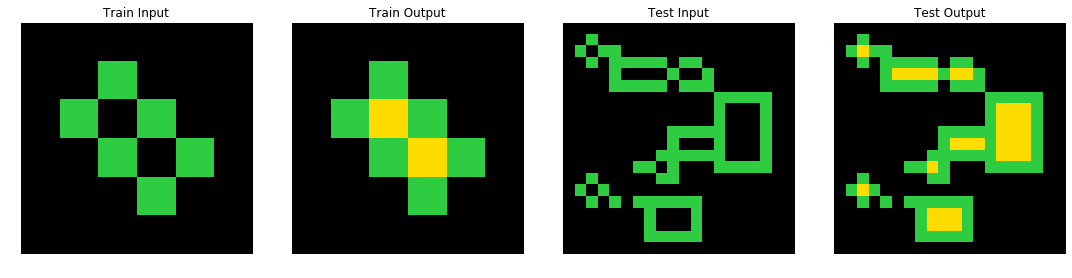

In [10]:
plot_task(task)

# evaluation data

In [11]:
evaluation_tasks = sorted(os.listdir(evaluation_path))
print(evaluation_tasks[:3])
print(len(evaluation_tasks))

evaluation_task_file = str(evaluation_path / '00576224.json')

with open(evaluation_task_file, 'r') as f:
    evaluation_task = json.load(f)
print(evaluation_task.keys())
print(len(evaluation_task["train"]))
print(len(evaluation_task["test"]))

display(evaluation_task['train'][0]['input'])
display(evaluation_task['train'][0]['output'])

['00576224.json', '009d5c81.json', '00dbd492.json']
400
dict_keys(['train', 'test'])
2
1


[[8, 6], [6, 4]]

[[8, 6, 8, 6, 8, 6],
 [6, 4, 6, 4, 6, 4],
 [6, 8, 6, 8, 6, 8],
 [4, 6, 4, 6, 4, 6],
 [8, 6, 8, 6, 8, 6],
 [6, 4, 6, 4, 6, 4]]

# test data

In [12]:
test_tasks = sorted(os.listdir(test_path))
print(test_tasks[:3])
print(len(test_tasks))

test_task_file = str(test_path / '00576224.json')

with open(test_task_file, 'r') as f:
    test_task = json.load(f)
print(test_task.keys())
print(len(test_task["train"]))
print(len(test_task["test"]))

display(test_task['train'][0]['input'])
display(test_task['train'][0]['output'])

['00576224.json', '009d5c81.json', '00dbd492.json']
100
dict_keys(['train', 'test'])
2
1


[[8, 6], [6, 4]]

[[8, 6, 8, 6, 8, 6],
 [6, 4, 6, 4, 6, 4],
 [6, 8, 6, 8, 6, 8],
 [4, 6, 4, 6, 4, 6],
 [8, 6, 8, 6, 8, 6],
 [6, 4, 6, 4, 6, 4]]

In [13]:
# all local test data in test path is included in evaluation path
print(len(set(evaluation_tasks)-set(test_tasks)))
print(len(set(test_tasks)-set(evaluation_tasks)))

300
0


In [14]:
print(len(set(training_tasks)-set(evaluation_tasks)))
print(len(set(evaluation_tasks)-set(training_tasks)))
print(len(set(training_tasks)-set(test_tasks)))
print(len(set(test_tasks)-set(training_tasks)))

400
400
400
100


# Using the correct prediction format

In [15]:
submission = pd.read_csv(data_path / 'sample_submission.csv', index_col='output_id')
display(submission.head())

output
output_id                                                    
00576224_0                           |32|78| |32|78| |00|00| 
009d5c81_0  |00000000000000|00000888888888|00000800080808|...
00dbd492_0  |00000000000222220000|02222222220200020000|020...
03560426_0  |0000000000|0000000000|0000000000|0000000000|0...
05a7bcf2_0  |000000000020000000080000000000|00000000002220...

The `output_id` is the `id` of the task, followed by the index of the `test` input that you should use to make your prediction. The `output` is the predicted output of the corresponding `test` input, reformatted into a string representation. (You can make three predictions per `output_id`, delineated by a space.) Use the following function to convert from a 2d python list to the string representation.

In [16]:
def flattener(pred):
    str_pred = str([row for row in pred])
    str_pred = str_pred.replace(', ', '')
    str_pred = str_pred.replace('[[', '|')
    str_pred = str_pred.replace('][', '|')
    str_pred = str_pred.replace(']]', '|')
    return str_pred

In [17]:
example_grid = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
display(example_grid)
print(flattener(example_grid))

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

|123|456|789|


# Re-creating the sample submission output

This demonstrates how to loop over the sample submission and make predictions.

In [18]:
for output_id in submission.index:
    task_id = output_id.split('_')[0]
    pair_id = int(output_id.split('_')[1])
    f = str(test_path / str(task_id + '.json'))
    with open(f, 'r') as read_file:
        task = json.load(read_file)
    # skipping over the training examples, since this will be naive predictions
    # we will use the test input grid as the base, and make some modifications
    data = task['test'][pair_id]['input'] # test pair input
    # for the first guess, predict that output is unchanged
    pred_1 = flattener(data)
    # for the second guess, change all 0s to 5s
    data = [[5 if i==0 else i for i in j] for j in data]
    pred_2 = flattener(data)
    # for the last gues, change everything to 0
    data = [[0 for i in j] for j in data]
    pred_3 = flattener(data)
    # concatenate and add to the submission output
    pred = pred_1 + ' ' + pred_2 + ' ' + pred_3 + ' ' 
    submission.loc[output_id, 'output'] = pred

submission.to_csv('submission.csv')

# manual coding for tasks

https://www.kaggle.com/nagiss/manual-coding-for-the-first-10-tasks

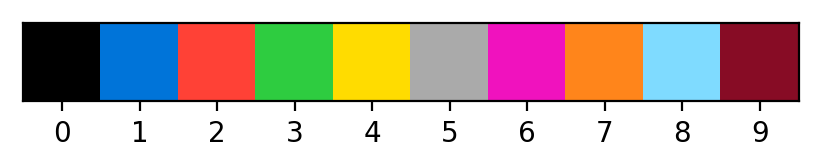

In [19]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [20]:
def get_data(task_filename):
    with open(task_filename, 'r') as f:
        task = json.load(f)
    return task

num2color = ["black", "blue", "red", "green", "yellow", "gray", "magenta", "orange", "sky", "brown"]
color2num = {c: n for n, c in enumerate(num2color)}

In [21]:
def check(task, pred_func):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(3, n, figsize=(4*n,12), dpi=50)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in, t_out)
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        axs[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        axs[2][fig_num].set_title(f'Train-{i} pred')
        axs[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        axs[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in, t_out)
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        axs[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        axs[2][fig_num].set_title(f'Test-{i} pred')
        axs[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        axs[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1

# create_df

In [22]:
# functions for making tags
def neighbours(cur_row, cur_col, nrows, ncols): # function for pickup objects function
    if cur_row==0: top = -1
    else: top = [cur_row-1,cur_col]
    if cur_row==nrows-1: bottom = -1
    else: bottom = [cur_row+1, cur_col]
    if cur_col==0: left = -1
    else: left = [cur_row,cur_col-1]
    if cur_col==ncols-1: right = -1
    else: right = [cur_row, cur_col+1]
    if cur_row == 0 or cur_col == ncols-1: tr = -1
    else: tr = [cur_row-1, cur_col+1]
    if cur_row == 0 or cur_col == 0: tl = -1
    else: tl = [cur_row-1, cur_col-1]
    if cur_row == nrows-1 or cur_col == ncols-1: br = -1
    else: br = [cur_row+1, cur_col+1]
    if cur_row == nrows-1 or cur_col == 0: bl = -1
    else: bl = [cur_row+1, cur_col-1]
    ans = []
    for i in [top, bottom, left, right, tr, tl, br, bl]:
        if i != -1:
            ans.append(i)
    return ans

def make_group(loc, h, w): # function for pickup objects function
    ans = [loc[0].tolist()]
    check_list = [loc[0].tolist()]
    remain = loc[1:].tolist()
    while True:
        check_ele = check_list[0]
        check_list.remove(check_ele)
        neigh = neighbours(check_ele[0], check_ele[1], h, w)
        for i in neigh:
            if i in remain:
                ans.append(i)
                check_list.append(i)
                remain.remove(i)
        if len(check_list) == 0:
            break
    return ans, np.array(remain)

def pickup_objects_unlifted(pixmap):
    try:
        loc = np.argwhere(pixmap > 0)
        h, w = pixmap.shape
        count = 0
        groups = [] # pick up coordinates
        ans = [] # pick up objects
        if len(loc) > 0:
            while True:
                if count == 0:
                    tmp, remain = make_group(loc, h, w)
                else:
                    tmp, remain = make_group(remain, h, w)
                groups.append(tmp)
                count += 1
                if len(remain) == 0:
                    break
            for i in groups:    
                x_min = np.min(np.array(i)[:,0]) # x coordinate np.array(i)[:,0]
                x_max = np.max(np.array(i)[:,0]) # x coordinate
                y_min = np.min(np.array(i)[:,1]) # y coordinate np.array(i)[:,1]
                y_max = np.max(np.array(i)[:,1]) # y coordinate
                tmp = pixmap[x_min:x_max+1, y_min:y_max+1]
                ans.append(tmp)
            return ans
        else:
            return []
    except:
        return []
    
def vertical_line(pixmap):
    flg = 0
    h, w = pixmap.shape
    for i in range(w):
        if np.sum(pixmap[:,i] > 0) == h and len(np.unique(pixmap[:,i])) == 1:
            return True
    return False
    
def horizontal_line(pixmap):
    h, w = pixmap.shape
    for i in range(h):
        if np.sum(pixmap[i,:] > 0) == w and len(np.unique(pixmap[i,:])) == 1:
            return True
    return False

In [23]:
def create_df(folder_path):
    task_names_list = sorted(os.listdir(folder_path))
    task_list = []
    for task_name in task_names_list: 
        task_file = str(folder_path / task_name)
        with open(task_file, 'r') as f:
            task = json.load(f)
            task_list.append(task)
    
    df = pd.DataFrame()
    df['task_name'] = task_names_list
    df['task'] = task_list
    df['number_of_train_pairs'] = df['task'].apply(lambda x: len(x['train']))
    df['number_of_test_pairs'] = df['task'].apply(lambda x: len(x['test']))
    
    # Compare image sizes
    df['inputs_all_have_same_height'] = df['task'].apply(
        lambda task: int(len(set([len(example['input']) for example in task['train']])) == 1)
    )
    df['inputs_all_have_same_width'] = df['task'].apply(
        lambda task: int(len(set([len(example['input'][0]) for example in task['train']])) == 1)
    )
    df['inputs_all_have_same_shape'] = df['inputs_all_have_same_height'] * df['inputs_all_have_same_width']
    df['input_height_if_constant'] = df['task'].apply(
        lambda task: len(task['train'][0]['input'])
                     if (len(set([len(example['input']) for example in task['train']])) == 1)
                     else np.nan
    )
    df['input_width_if_constant'] = df['task'].apply(
        lambda task: len(task['train'][0]['input'][0])
                     if (len(set([len(example['input'][0]) for example in task['train']])) == 1)
                     else np.nan
    )
    df['outputs_all_have_same_height'] = df['task'].apply(
        lambda task: int(len(set([len(example['output']) for example in task['train']])) == 1)
    )
    df['outputs_all_have_same_width'] = df['task'].apply(
        lambda task: int(len(set([len(example['output'][0]) for example in task['train']])) == 1)
    )
    df['outputs_all_have_same_shape'] = df['outputs_all_have_same_height'] * df['outputs_all_have_same_width']
    df['output_height_if_constant'] = df['task'].apply(
        lambda task: len(task['train'][0]['output'])
                     if (len(set([len(example['output']) for example in task['train']])) == 1)
                     else np.nan
    )
    df['output_width_if_constant'] = df['task'].apply(
        lambda task: len(task['train'][0]['output'][0])
                     if (len(set([len(example['output'][0]) for example in task['train']])) == 1)
                     else np.nan
    )  
    df['in_each_pair_shape_doesnt_change'] = df['task'].apply(
        lambda task: np.prod([int(len(example['input'][0])==len(example['output'][0])
                                  and len(example['input'])==len(example['output'])
                                 ) for example in task['train']
                            ])
    )
    df['in_each_pair_shape_ratio_is_the_same'] = df['task'].apply(
        lambda task: (len(set([len(example['input'][0]) / len(example['output'][0])
                                 for example in task['train']]))==1) * (
                      len(set([len(example['input']) / len(example['output'])
                                 for example in task['train']]))==1)
    )
    df['o/i_height_ratio_if_constant'] = df['task'].apply(
        lambda task: len(task['train'][0]['output']) / len(task['train'][0]['input'])
                     if (len(set([len(example['input']) / len(example['output'])
                                 for example in task['train']]))==1)
                     else np.nan
    )
    df['o/i_width_ratio_if_constant'] = df['task'].apply(
        lambda task: len(task['train'][0]['output'][0]) / len(task['train'][0]['input'][0])
                     if (len(set([len(example['input'][0]) / len(example['output'][0])
                                 for example in task['train']]))==1)
                     else np.nan
    )
    
    # my idea ---------
    df["same_color_sum"] = df['task'].apply(lambda task: 
                        np.all([int(sum(sum(np.array(example['input']))) == sum(sum(np.array(example['output'])))) for example in task['train']]))
    df["increase_color_sum"] = df['task'].apply(lambda task: 
                        np.all([int(sum(sum(np.array(example['input']))) < sum(sum(np.array(example['output'])))) for example in task['train']]))
    df["decrease_color_sum"] = df['task'].apply(lambda task: 
                        np.all([int(sum(sum(np.array(example['input']))) > sum(sum(np.array(example['output'])))) for example in task['train']]))
    df["same_color_block"] = df['task'].apply(lambda task: 
                        np.all([np.sum(np.array(example['input'])>0) == np.sum(np.array(example['output'])>0) for example in task['train']]))
    df["increase_color_block"] = df['task'].apply(lambda task: 
                        np.all([np.sum(np.array(example['input'])>0) < np.sum(np.array(example['output'])>0) for example in task['train']]))
    df["decrease_color_block"] = df['task'].apply(lambda task: 
                        np.all([np.sum(np.array(example['input'])>0) > np.sum(np.array(example['output'])>0) for example in task['train']]))
    df['color_kind_increase'] = df['task'].apply(
        lambda task: np.all([len(np.unique(np.array(example['input']))) < len(np.unique(np.array(example['output']))) for example in task['train']]))
    df['color_kind_decrease'] = df['task'].apply(
        lambda task: np.all([len(np.unique(np.array(example['input']))) > len(np.unique(np.array(example['output']))) for example in task['train']]))
    df['decrease_objects'] = df['task'].apply(lambda task: np.all([len(pickup_objects_unlifted(np.array(example['input']))) > len(pickup_objects_unlifted(np.array(example['output'])))
                                               for example in task["train"]]))
    df['increase_objects'] = df['task'].apply(lambda task: np.all([len(pickup_objects_unlifted(np.array(example['input']))) < len(pickup_objects_unlifted(np.array(example['output'])))
                                               for example in task["train"]]))
    df["horizontal_line"] = df['task'].apply(lambda task: np.all([horizontal_line(np.array(example["input"])) for example in task["train"]]))
    df["vertical_line"] = df['task'].apply(lambda task: np.all([vertical_line(np.array(example["input"])) for example in task["train"]]))
    return df


training_descriptive_df = create_df(training_path)
evaluation_descriptive_df = create_df(evaluation_path)
test_descriptive_df = create_df(test_path)

In [24]:
def plot_one(ax, i,train_or_test,input_or_output):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    
    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True,which='both',color='lightgrey', linewidth=0.5)    
    ax.set_yticks([x-0.5 for x in range(1+len(input_matrix))])
    ax.set_xticks([x-0.5 for x in range(1+len(input_matrix[0]))])     
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(train_or_test + ' '+input_or_output)
    
def plot_task(task):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """    
    num_train = len(task['train'])
    fig, axs = plt.subplots(2, num_train, figsize=(3*num_train,3*2))
    for i in range(num_train):     
        plot_one(axs[0,i],i,'train','input')
        plot_one(axs[1,i],i,'train','output')        
    plt.tight_layout()
    plt.show()    
    
    num_test = len(task['test'])
    fig, axs = plt.subplots(2, num_test, figsize=(3*num_test,3*2))
    if num_test==1: 
        plot_one(axs[0],0,'test','input')
        plot_one(axs[1],0,'test','output')     
    else:
        for i in range(num_test):      
            plot_one(axs[0,i],i,'test','input')
            plot_one(axs[1,i],i,'test','output')  
    plt.tight_layout()
    plt.show()

In [25]:
# 反転系(同次元)のhandcode
# https://note.nkmk.me/python-numpy-rot90/
# https://note.nkmk.me/python-numpy-flip-flipud-fliplr/

# class1: same shape & same color block & decrease objects

05f2a901.json


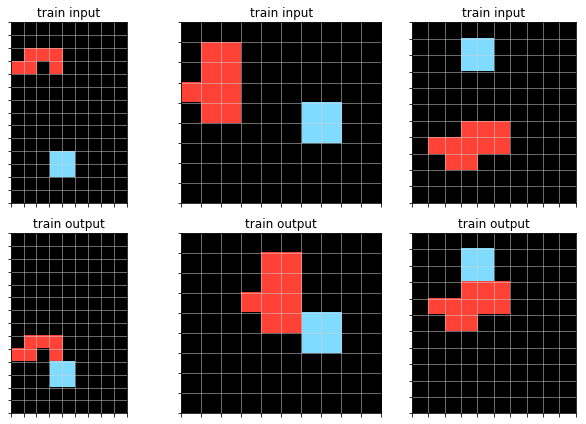

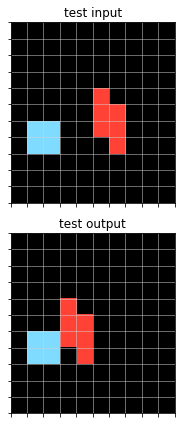

1e0a9b12.json


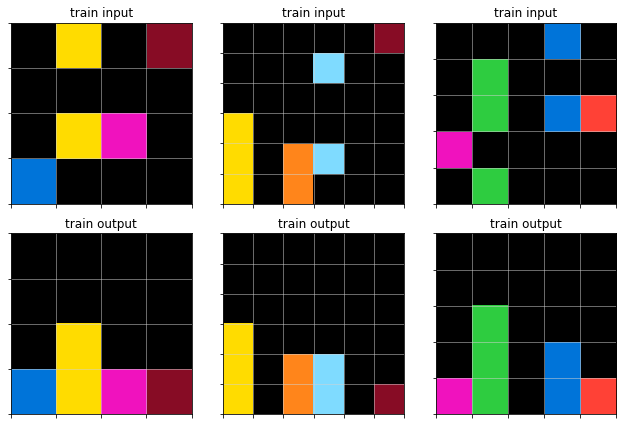

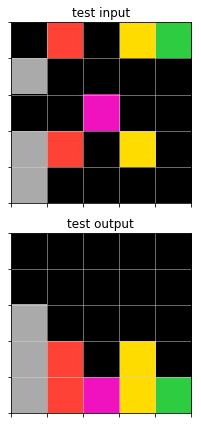

228f6490.json


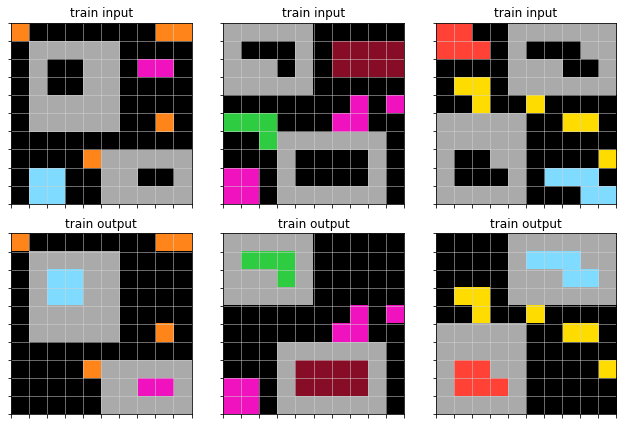

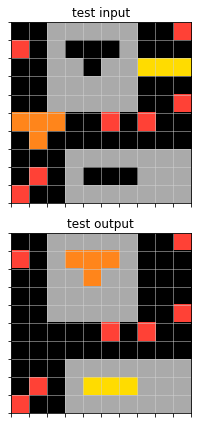

3906de3d.json


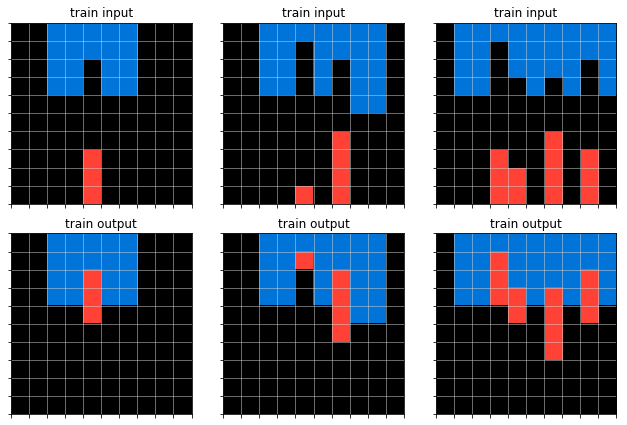

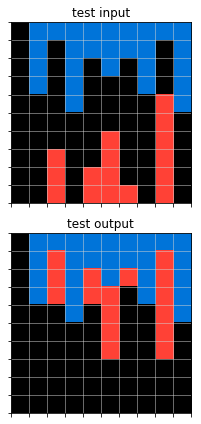

4093f84a.json


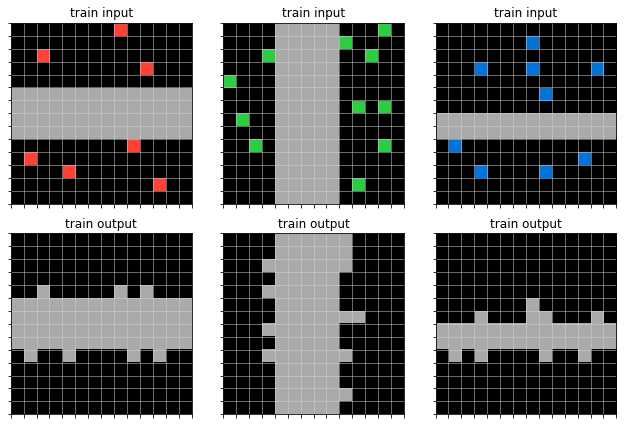

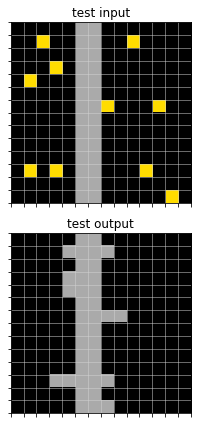

6855a6e4.json


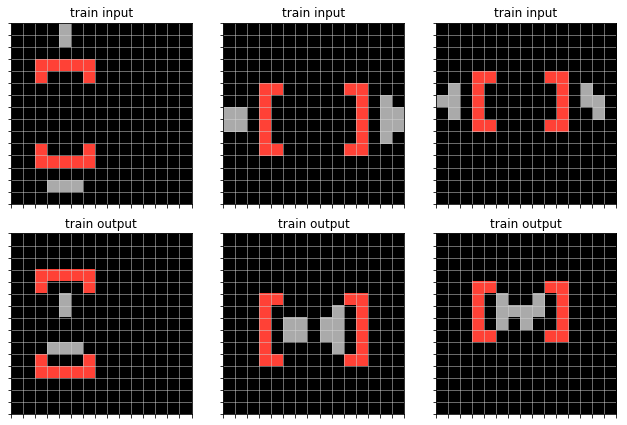

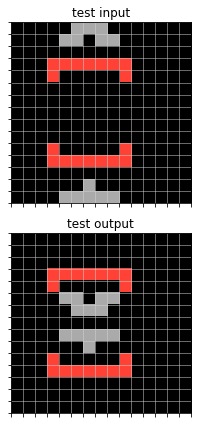

6a1e5592.json


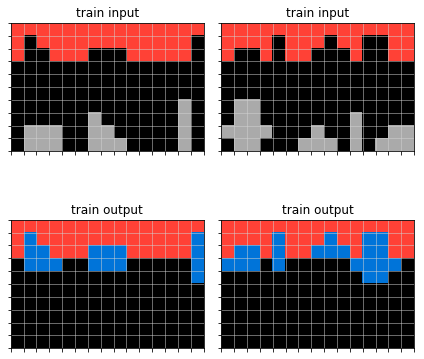

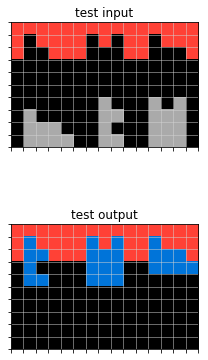

a48eeaf7.json


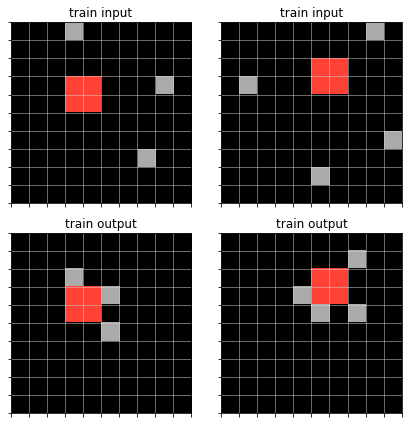

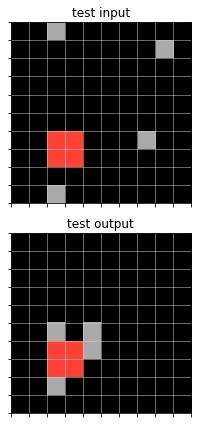

ae3edfdc.json


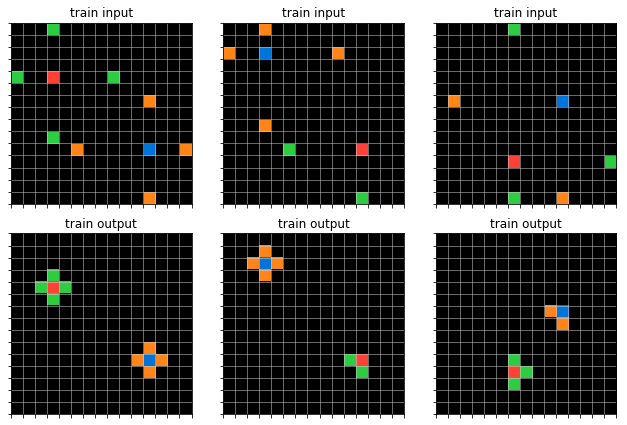

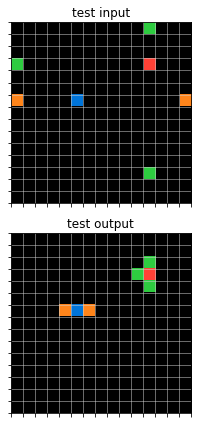

9, 2.25%
8, 2.0%
1, 1.0%


In [26]:
# 入出力同次元で画像内でのくっつけるまで図形移動
tmp = training_descriptive_df[training_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.same_color_block==1]
tmp = tmp[tmp["decrease_objects"]==1]
tmp1_train = tmp.copy()
for i in tmp["task_name"]:
    print(i)
    task = get_data(str(training_path / i))
    plot_task(task)
    
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / training_descriptive_df.shape[0])+"%")
tmp = evaluation_descriptive_df[evaluation_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.same_color_block==1]
tmp = tmp[tmp["decrease_objects"]==1]
tmp1_eval = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / evaluation_descriptive_df.shape[0])+"%")

tmp = test_descriptive_df[test_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.same_color_block==1]
tmp = tmp[tmp["decrease_objects"]==1]
tmp1_test = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / test_descriptive_df.shape[0])+"%")

# class2: same shape & same color sum & not decrease objects

1caeab9d.json


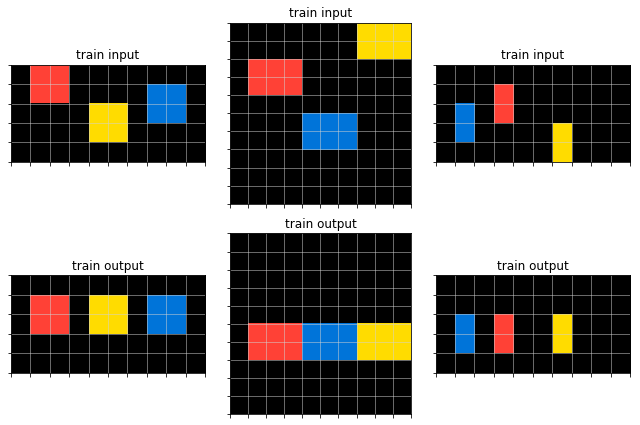

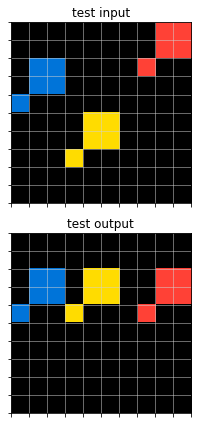

25ff71a9.json


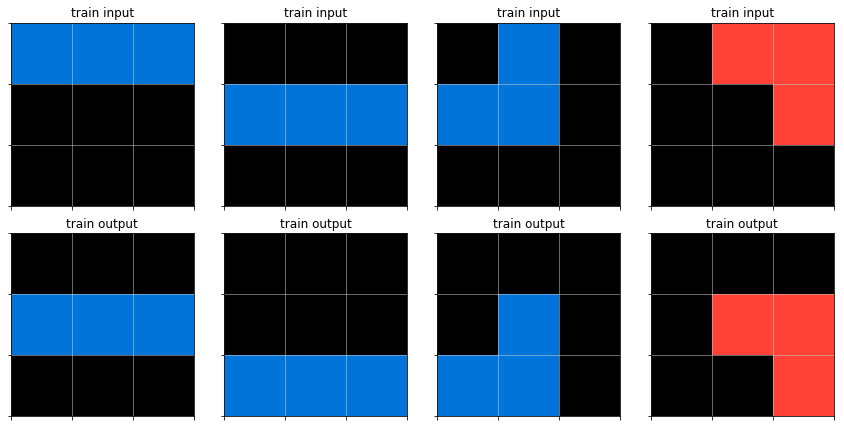

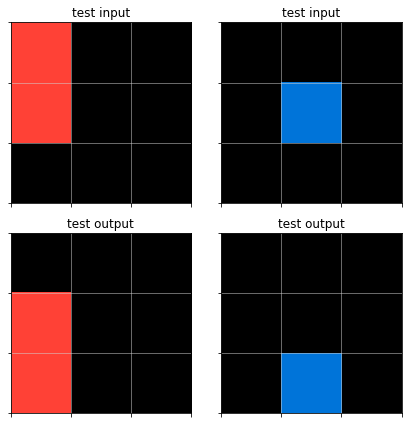

3c9b0459.json


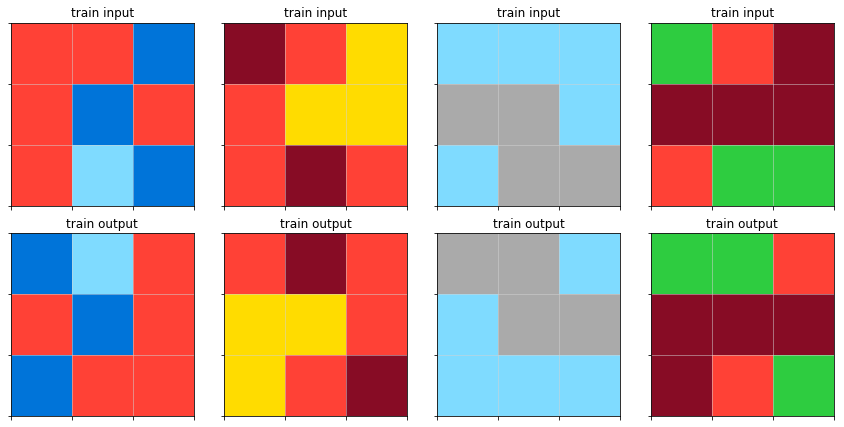

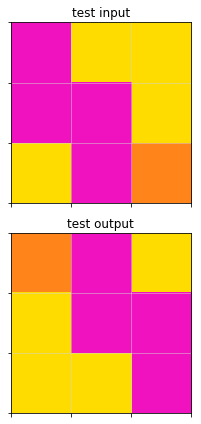

5168d44c.json


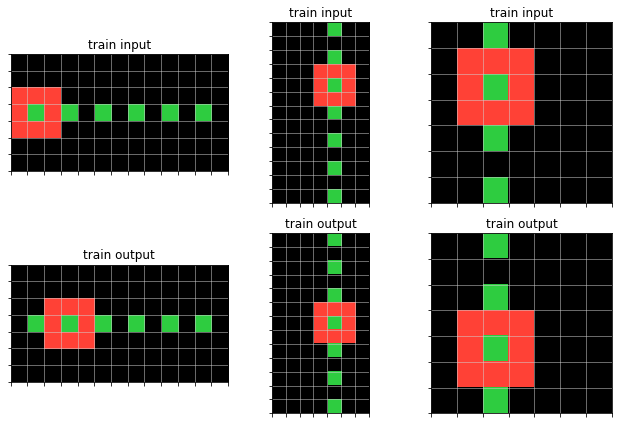

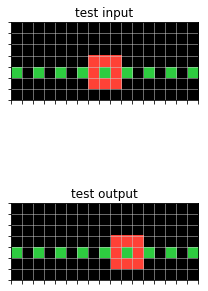

5521c0d9.json


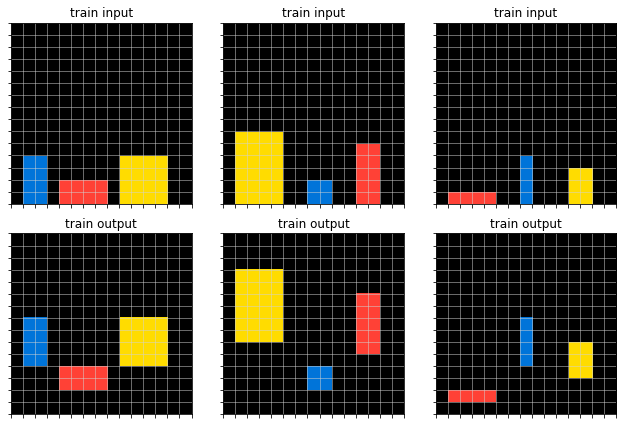

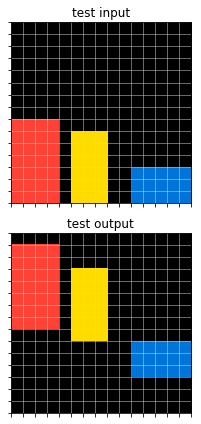

6150a2bd.json


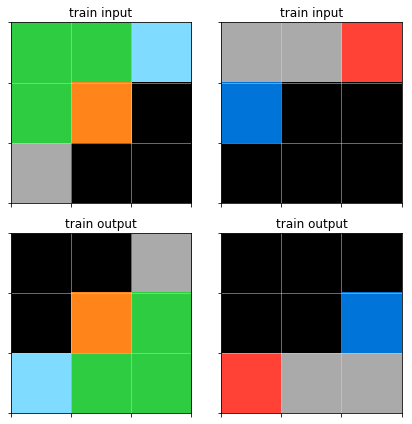

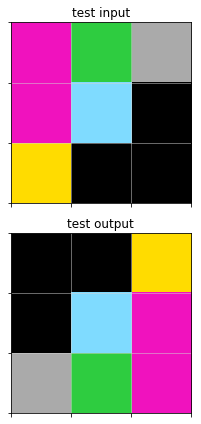

67a3c6ac.json


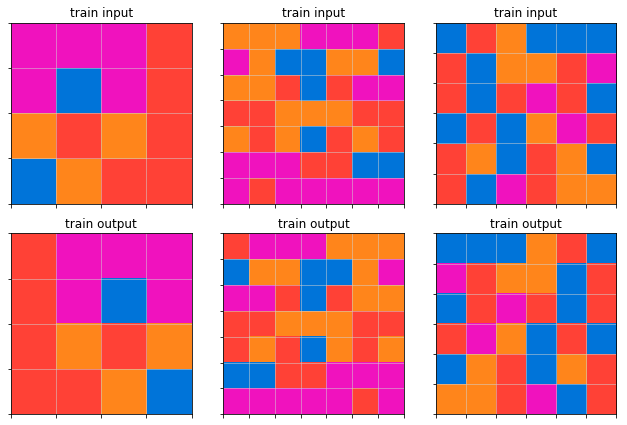

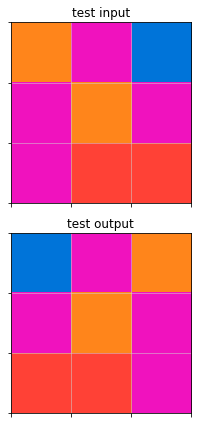

68b16354.json


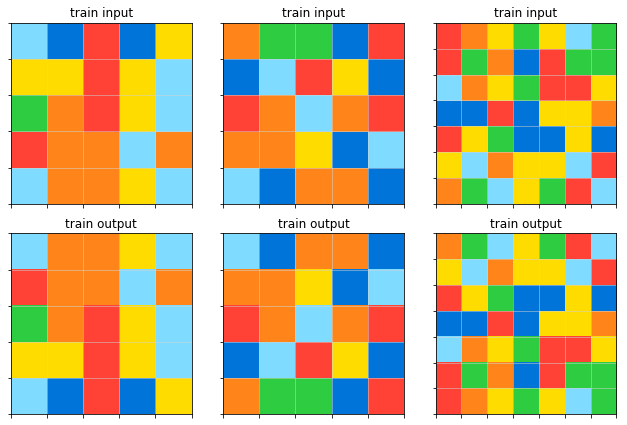

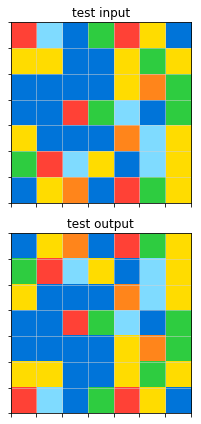

74dd1130.json


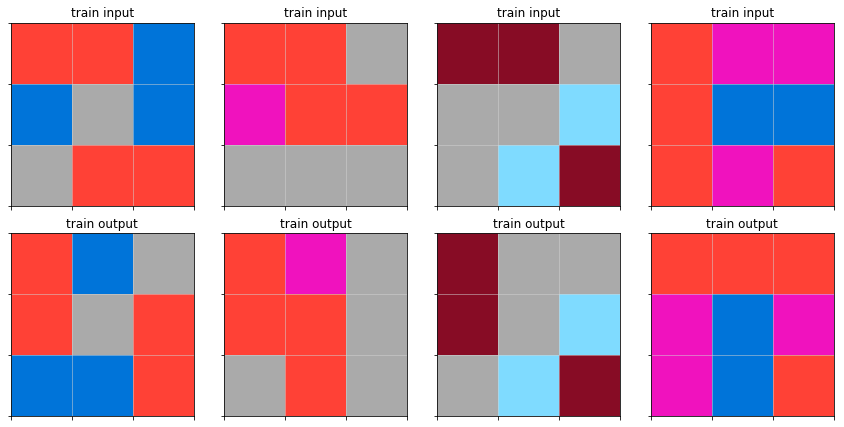

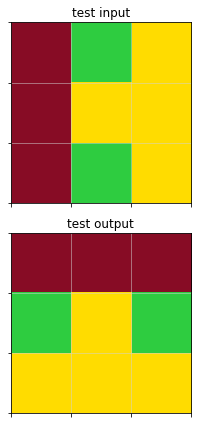

952a094c.json


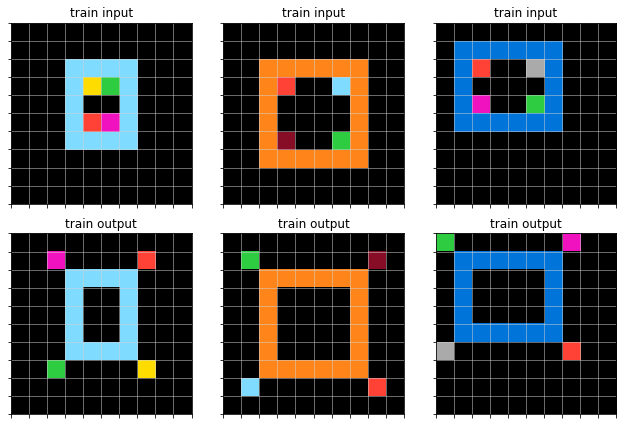

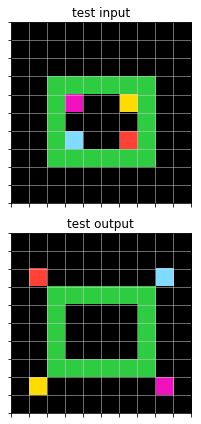

9dfd6313.json


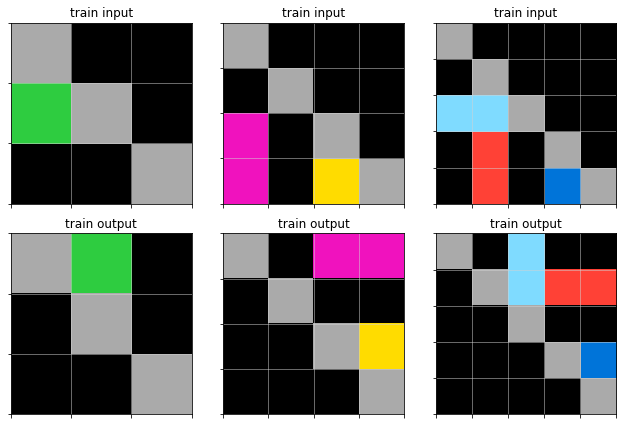

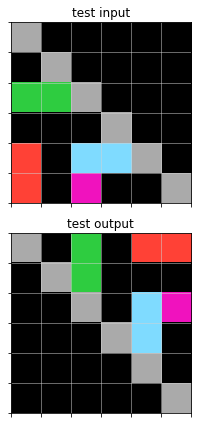

a1570a43.json


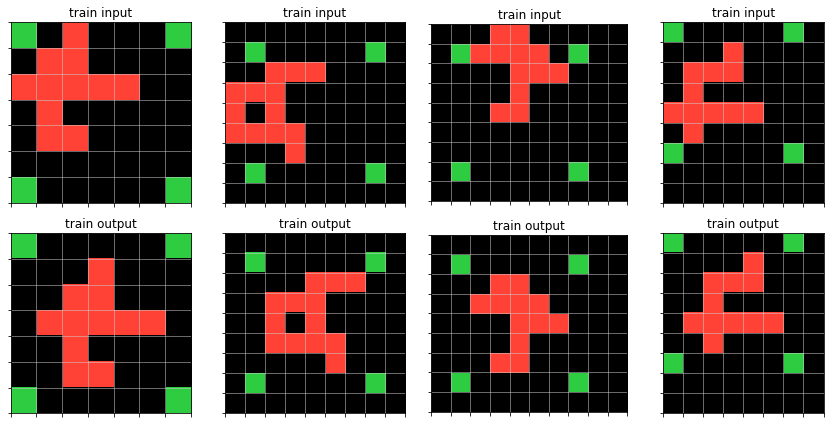

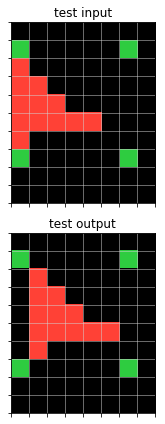

beb8660c.json


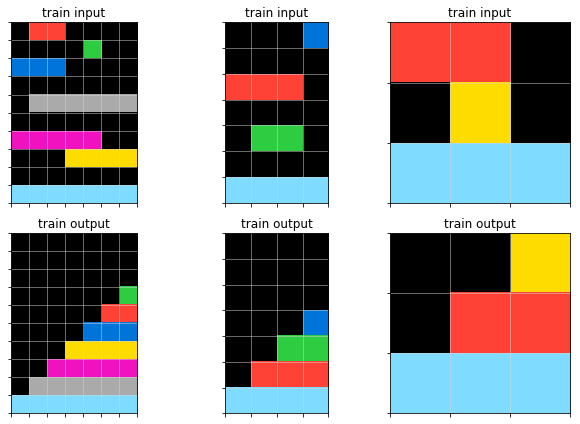

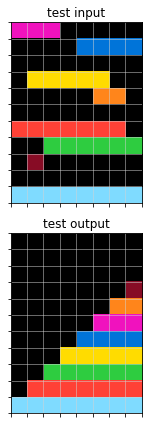

dc433765.json


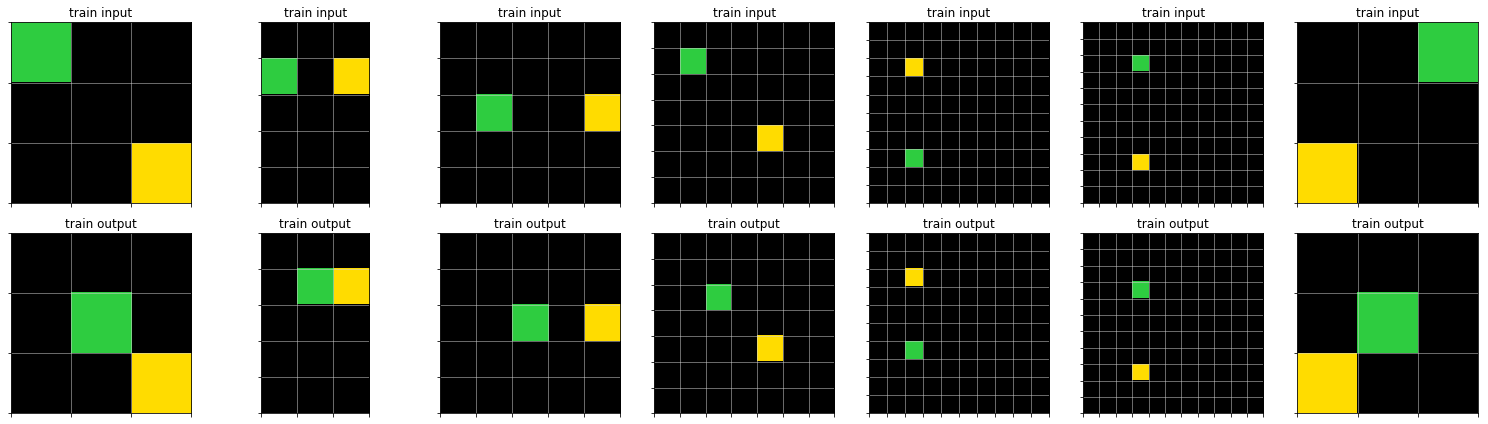

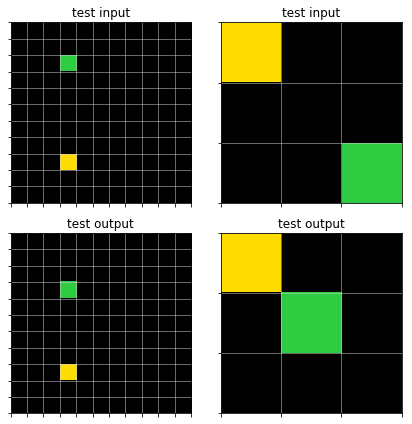

e9afcf9a.json


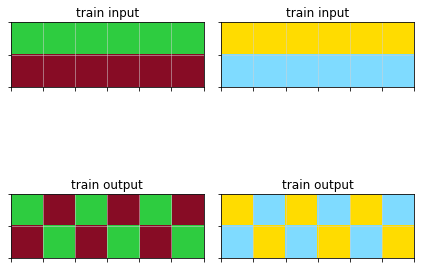

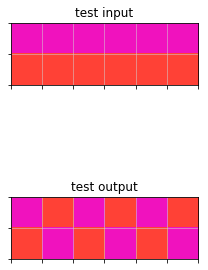

ed36ccf7.json


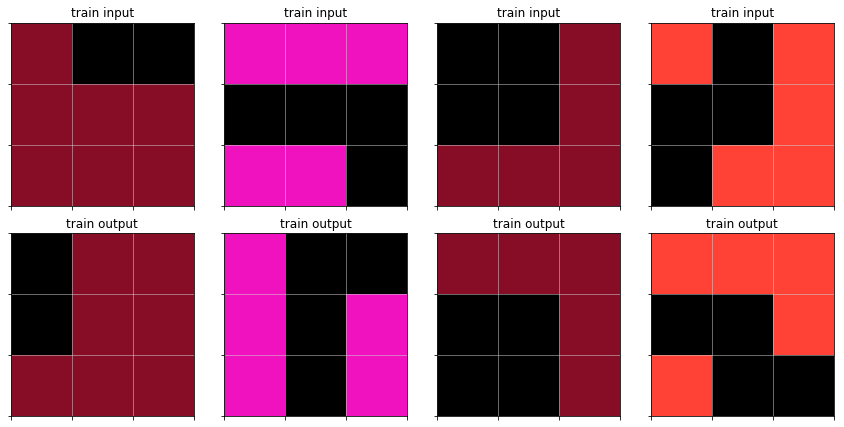

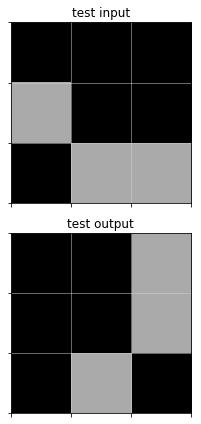

f8a8fe49.json


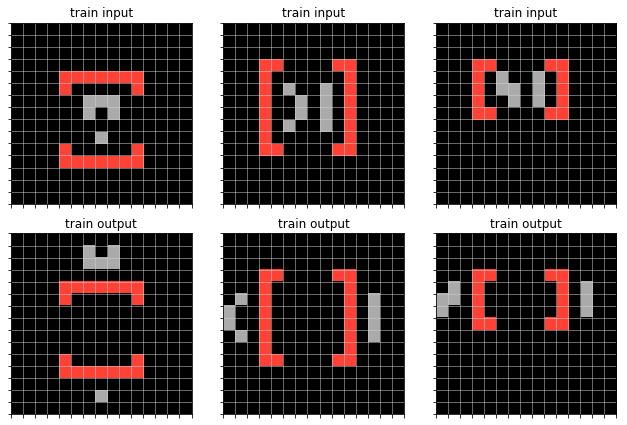

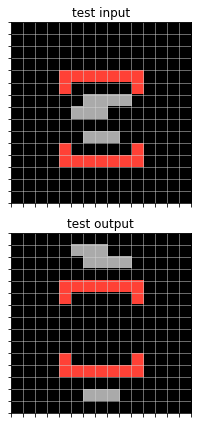

17, 4.25%
20, 5.0%
2, 2.0%


In [27]:
# その他の移動&回転
tmp = training_descriptive_df[training_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.same_color_sum==1]
tmp = tmp[tmp["decrease_objects"]==0]
tmp2_train = tmp.copy()
for i in tmp["task_name"]:
    print(i)
    task = get_data(str(training_path / i))
    plot_task(task)

print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / training_descriptive_df.shape[0])+"%")    
tmp = evaluation_descriptive_df[evaluation_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.same_color_sum==1]
tmp = tmp[tmp["decrease_objects"]==0]
tmp2_eval = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / evaluation_descriptive_df.shape[0])+"%")

tmp = test_descriptive_df[test_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.same_color_sum==1]
tmp = tmp[tmp["decrease_objects"]==0]
tmp2_test = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / test_descriptive_df.shape[0])+"%")

# class3: same shape & increase color sum & decrese objects

178fcbfb.json


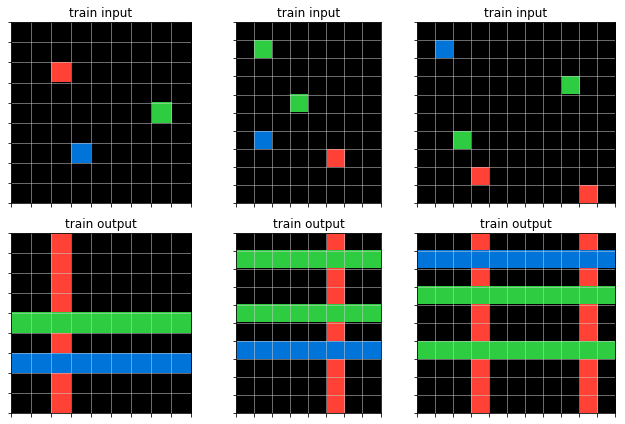

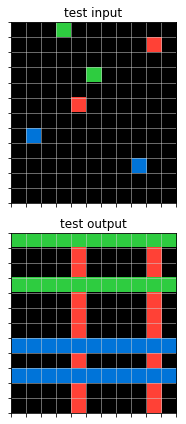

1bfc4729.json


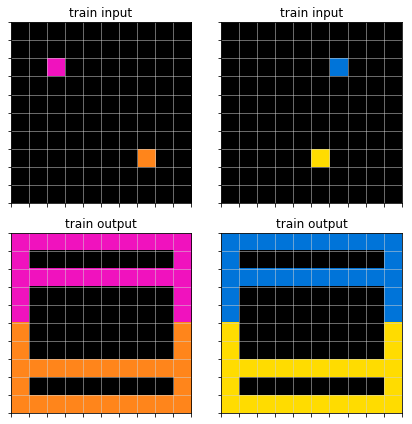

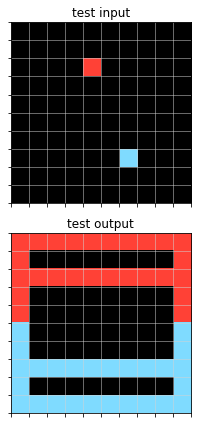

1f876c06.json


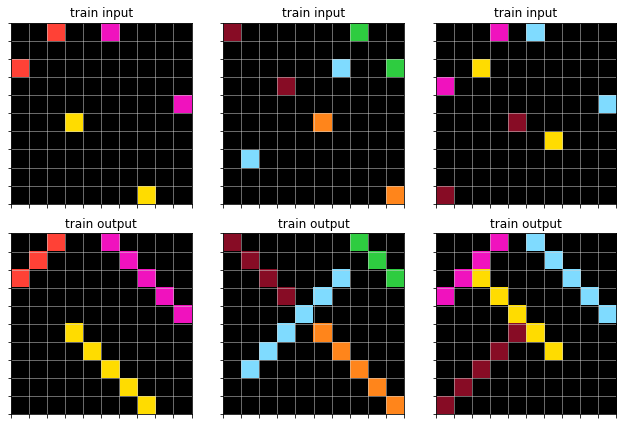

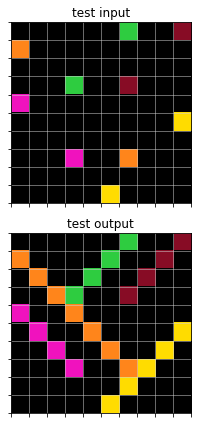

23581191.json


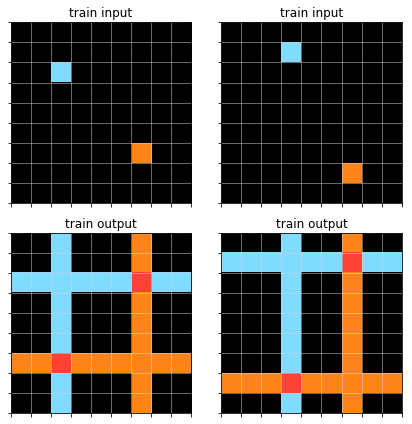

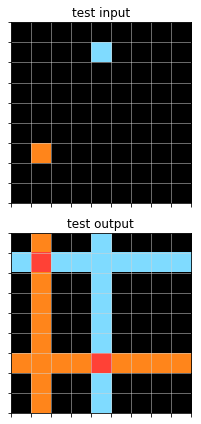

29c11459.json


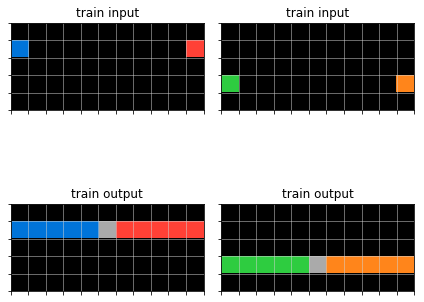

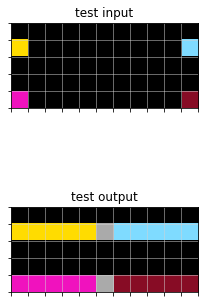

2dd70a9a.json


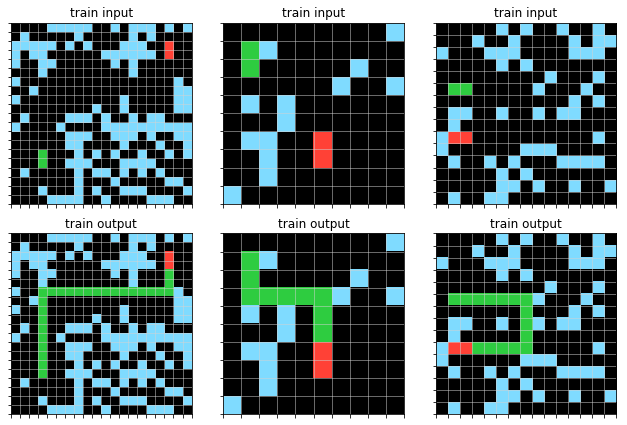

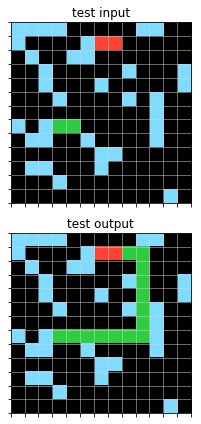

363442ee.json


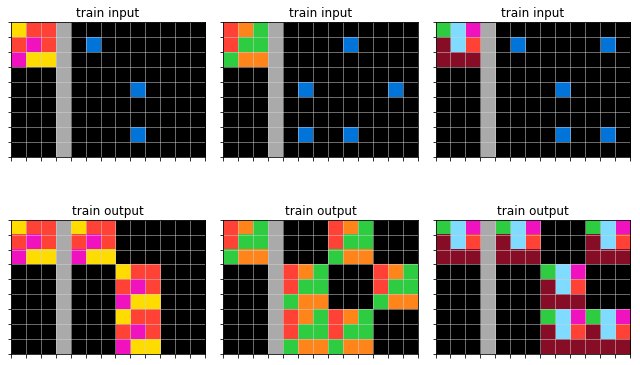

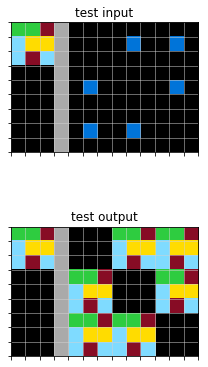

3eda0437.json


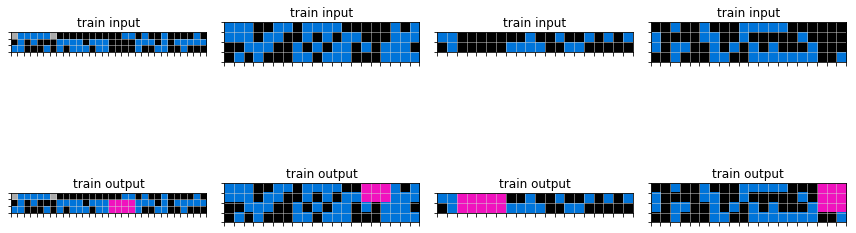

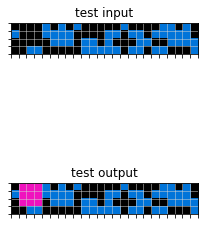

40853293.json


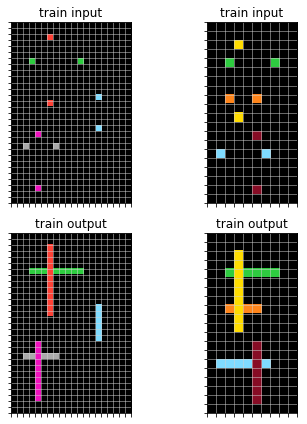

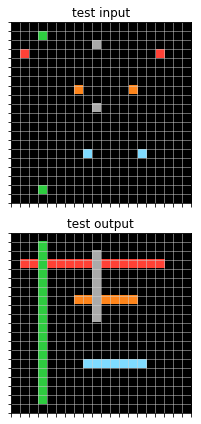

4612dd53.json


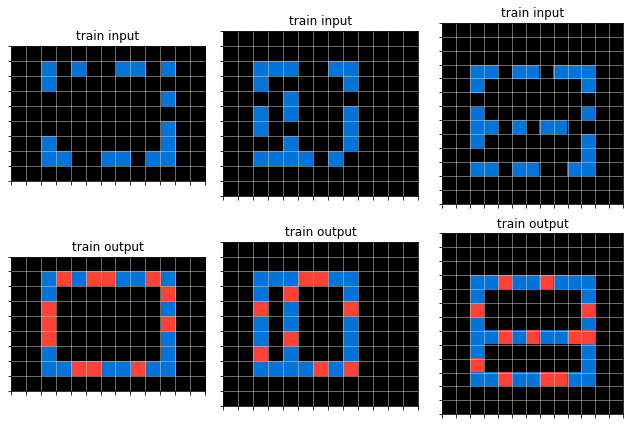

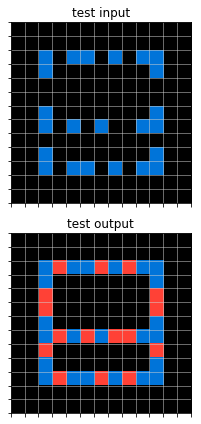

508bd3b6.json


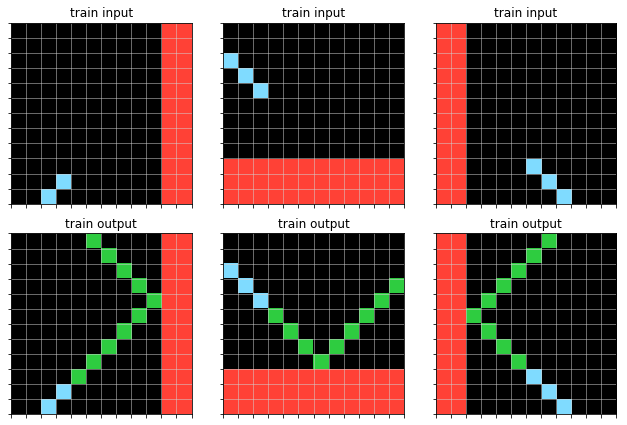

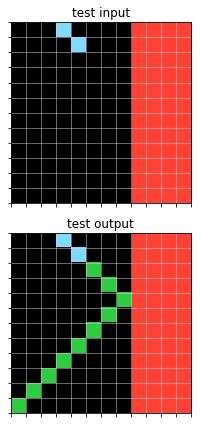

54d9e175.json


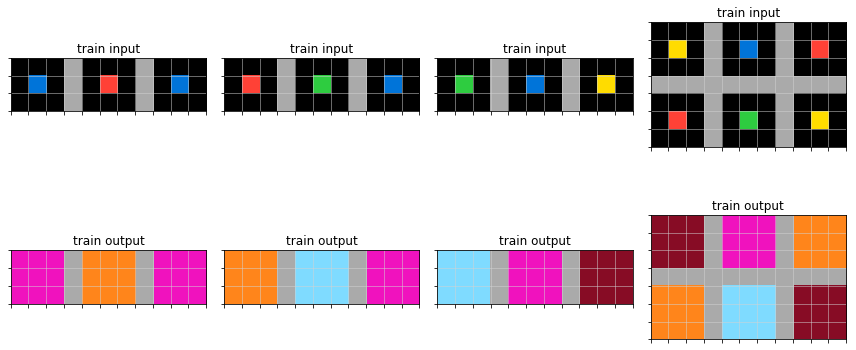

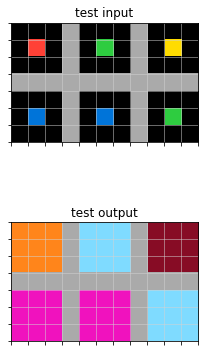

56dc2b01.json


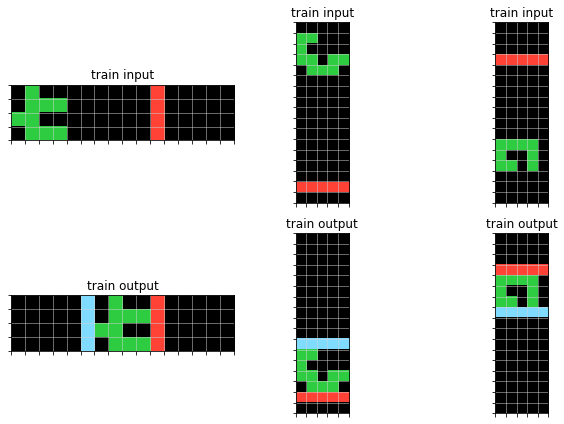

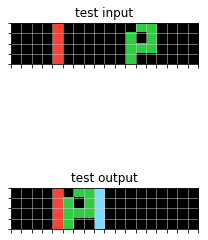

56ff96f3.json


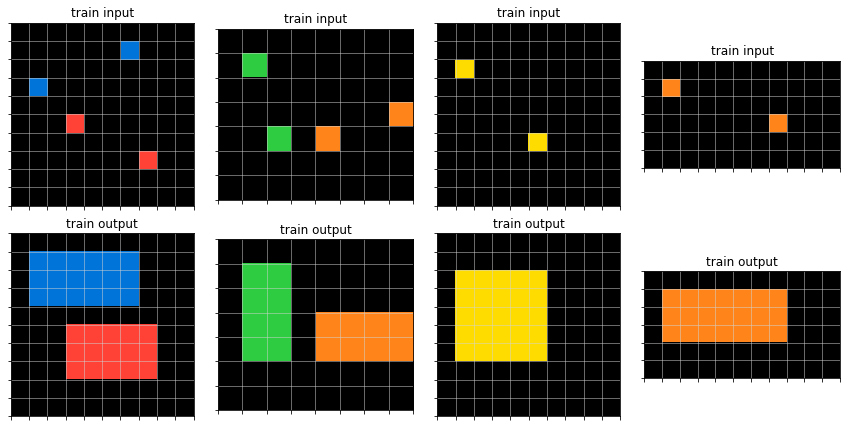

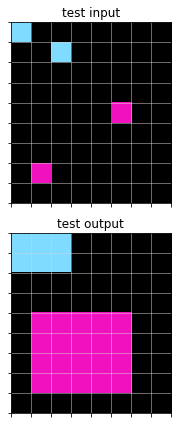

673ef223.json


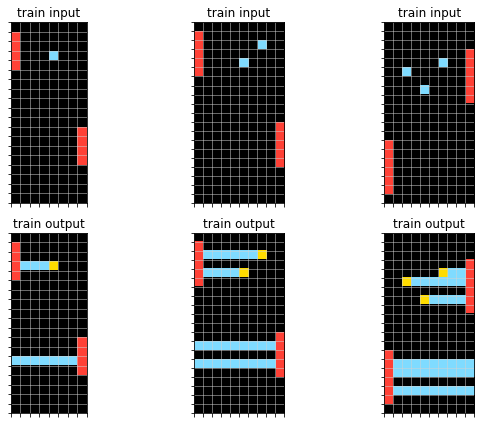

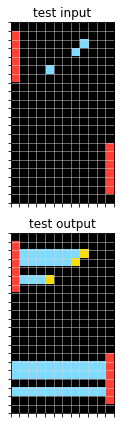

6d58a25d.json


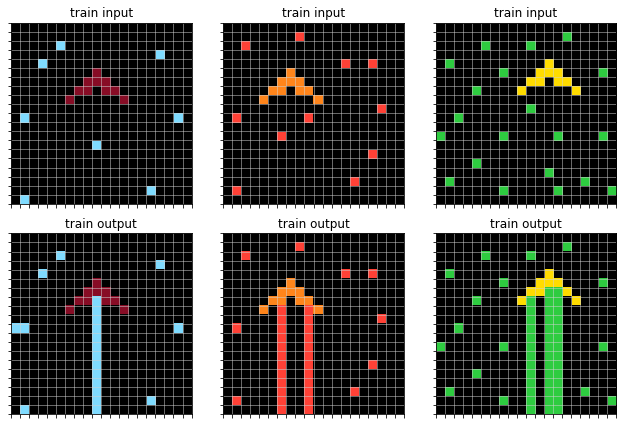

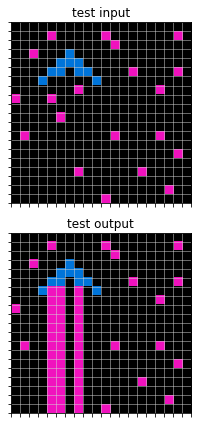

83302e8f.json


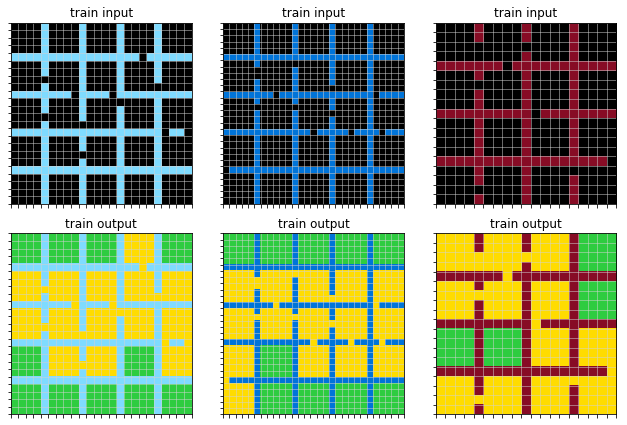

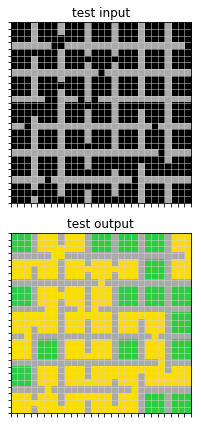

8d510a79.json


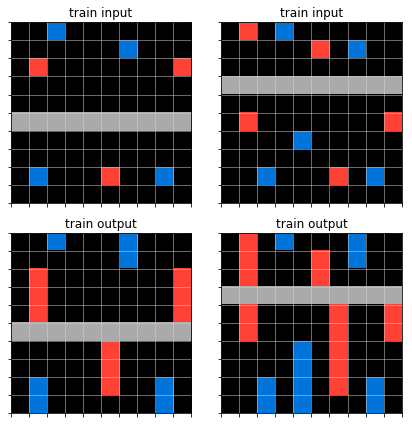

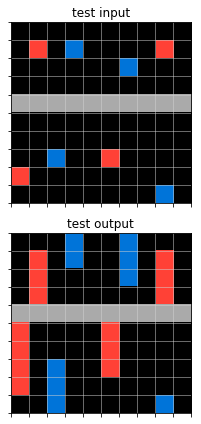

8e5a5113.json


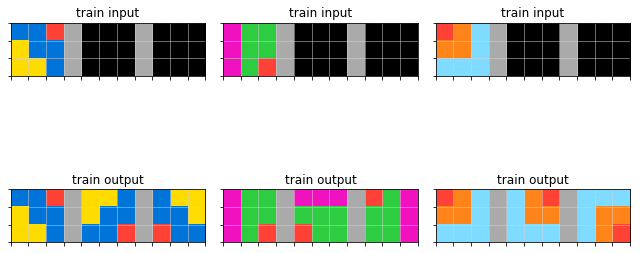

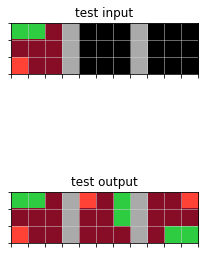

928ad970.json


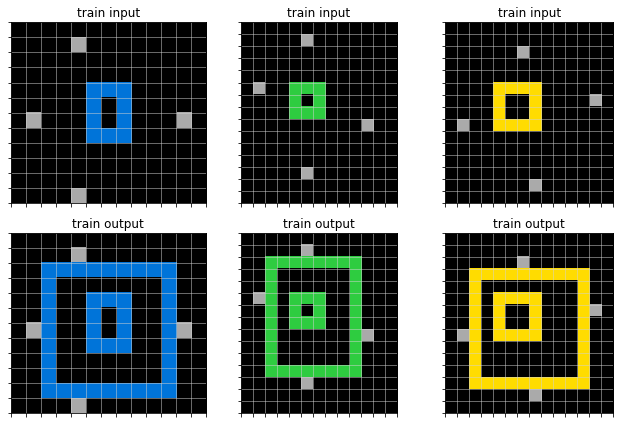

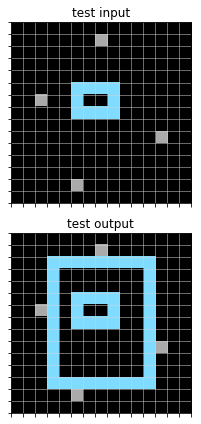

a2fd1cf0.json


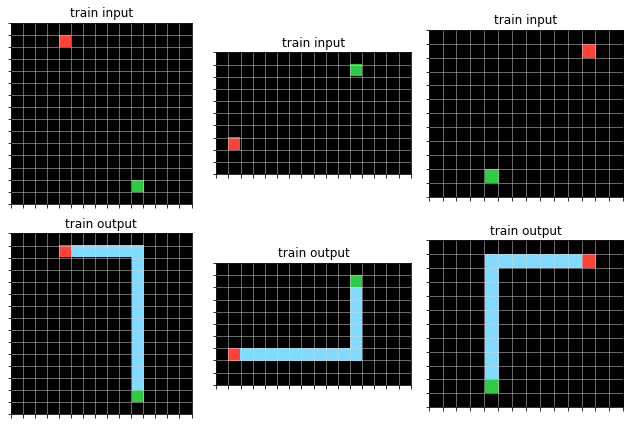

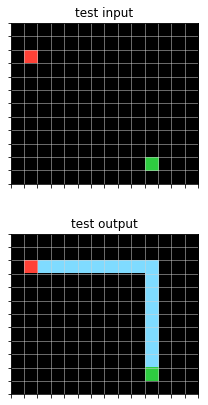

a5313dff.json


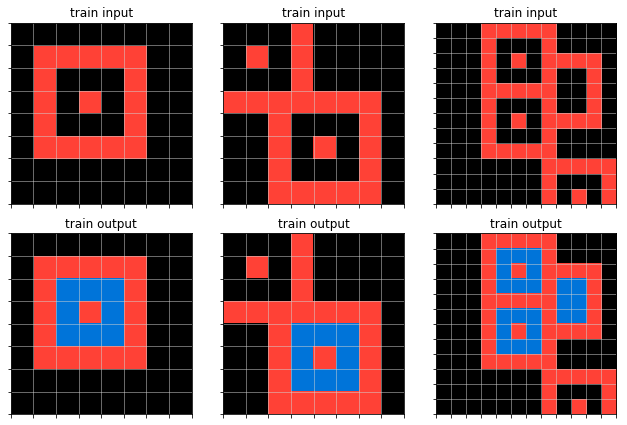

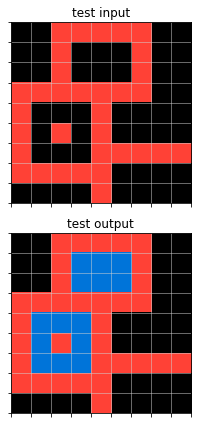

a699fb00.json


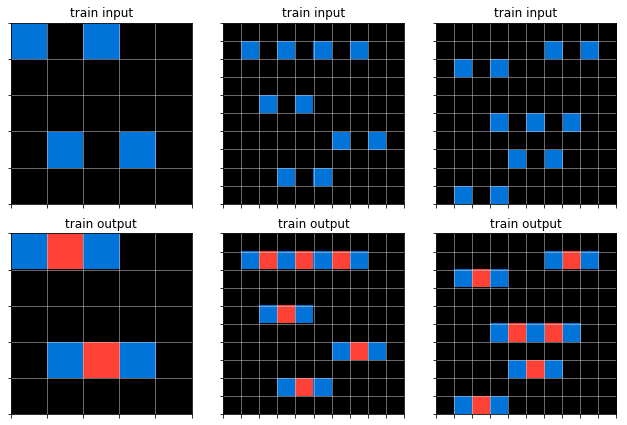

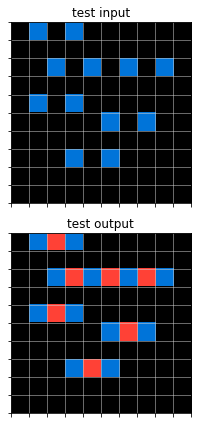

af902bf9.json


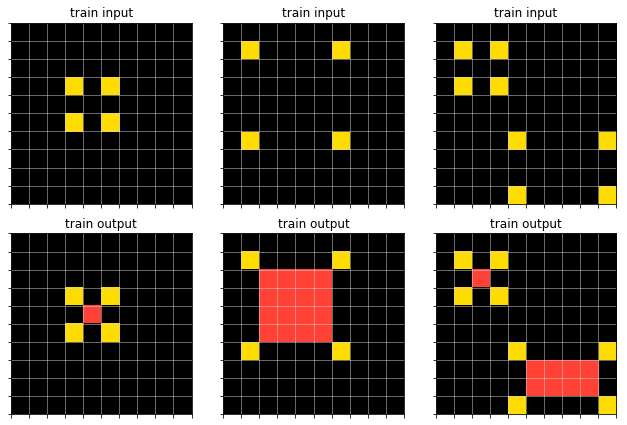

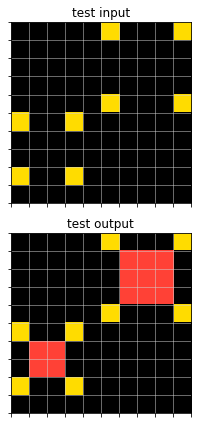

b548a754.json


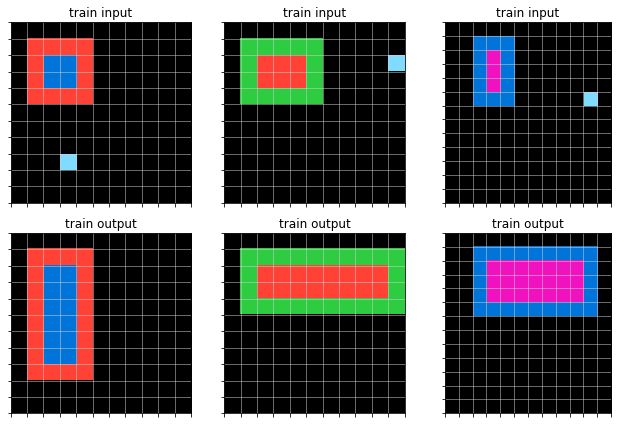

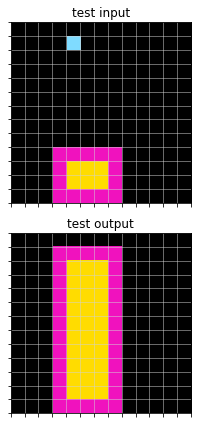

b7249182.json


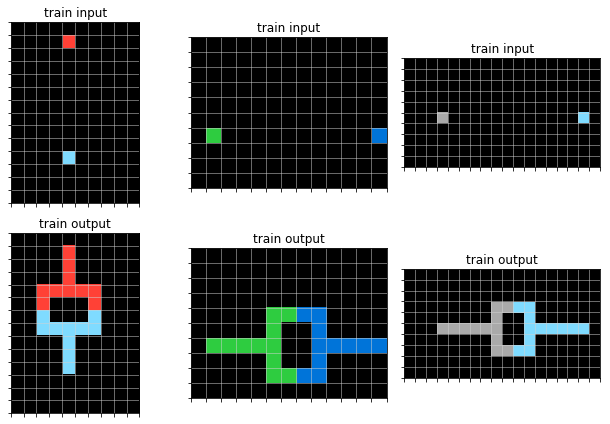

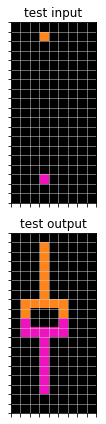

bdad9b1f.json


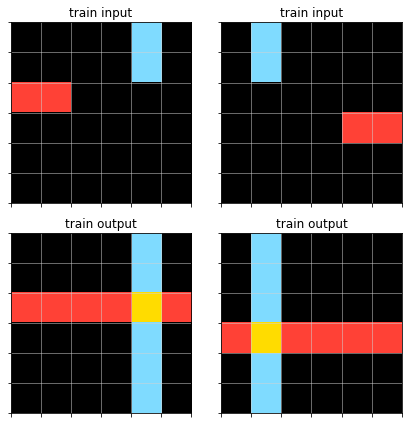

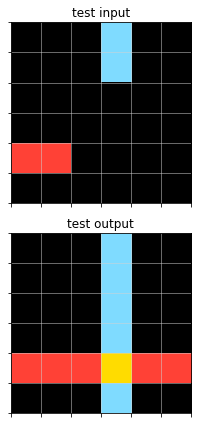

c1d99e64.json


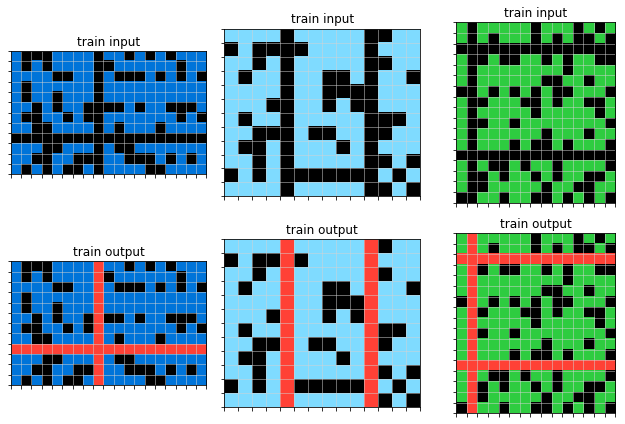

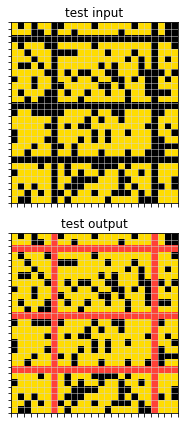

ce22a75a.json


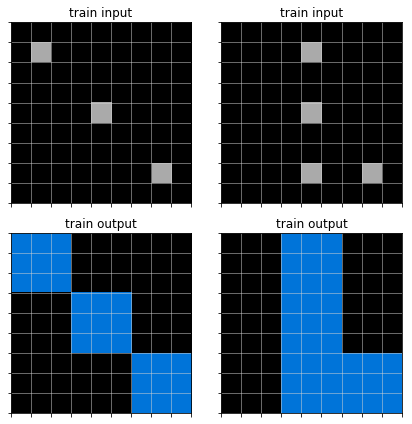

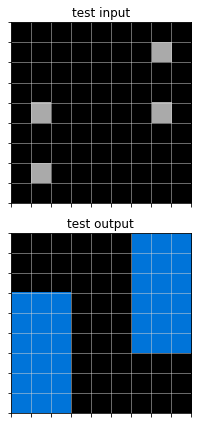

d43fd935.json


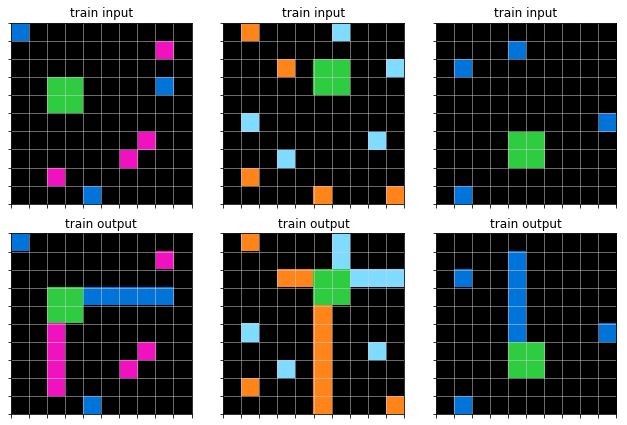

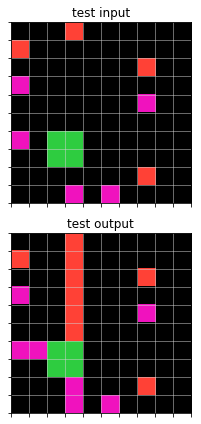

d4a91cb9.json


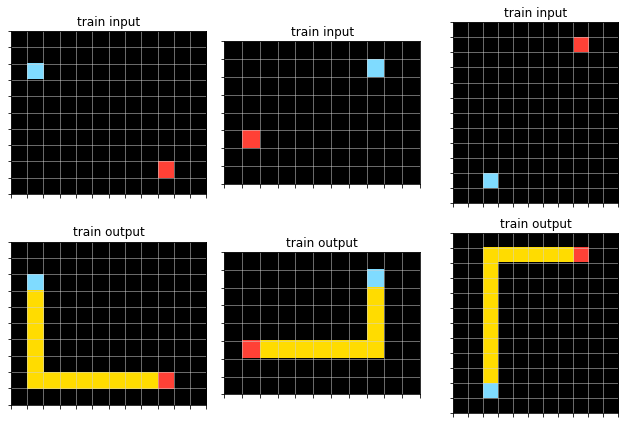

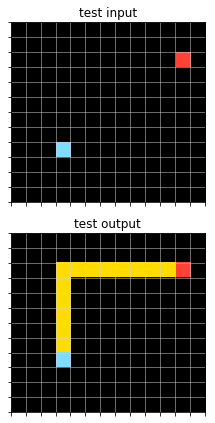

d6ad076f.json


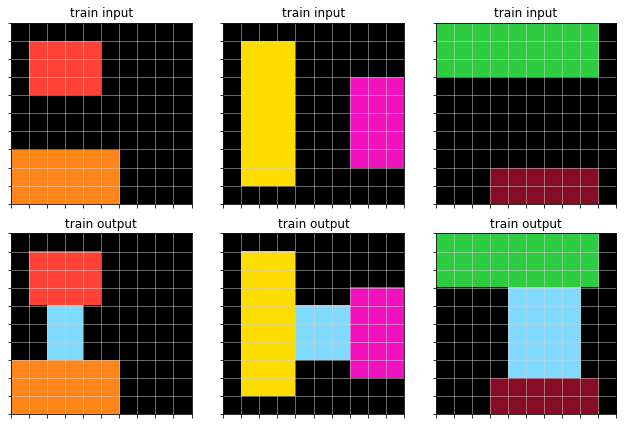

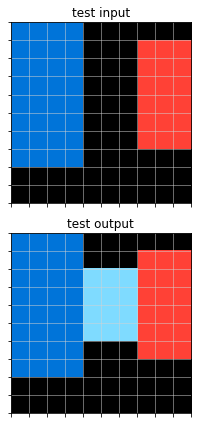

d9f24cd1.json


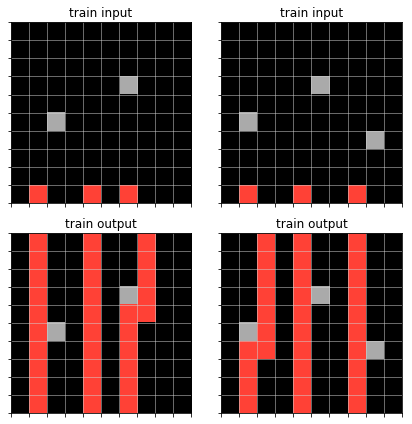

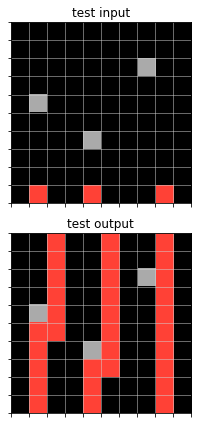

dbc1a6ce.json


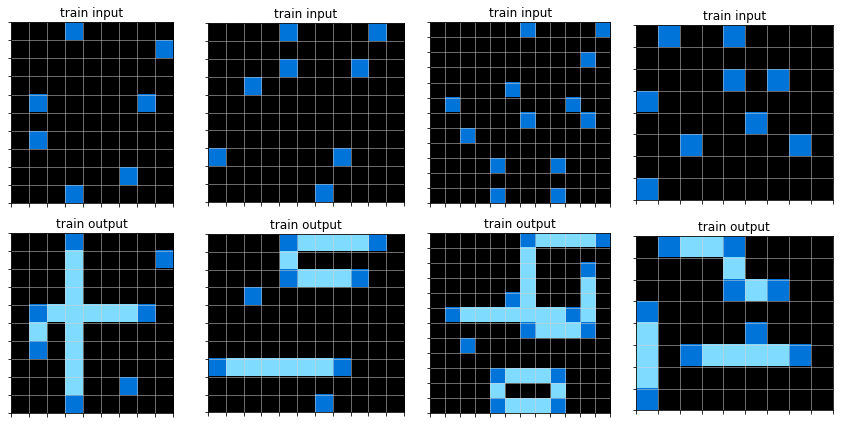

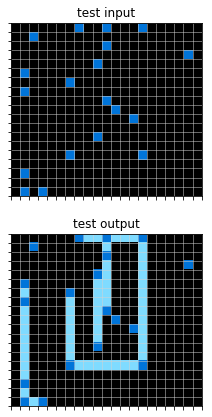

ded97339.json


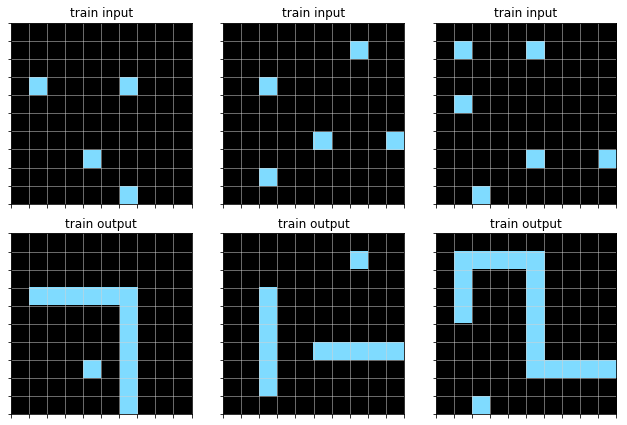

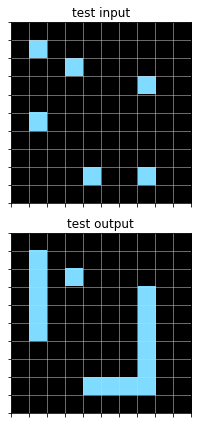

ecdecbb3.json


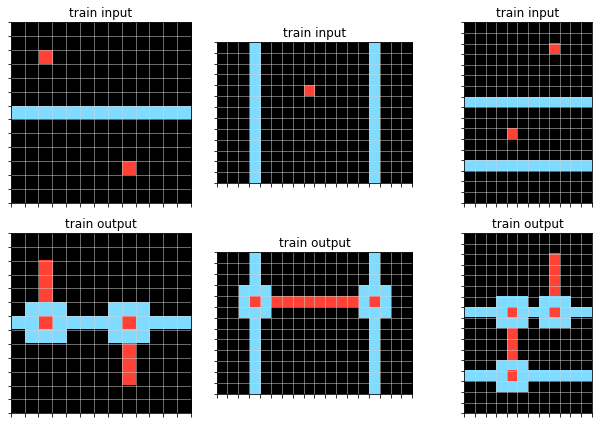

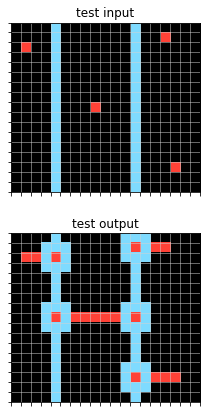

ef135b50.json


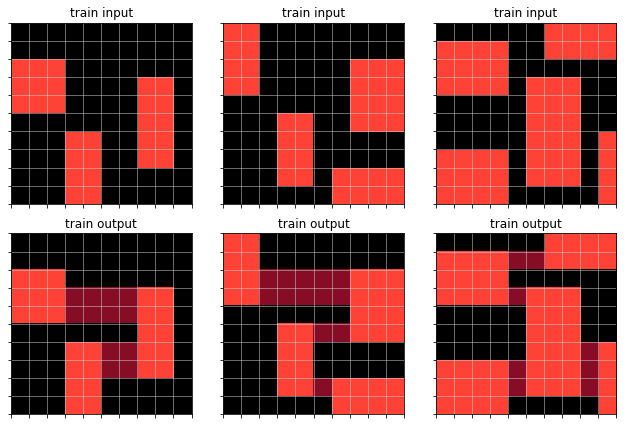

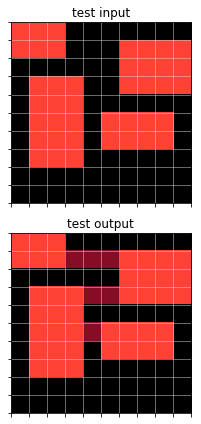

f8c80d96.json


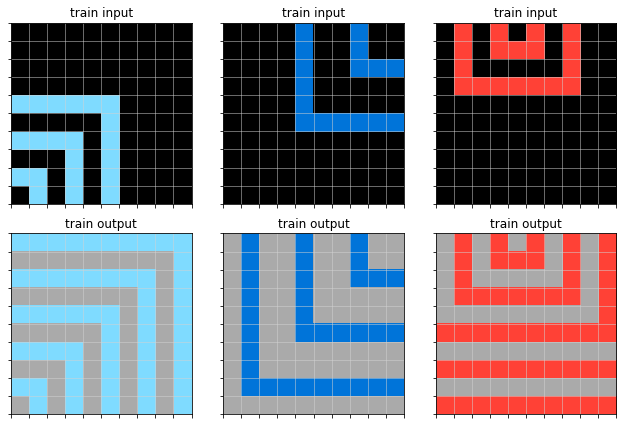

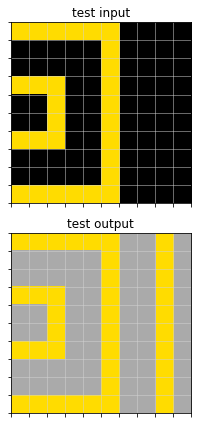

38, 9.5%
58, 14.5%
16, 16.0%


In [28]:
# 線を伸ばすまたは塗りつぶすことによって図形がくっついているパターンが多い
tmp = training_descriptive_df[training_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.increase_color_sum==1]
tmp = tmp[tmp.increase_color_block==1]
tmp = tmp[tmp["decrease_objects"]==1]
tmp3_train = tmp.copy()

for i in tmp["task_name"]:
    print(i)
    task = get_data(str(training_path / i))
    plot_task(task)
    
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / training_descriptive_df.shape[0])+"%")    
tmp = evaluation_descriptive_df[evaluation_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.increase_color_sum==1]
tmp = tmp[tmp.increase_color_block==1]
tmp = tmp[tmp["decrease_objects"]==1]
tmp3_eval = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / evaluation_descriptive_df.shape[0])+"%")

tmp = test_descriptive_df[test_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.increase_color_sum==1]
tmp = tmp[tmp.increase_color_block==1]
tmp = tmp[tmp["decrease_objects"]==1]
tmp3_test = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / test_descriptive_df.shape[0])+"%")

# class4: same shape & increase color sum & increse objects & horizontal line

1e32b0e9.json


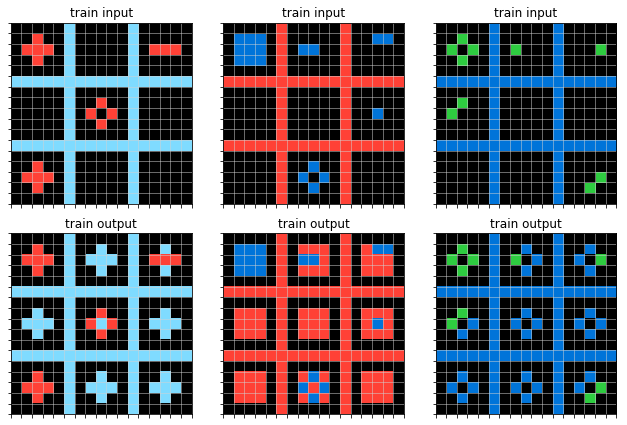

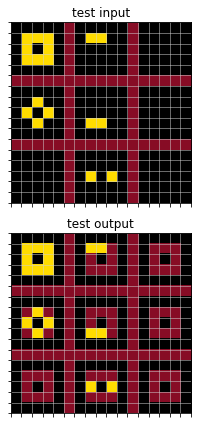

496994bd.json


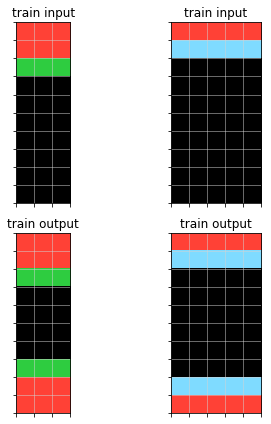

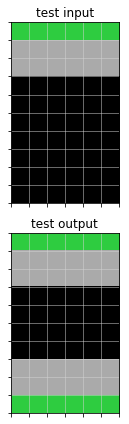

c444b776.json


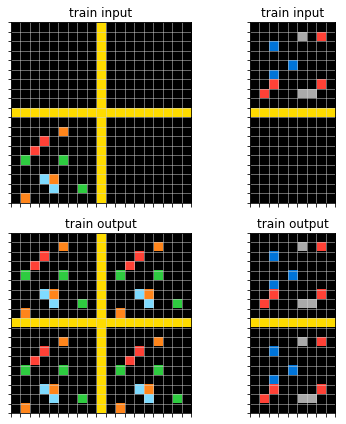

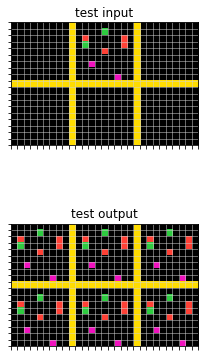

3, 0.75%
0, 0.0%
0, 0.0%


In [29]:
# パターンの繰り返しが多い気がする
tmp = training_descriptive_df[training_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.increase_color_sum==1]
tmp = tmp[tmp["increase_objects"]==1]
tmp = tmp[tmp.horizontal_line==1]
tmp4_train = tmp.copy()

for i in tmp["task_name"]:
    print(i)
    task = get_data(str(training_path / i))
    plot_task(task)
    
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / training_descriptive_df.shape[0])+"%")
tmp = evaluation_descriptive_df[evaluation_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.increase_color_sum==1]
tmp = tmp[tmp["increase_objects"]==1]
tmp = tmp[tmp.horizontal_line==1]
tmp4_eval = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / evaluation_descriptive_df.shape[0])+"%")

tmp = test_descriptive_df[test_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.increase_color_sum==1]
tmp = tmp[tmp["increase_objects"]==1]
tmp = tmp[tmp.horizontal_line==1]
tmp4_test = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / test_descriptive_df.shape[0])+"%")

# class5: same shape & increase color sum & increse objects & no horizontal line

045e512c.json


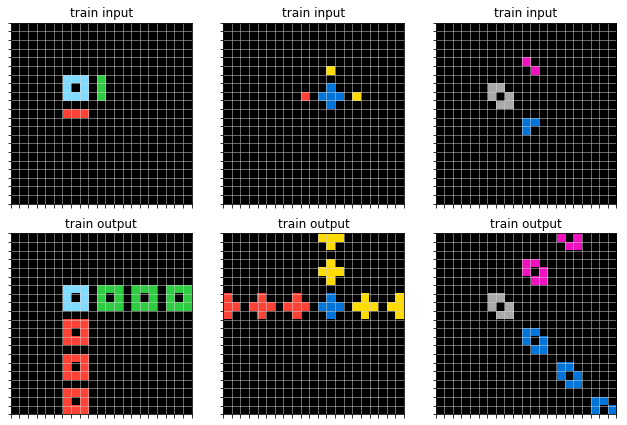

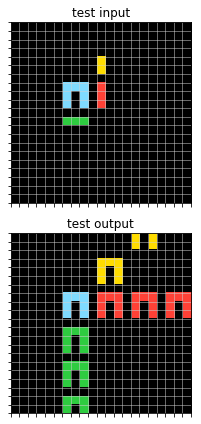

0a938d79.json


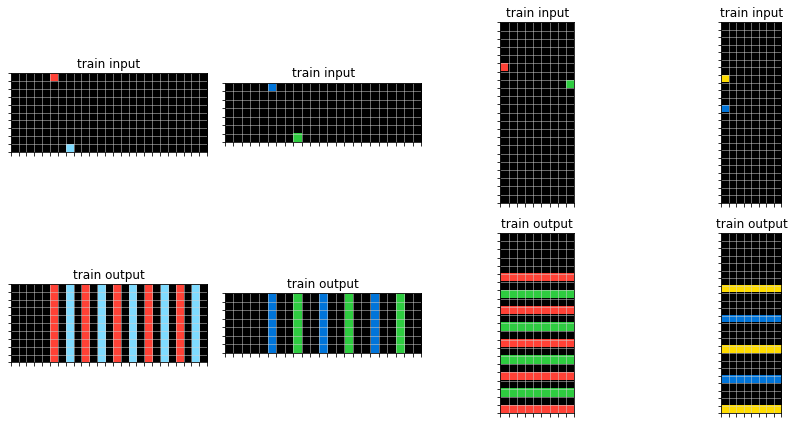

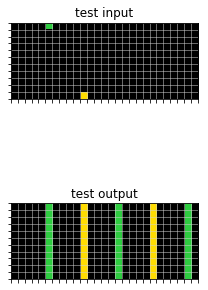

22233c11.json


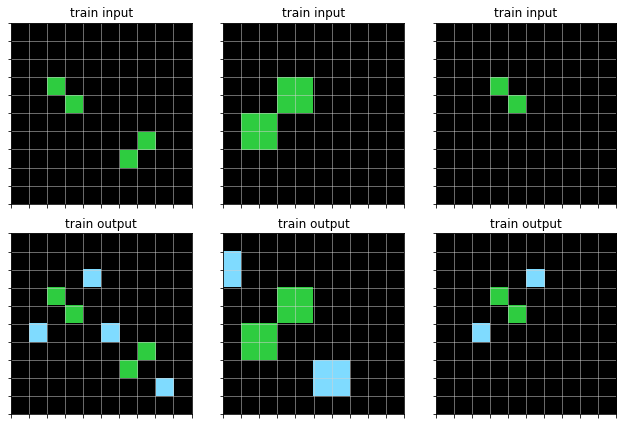

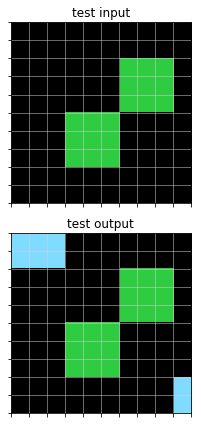

2281f1f4.json


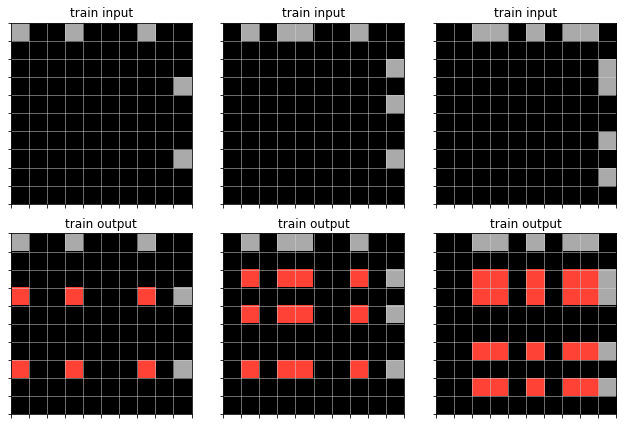

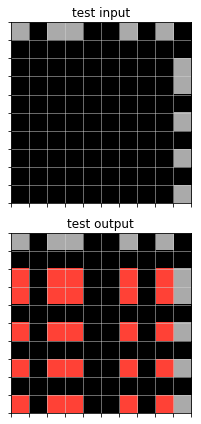

28e73c20.json


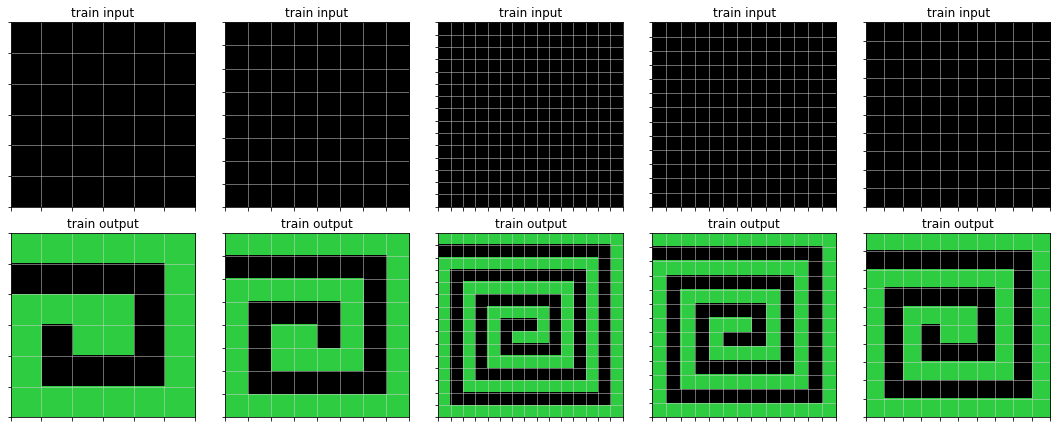

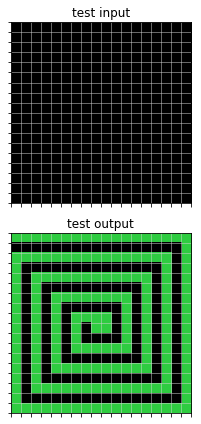

54d82841.json


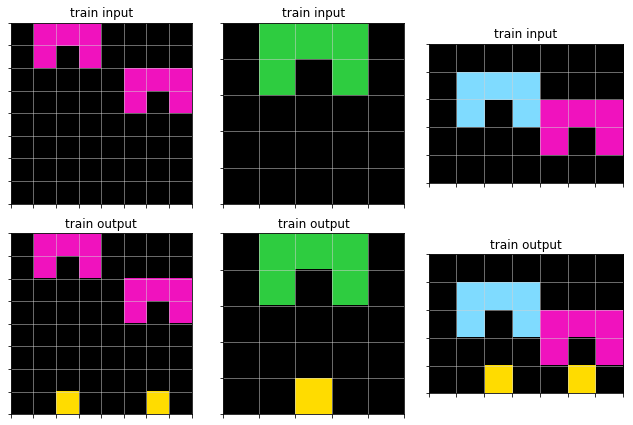

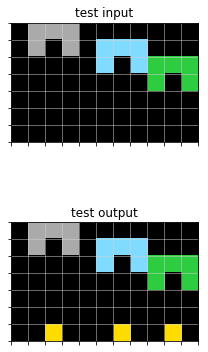

5c2c9af4.json


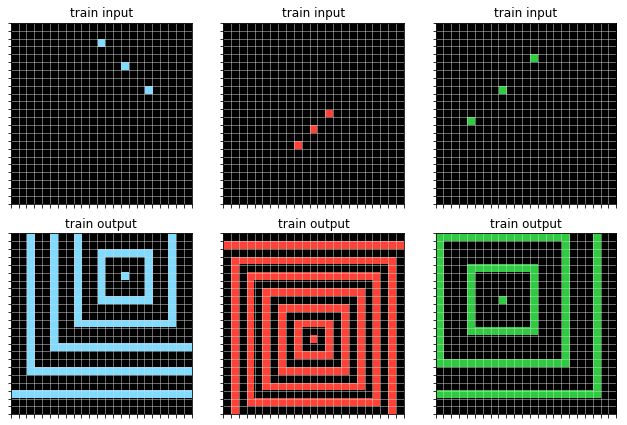

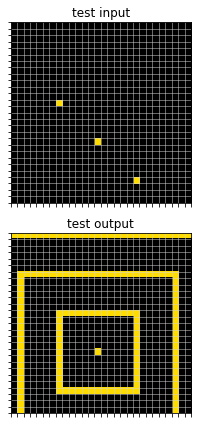

6e19193c.json


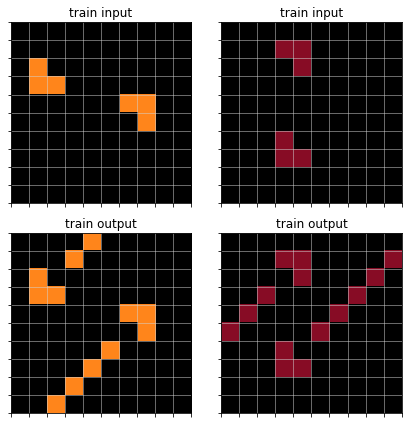

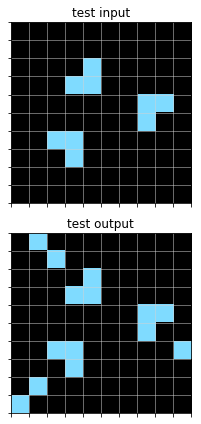

6f8cd79b.json


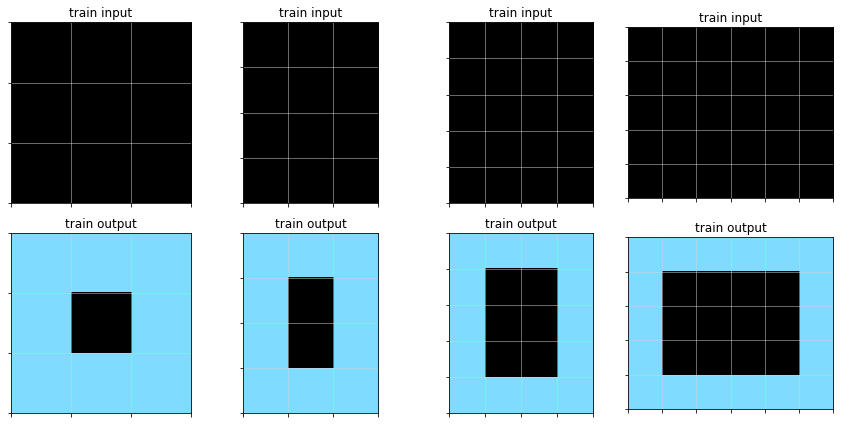

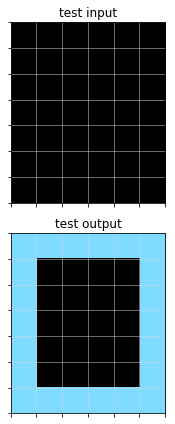

9d9215db.json


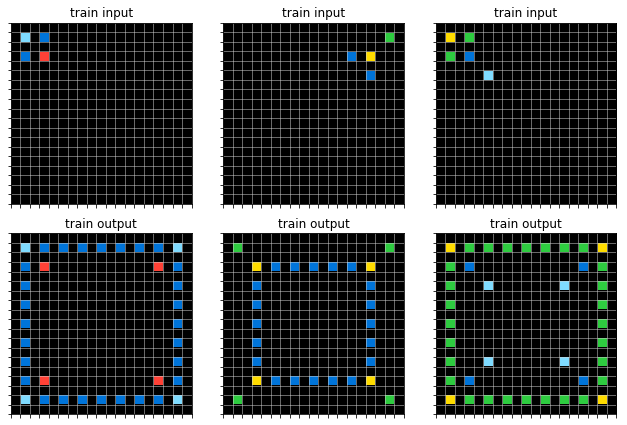

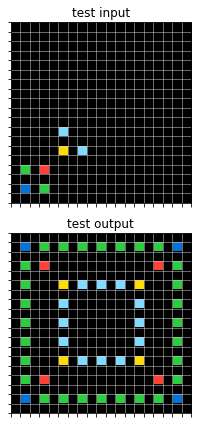

a64e4611.json


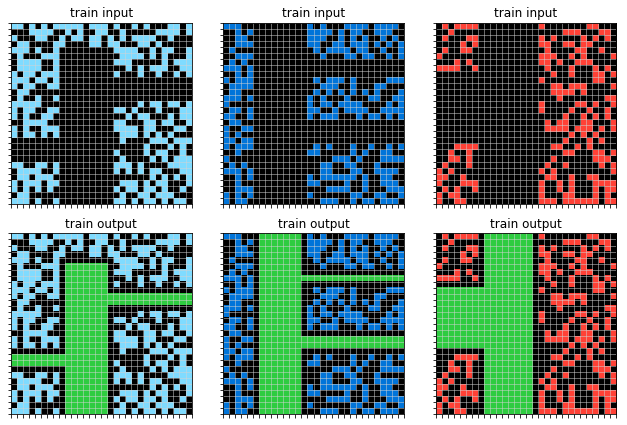

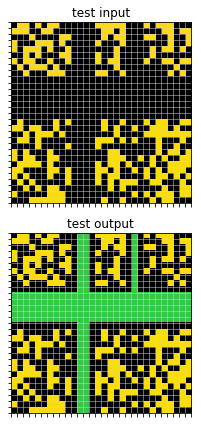

d22278a0.json


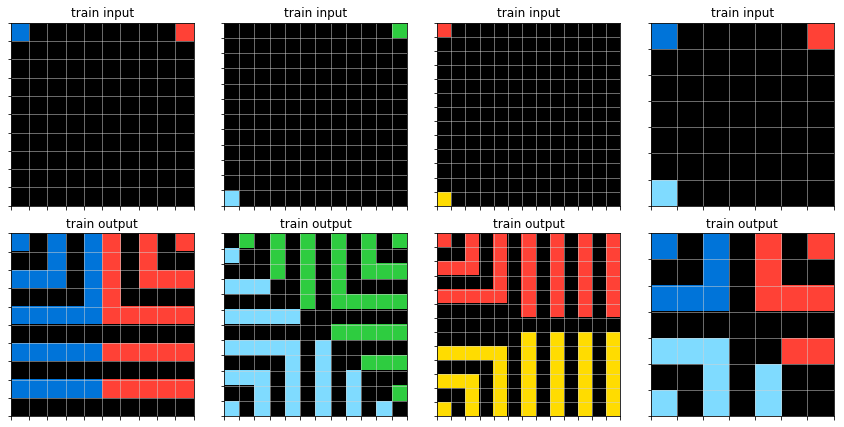

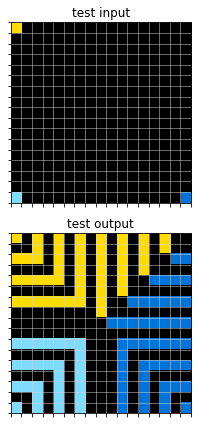

e9614598.json


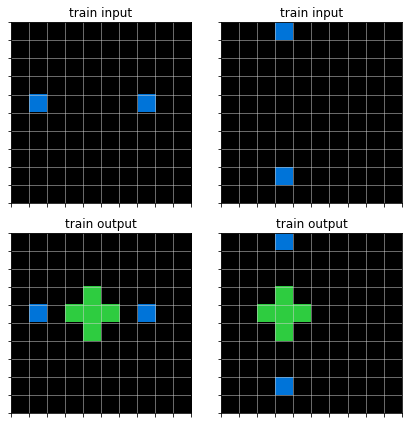

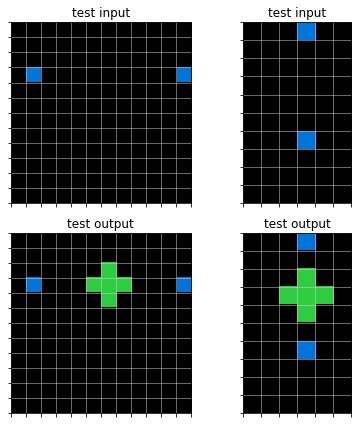

13, 3.25%
13, 3.25%
0, 0.0%


In [30]:
# パターンの繰り返しが多い気がする
tmp = training_descriptive_df[training_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.increase_color_sum==1]
tmp = tmp[tmp["increase_objects"]==1]
tmp = tmp[tmp.horizontal_line==0]
tmp5_train = tmp.copy()

for i in tmp["task_name"]:
    print(i)
    task = get_data(str(training_path / i))
    plot_task(task)
    
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / training_descriptive_df.shape[0])+"%")
tmp = evaluation_descriptive_df[evaluation_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.increase_color_sum==1]
tmp = tmp[tmp["increase_objects"]==1]
tmp = tmp[tmp.horizontal_line==0]
tmp5_eval = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / evaluation_descriptive_df.shape[0])+"%")

tmp = test_descriptive_df[test_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.increase_color_sum==1]
tmp = tmp[tmp["increase_objects"]==1]
tmp = tmp[tmp.horizontal_line==1]
tmp5_test = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / test_descriptive_df.shape[0])+"%")

# same shape & increase color sum & same objects

00d62c1b.json


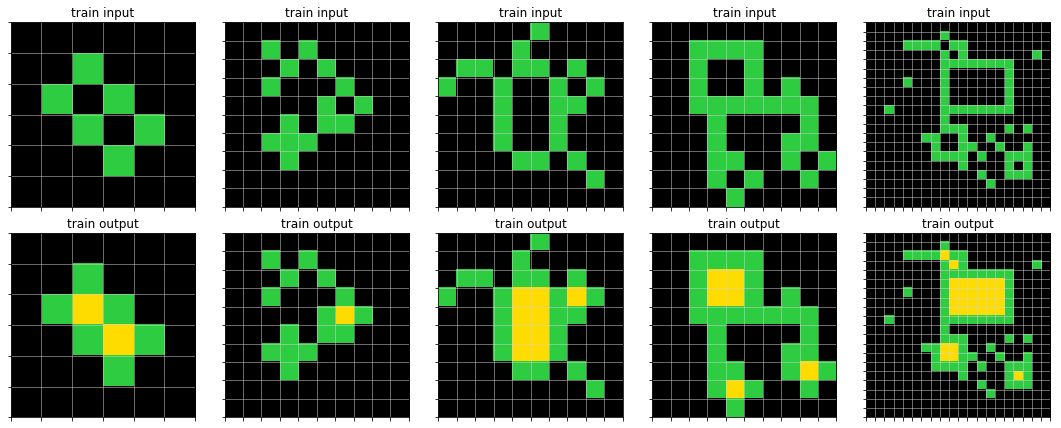

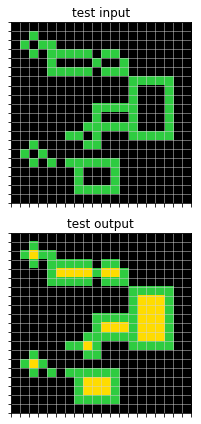

05269061.json


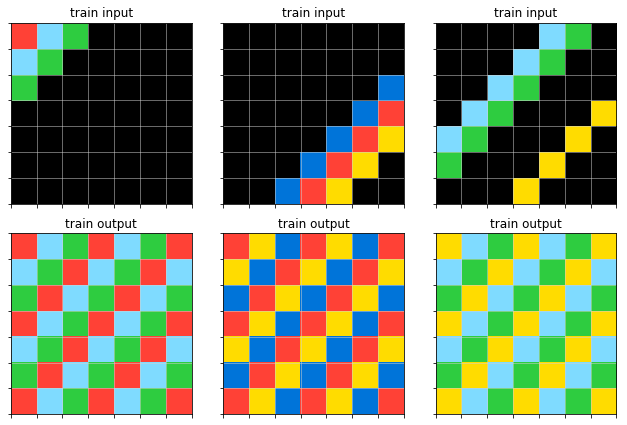

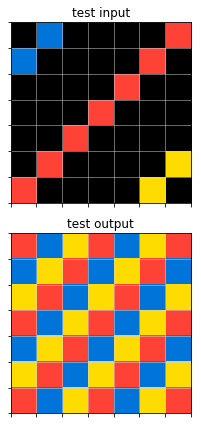

06df4c85.json


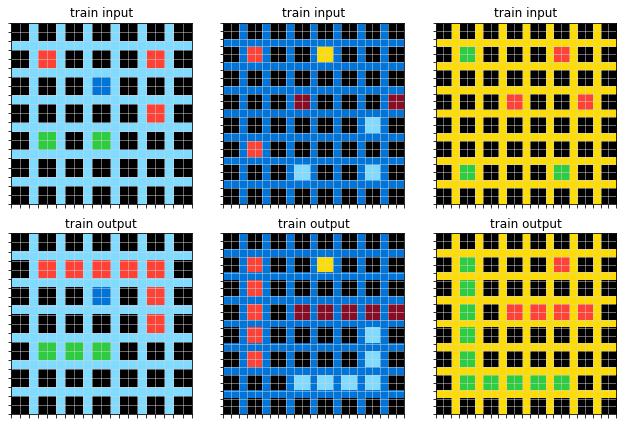

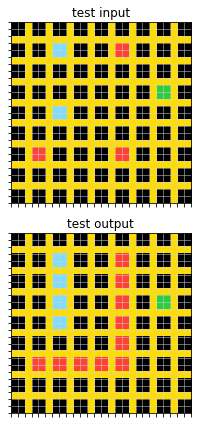

0962bcdd.json


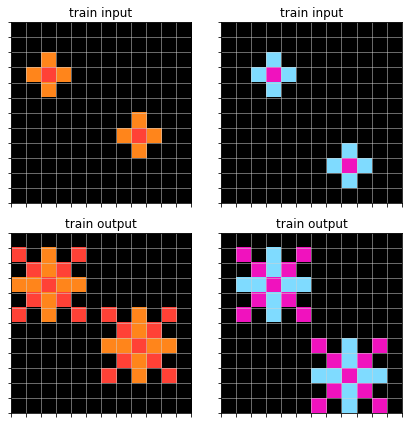

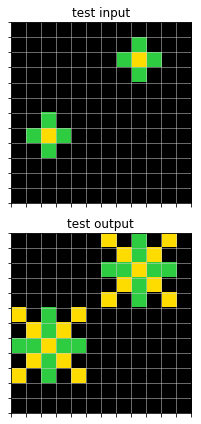

0ca9ddb6.json


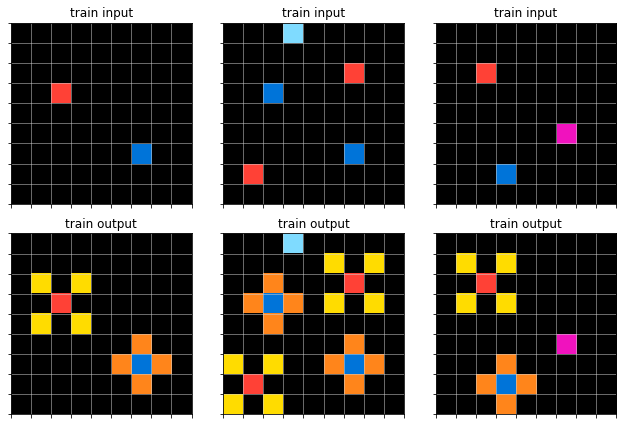

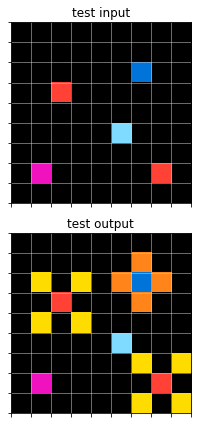

0dfd9992.json


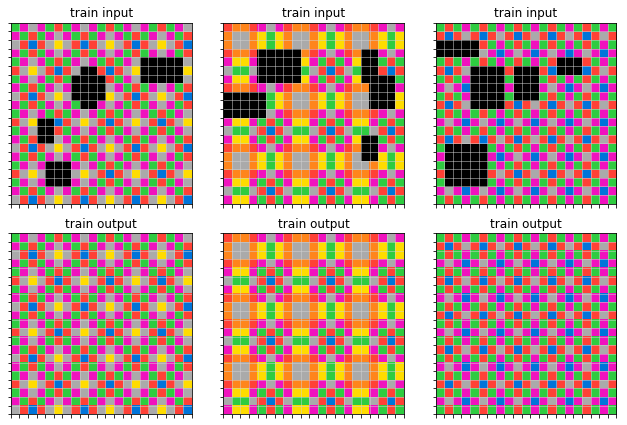

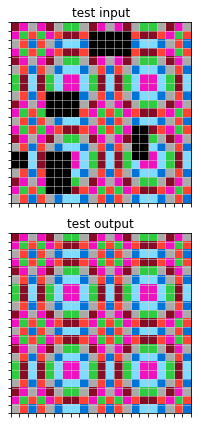

11852cab.json


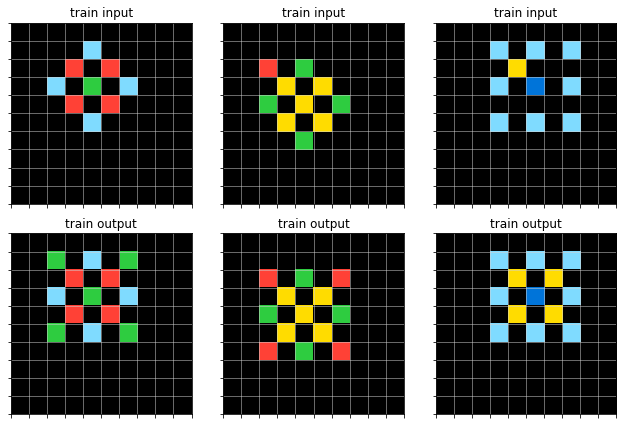

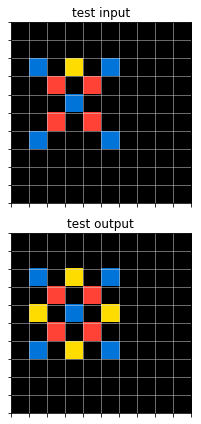

1b60fb0c.json


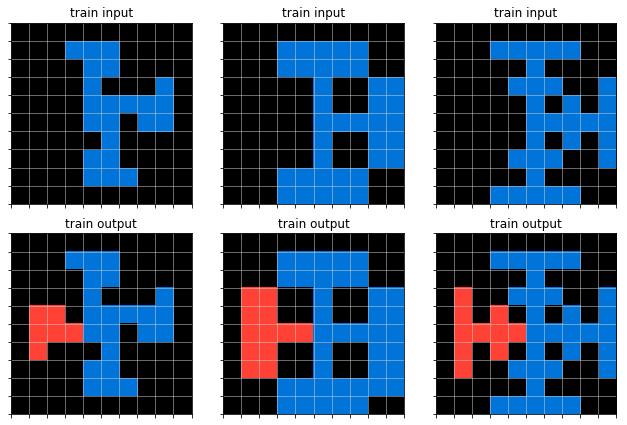

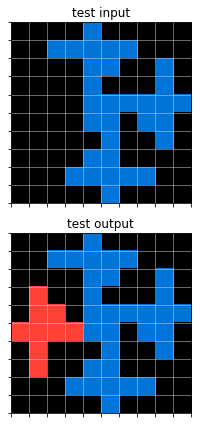

1f0c79e5.json


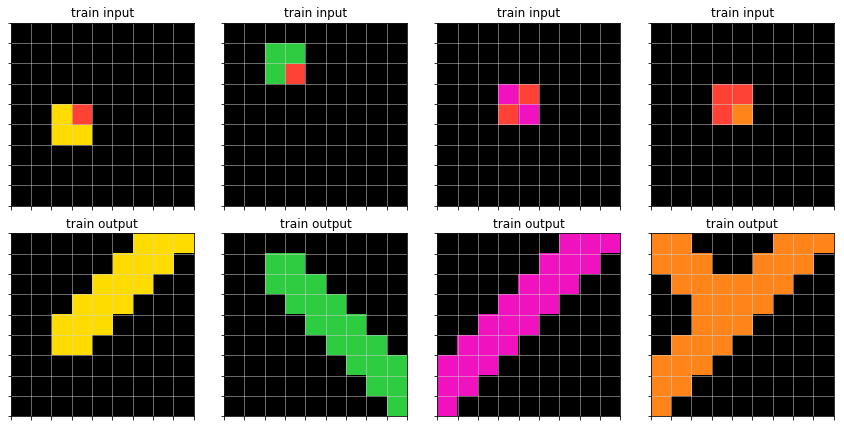

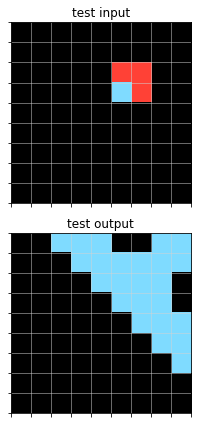

22168020.json


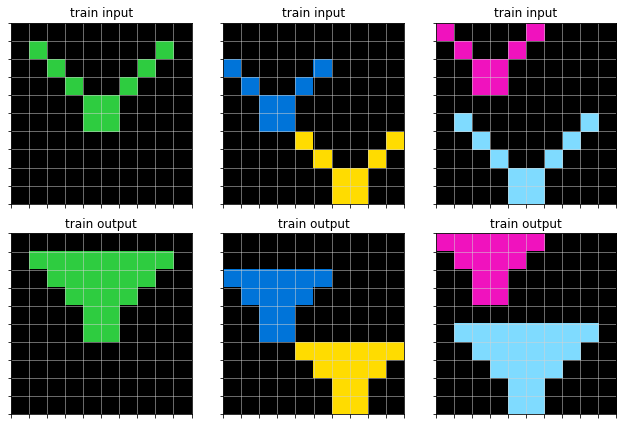

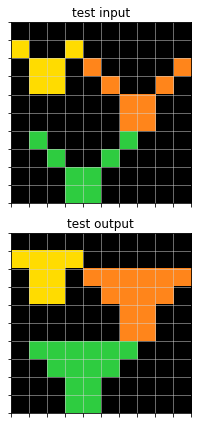

25d487eb.json


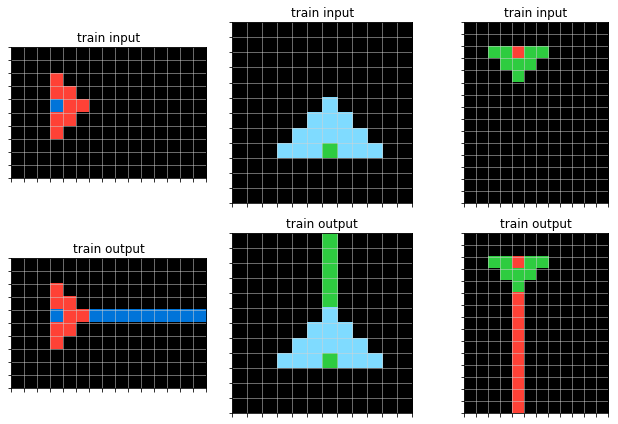

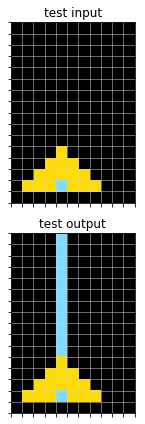

264363fd.json


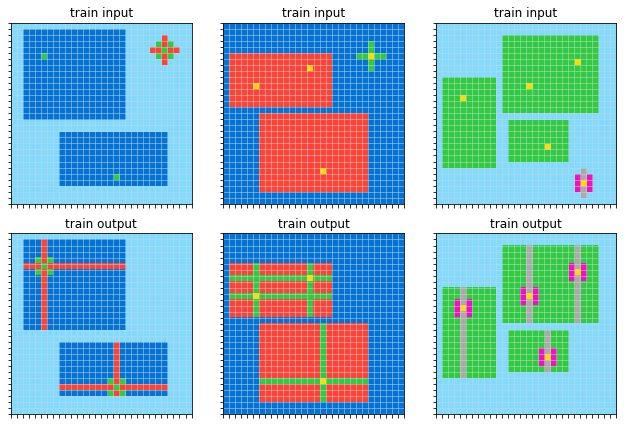

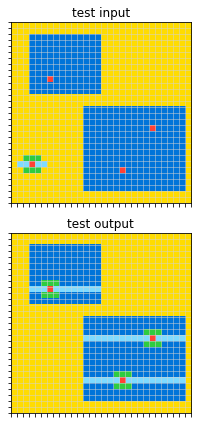

272f95fa.json


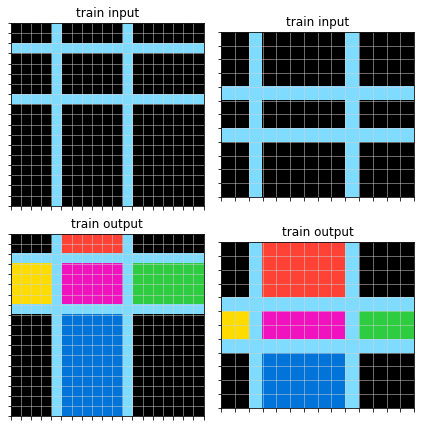

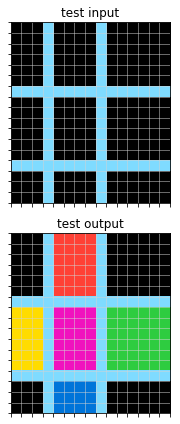

29ec7d0e.json


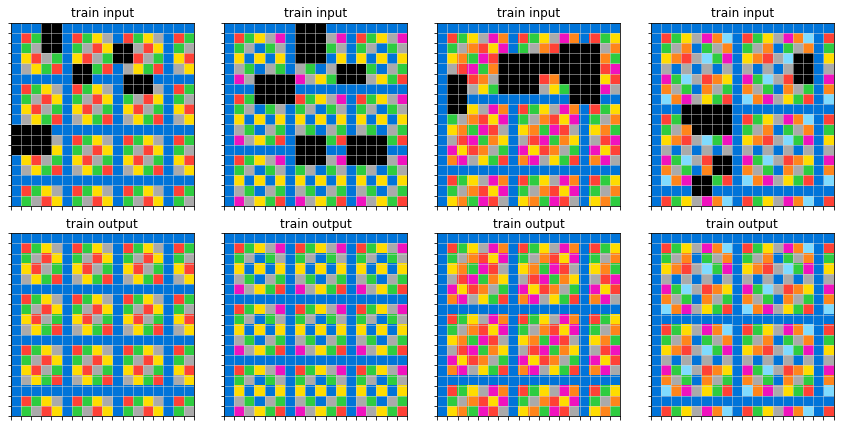

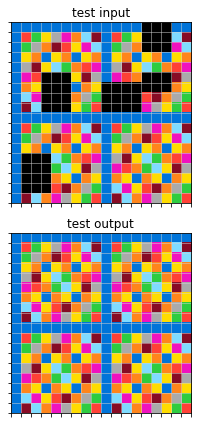

2bcee788.json


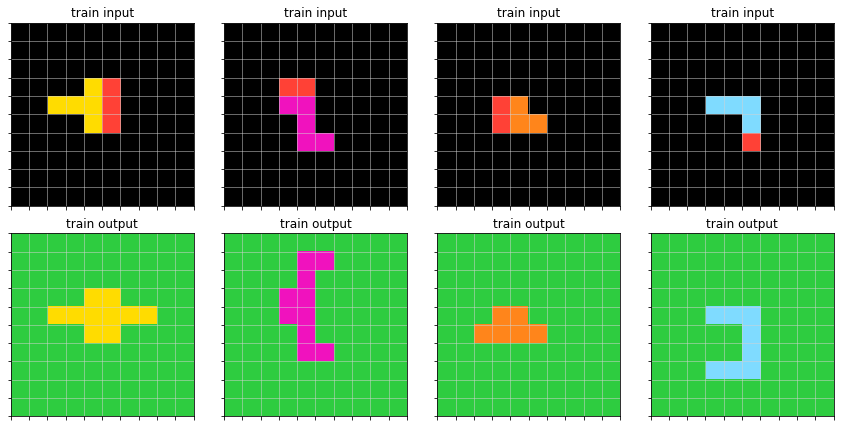

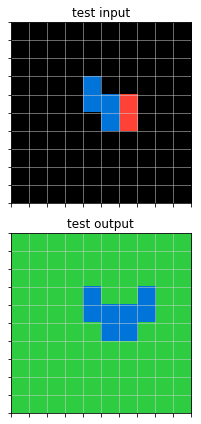

2bee17df.json


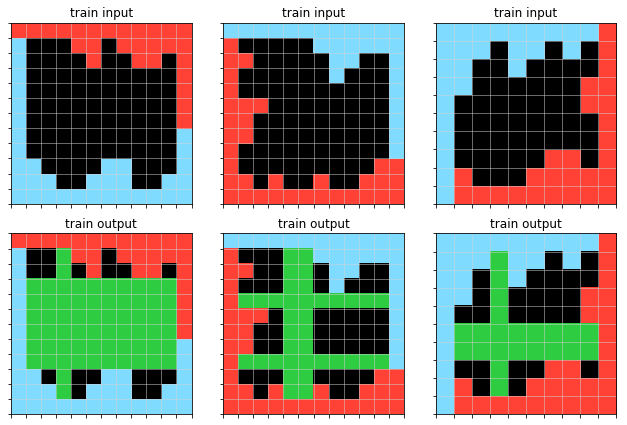

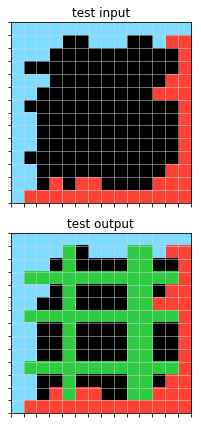

32597951.json


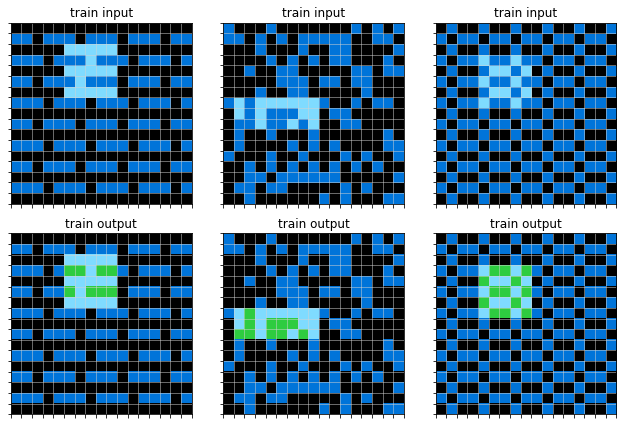

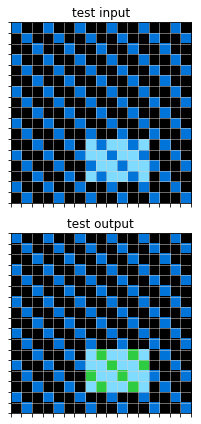

36d67576.json


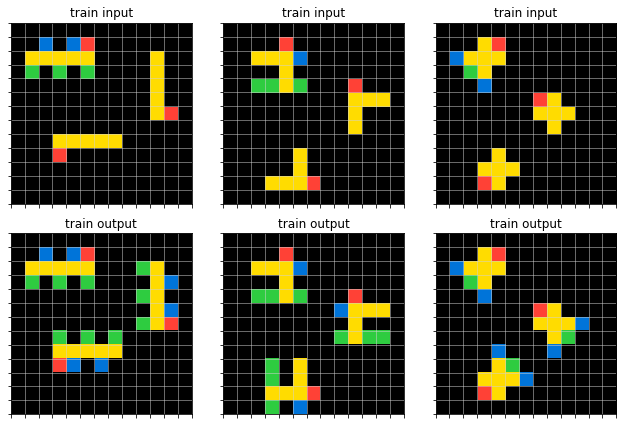

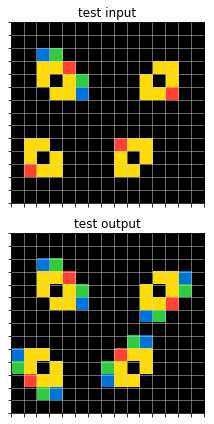

39e1d7f9.json


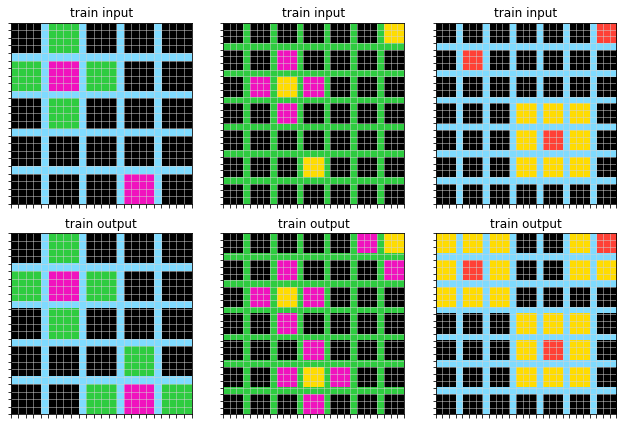

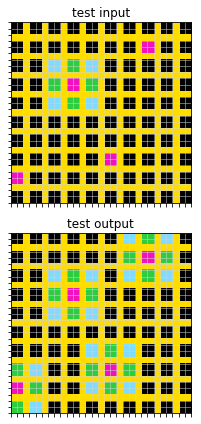

3aa6fb7a.json


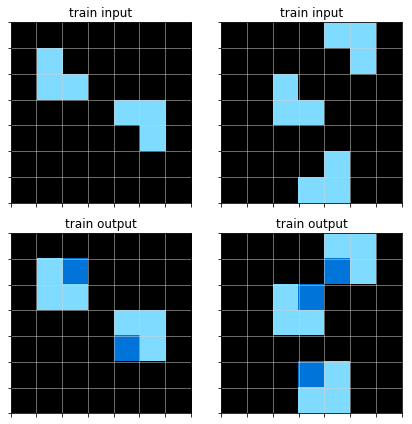

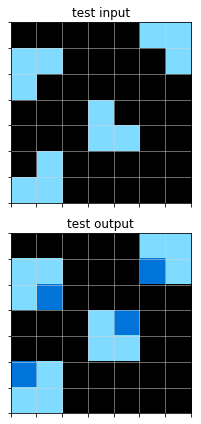

3ac3eb23.json


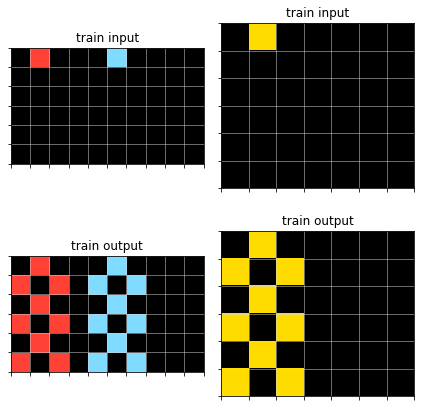

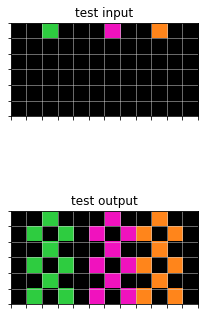

3bd67248.json


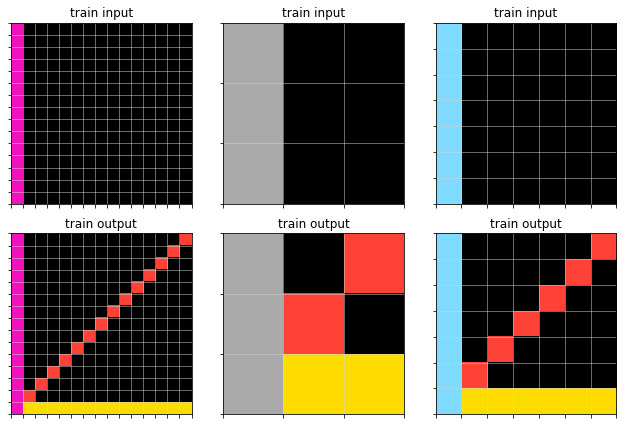

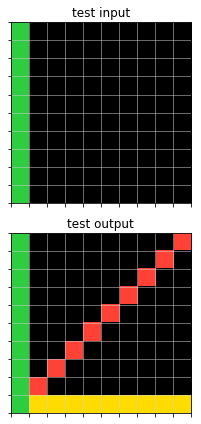

3befdf3e.json


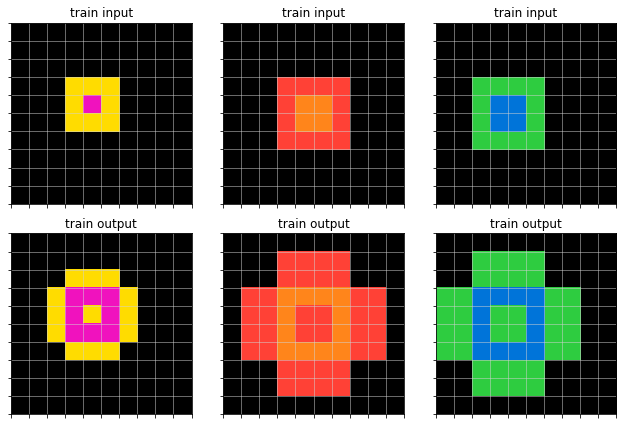

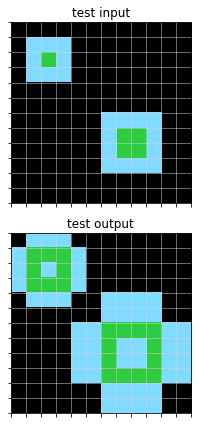

3e980e27.json


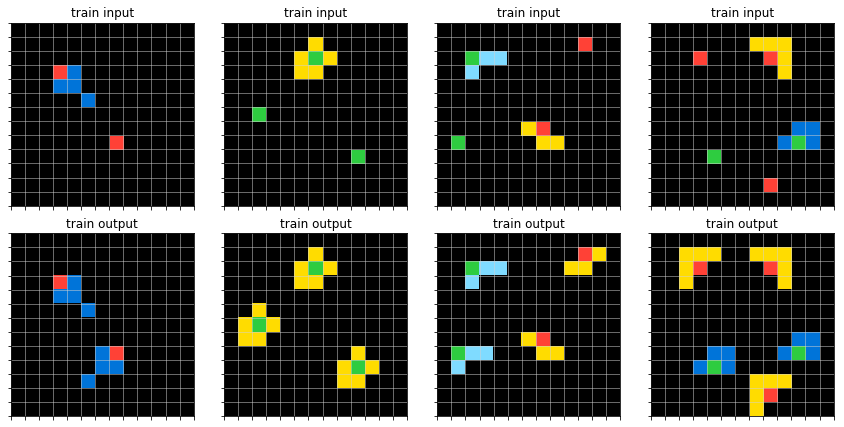

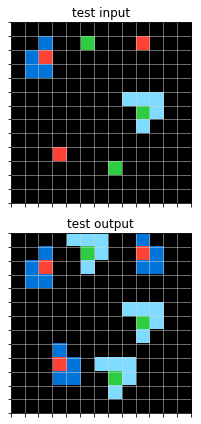

4258a5f9.json


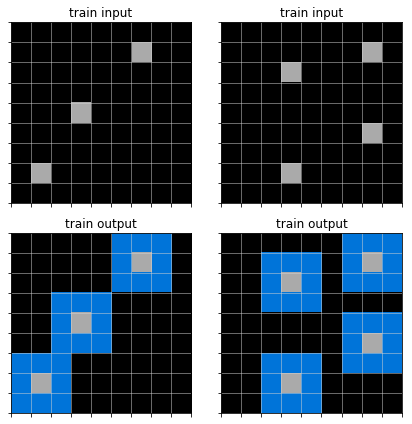

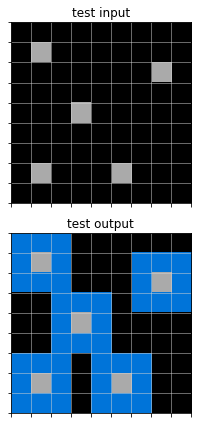

444801d8.json


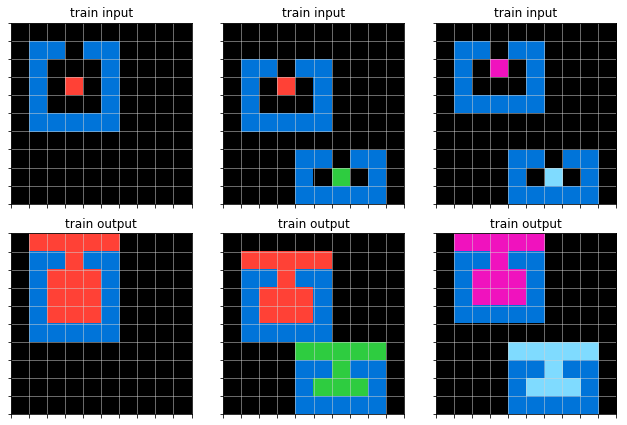

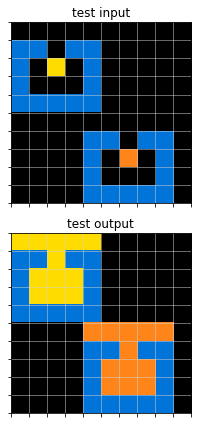

447fd412.json


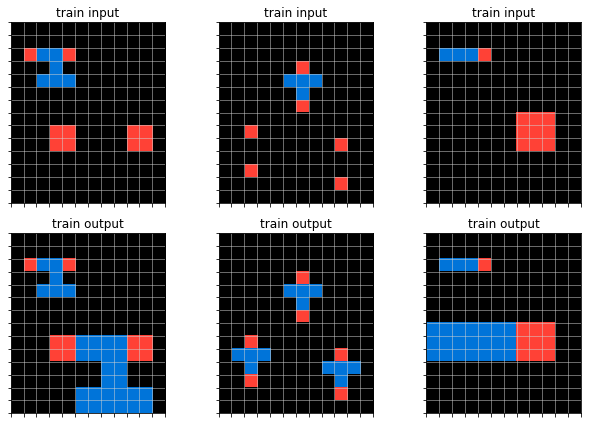

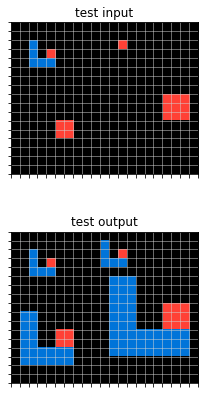

484b58aa.json


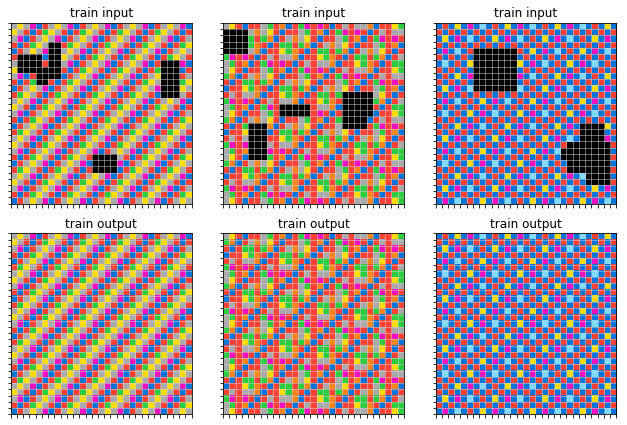

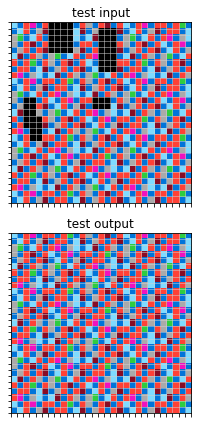

4c5c2cf0.json


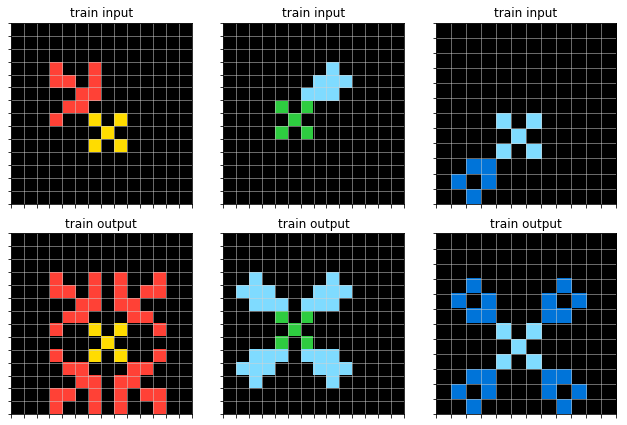

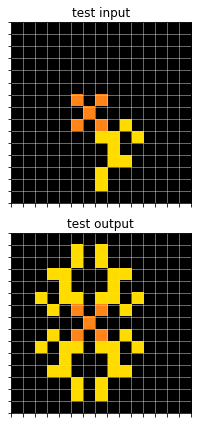

50846271.json


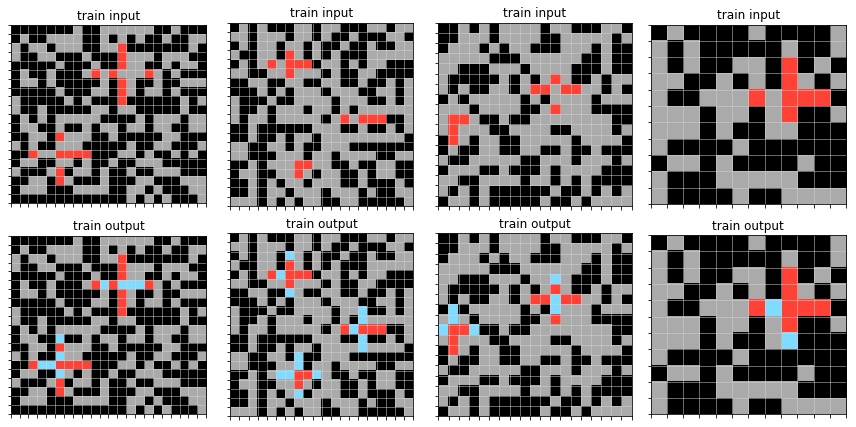

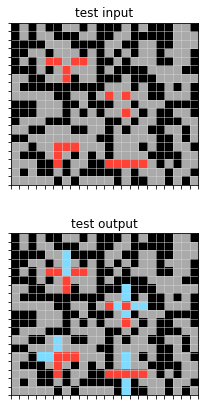

50cb2852.json


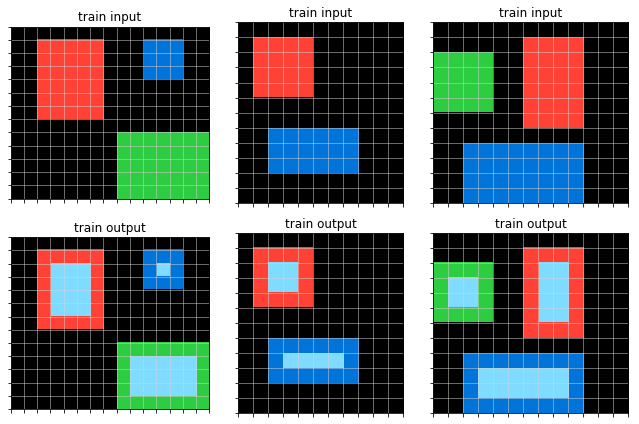

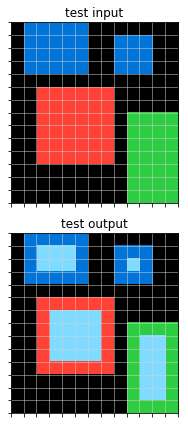

57aa92db.json


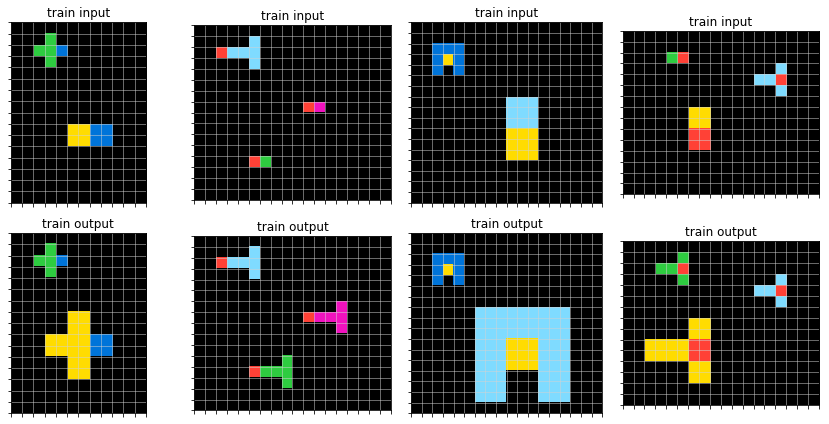

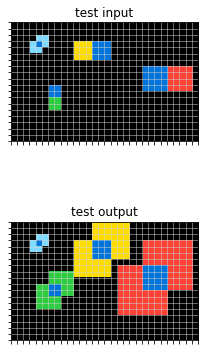

5c0a986e.json


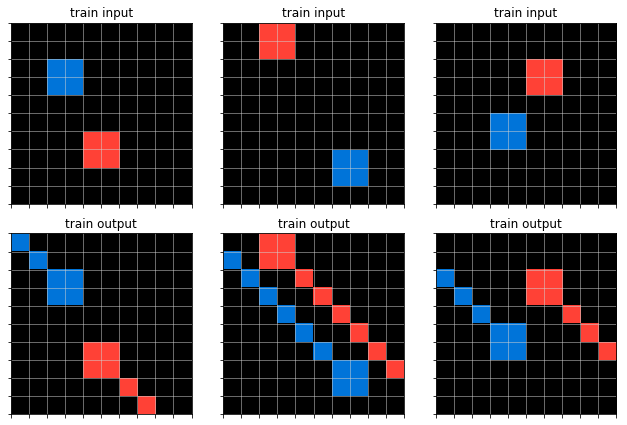

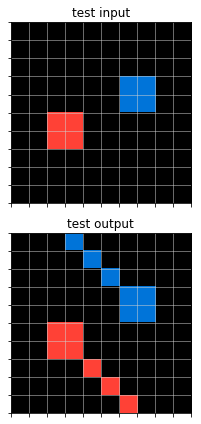

60b61512.json


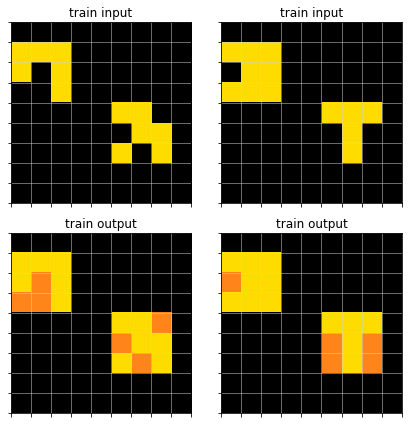

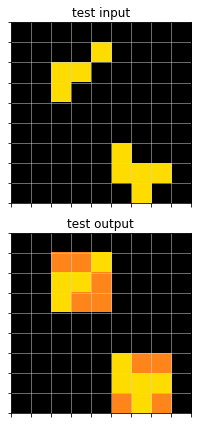

623ea044.json


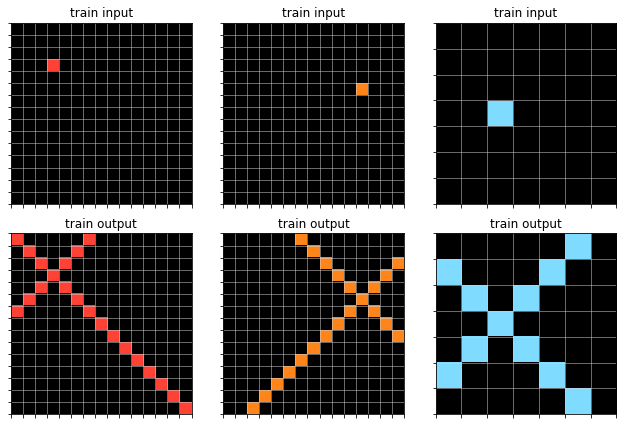

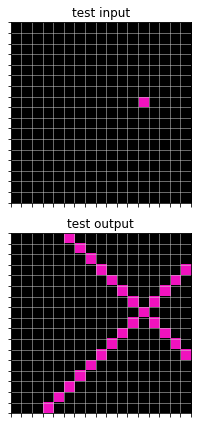

6455b5f5.json


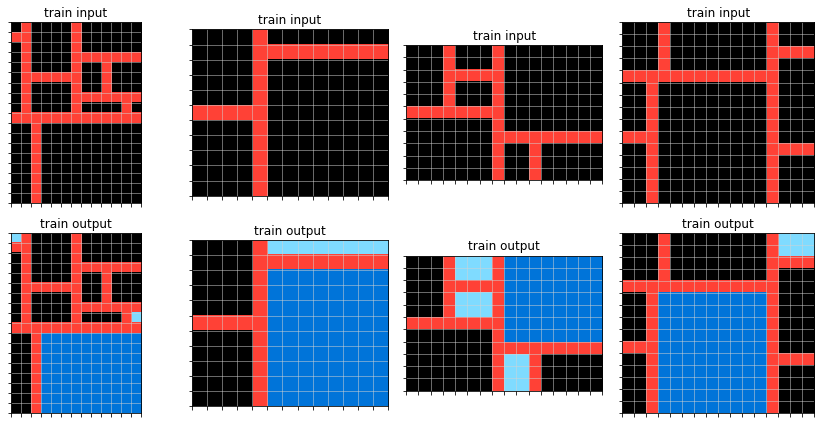

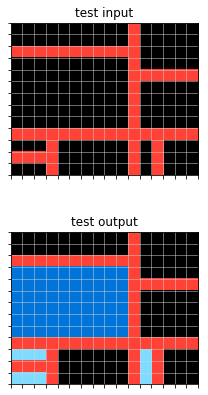

67385a82.json


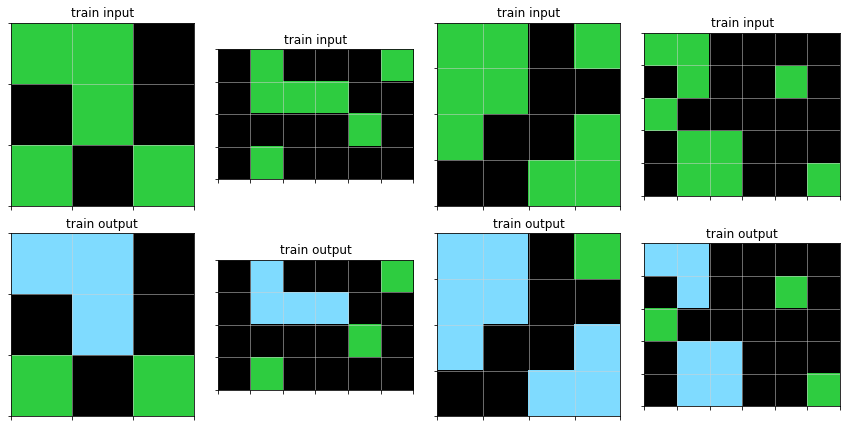

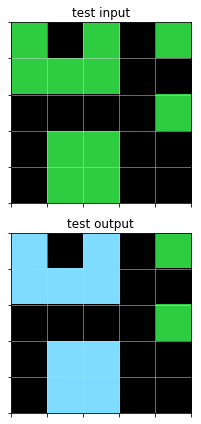

67a423a3.json


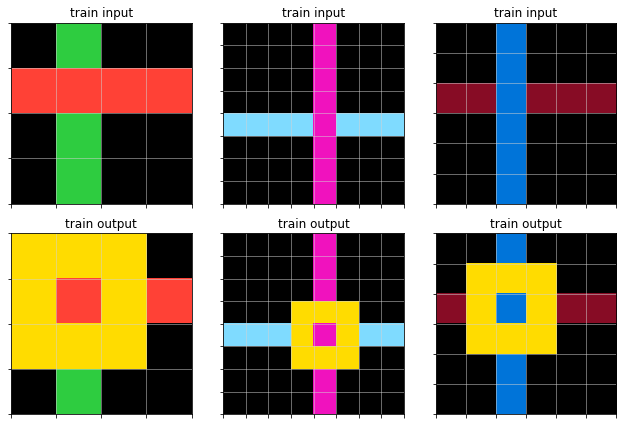

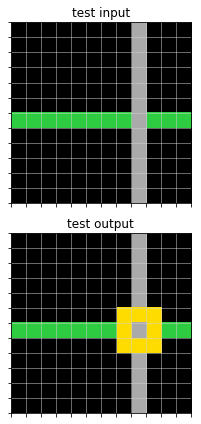

6c434453.json


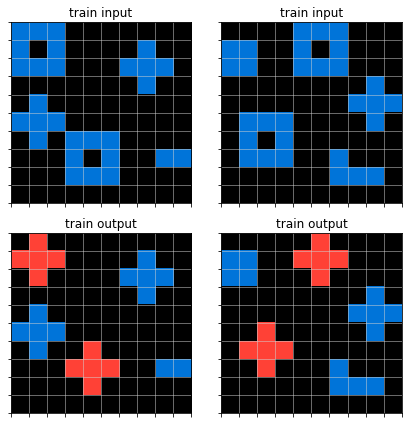

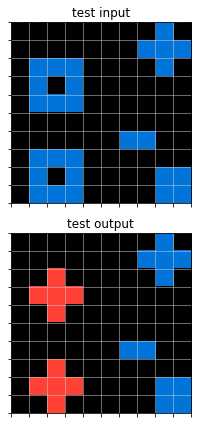

6cf79266.json


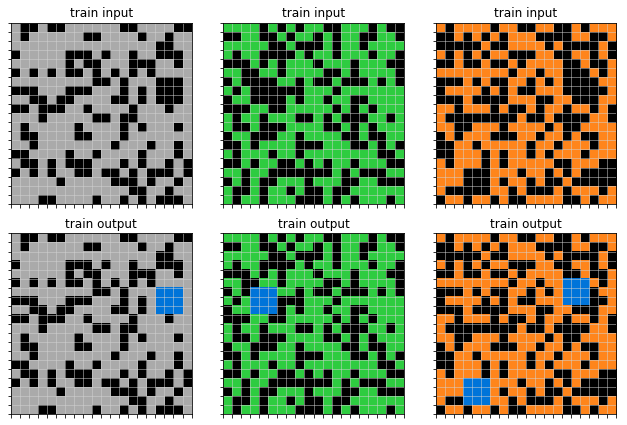

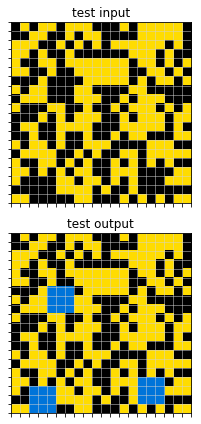

6d75e8bb.json


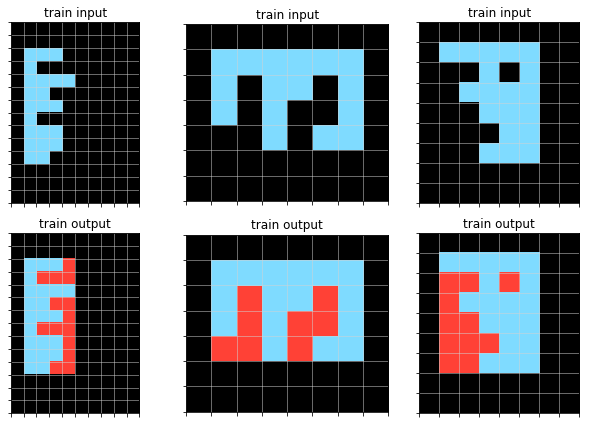

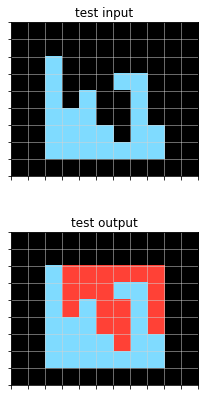

72322fa7.json


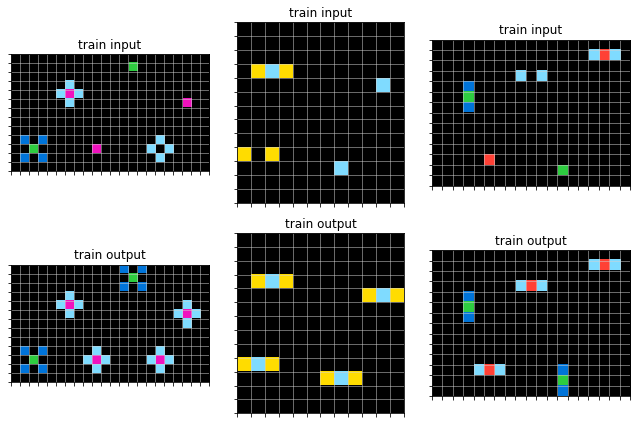

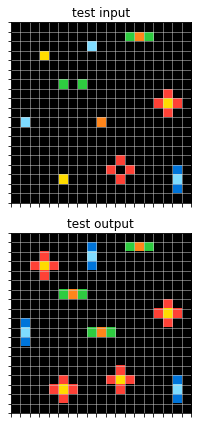

73251a56.json


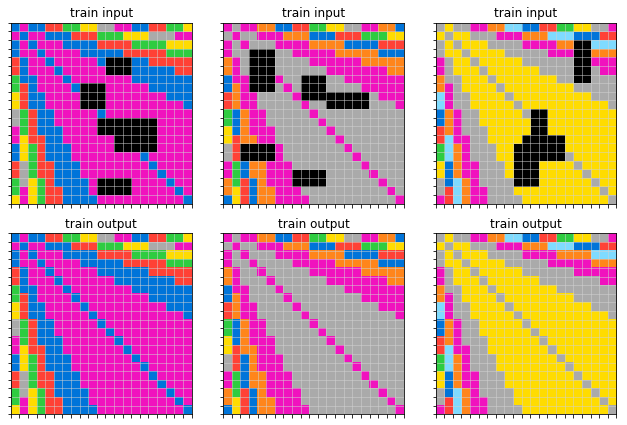

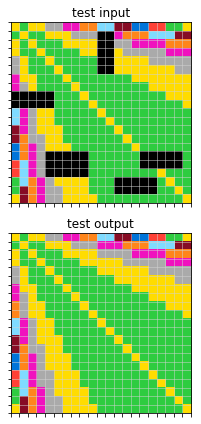

7447852a.json


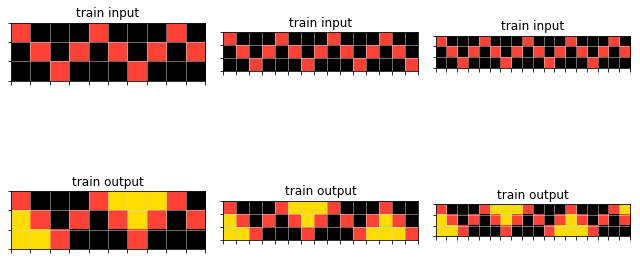

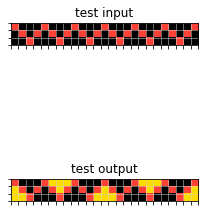

760b3cac.json


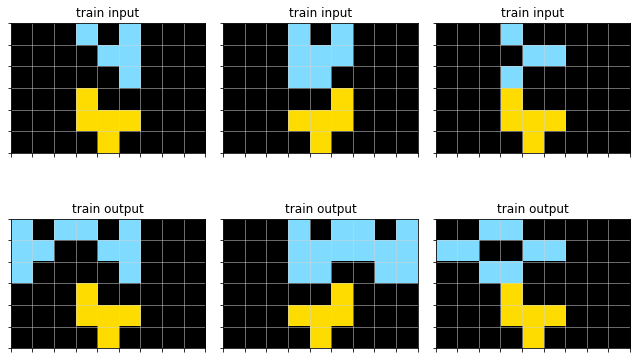

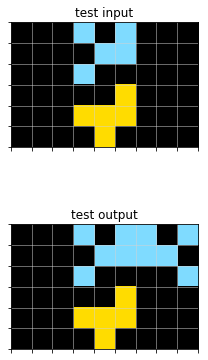

776ffc46.json


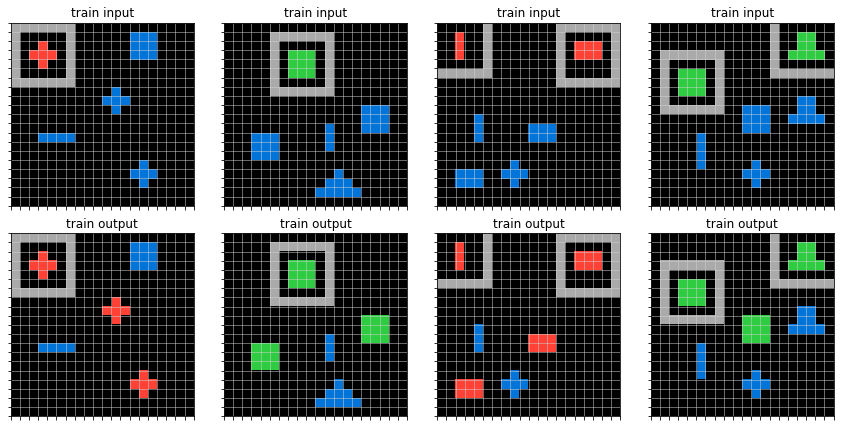

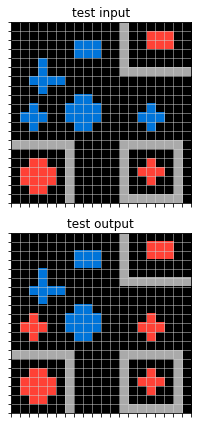

794b24be.json


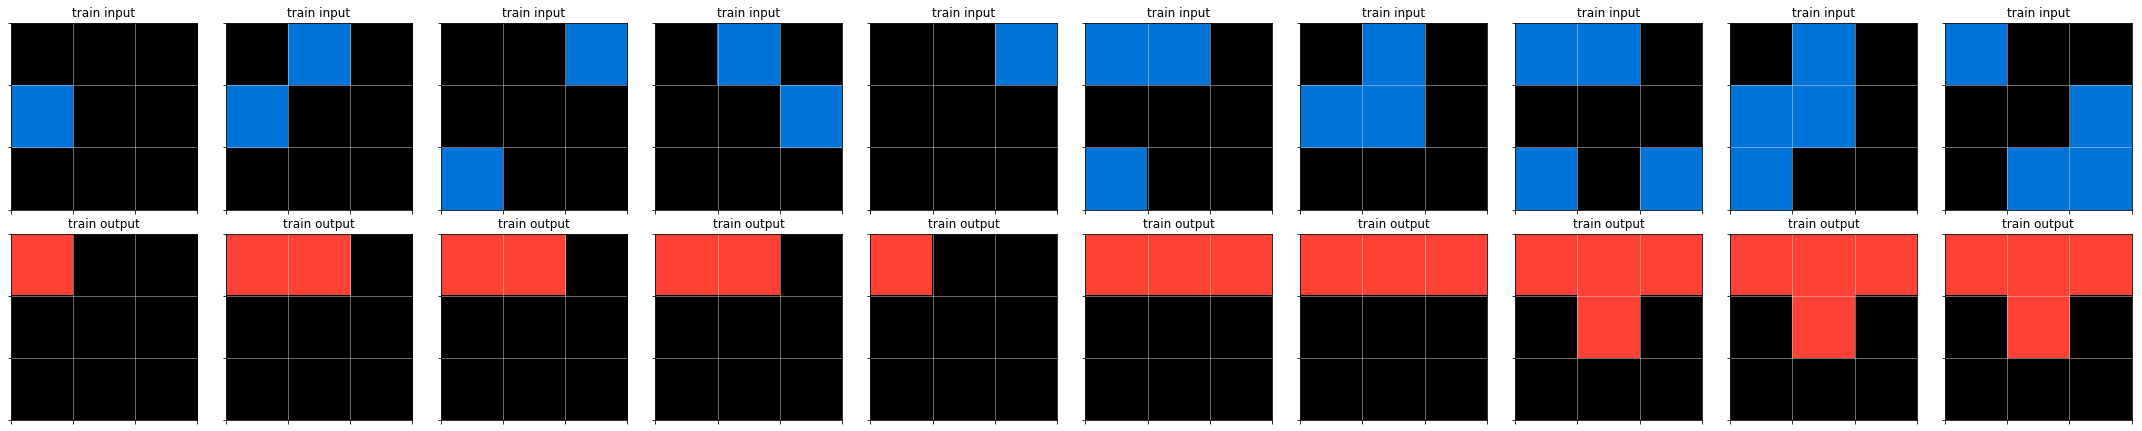

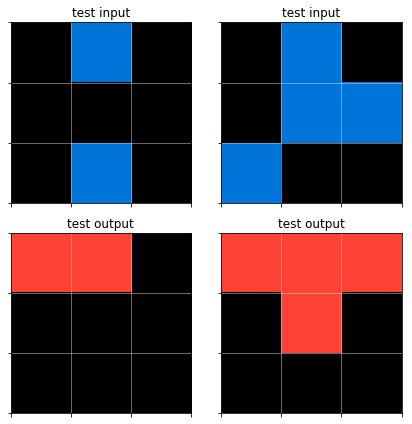

7b6016b9.json


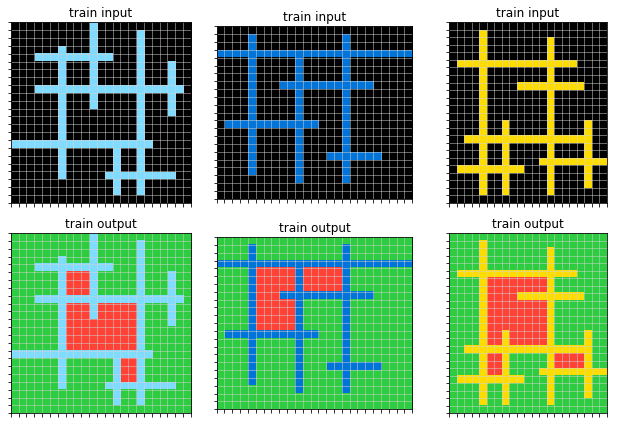

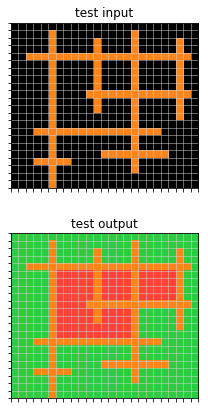

7ddcd7ec.json


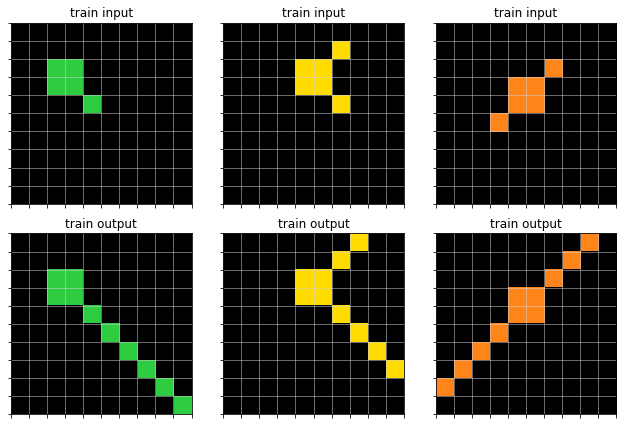

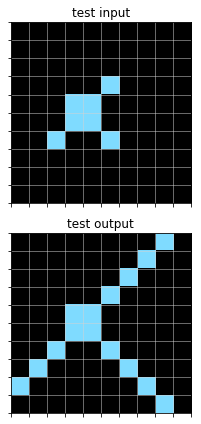

7df24a62.json


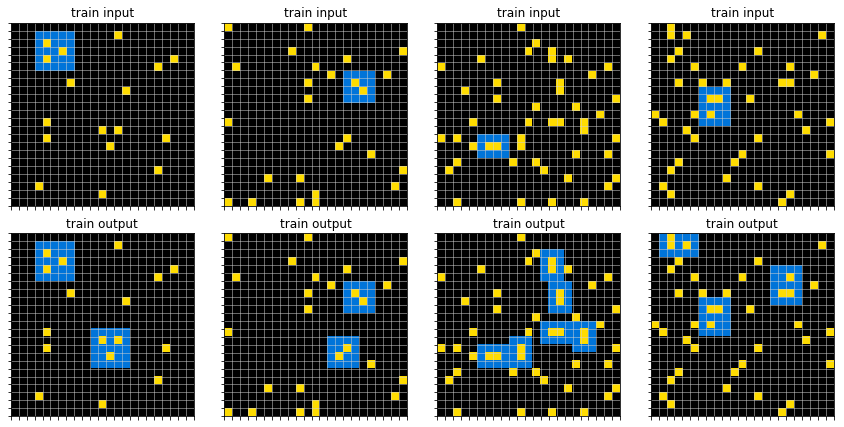

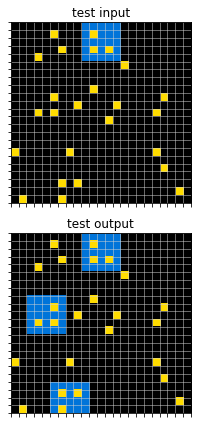

810b9b61.json


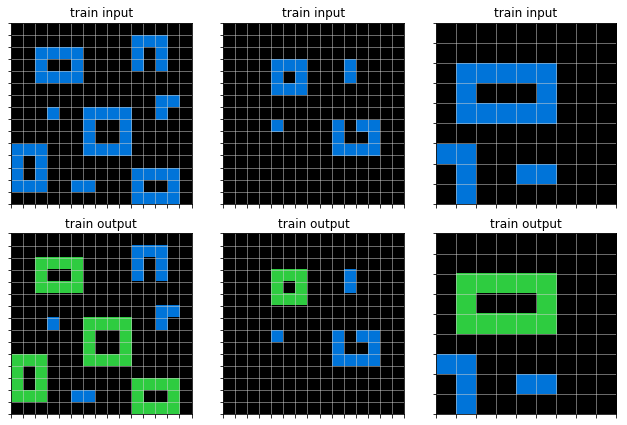

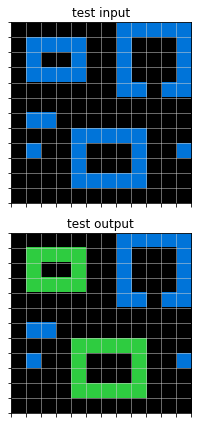

82819916.json


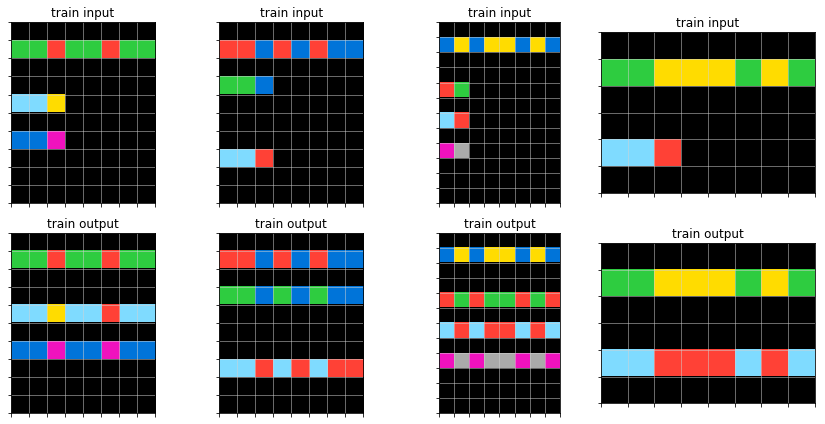

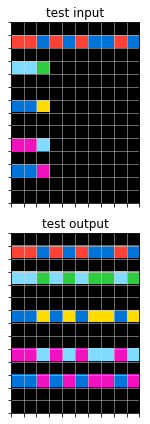

834ec97d.json


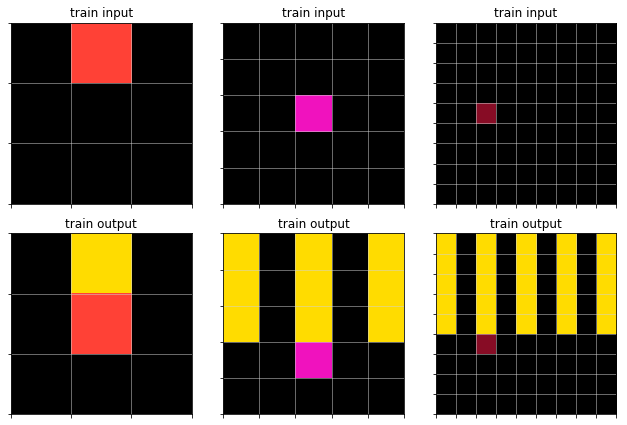

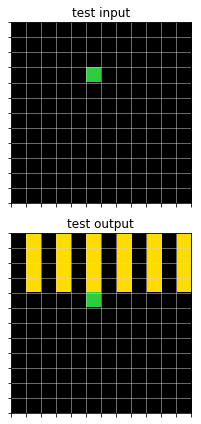

8403a5d5.json


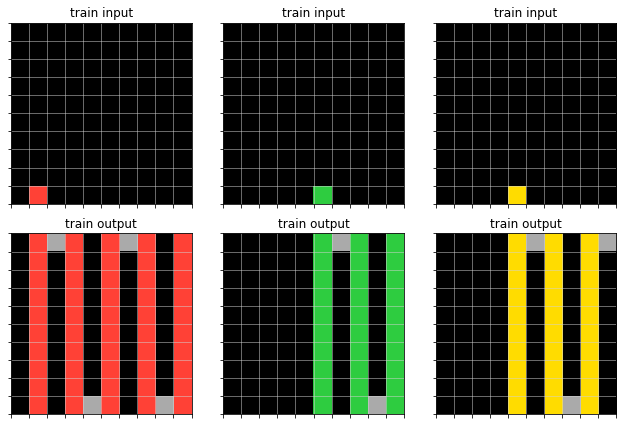

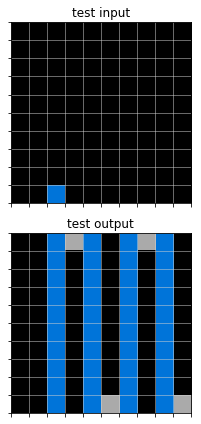

868de0fa.json


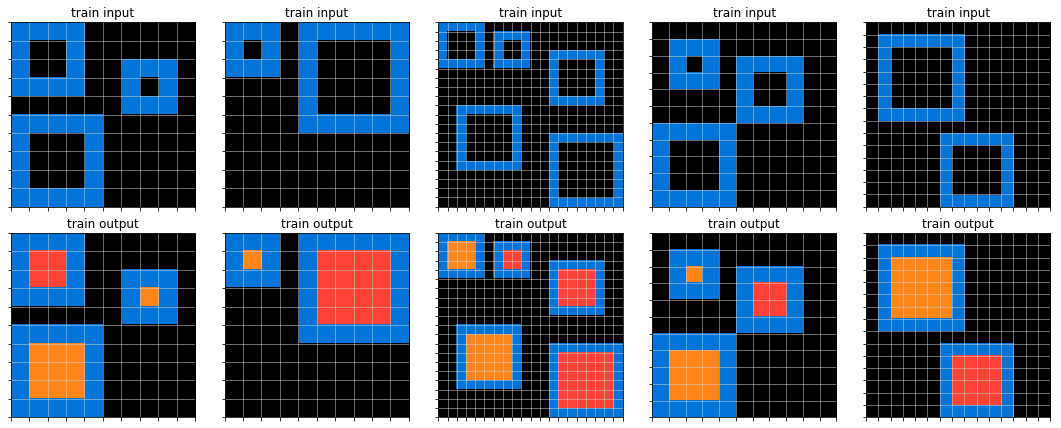

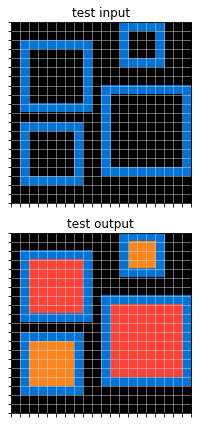

88a10436.json


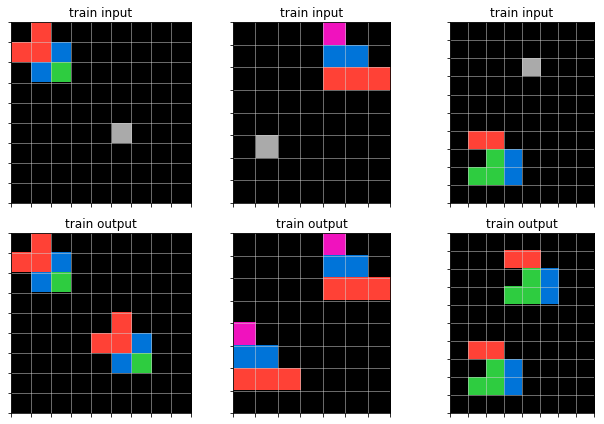

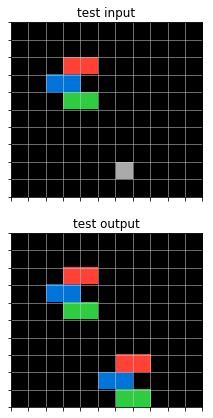

890034e9.json


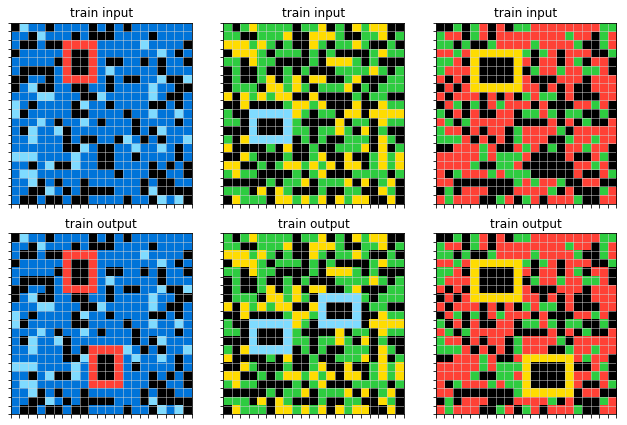

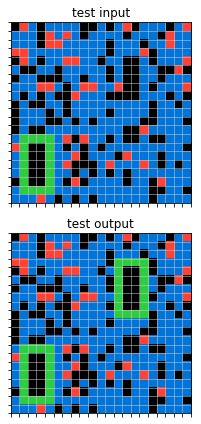

8eb1be9a.json


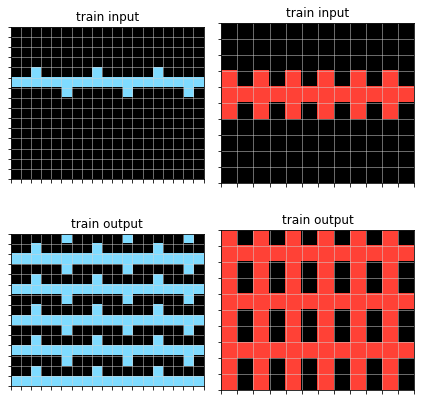

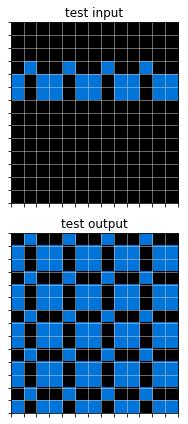

8f2ea7aa.json


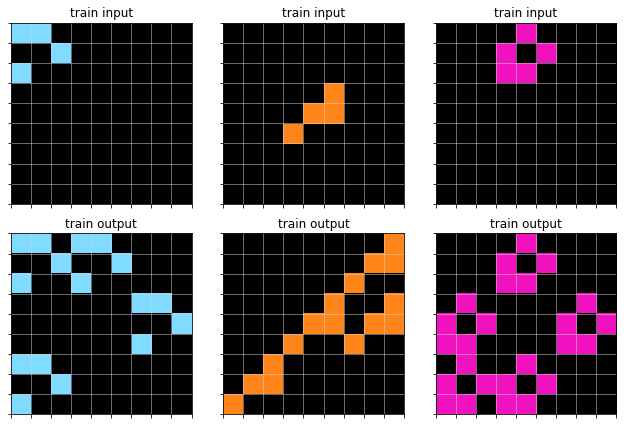

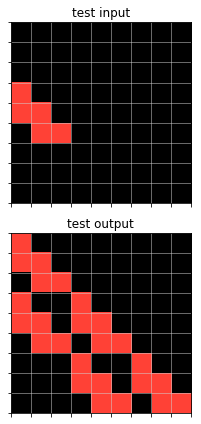

90f3ed37.json


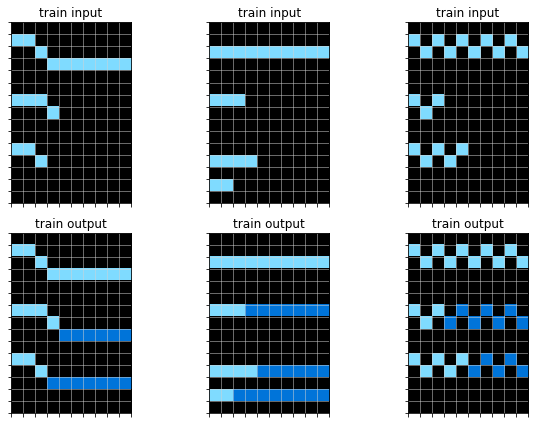

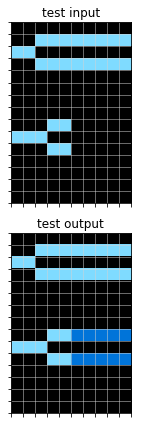

913fb3ed.json


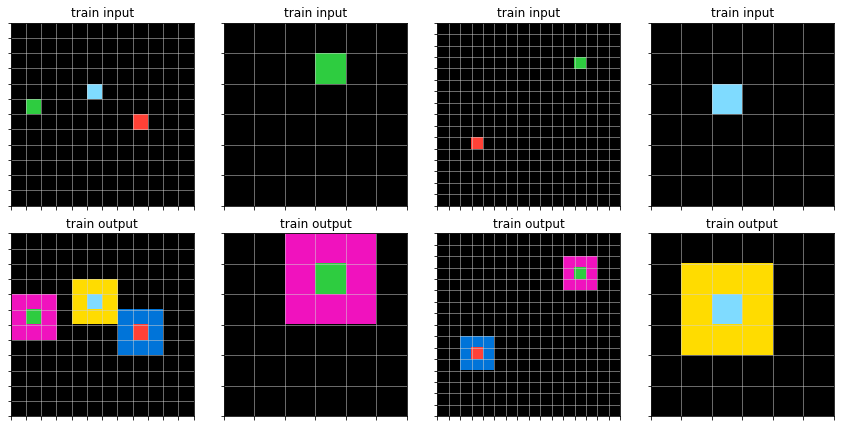

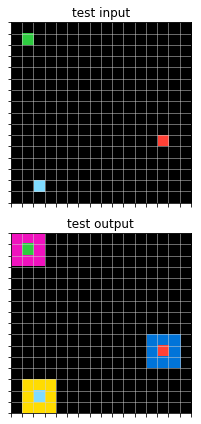

93b581b8.json


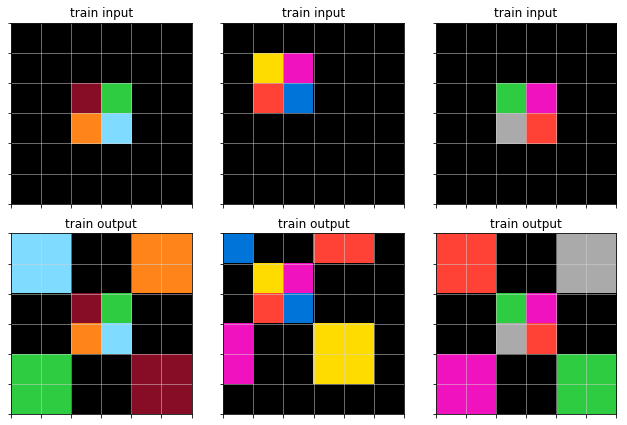

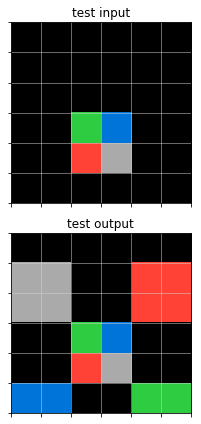

941d9a10.json


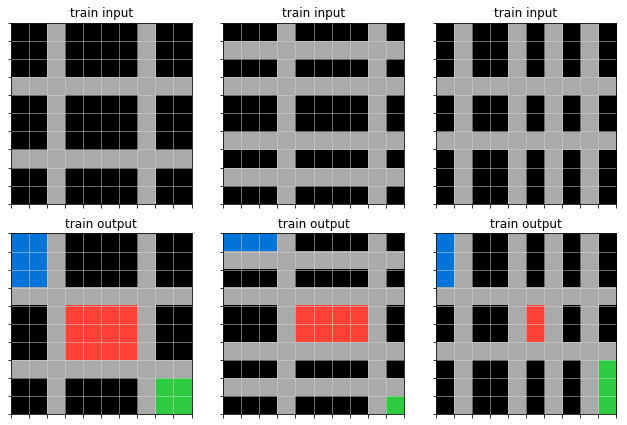

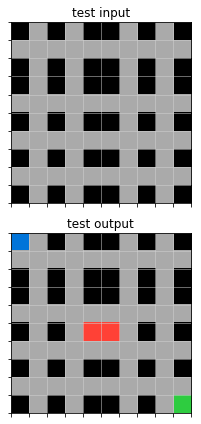

95990924.json


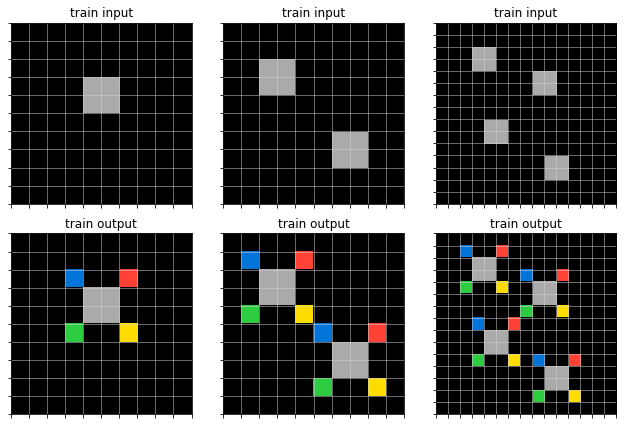

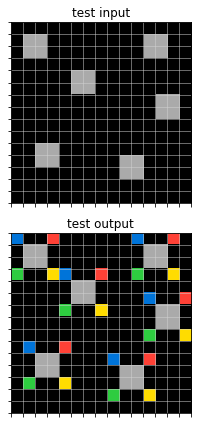

97999447.json


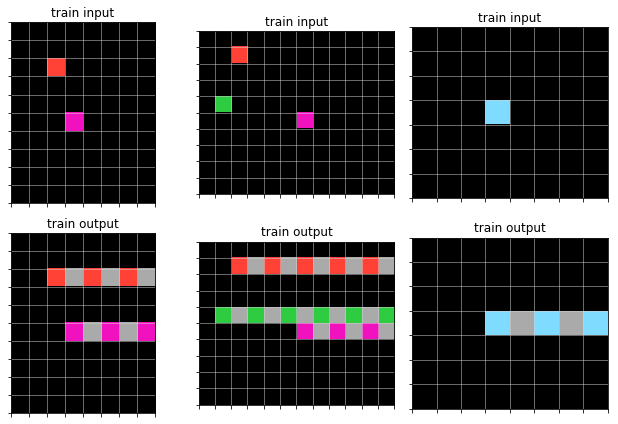

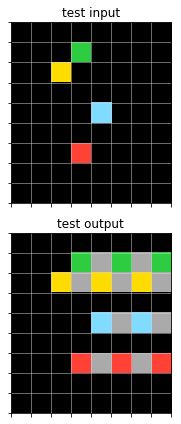

99fa7670.json


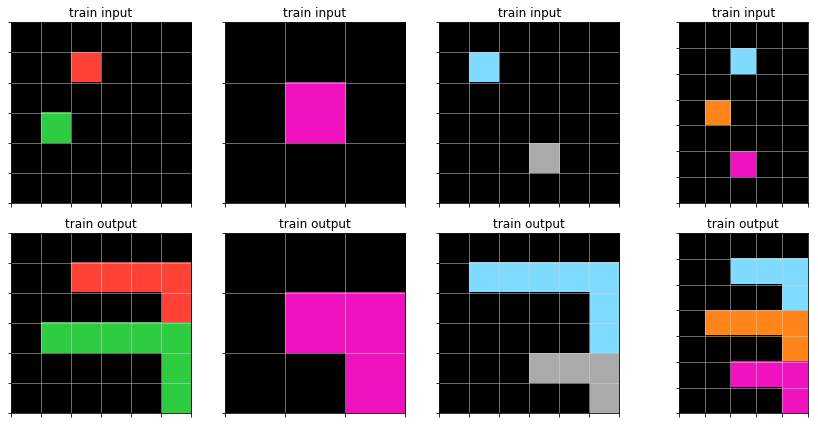

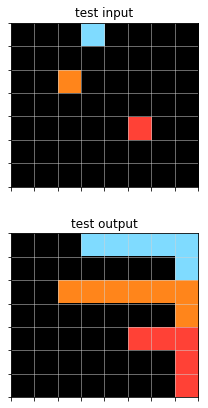

9edfc990.json


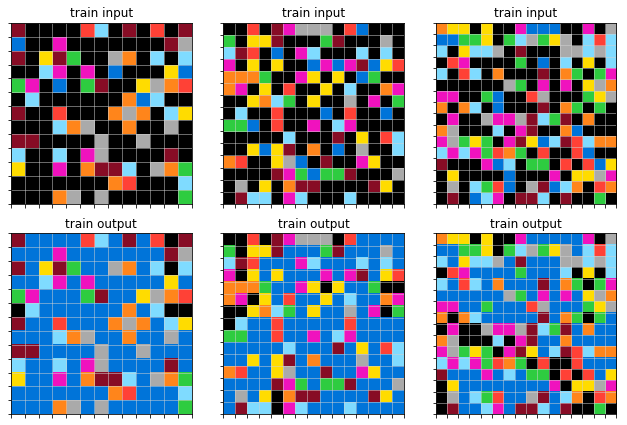

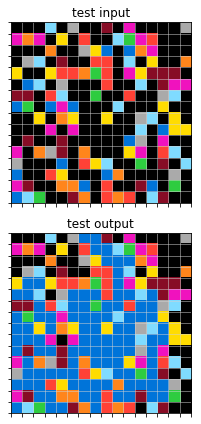

a3df8b1e.json


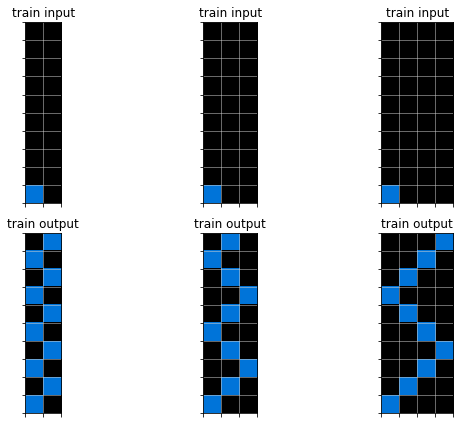

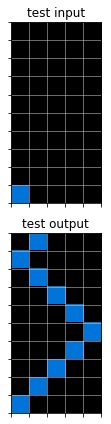

a65b410d.json


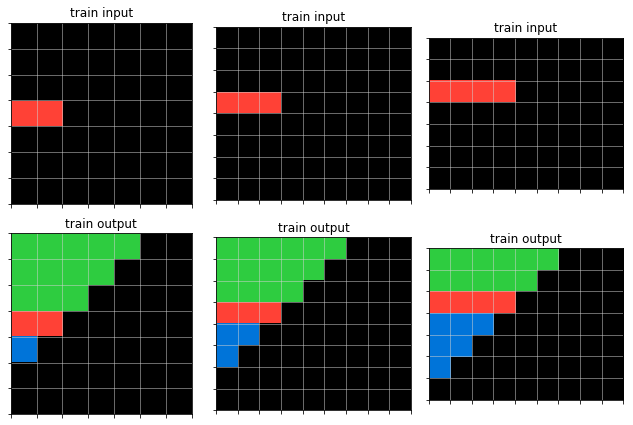

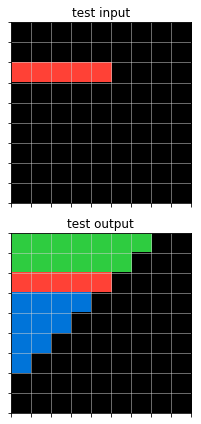

a85d4709.json


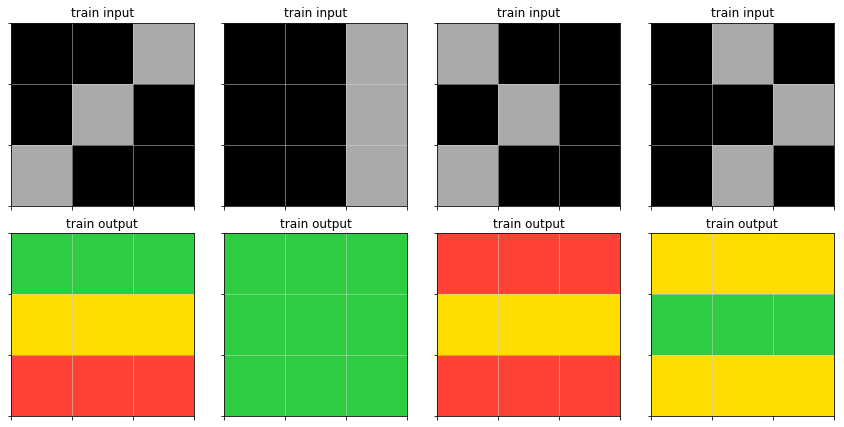

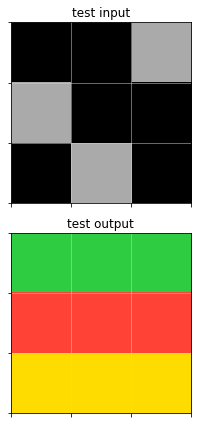

a8d7556c.json


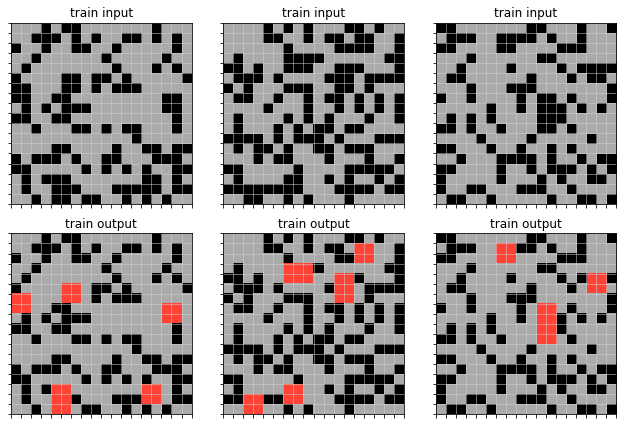

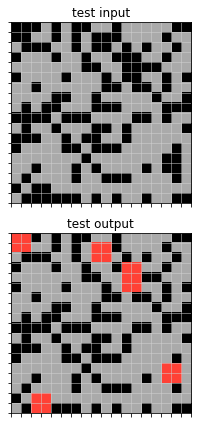

a9f96cdd.json


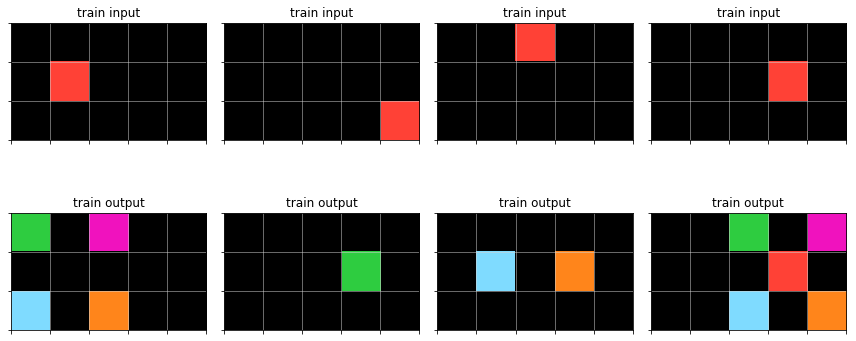

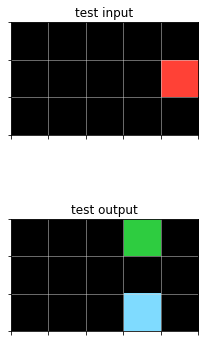

aba27056.json


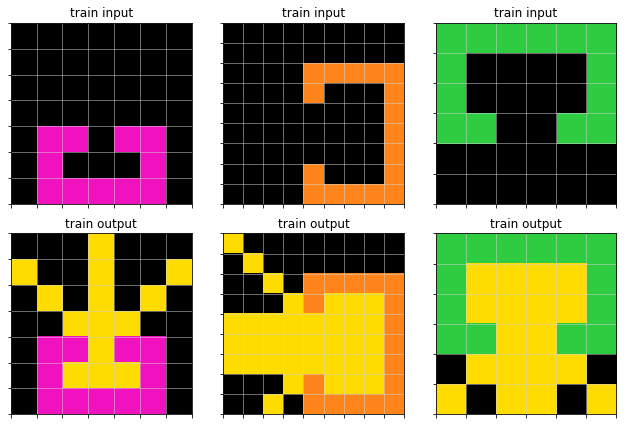

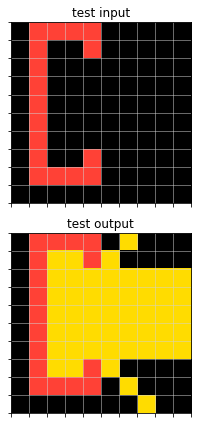

b27ca6d3.json


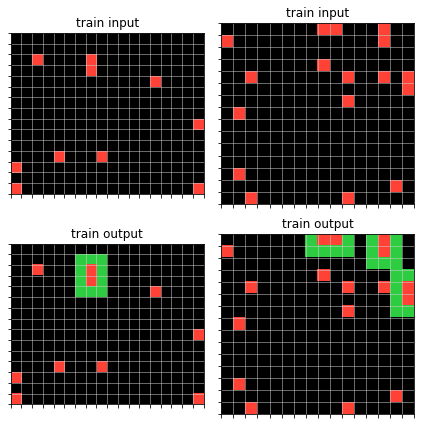

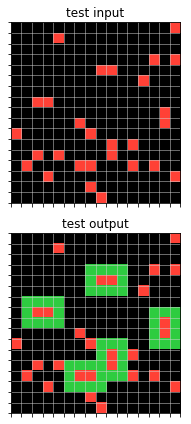

b2862040.json


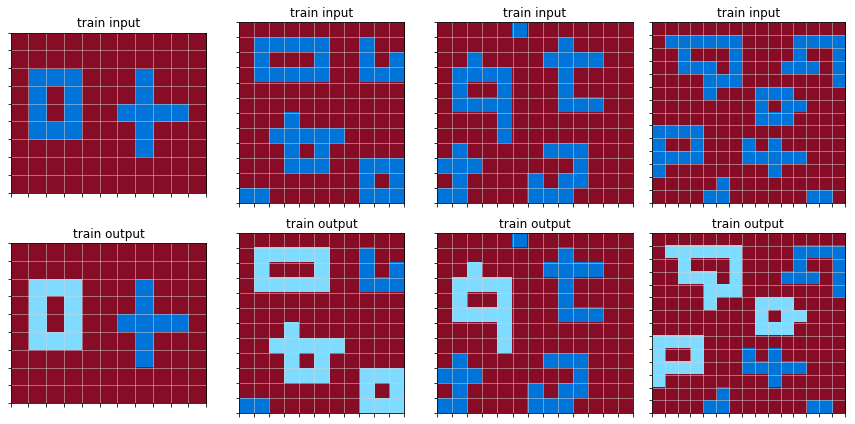

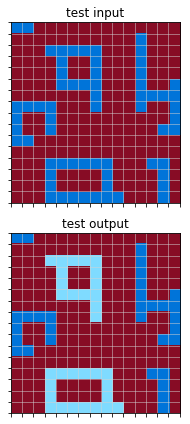

b527c5c6.json


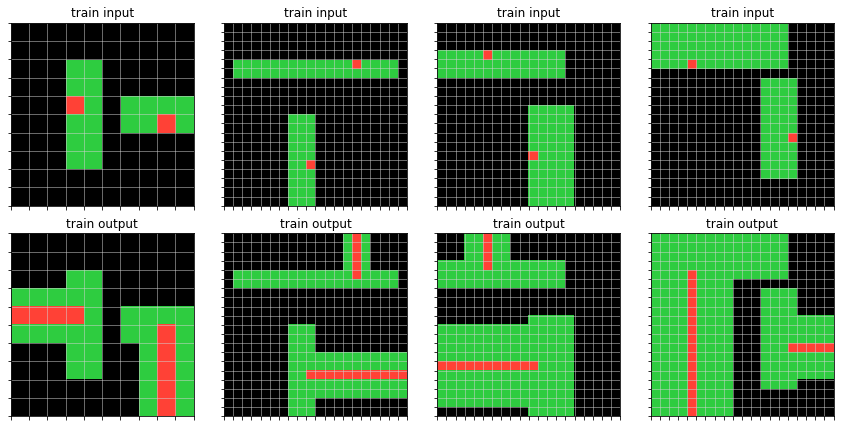

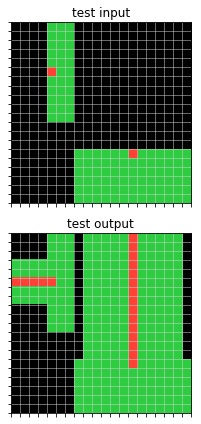

b60334d2.json


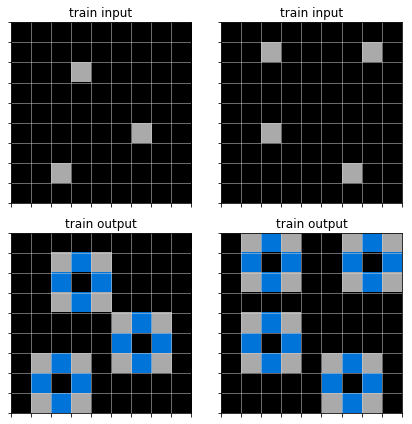

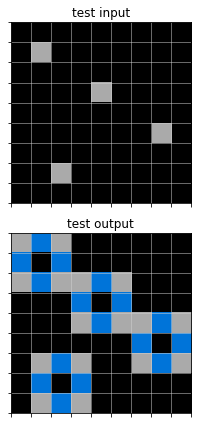

b775ac94.json


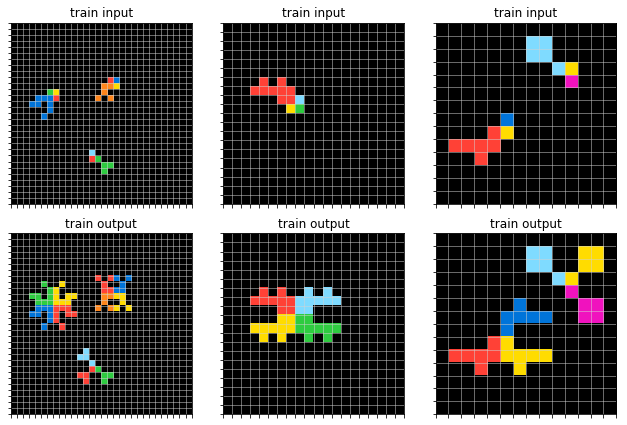

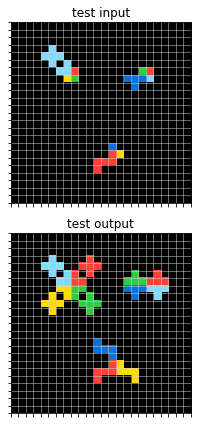

b782dc8a.json


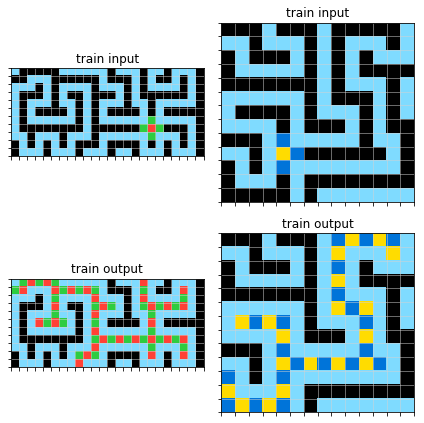

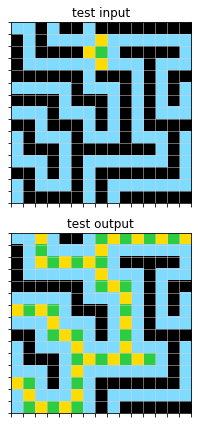

b8825c91.json


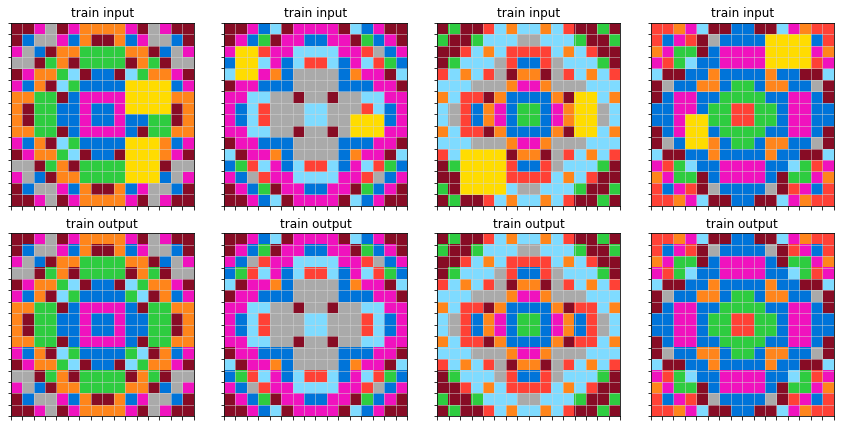

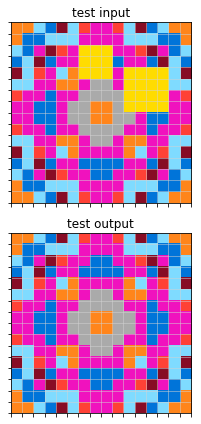

b8cdaf2b.json


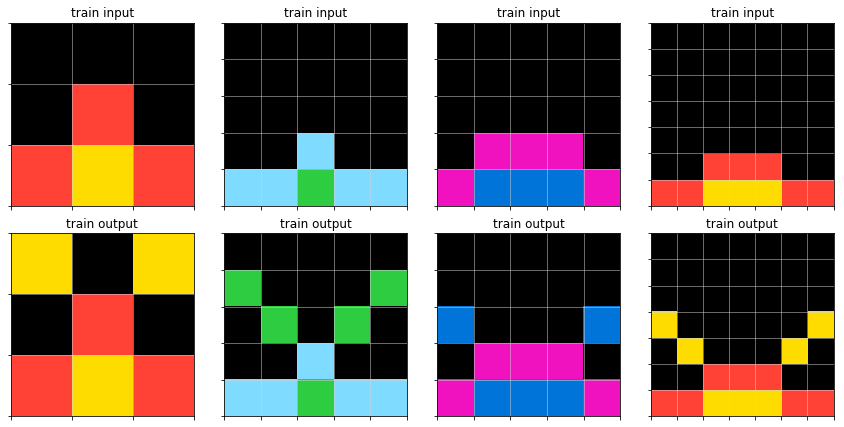

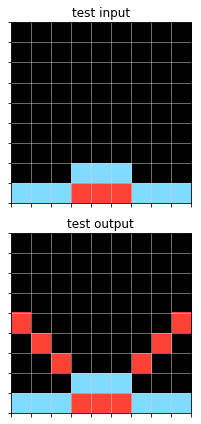

ba26e723.json


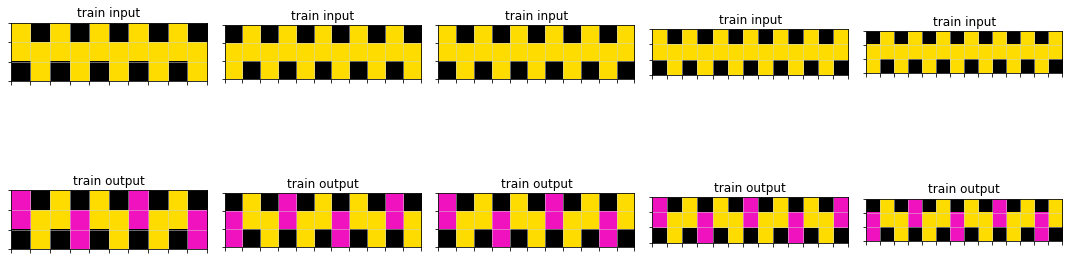

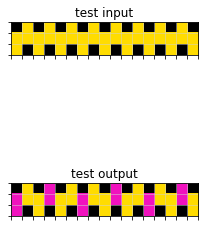

bd4472b8.json


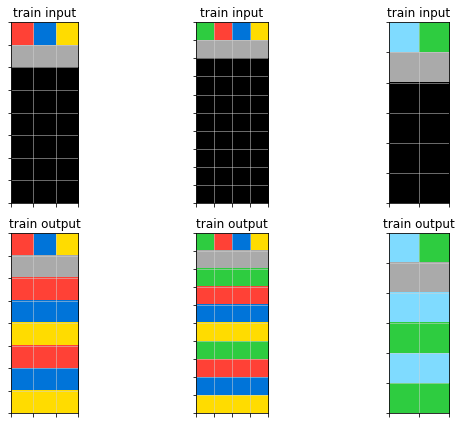

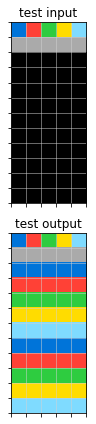

c0f76784.json


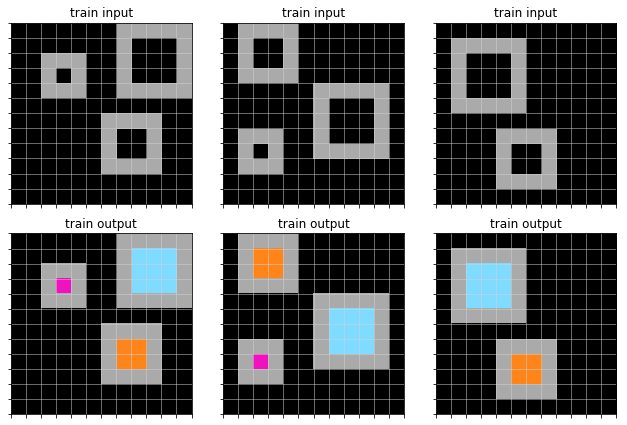

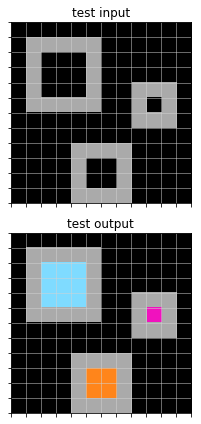

c3f564a4.json


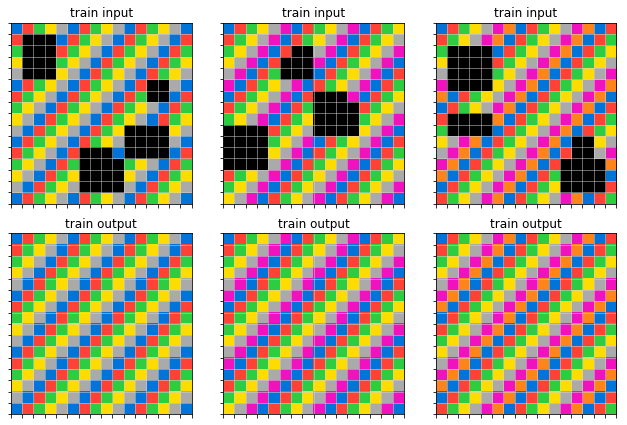

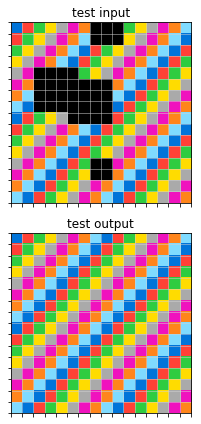

cbded52d.json


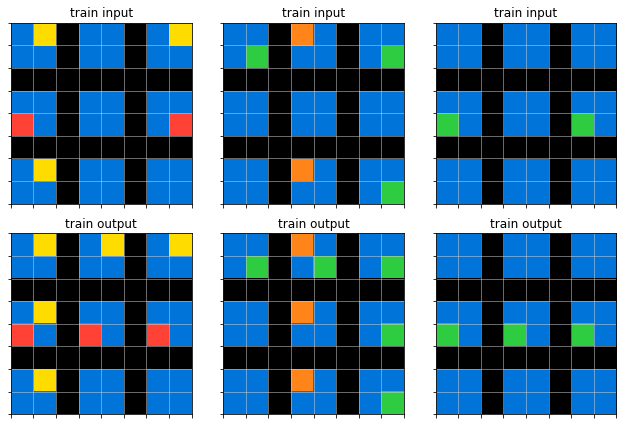

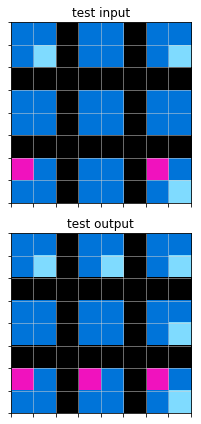

ce9e57f2.json


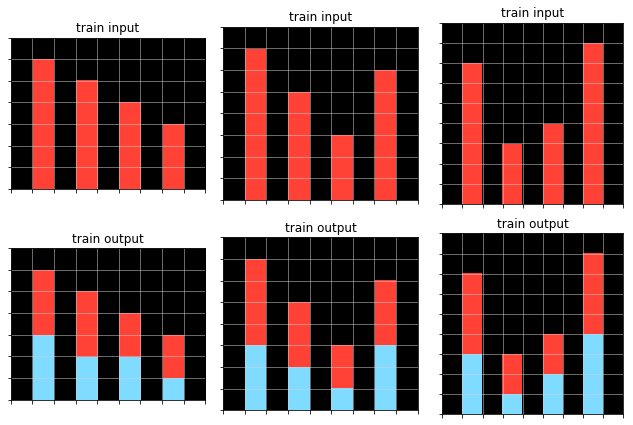

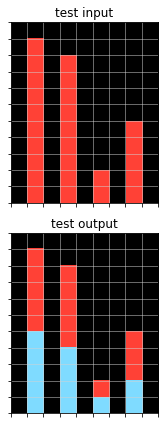

d037b0a7.json


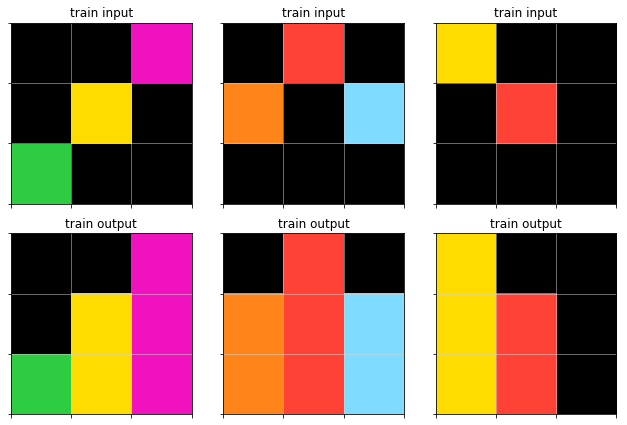

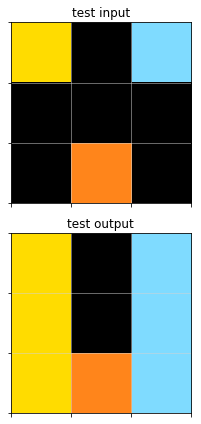

d06dbe63.json


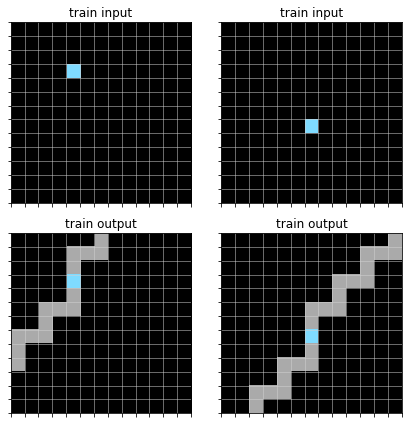

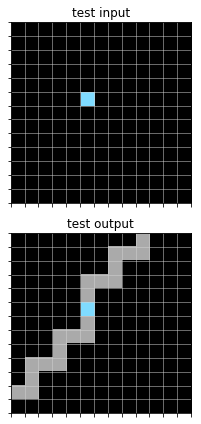

d364b489.json


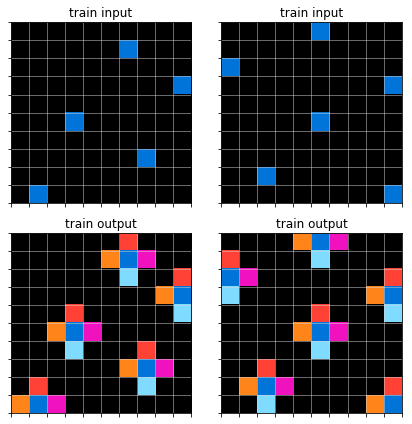

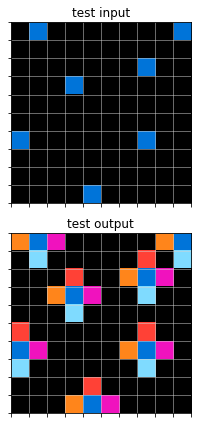

d4f3cd78.json


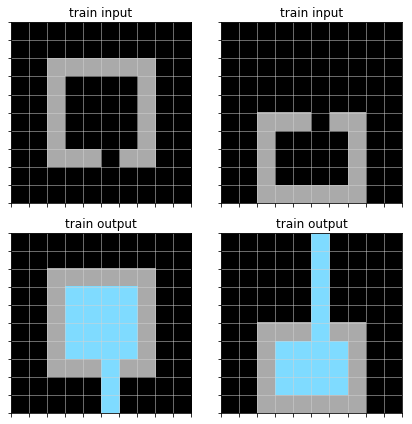

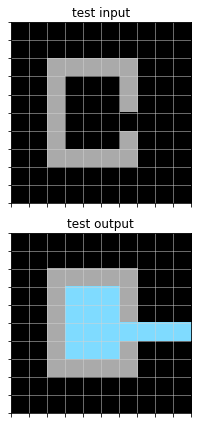

d8c310e9.json


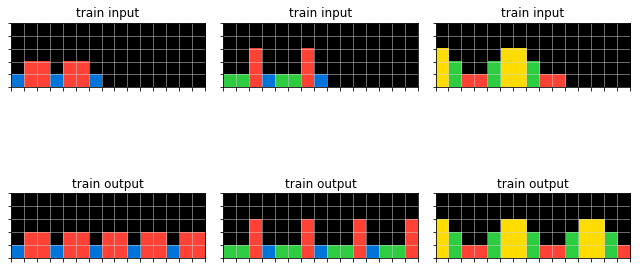

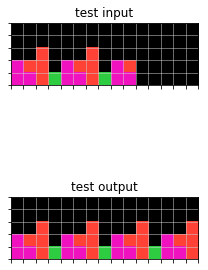

d90796e8.json


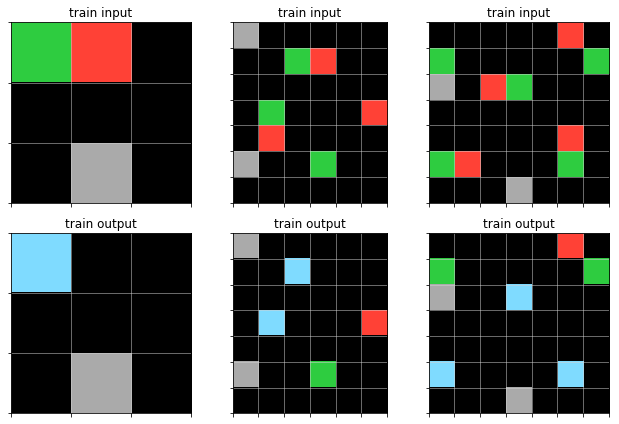

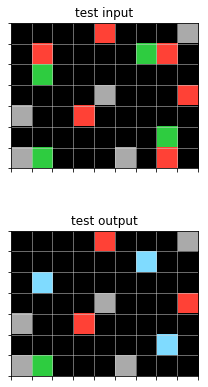

db3e9e38.json


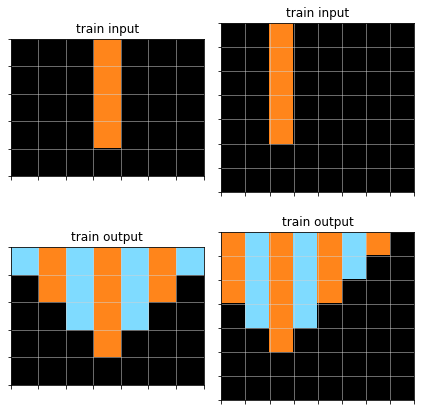

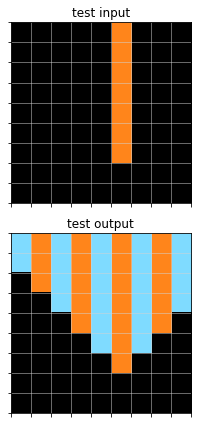

db93a21d.json


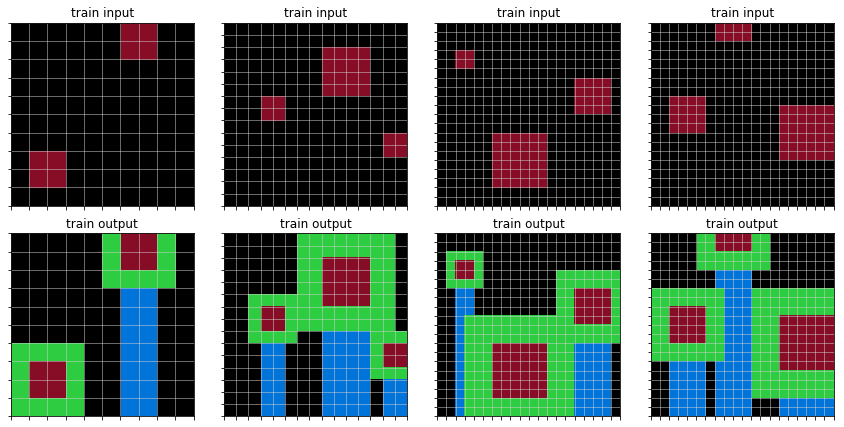

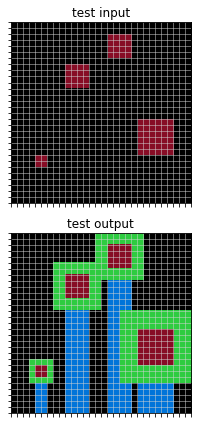

dc1df850.json


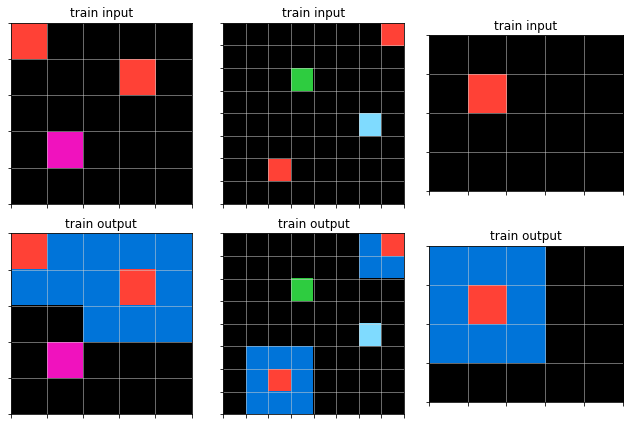

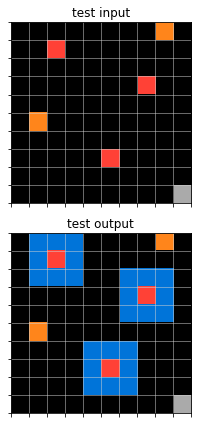

e179c5f4.json


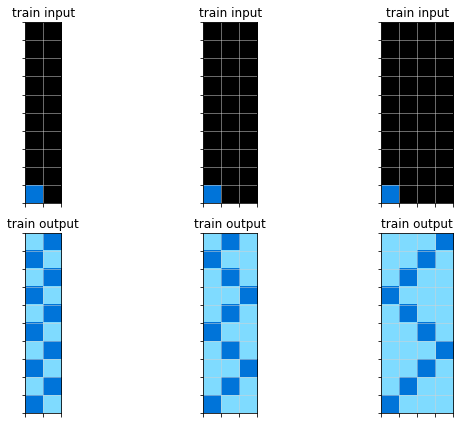

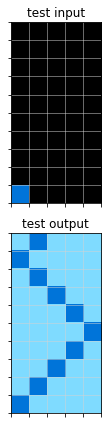

e21d9049.json


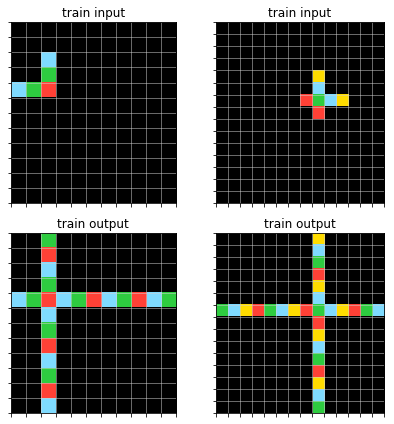

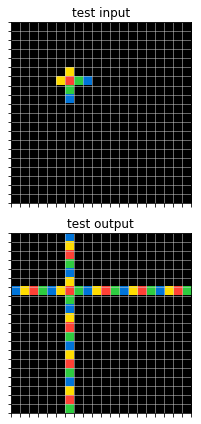

e40b9e2f.json


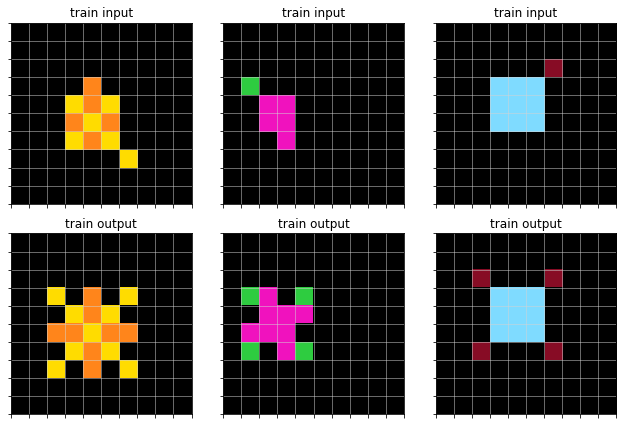

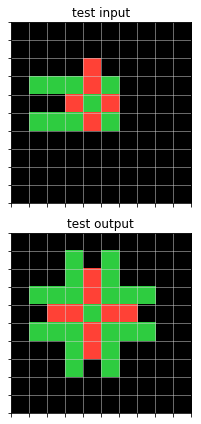

e5062a87.json


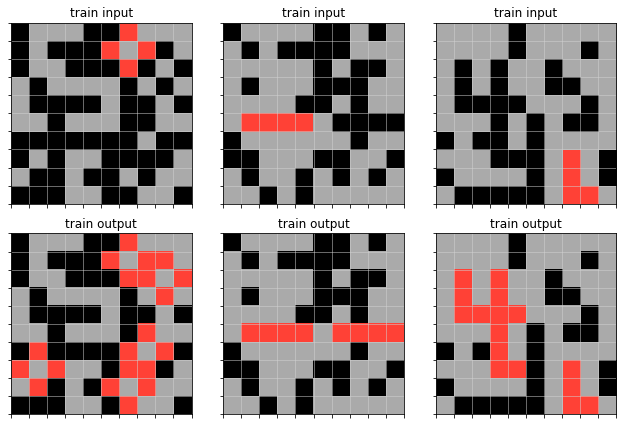

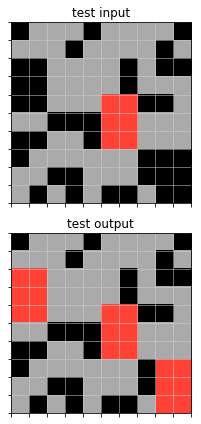

e509e548.json


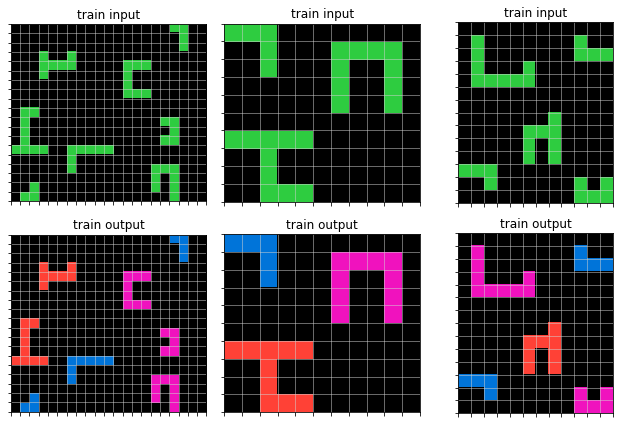

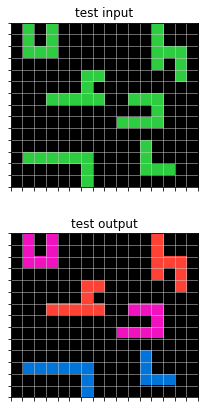

e73095fd.json


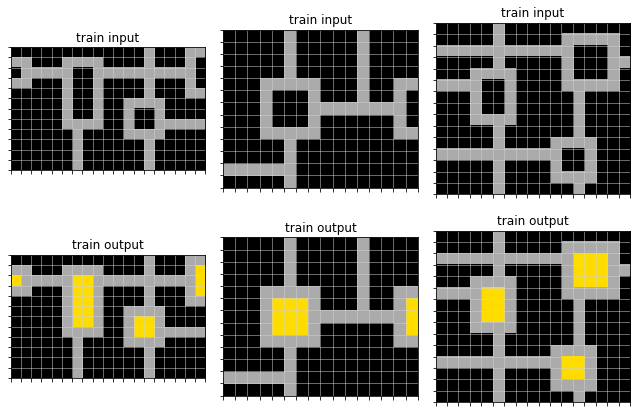

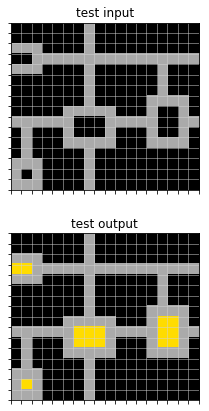

e8593010.json


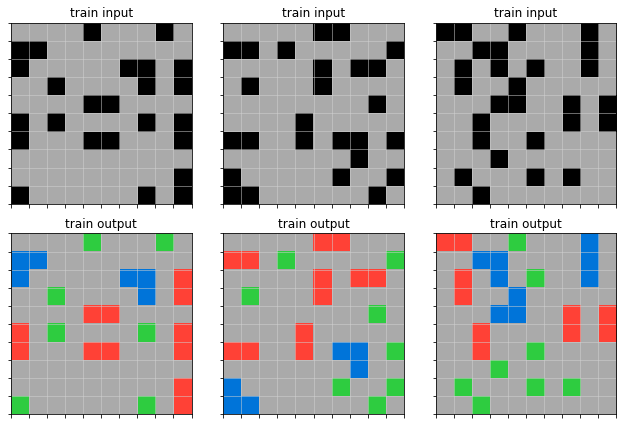

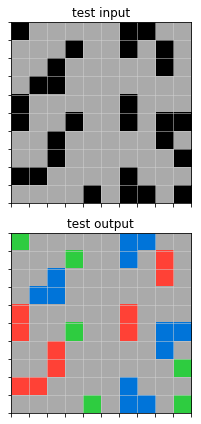

ec883f72.json


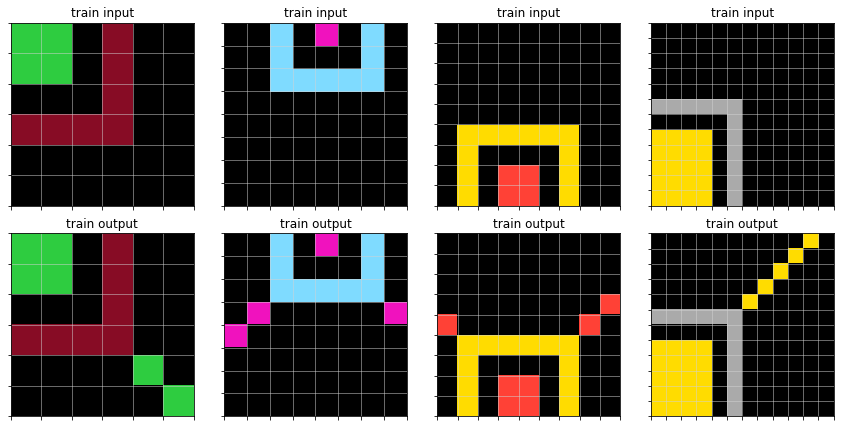

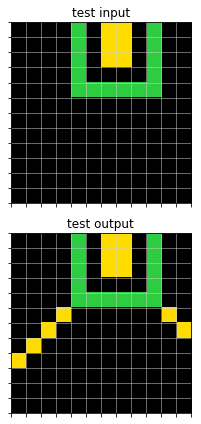

f15e1fac.json


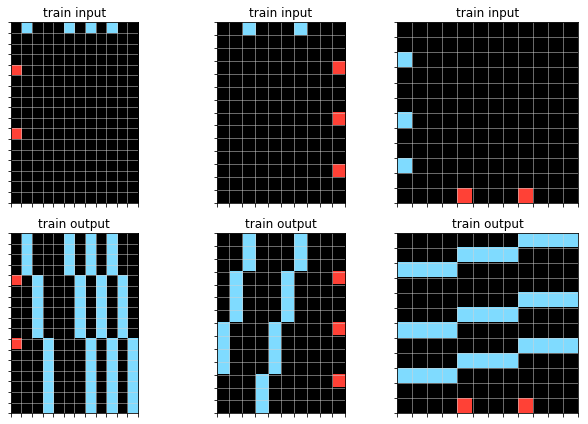

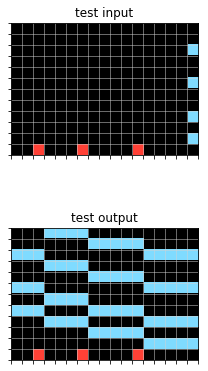

f1cefba8.json


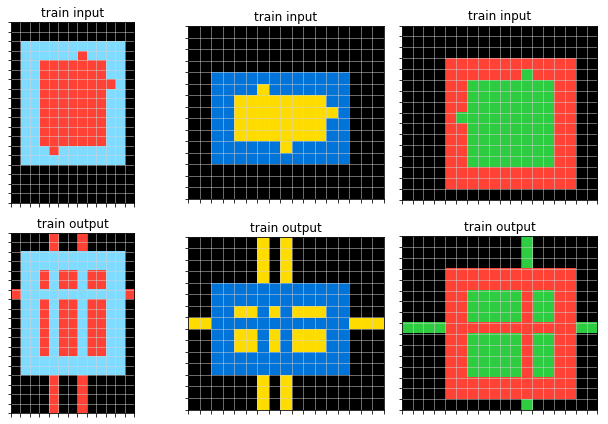

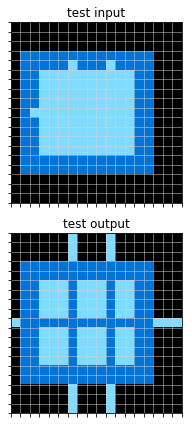

f25ffba3.json


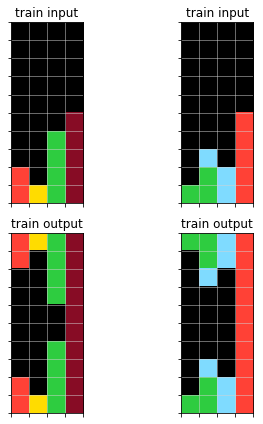

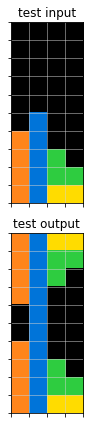

f35d900a.json


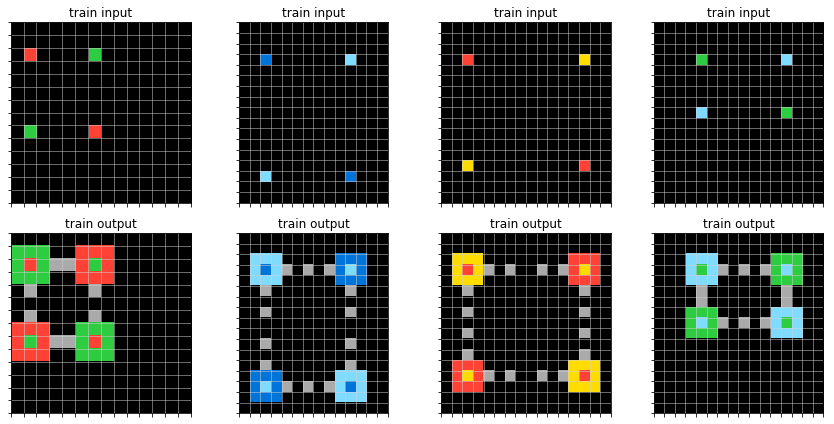

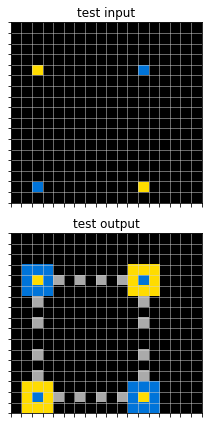

fcc82909.json


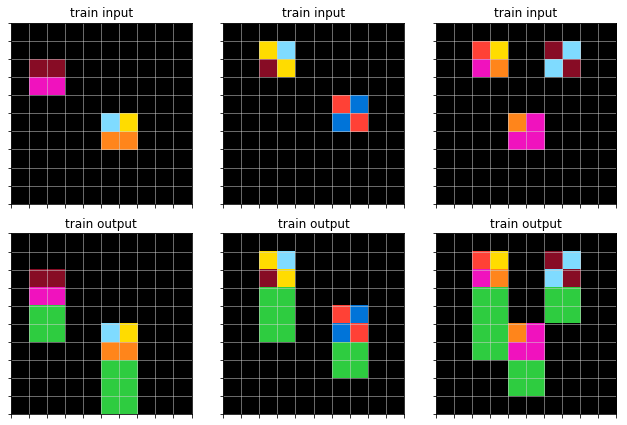

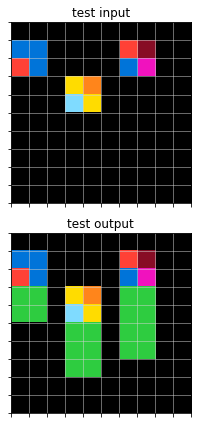

109, 27.25%
99, 24.75%
15, 15.0%


In [31]:
tmp = training_descriptive_df[training_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.increase_color_sum==1]
tmp = tmp[tmp["increase_objects"]==0]
tmp = tmp[tmp["decrease_objects"]==0]
tmp6_train = tmp.copy()

for i in tmp["task_name"]:
    print(i)
    task = get_data(str(training_path / i))
    plot_task(task)
    
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / training_descriptive_df.shape[0])+"%")
tmp = evaluation_descriptive_df[evaluation_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.increase_color_sum==1]
tmp = tmp[tmp["increase_objects"]==0]
tmp = tmp[tmp["decrease_objects"]==0]
tmp6_eval = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / evaluation_descriptive_df.shape[0])+"%")

tmp = test_descriptive_df[test_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.increase_color_sum==1]
tmp = tmp[tmp["increase_objects"]==0]
tmp = tmp[tmp["decrease_objects"]==0]
tmp6_test = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / test_descriptive_df.shape[0])+"%")

# class: same shape & decrease color sum & color kind increase

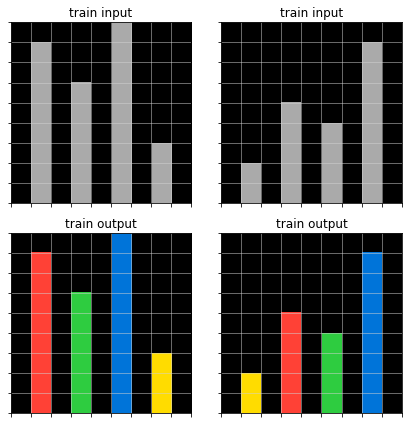

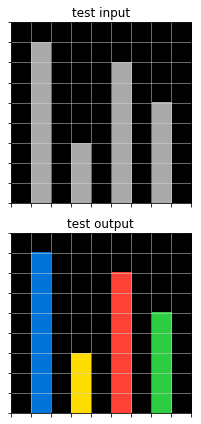

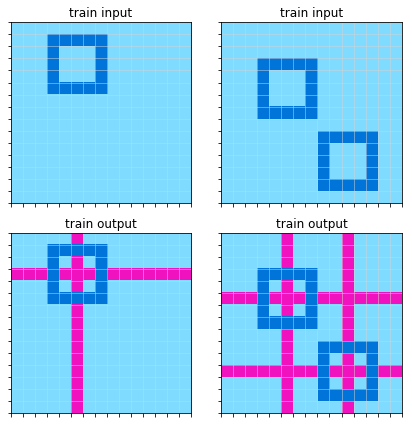

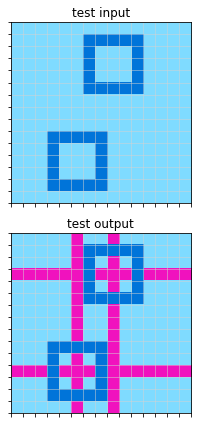

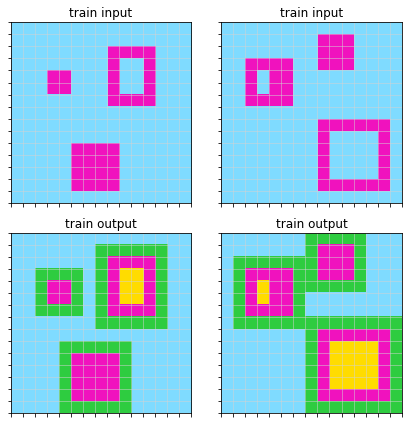

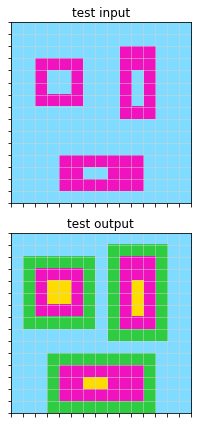

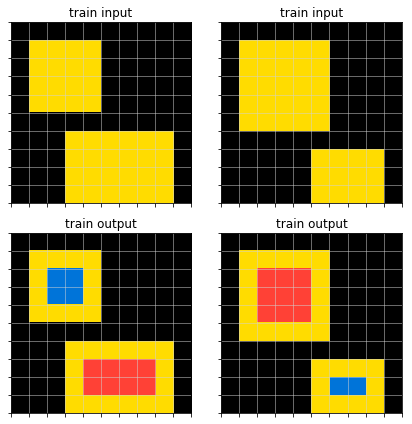

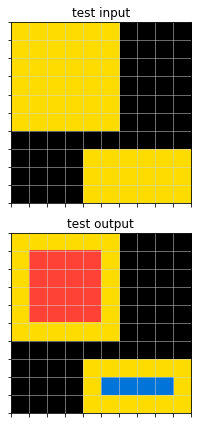

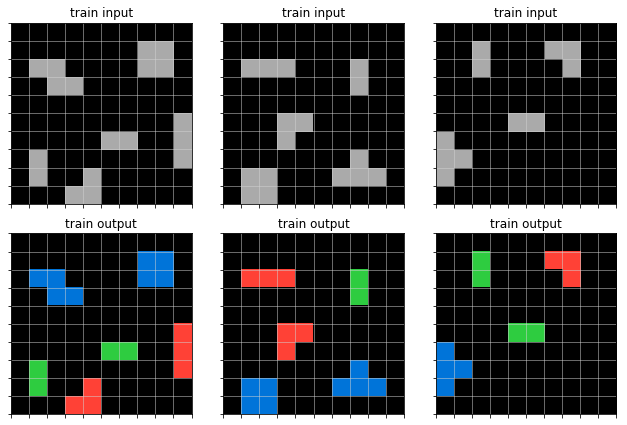

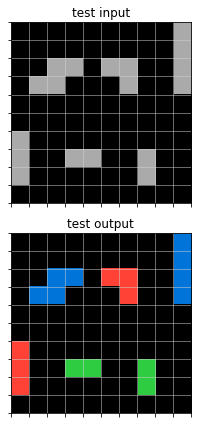

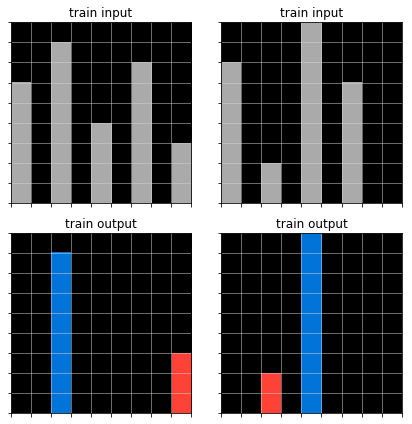

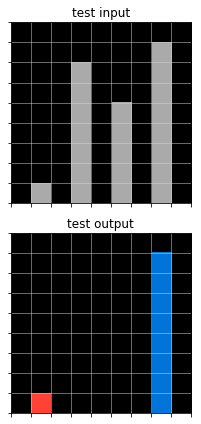

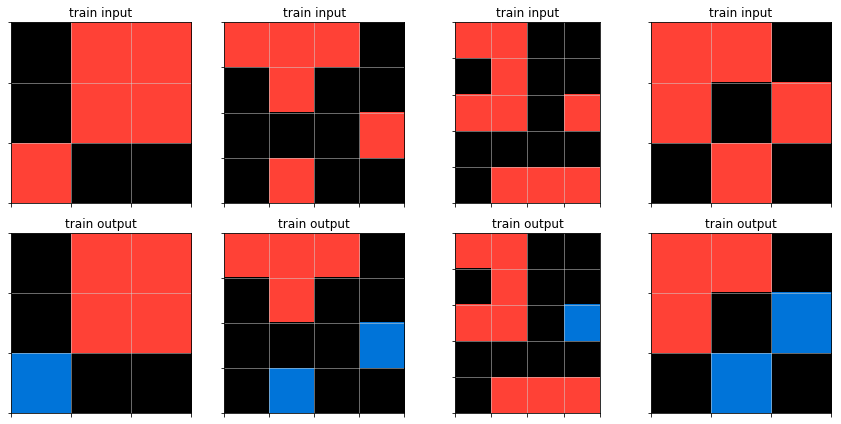

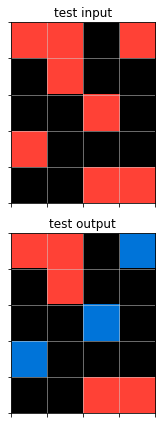

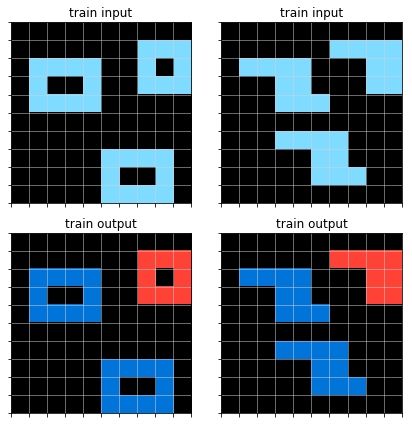

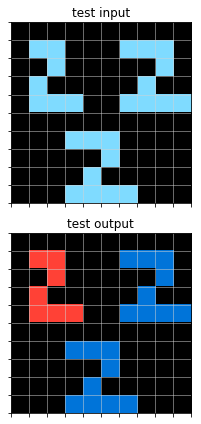

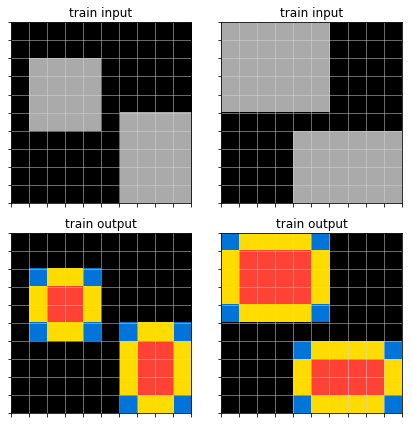

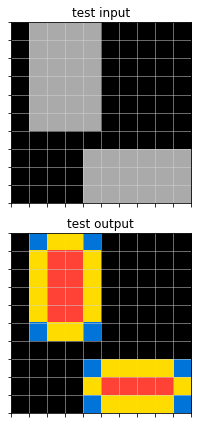

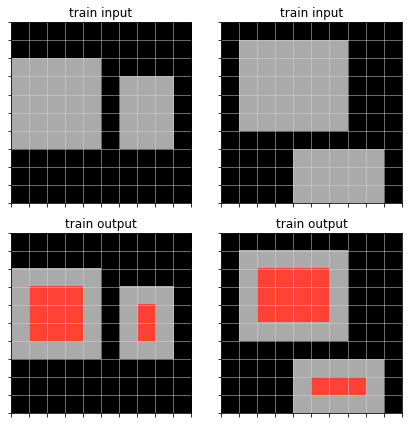

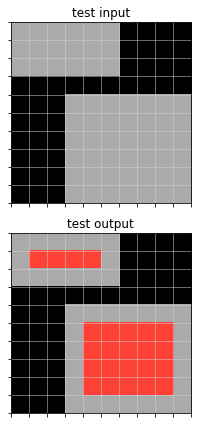

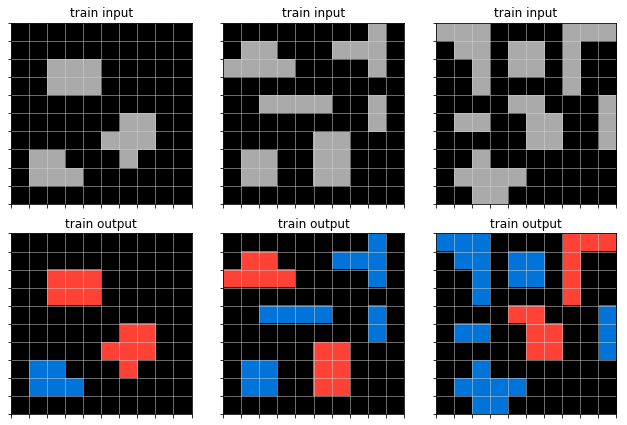

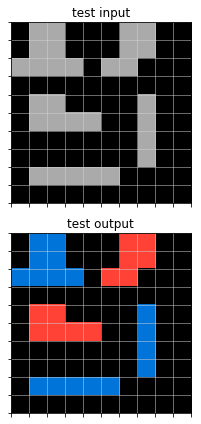

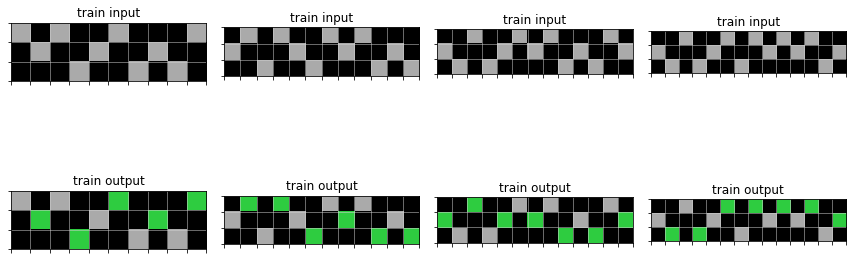

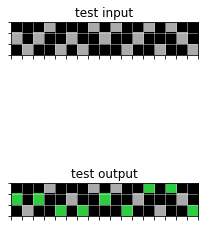

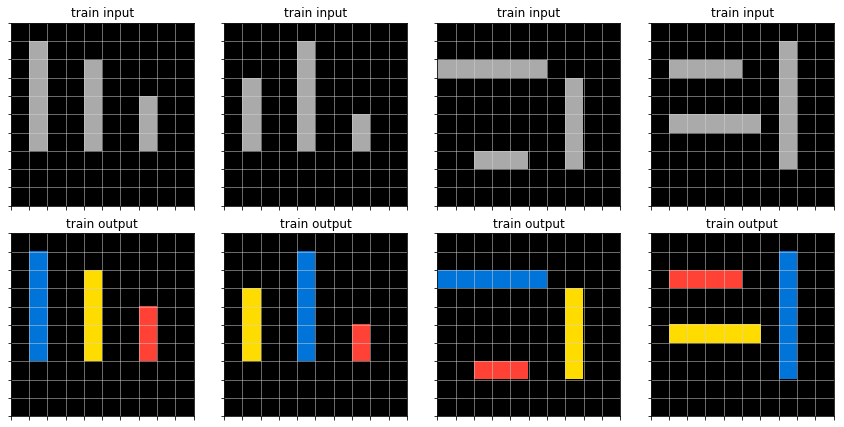

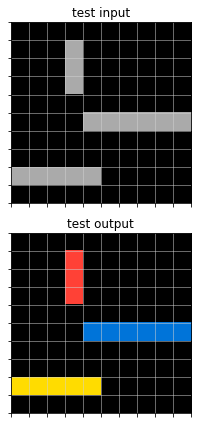

13, 3.25%
12, 3.0%
6, 6.0%


In [32]:
# 内部のものを塗る、または数を見て色を塗り替えるパターン
tmp = training_descriptive_df[training_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.decrease_color_sum==1]
tmp = tmp[tmp['color_kind_increase']==1]
tmp7_train = tmp.copy()

for i in tmp["task_name"]:
    task = get_data(str(training_path / i))
    plot_task(task)
    
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 400)+"%")
tmp = evaluation_descriptive_df[evaluation_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.decrease_color_sum==1]
tmp = tmp[tmp['color_kind_increase']==1]
tmp7_eval = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 400)+"%")

tmp = test_descriptive_df[test_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.decrease_color_sum==1]
tmp = tmp[tmp['color_kind_increase']==1]
tmp7_test = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 100)+"%")

# class: same shape & decrease color sum & color kind decrease

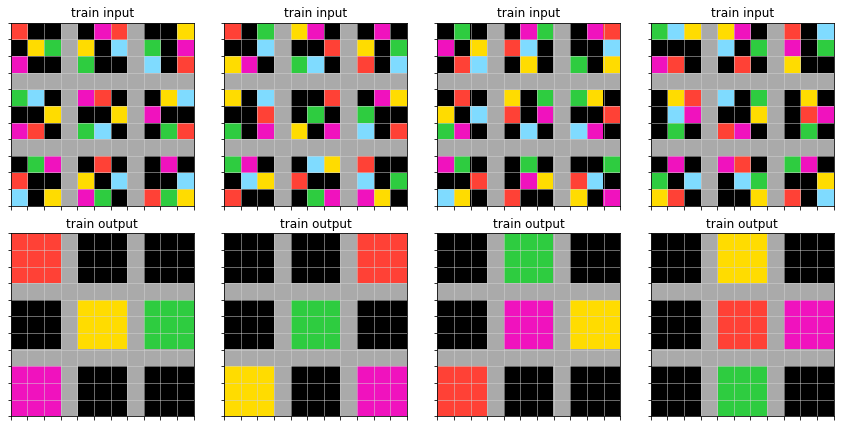

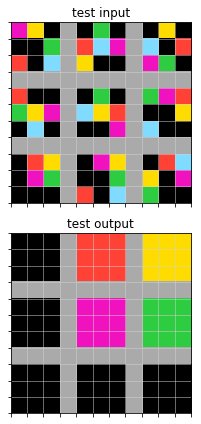

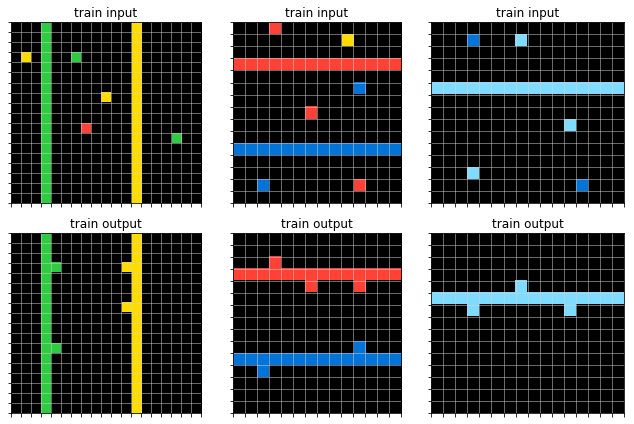

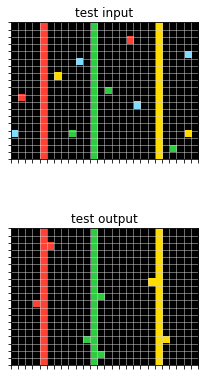

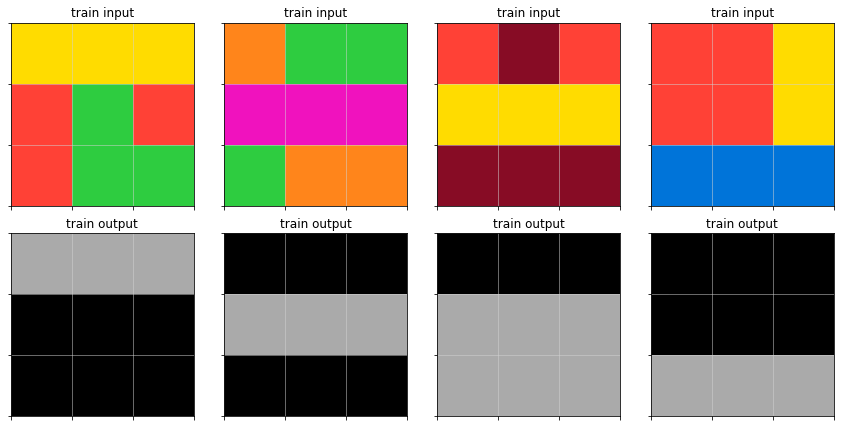

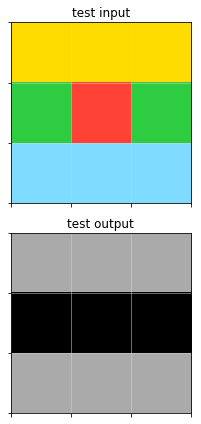

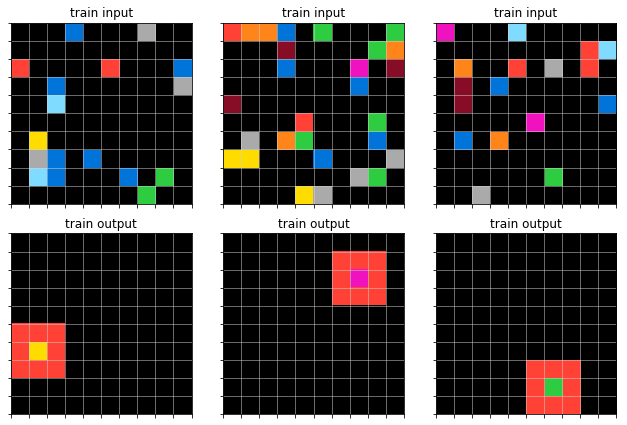

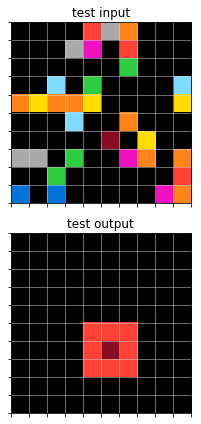

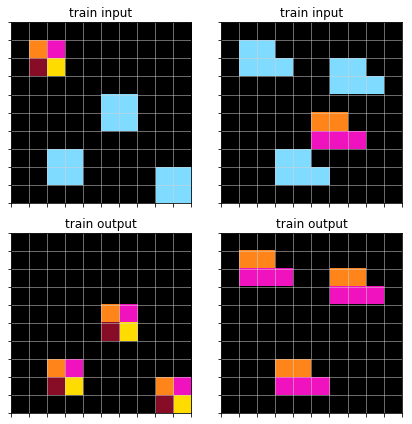

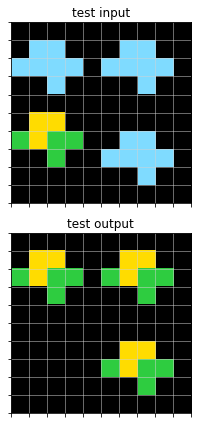

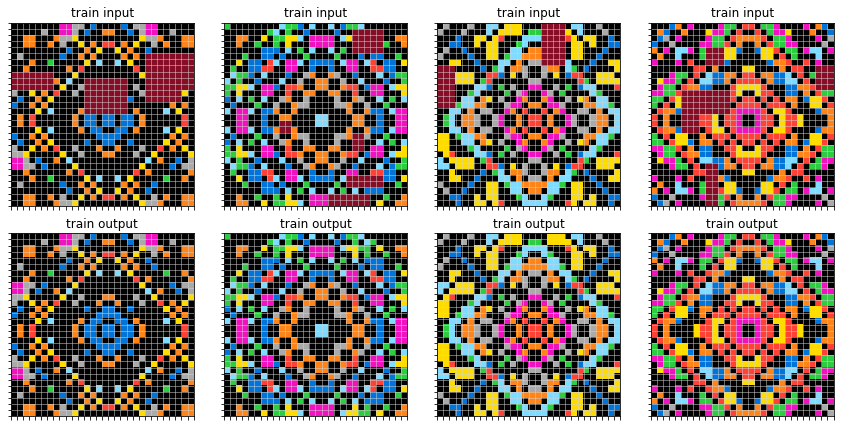

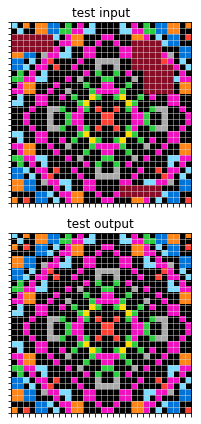

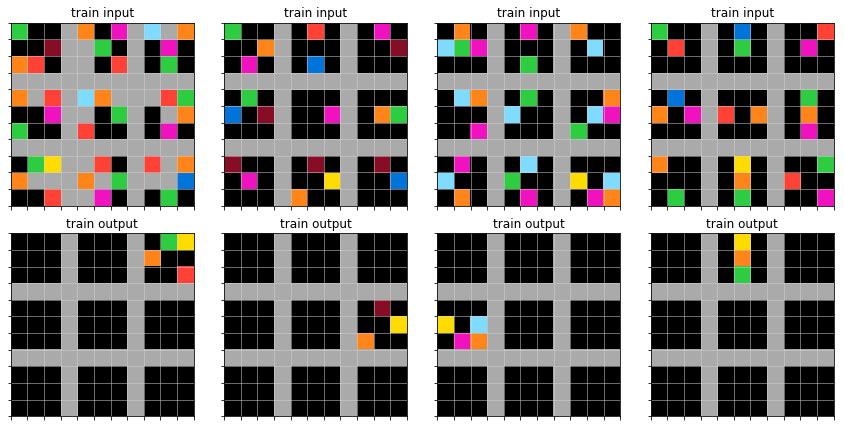

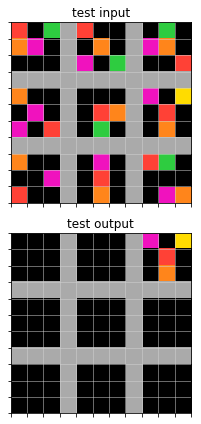

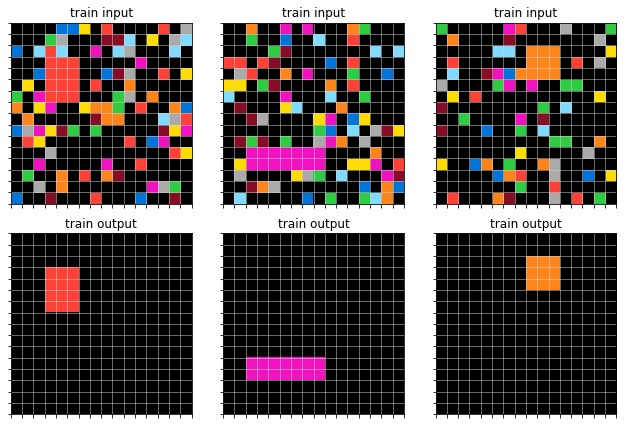

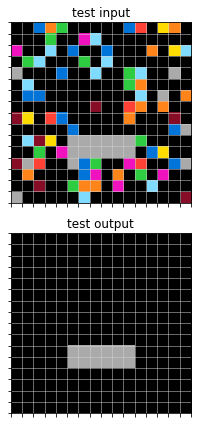

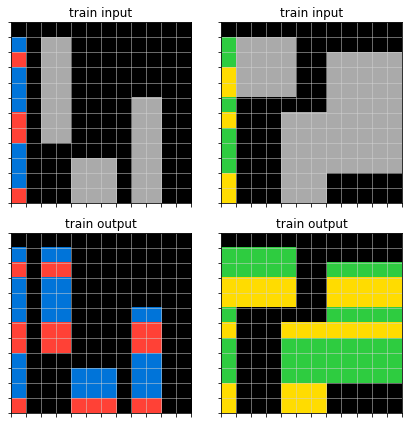

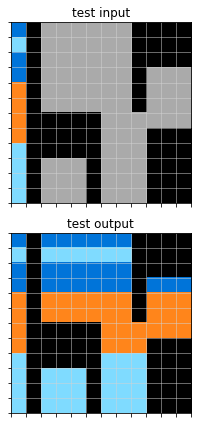

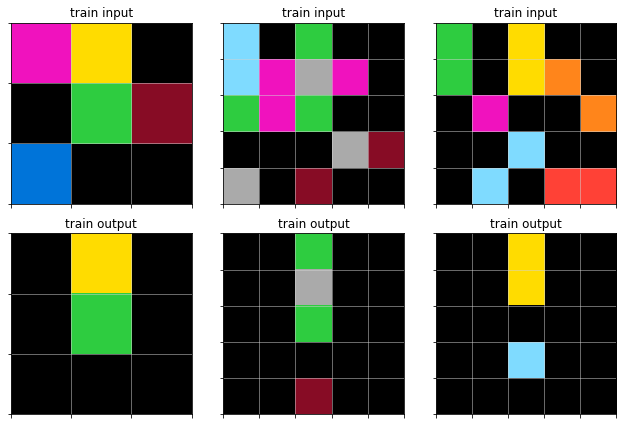

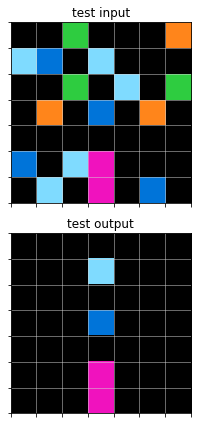

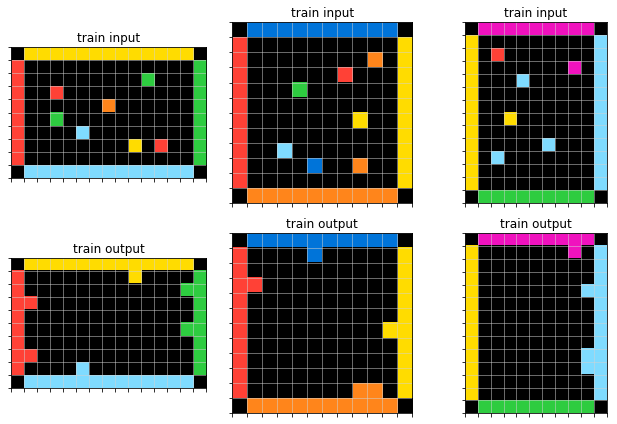

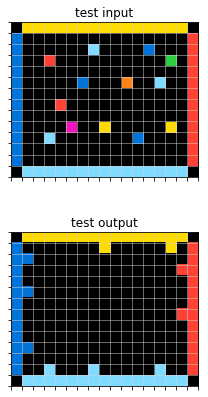

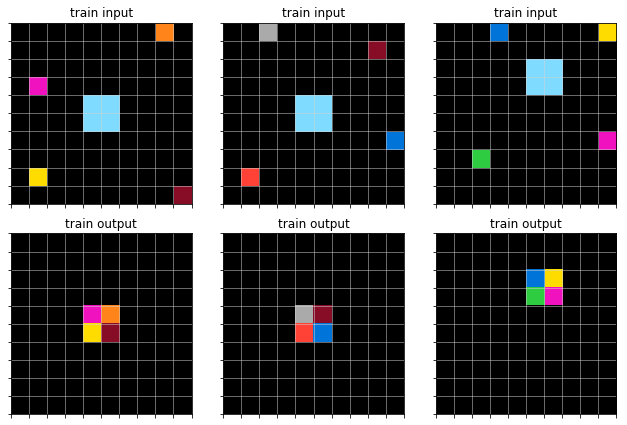

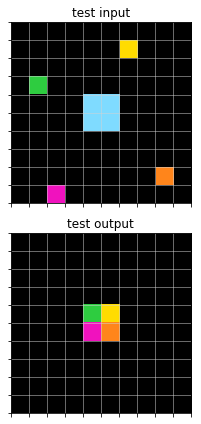

12, 3.0%
8, 2.0%
4, 4.0%


In [33]:
# 内部のものを塗る、または数を見て色を塗り替えるパターン
tmp = training_descriptive_df[training_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.decrease_color_sum==1]
tmp = tmp[tmp['color_kind_decrease']==1]
tmp8_train = tmp.copy()

for i in tmp["task_name"]:
    task = get_data(str(training_path / i))
    plot_task(task)
    
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 400)+"%")
tmp = evaluation_descriptive_df[evaluation_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.decrease_color_sum==1]
tmp = tmp[tmp['color_kind_decrease']==1]
tmp8_eval = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 400)+"%")

tmp = test_descriptive_df[test_descriptive_df.in_each_pair_shape_doesnt_change==1]
tmp = tmp[tmp["o/i_height_ratio_if_constant"]==1]
tmp = tmp[tmp["o/i_width_ratio_if_constant"]==1]
tmp = tmp[tmp.decrease_color_sum==1]
tmp = tmp[tmp['color_kind_decrease']==1]
tmp8_test = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 100)+"%")

# class:different shape & decrease color sum & same color kind & decrease_objects

137eaa0f.json


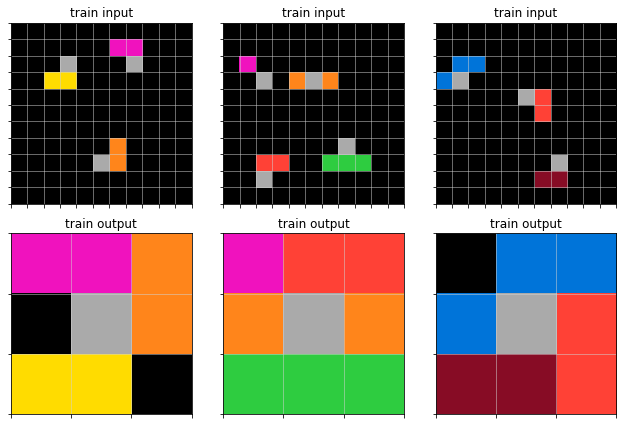

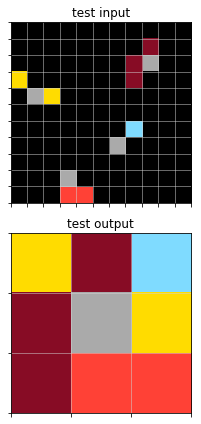

3f7978a0.json


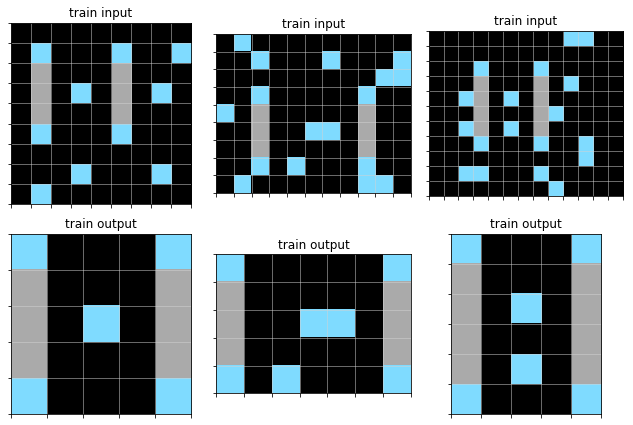

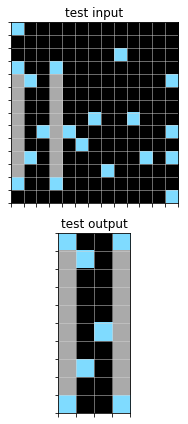

5daaa586.json


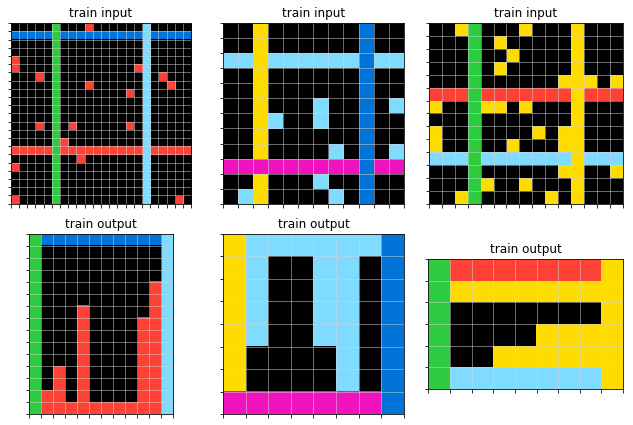

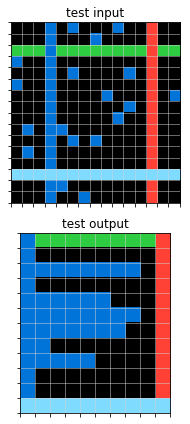

75b8110e.json


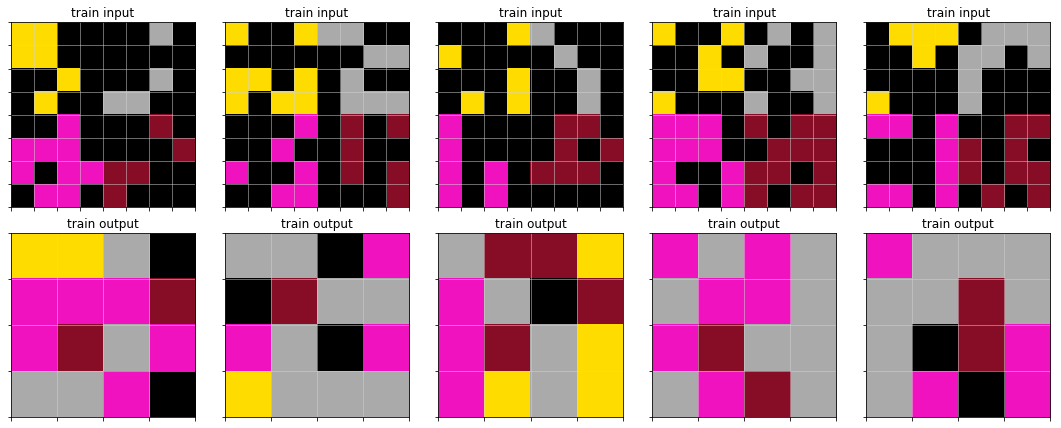

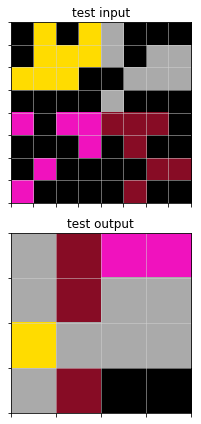

88a62173.json


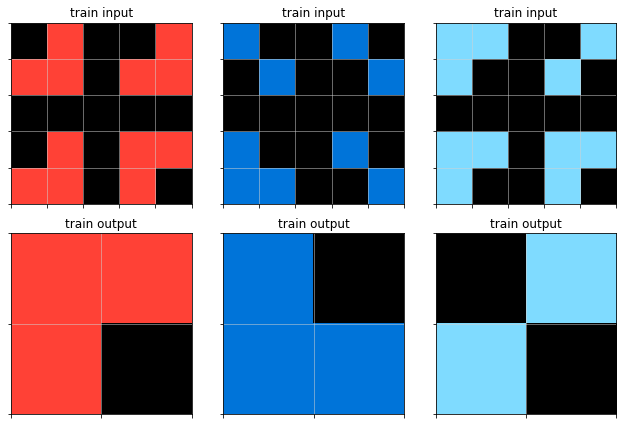

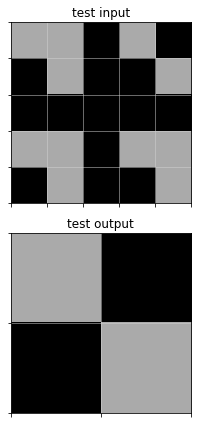

995c5fa3.json


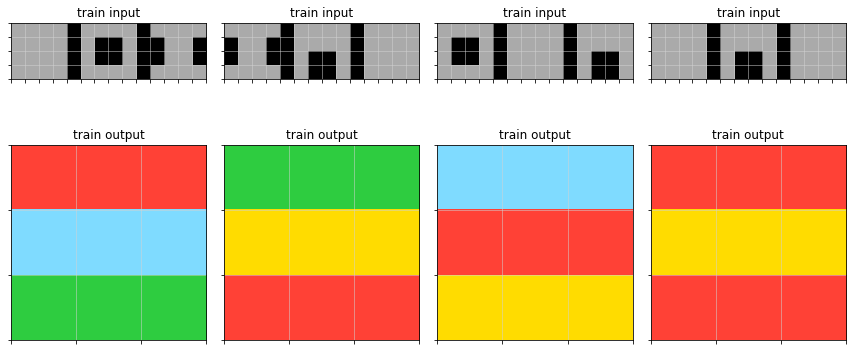

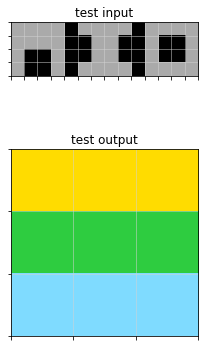

9aec4887.json


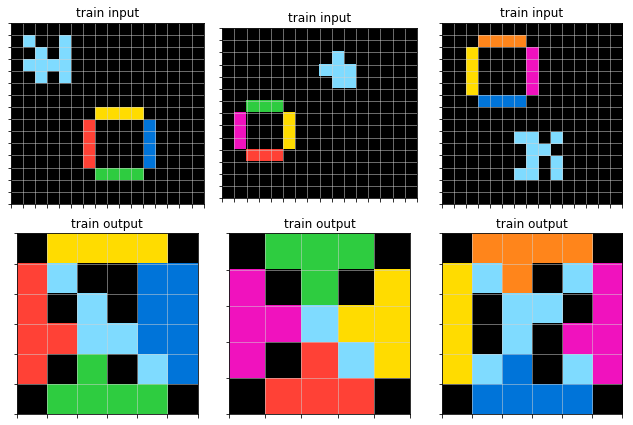

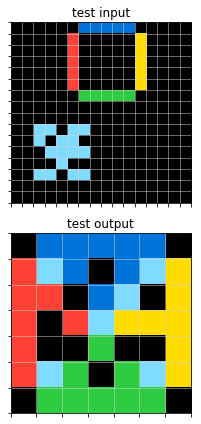

d0f5fe59.json


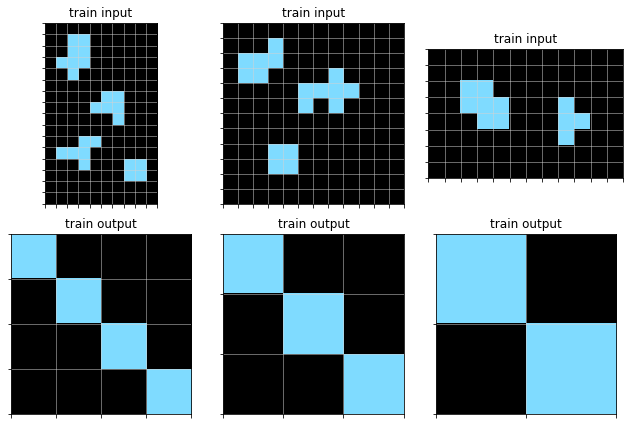

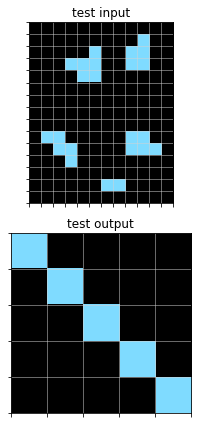

8, 2.0%
6, 1.5%
2, 2.0%


In [34]:
# 重ね合わせる系or仲間はずれ探し系or数の大小関係をみるパターンor囲みの内側を取り出す
tmp = training_descriptive_df[training_descriptive_df.in_each_pair_shape_doesnt_change==0]
tmp = tmp[tmp.decrease_color_sum==1]
tmp = tmp[tmp['color_kind_increase']==0]
tmp = tmp[tmp['color_kind_decrease']==0]
tmp = tmp[tmp.decrease_objects==1]
tmp9_train = tmp.copy()

for i in tmp["task_name"]:
    print(i)
    task = get_data(str(training_path / i))
    plot_task(task)
    
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 400)+"%")
tmp = evaluation_descriptive_df[evaluation_descriptive_df.in_each_pair_shape_doesnt_change==0]
tmp = tmp[tmp.decrease_color_sum==1]
tmp = tmp[tmp['color_kind_increase']==0]
tmp = tmp[tmp['color_kind_decrease']==0]
tmp = tmp[tmp.decrease_objects==1]
tmp9_eval = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 400)+"%")

tmp = test_descriptive_df[test_descriptive_df.in_each_pair_shape_doesnt_change==0]
tmp = tmp[tmp.decrease_color_sum==1]
tmp = tmp[tmp['color_kind_increase']==0]
tmp = tmp[tmp['color_kind_decrease']==0]
tmp = tmp[tmp.decrease_objects==1]
tmp9_test = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 100)+"%")

# class: different shape & decrease color sum & same color kind & not decrease_objects

2013d3e2.json


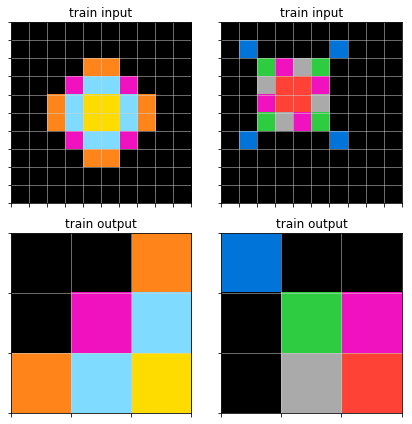

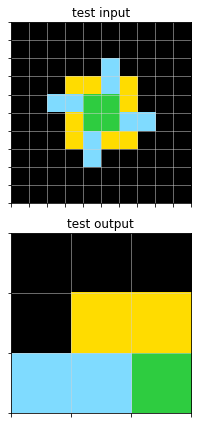

2dee498d.json


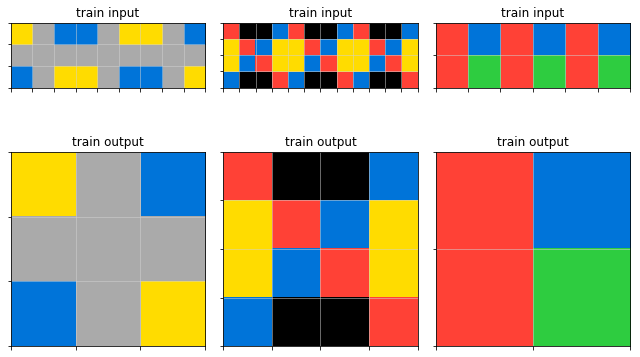

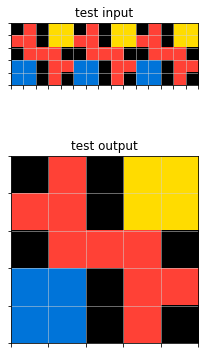

4290ef0e.json


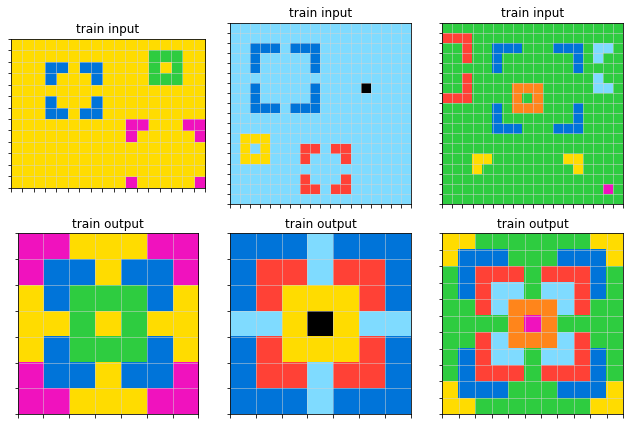

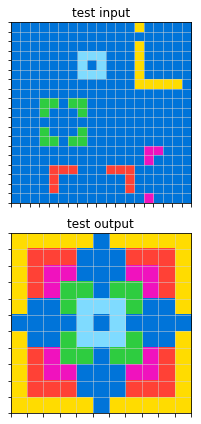

4be741c5.json


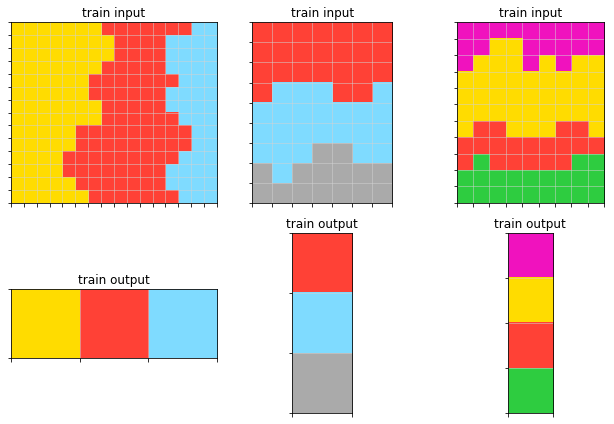

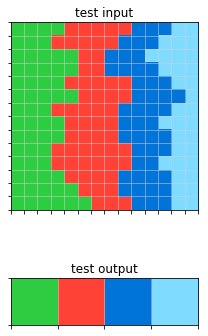

746b3537.json


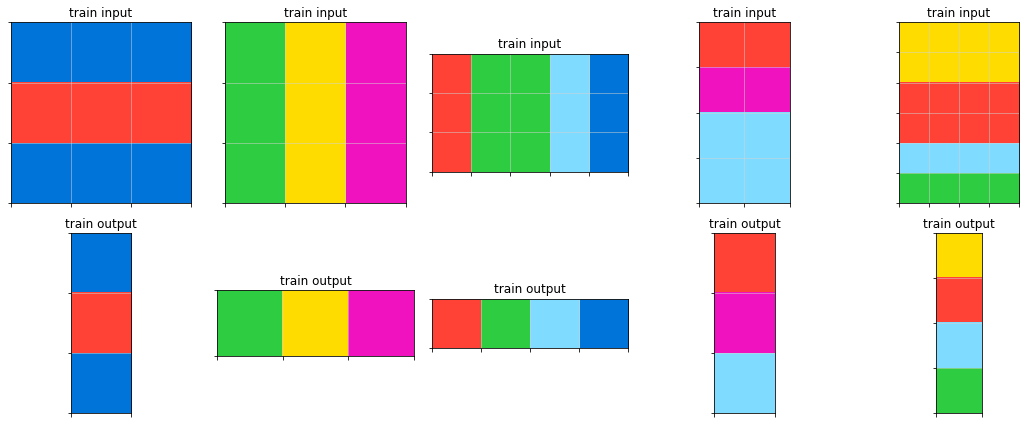

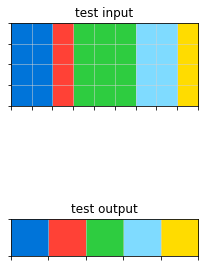

7b7f7511.json


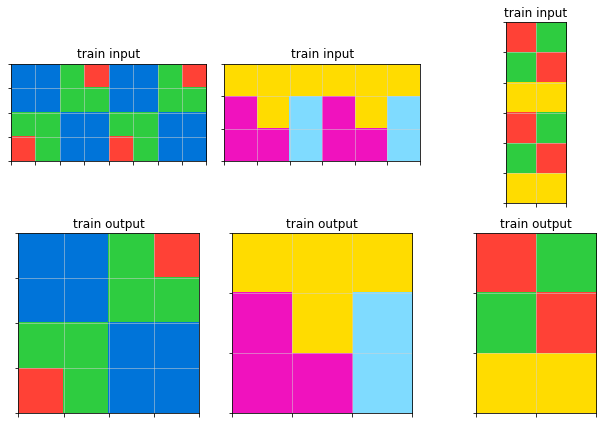

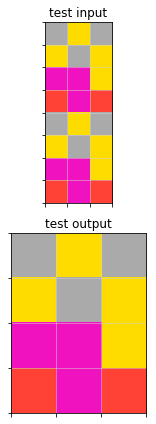

80af3007.json


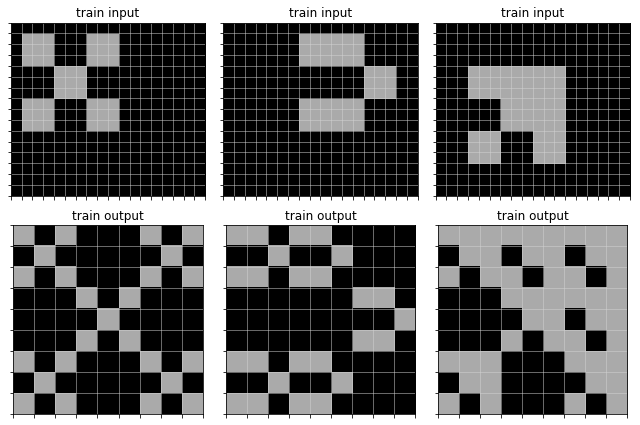

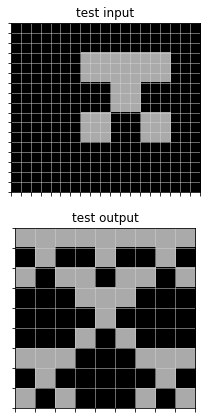

a740d043.json


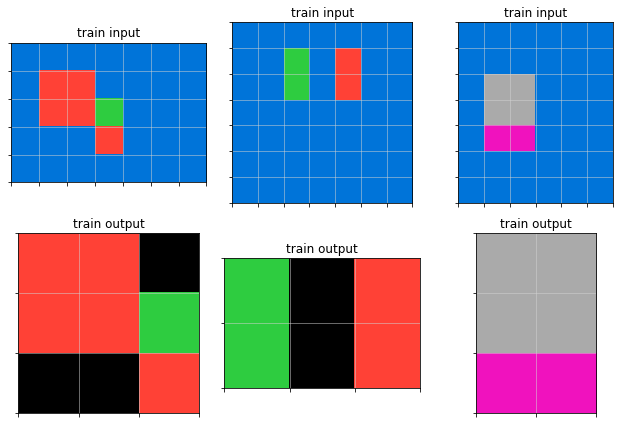

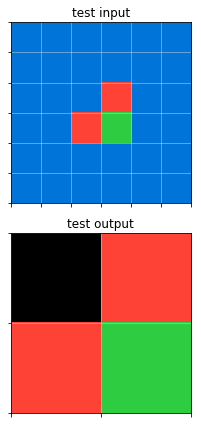

c8cbb738.json


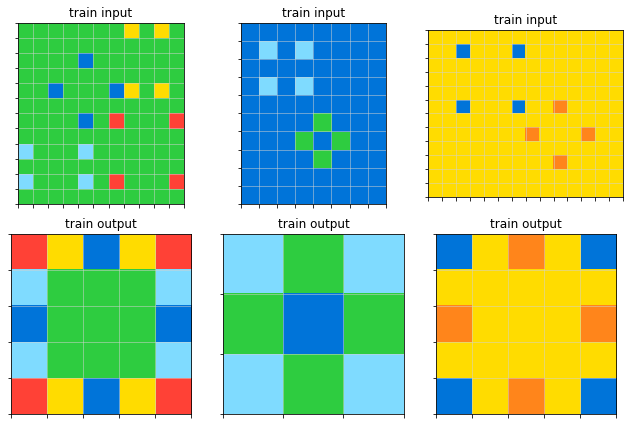

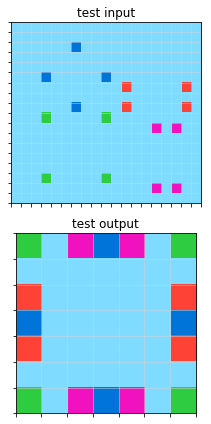

c909285e.json


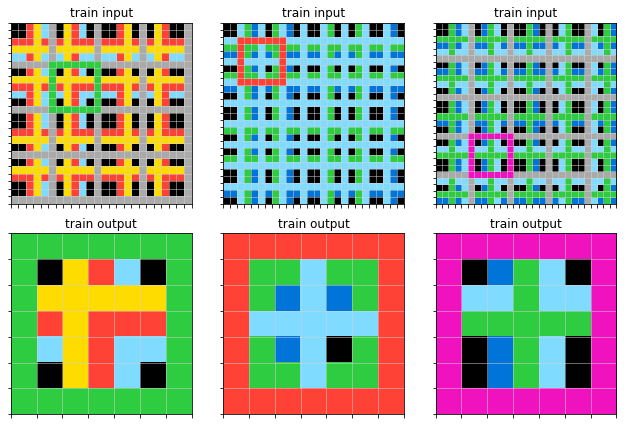

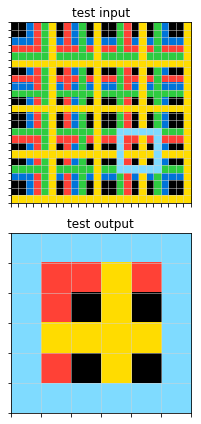

d10ecb37.json


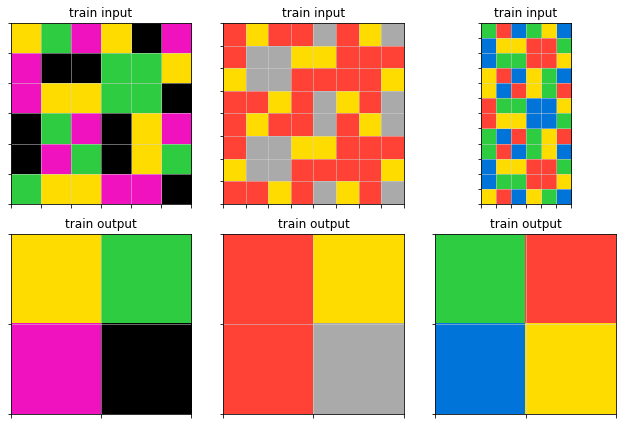

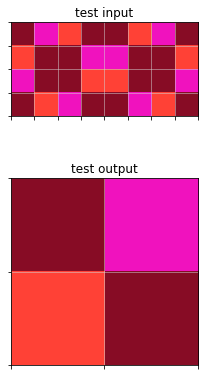

eb5a1d5d.json


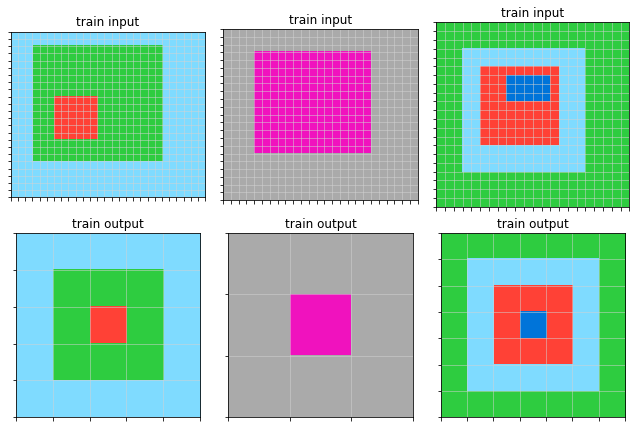

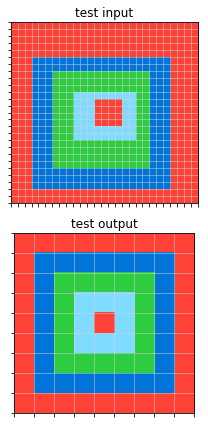

ff28f65a.json


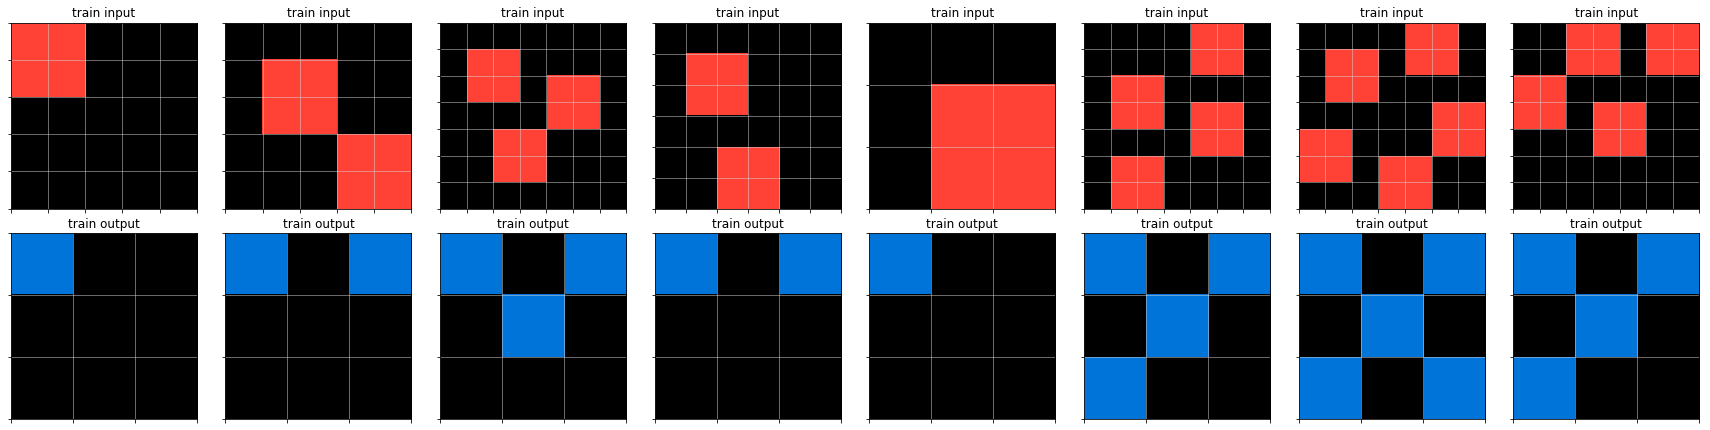

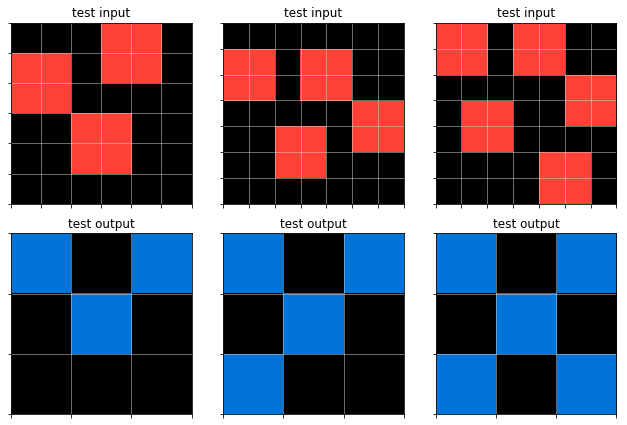

13, 3.25%
9, 2.25%
1, 1.0%


In [35]:
# 重ね合わせる系or最小構成単位を表示するor囲みの内側を取り出す
tmp = training_descriptive_df[training_descriptive_df.in_each_pair_shape_doesnt_change==0]
tmp = tmp[tmp.decrease_color_sum==1]
tmp = tmp[tmp['color_kind_increase']==0]
tmp = tmp[tmp['color_kind_decrease']==0]
tmp = tmp[tmp.decrease_objects==0]
tmp10_train = tmp.copy()

for i in tmp["task_name"]:
    print(i)
    task = get_data(str(training_path / i))
    plot_task(task)
    
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 400)+"%")
tmp = evaluation_descriptive_df[evaluation_descriptive_df.in_each_pair_shape_doesnt_change==0]
tmp = tmp[tmp.decrease_color_sum==1]
tmp = tmp[tmp['color_kind_increase']==0]
tmp = tmp[tmp['color_kind_decrease']==0]
tmp = tmp[tmp.decrease_objects==0]
tmp10_eval = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 400)+"%")

tmp = test_descriptive_df[test_descriptive_df.in_each_pair_shape_doesnt_change==0]
tmp = tmp[tmp.decrease_color_sum==1]
tmp = tmp[tmp['color_kind_increase']==0]
tmp = tmp[tmp['color_kind_decrease']==0]
tmp = tmp[tmp.decrease_objects==0]
tmp10_test = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 100)+"%")

# class: different shape & increase color sum & same color kind

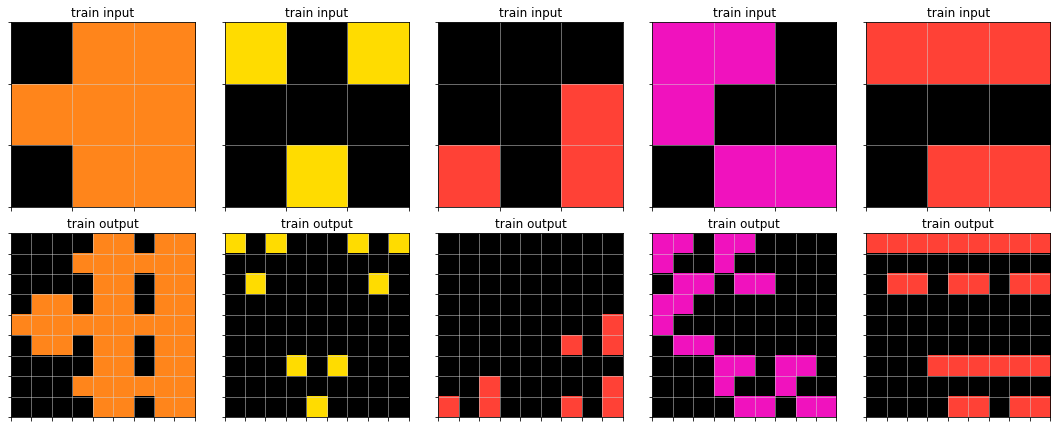

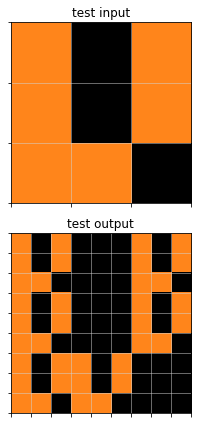

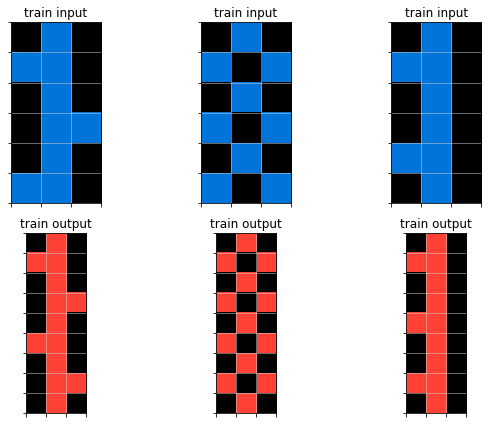

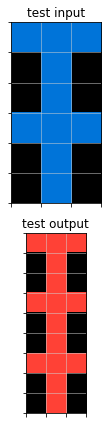

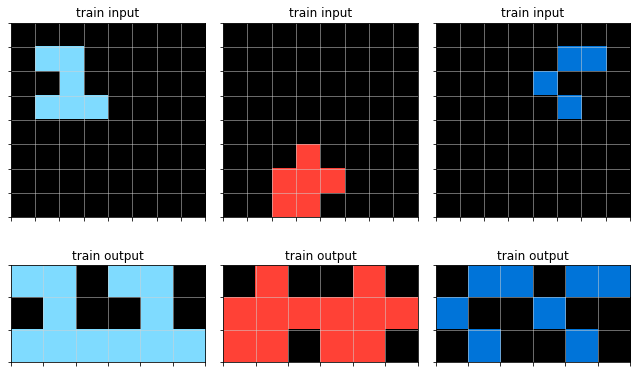

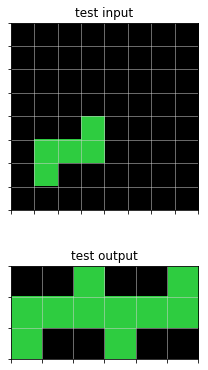

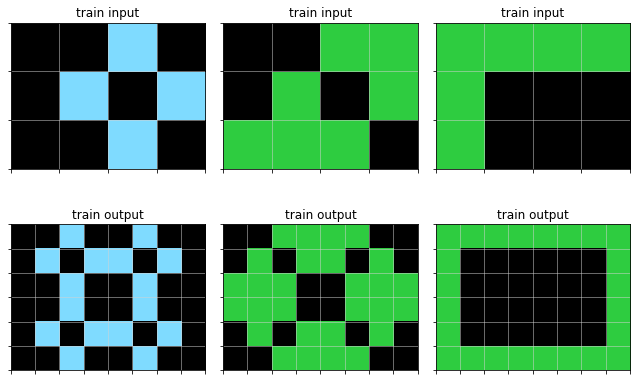

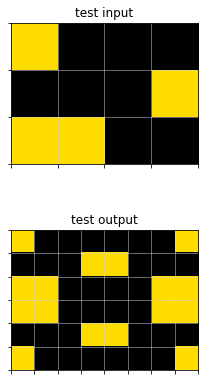

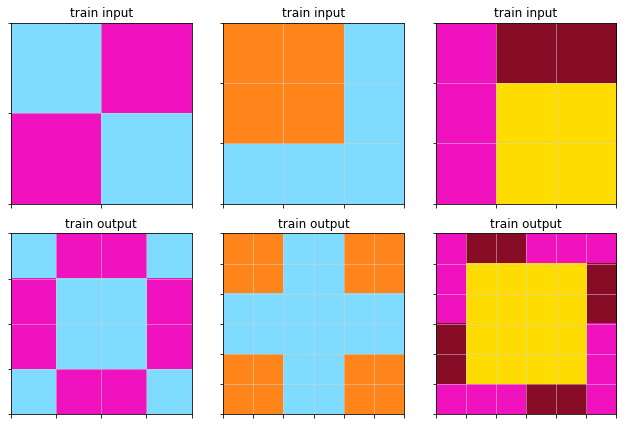

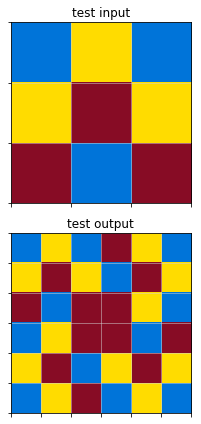

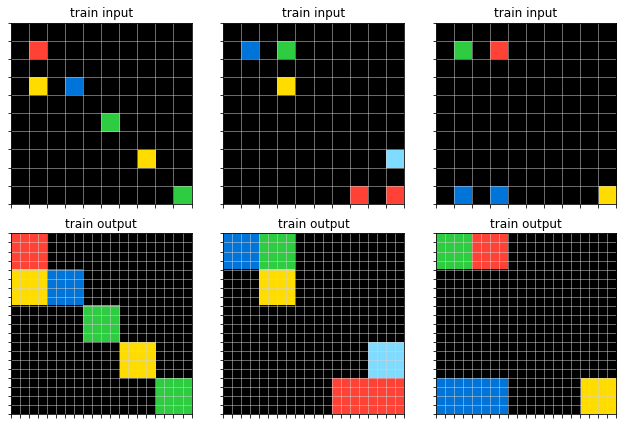

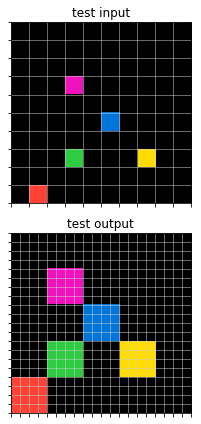

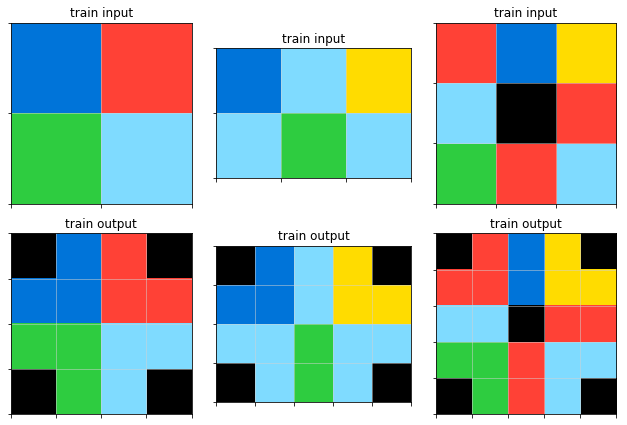

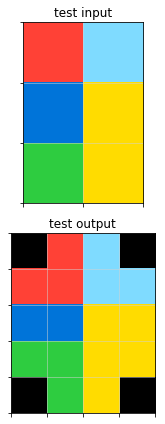

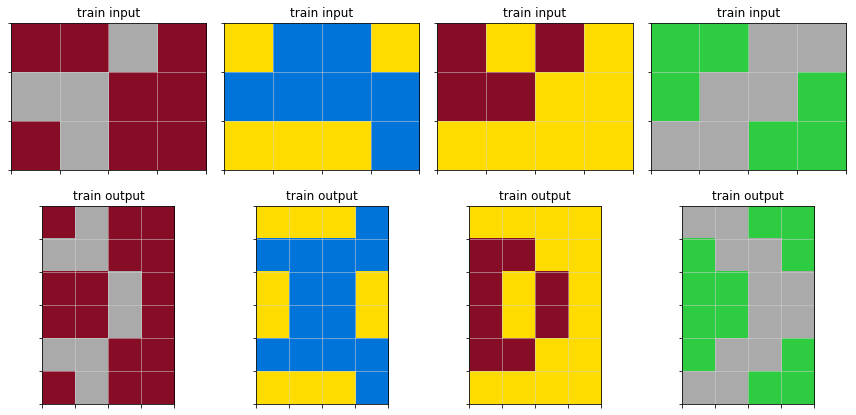

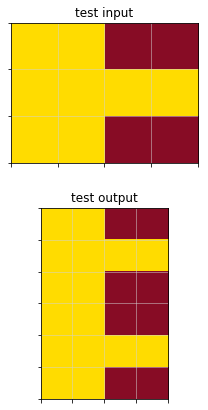

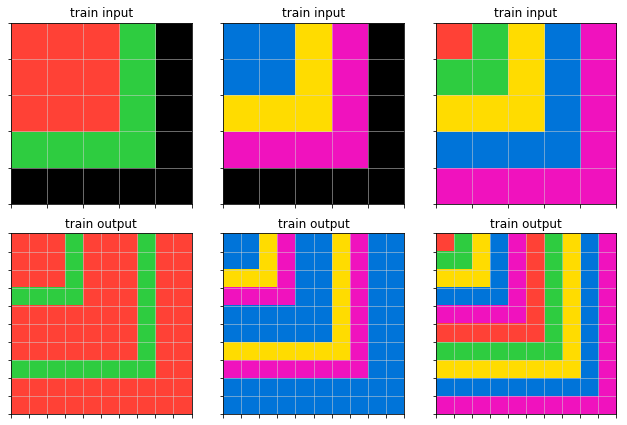

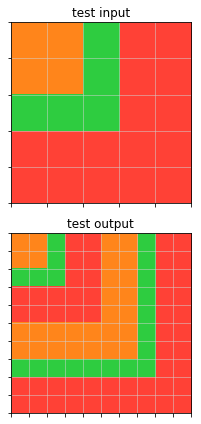

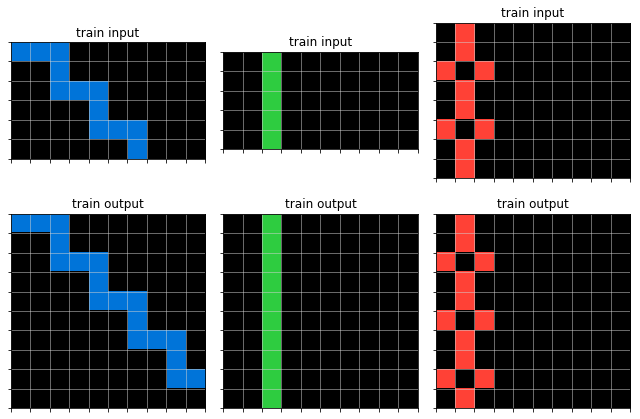

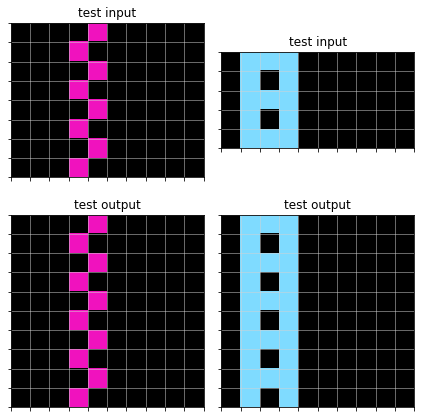

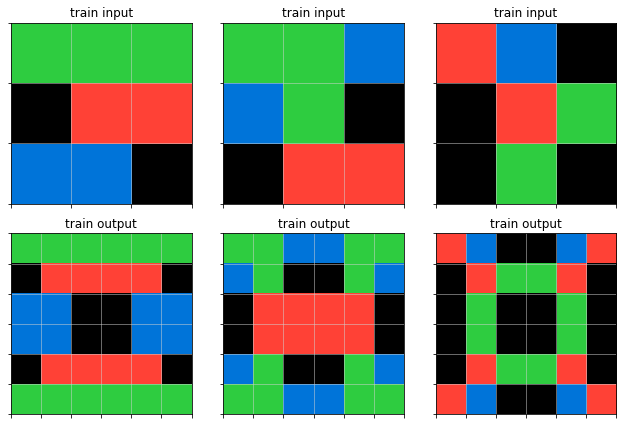

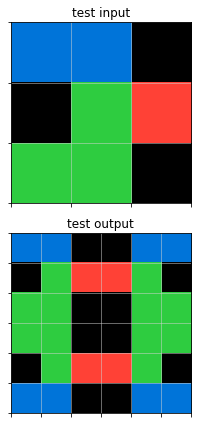

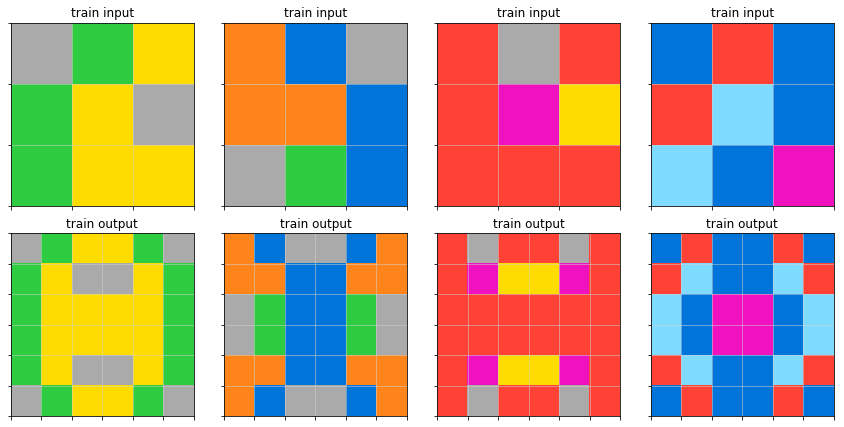

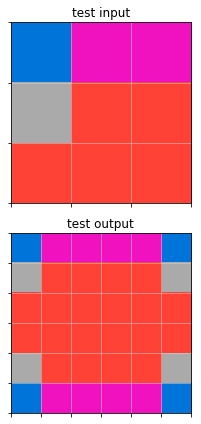

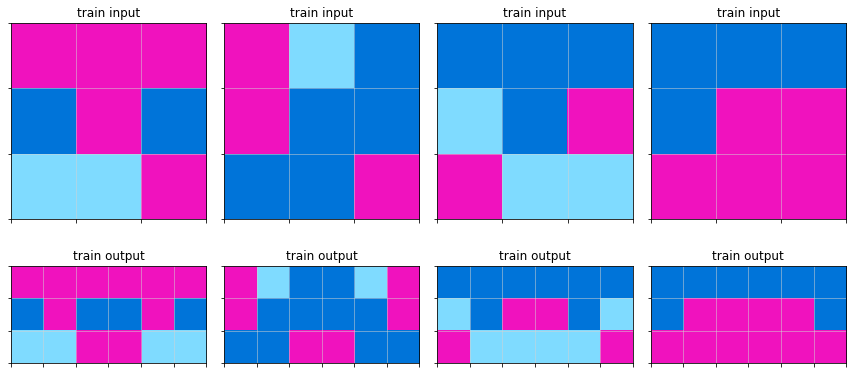

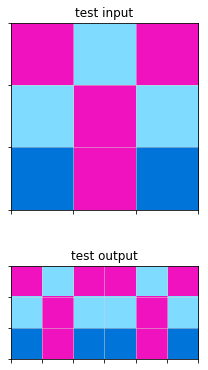

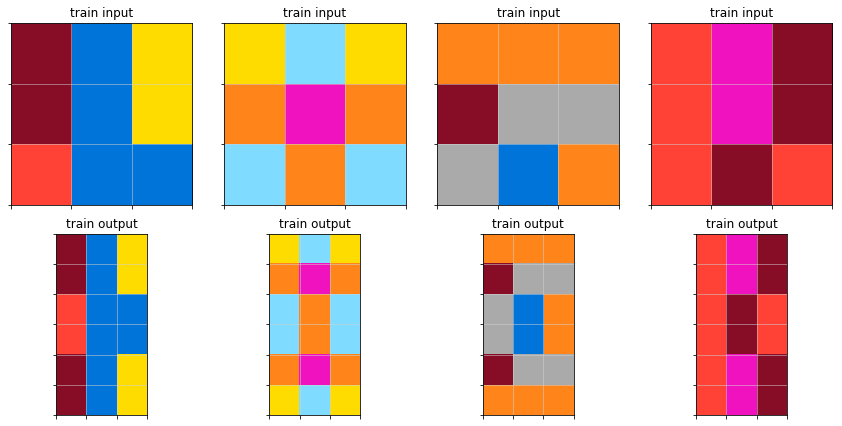

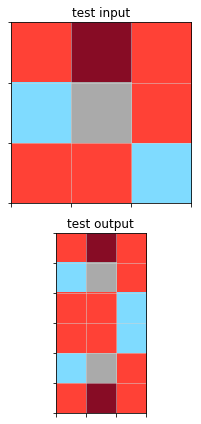

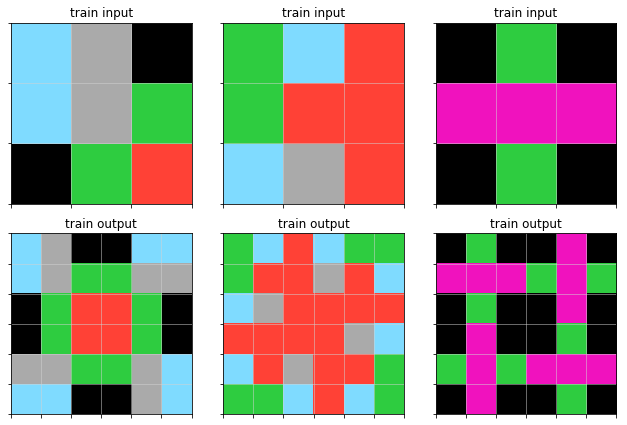

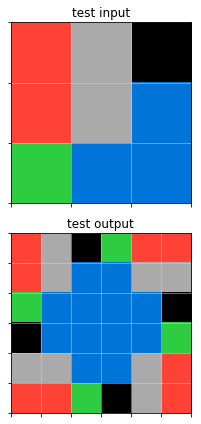

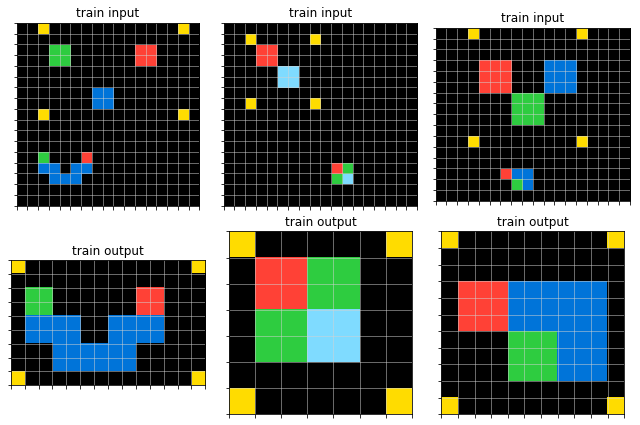

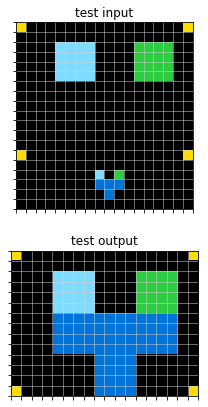

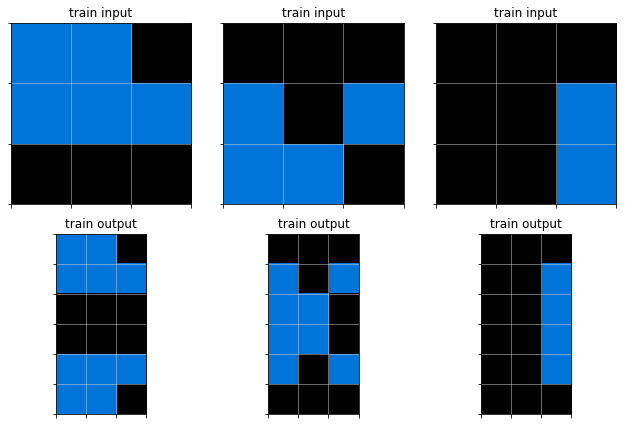

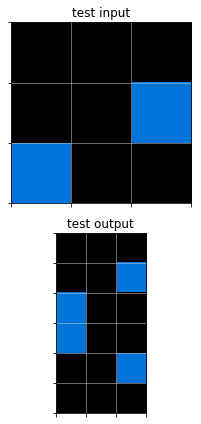

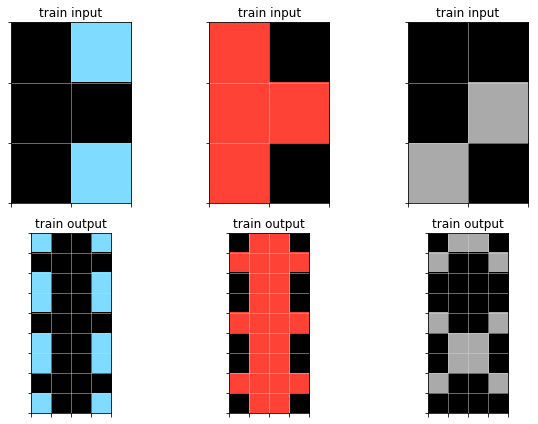

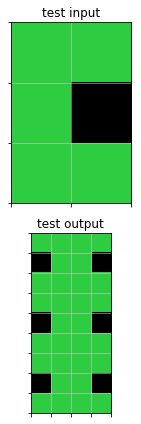

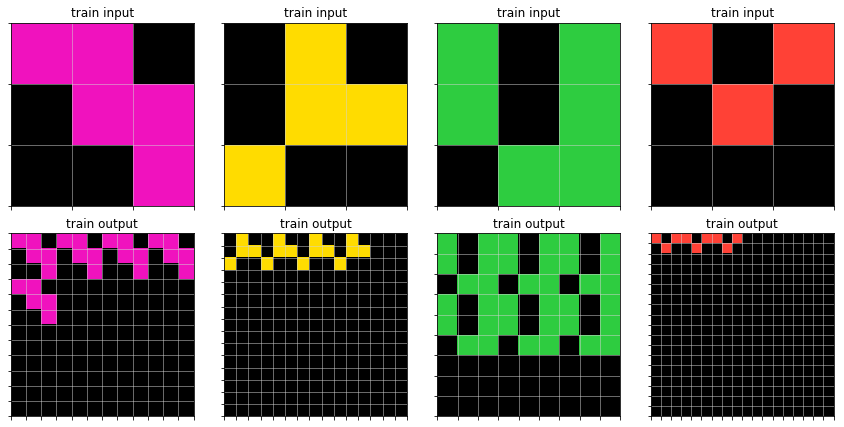

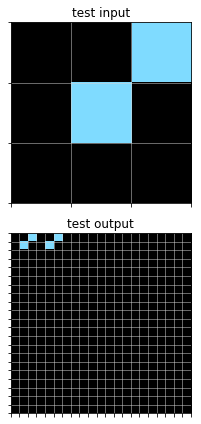

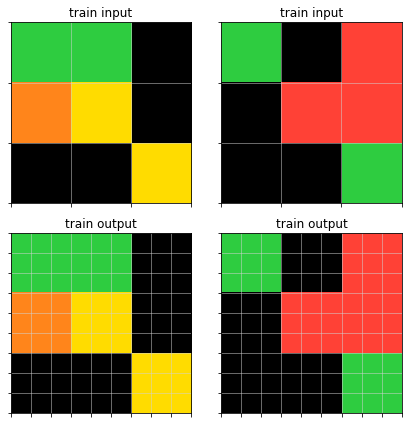

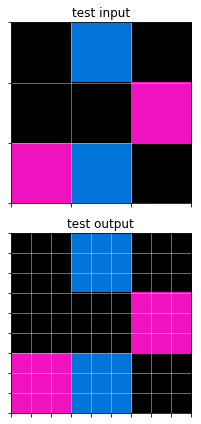

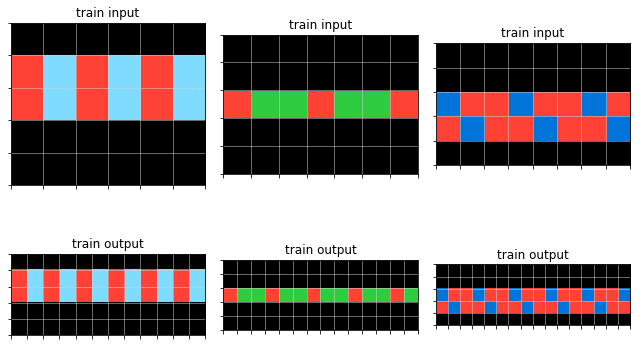

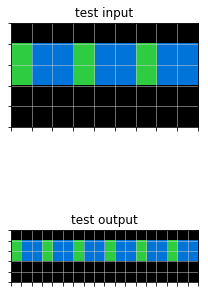

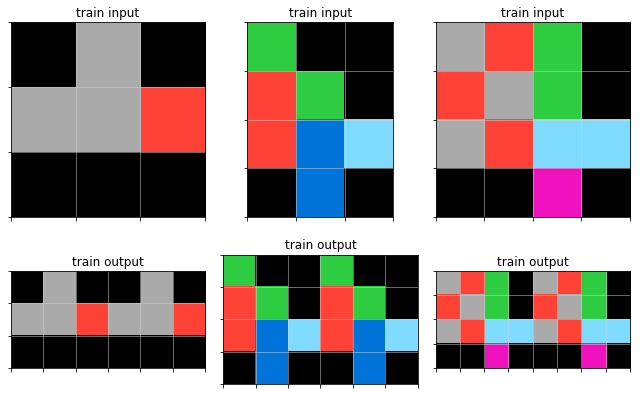

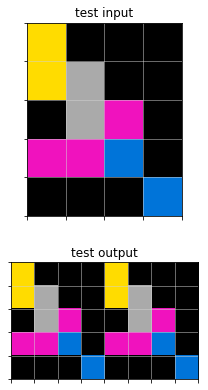

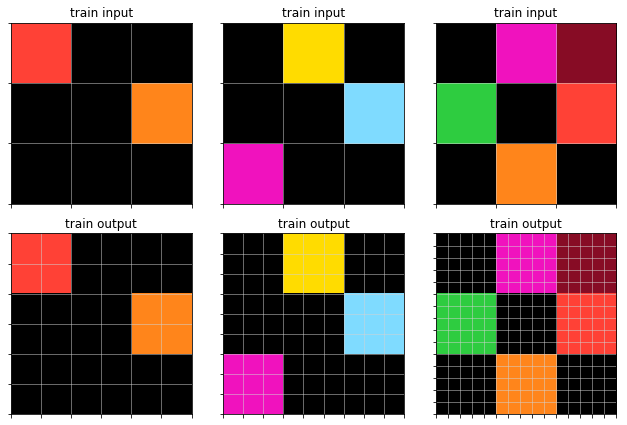

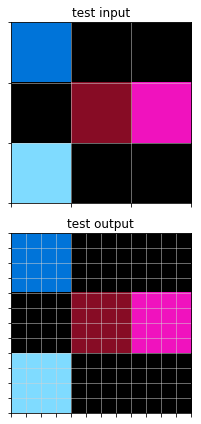

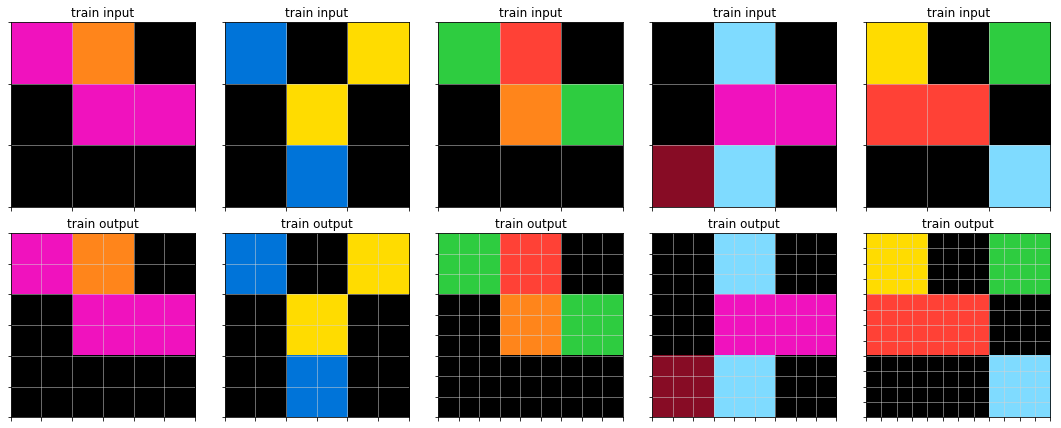

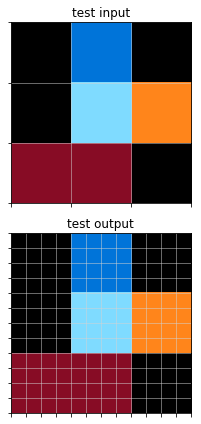

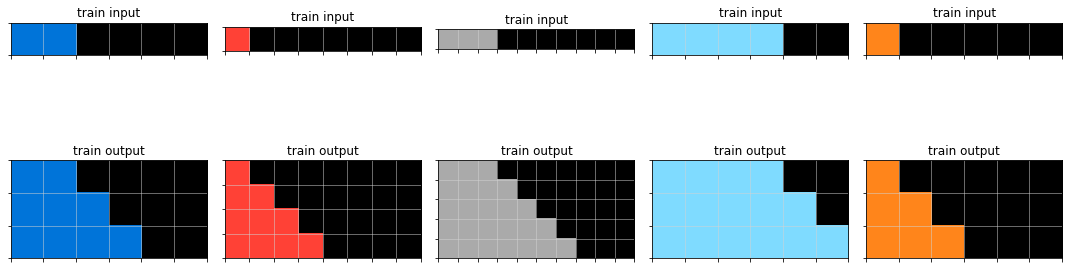

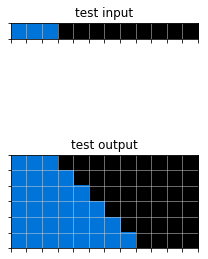

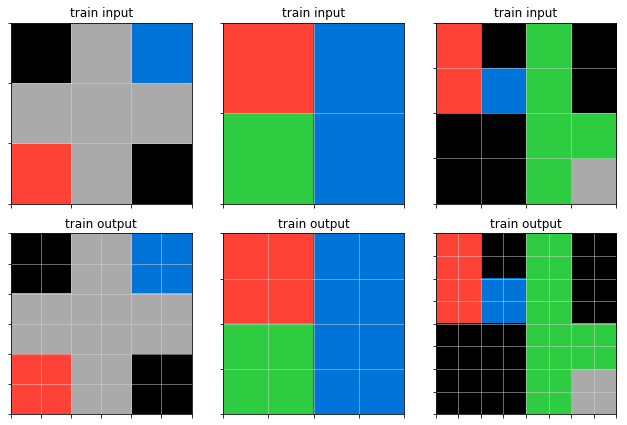

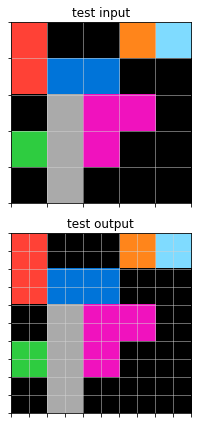

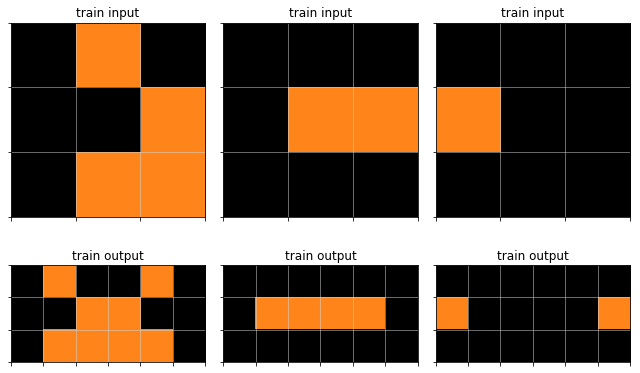

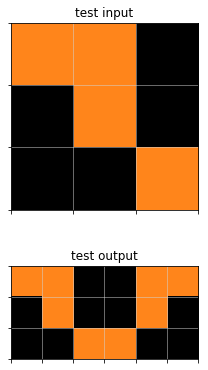

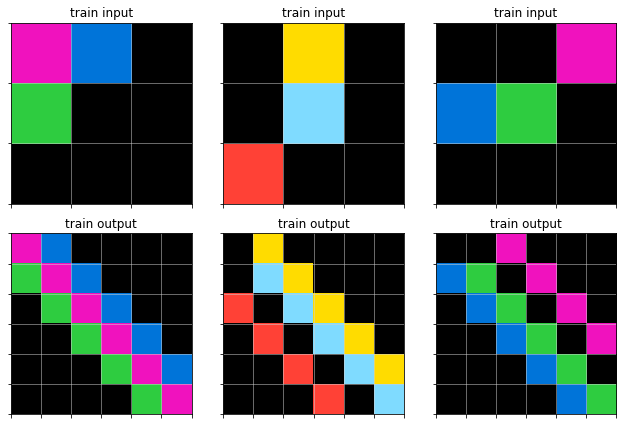

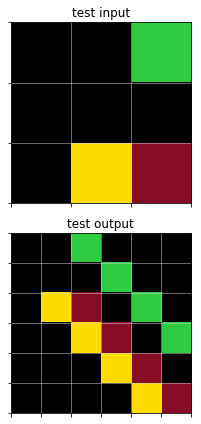

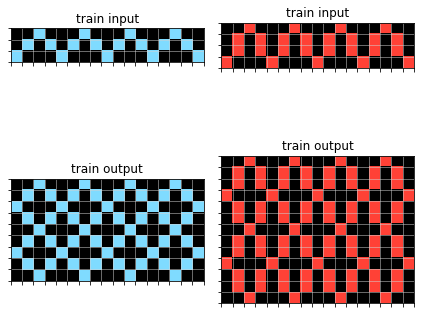

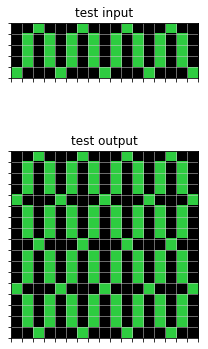

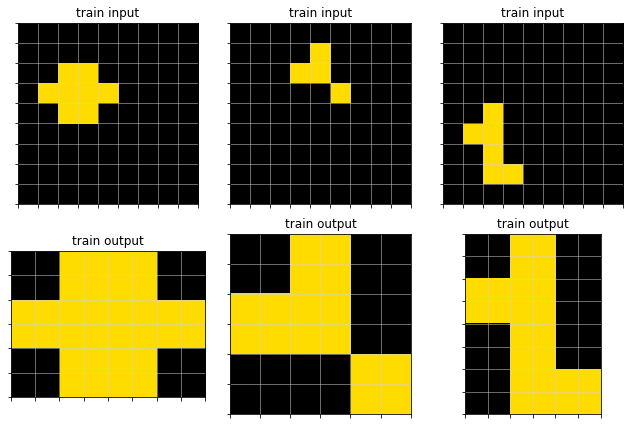

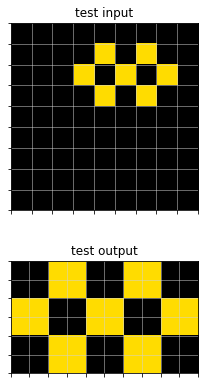

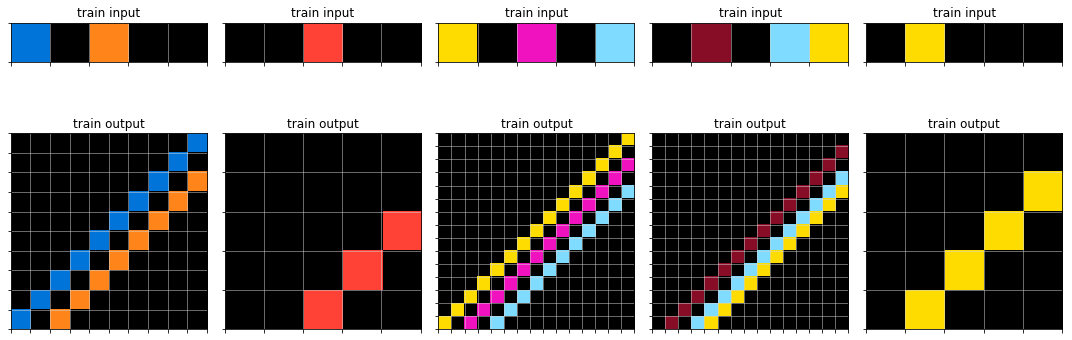

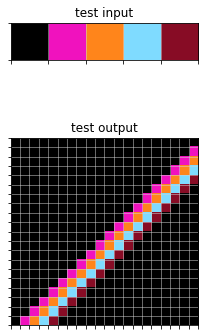

31, 7.75%
22, 5.5%
5, 5.0%


In [36]:
# 続きのパターンを書くor反転などによりパターンを繰り返しorマス自体を分割　ものが多い
tmp = training_descriptive_df[training_descriptive_df.in_each_pair_shape_doesnt_change==0]
tmp = tmp[tmp.increase_color_sum==1]
tmp = tmp[tmp.color_kind_increase==0]
tmp = tmp[tmp.color_kind_decrease==0]

for i in tmp["task_name"]:
    task = get_data(str(training_path / i))
    plot_task(task)
    
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 400)+"%")
tmp = evaluation_descriptive_df[evaluation_descriptive_df.in_each_pair_shape_doesnt_change==0]
tmp = tmp[tmp.increase_color_sum==1]
tmp = tmp[tmp.color_kind_increase==0]
tmp = tmp[tmp.color_kind_decrease==0]
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 400)+"%")

tmp = test_descriptive_df[test_descriptive_df.in_each_pair_shape_doesnt_change==0]
tmp = tmp[tmp.increase_color_sum==1]
tmp = tmp[tmp.color_kind_increase==0]
tmp = tmp[tmp.color_kind_decrease==0]
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 100)+"%")

# class: different shape & increase color sum & increase color kind

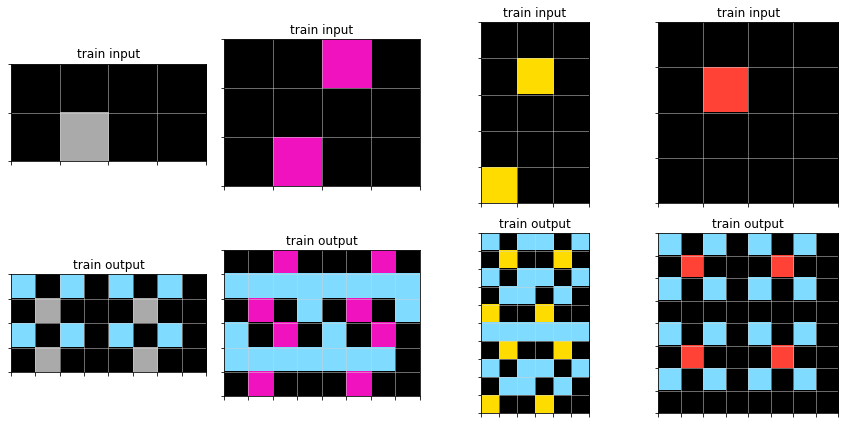

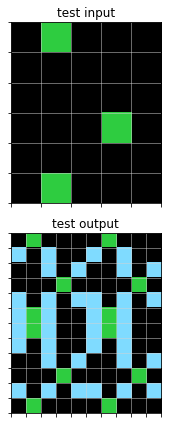

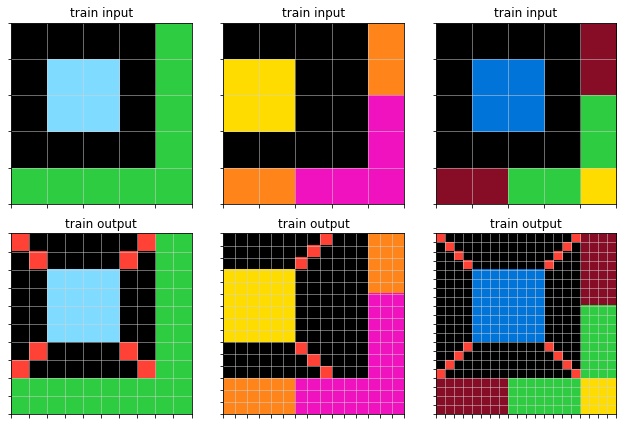

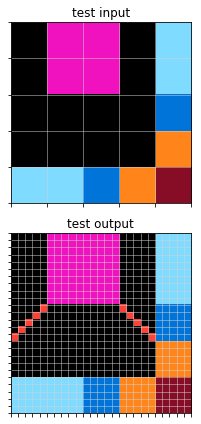

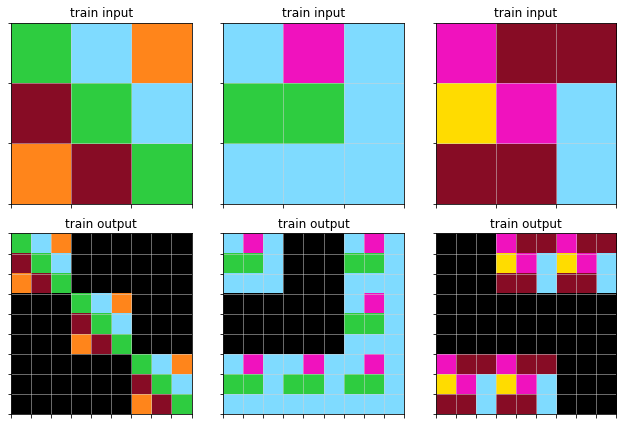

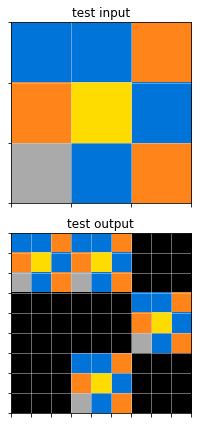

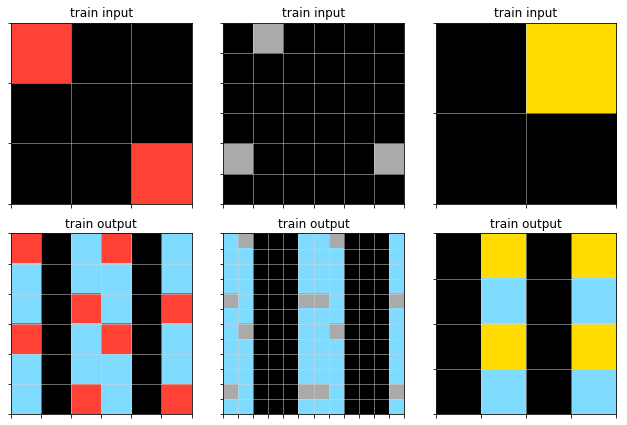

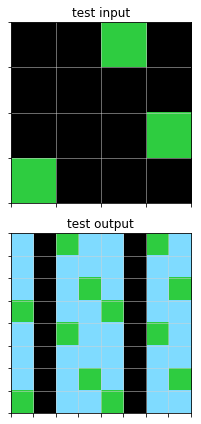

4, 1.0%
10, 2.5%
4, 4.0%


In [37]:
# 続きのパターンを書くor反転などによりパターンを繰り返しorマス自体を分割　ものが多い
tmp = training_descriptive_df[training_descriptive_df.in_each_pair_shape_doesnt_change==0]
tmp = tmp[tmp.increase_color_sum==1]
tmp = tmp[tmp.color_kind_increase==1]

for i in tmp["task_name"]:
    task = get_data(str(training_path / i))
    plot_task(task)
    
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 400)+"%")
tmp = evaluation_descriptive_df[evaluation_descriptive_df.in_each_pair_shape_doesnt_change==0]
tmp = tmp[tmp.increase_color_sum==1]
tmp = tmp[tmp.color_kind_increase==1]
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 400)+"%")

tmp = test_descriptive_df[test_descriptive_df.in_each_pair_shape_doesnt_change==0]
tmp = tmp[tmp.increase_color_sum==1]
tmp = tmp[tmp.color_kind_increase==1]
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 100)+"%")

# class: different shape & increase color sum & increase color kind

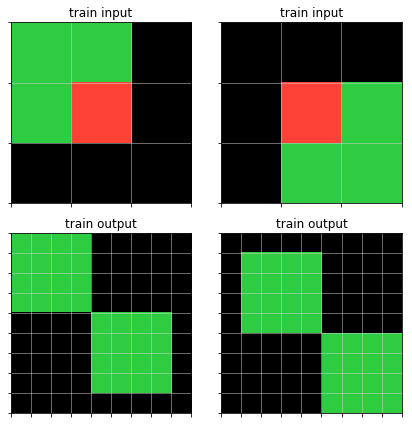

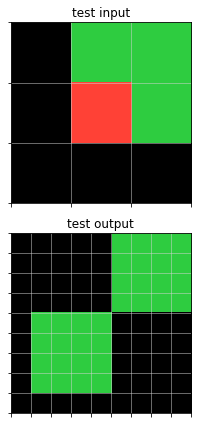

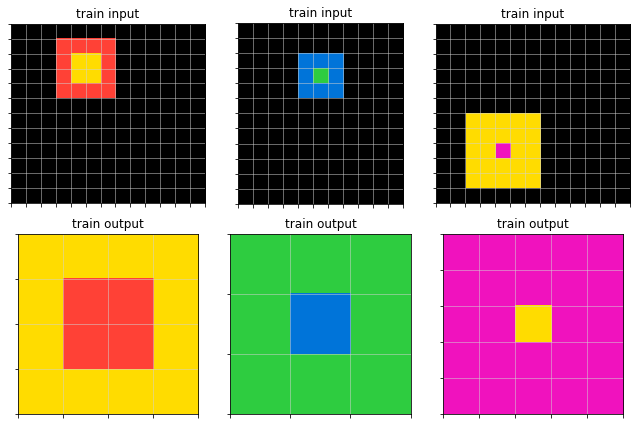

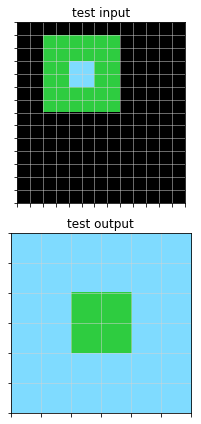

2, 0.5%
5, 1.25%
2, 2.0%


In [38]:
# 続きのパターンを書くor反転などによりパターンを繰り返しorマス自体を分割　ものが多い
tmp = training_descriptive_df[training_descriptive_df.in_each_pair_shape_doesnt_change==0]
tmp = tmp[tmp.increase_color_sum==1]
tmp = tmp[tmp.color_kind_decrease==1]

for i in tmp["task_name"]:
    task = get_data(str(training_path / i))
    plot_task(task)
    
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 400)+"%")
tmp = evaluation_descriptive_df[evaluation_descriptive_df.in_each_pair_shape_doesnt_change==0]
tmp = tmp[tmp.increase_color_sum==1]
tmp = tmp[tmp.color_kind_decrease==1]
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 400)+"%")

tmp = test_descriptive_df[test_descriptive_df.in_each_pair_shape_doesnt_change==0]
tmp = tmp[tmp.increase_color_sum==1]
tmp = tmp[tmp.color_kind_decrease==1]
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 100)+"%")

# class: different shape & same color sum & decrease objects

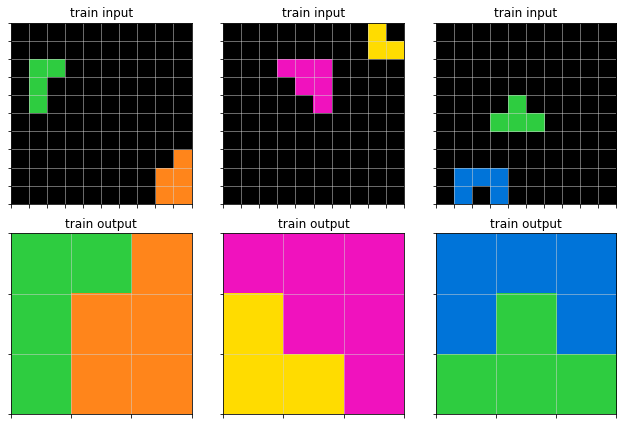

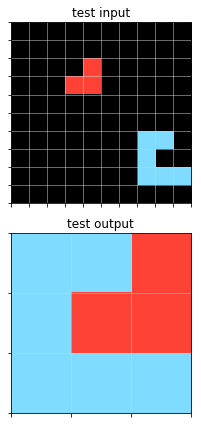

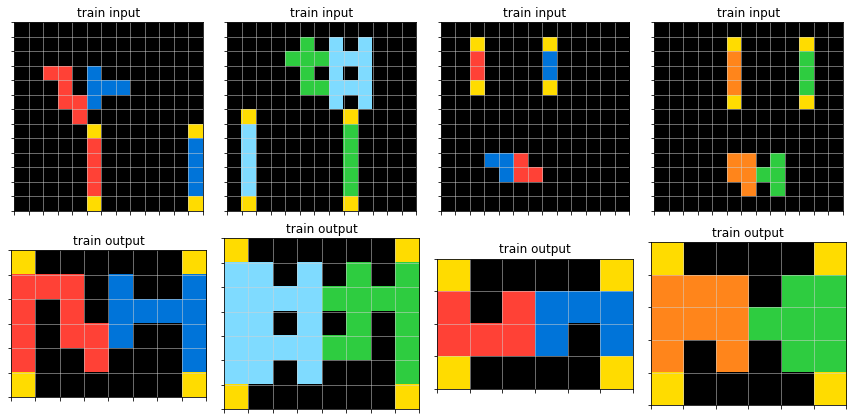

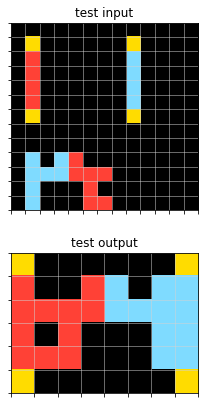

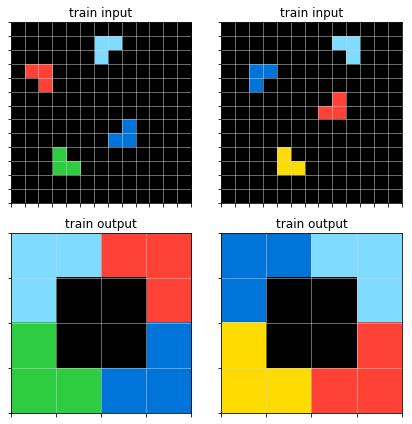

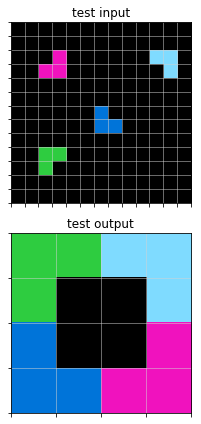

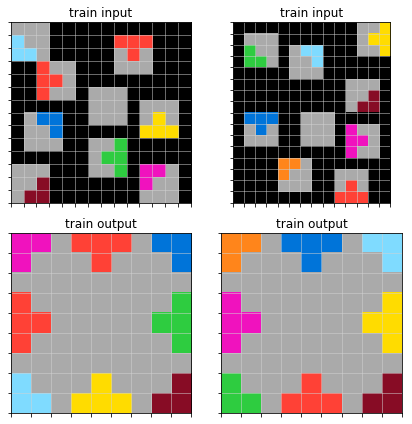

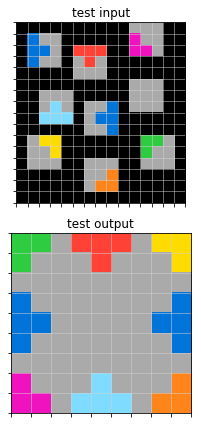

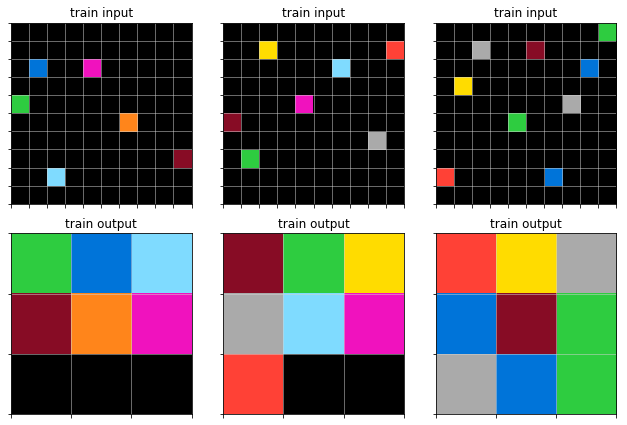

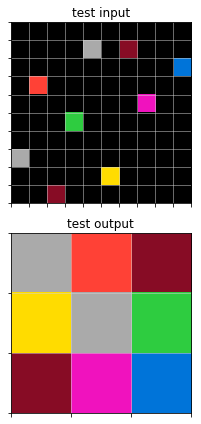

5, 1.25%
6, 1.5%
0, 0.0%


In [39]:
# 画像内の色付き図形を組み立てて表示
tmp = training_descriptive_df[training_descriptive_df.in_each_pair_shape_doesnt_change==0]
tmp = tmp[tmp.same_color_sum==1]
tmp = tmp[tmp.decrease_objects==1]

for i in tmp["task_name"]:
    task = get_data(str(training_path / i))
    plot_task(task)

print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 400)+"%")
tmp = evaluation_descriptive_df[evaluation_descriptive_df.in_each_pair_shape_doesnt_change==0]
tmp = tmp[tmp.same_color_sum==1]
tmp = tmp[tmp.decrease_objects==1]
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 400)+"%")

tmp = test_descriptive_df[test_descriptive_df.in_each_pair_shape_doesnt_change==0]
tmp = tmp[tmp.same_color_sum==1]
tmp = tmp[tmp.decrease_objects==1]
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 100)+"%")

# class: different shape & same color sum & same objects

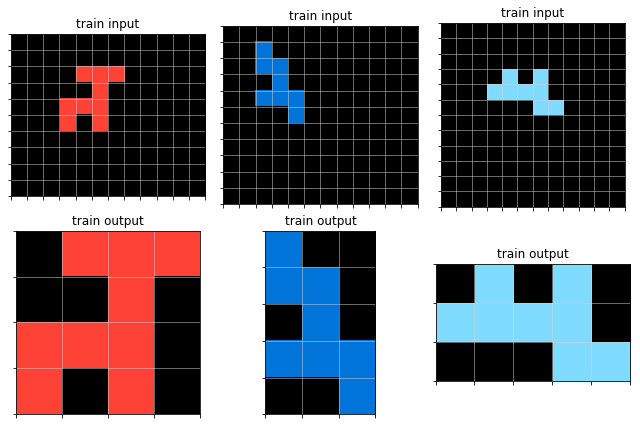

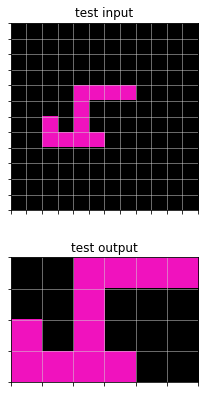

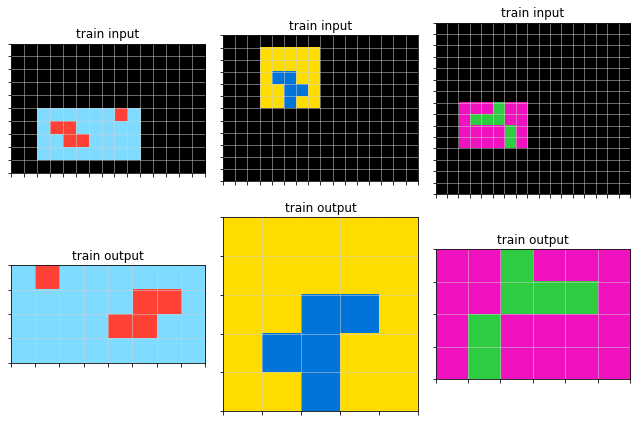

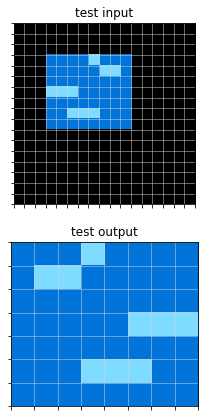

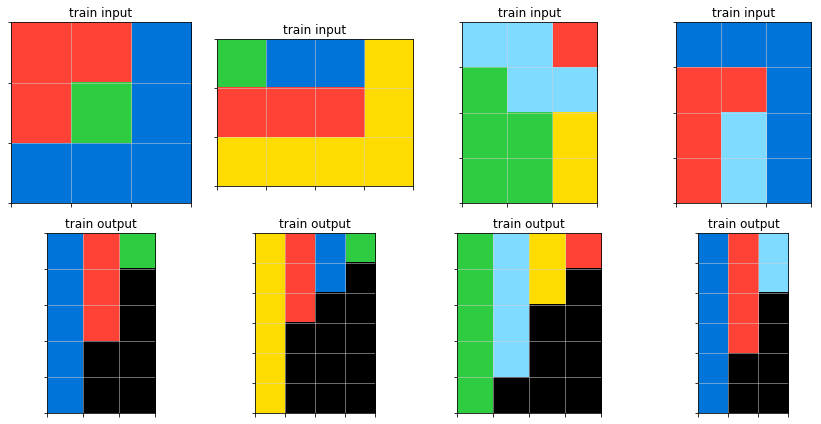

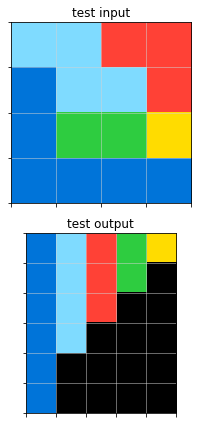

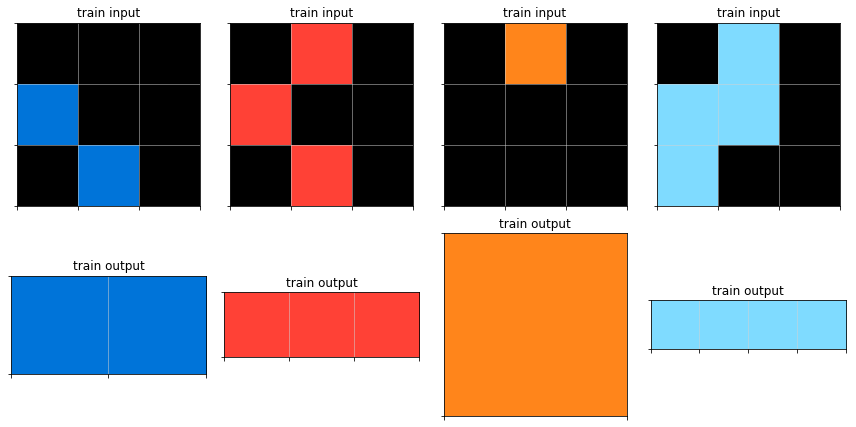

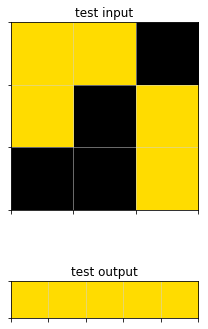

4, 1.0%
2, 0.5%
1, 1.0%


In [40]:
# 色付きの図形を取り出すor色の個数を表示する
tmp = training_descriptive_df[training_descriptive_df.in_each_pair_shape_doesnt_change==0]
tmp = tmp[tmp.same_color_sum==1]
tmp = tmp[tmp.decrease_objects==0]
tmp = tmp[tmp.increase_objects==0]

for i in tmp["task_name"]:
    task = get_data(str(training_path / i))
    plot_task(task)

print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 400)+"%")
tmp = evaluation_descriptive_df[evaluation_descriptive_df.in_each_pair_shape_doesnt_change==0]
tmp = tmp[tmp.same_color_sum==1]
tmp = tmp[tmp.decrease_objects==0]
tmp = tmp[tmp.increase_objects==0]
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 400)+"%")

tmp = test_descriptive_df[test_descriptive_df.in_each_pair_shape_doesnt_change==0]
tmp = tmp[tmp.same_color_sum==1]
tmp = tmp[tmp.decrease_objects==0]
tmp = tmp[tmp.increase_objects==0]
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / 100)+"%")

# check input dimensionality

134


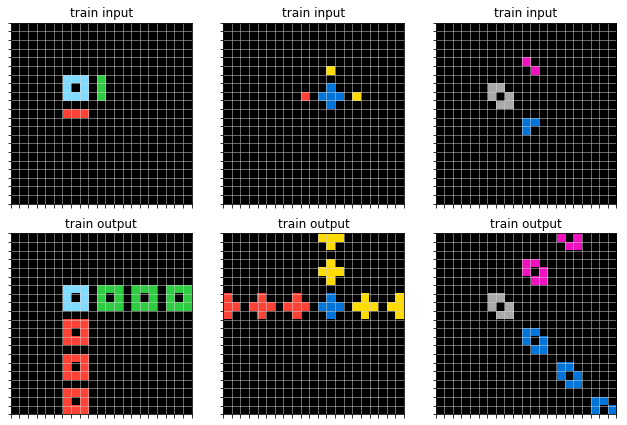

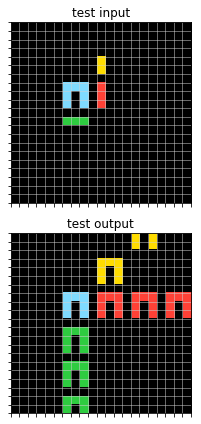

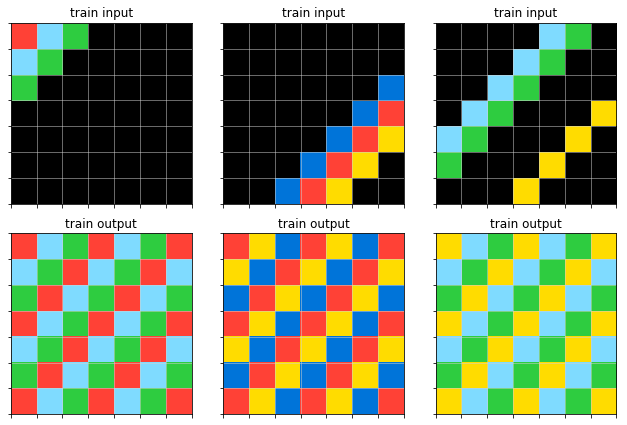

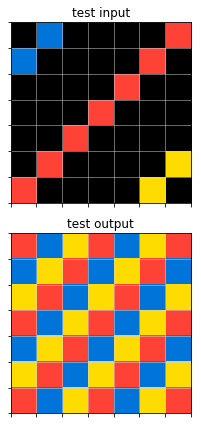

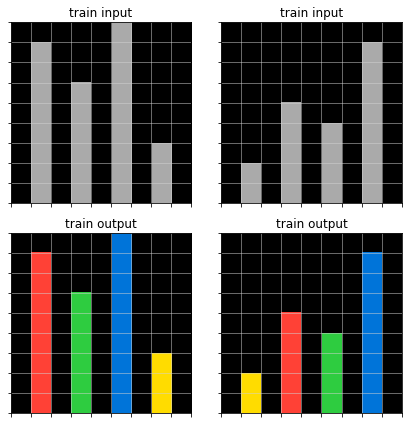

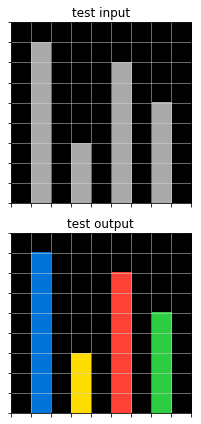

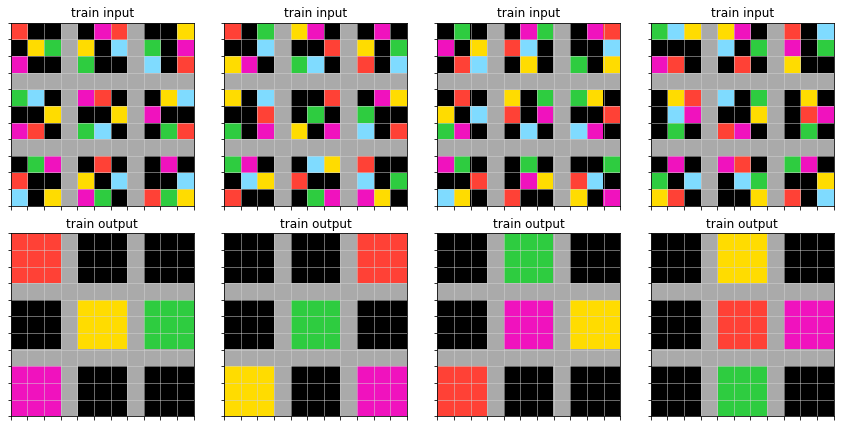

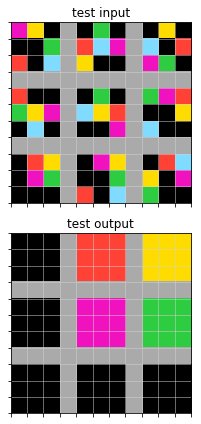

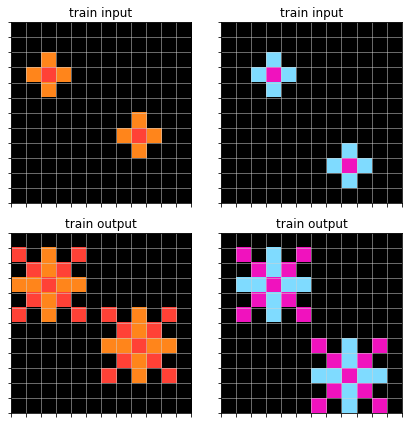

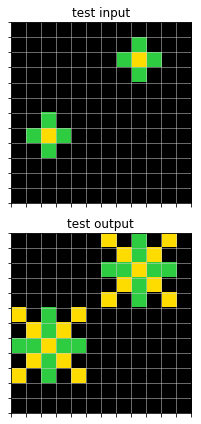

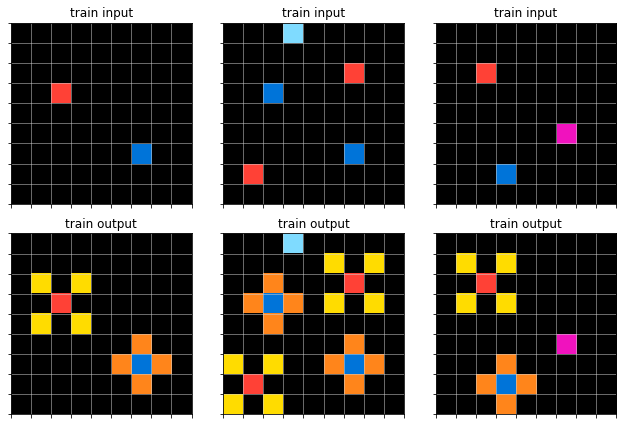

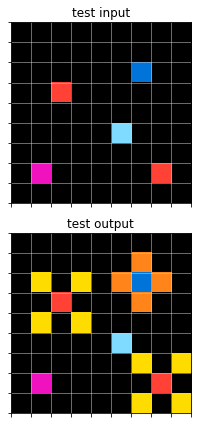

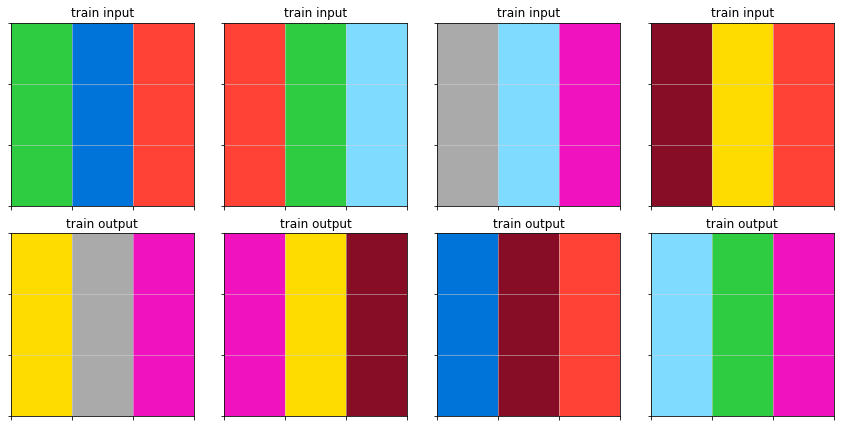

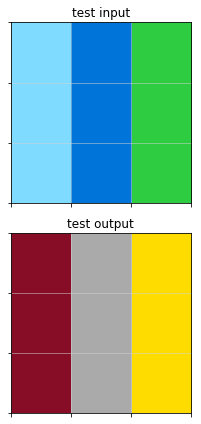

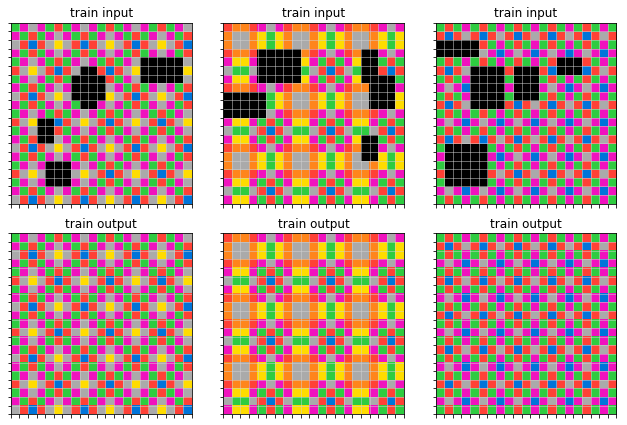

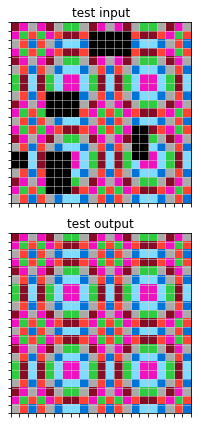

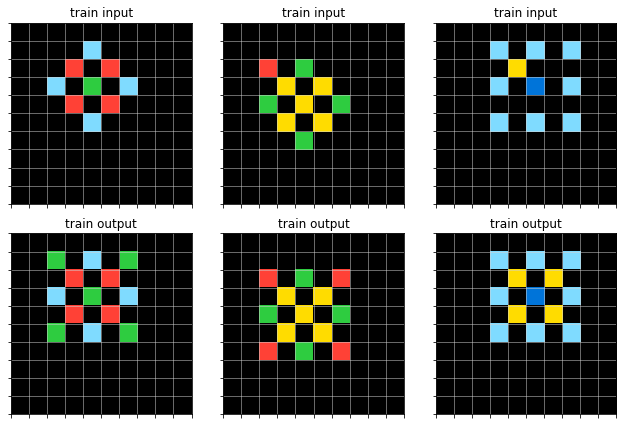

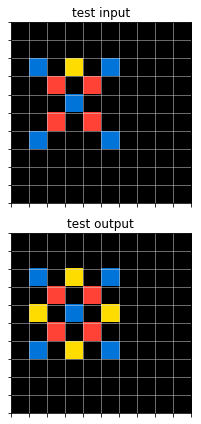

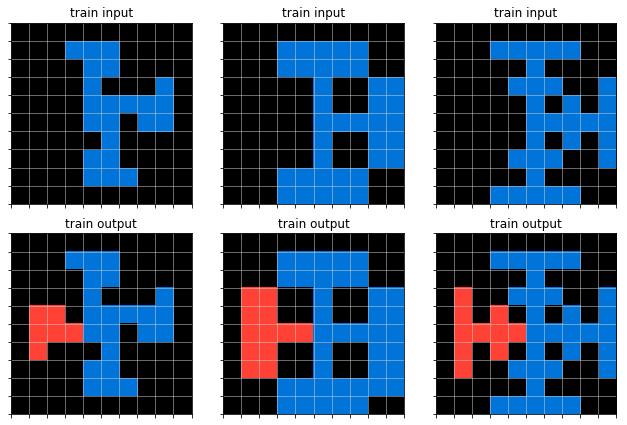

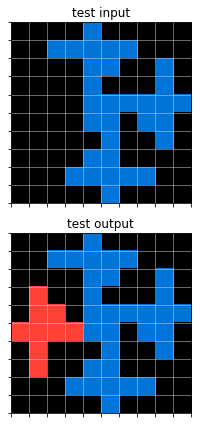

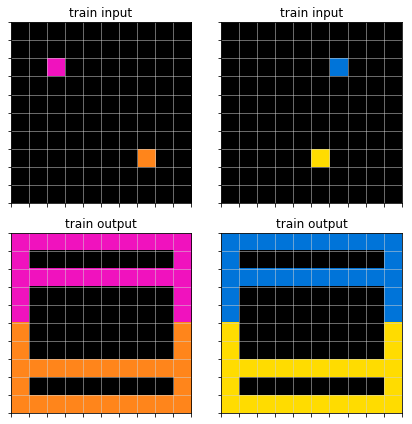

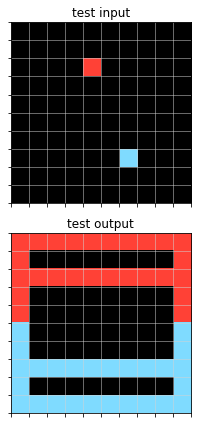

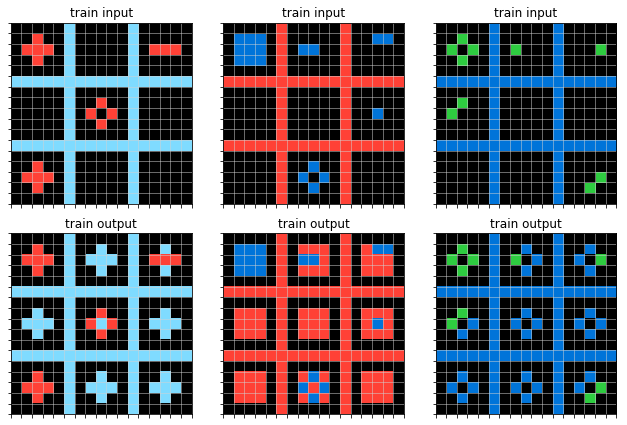

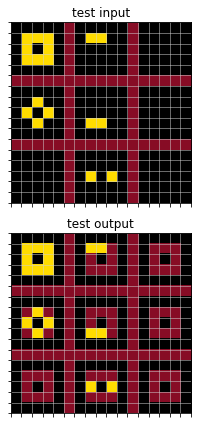

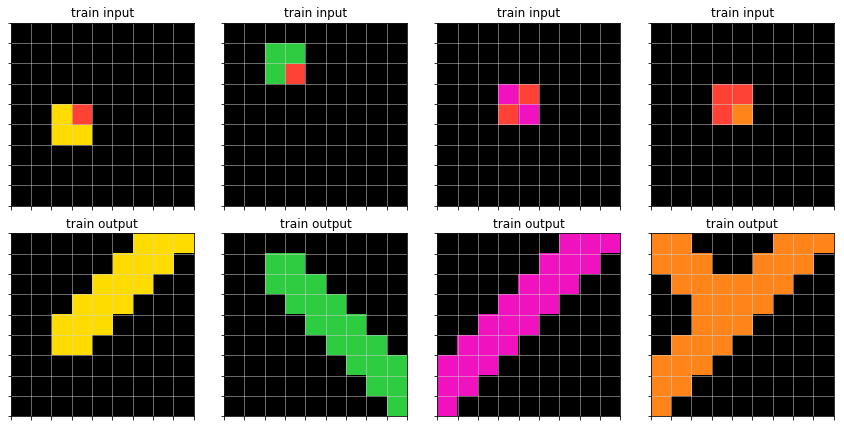

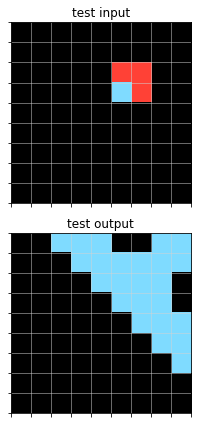

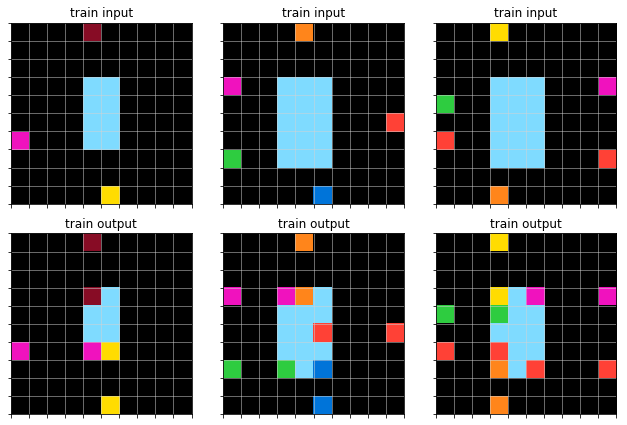

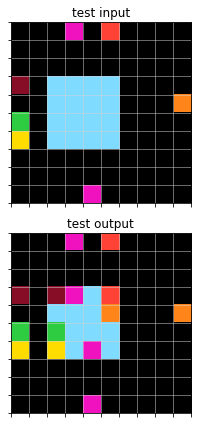

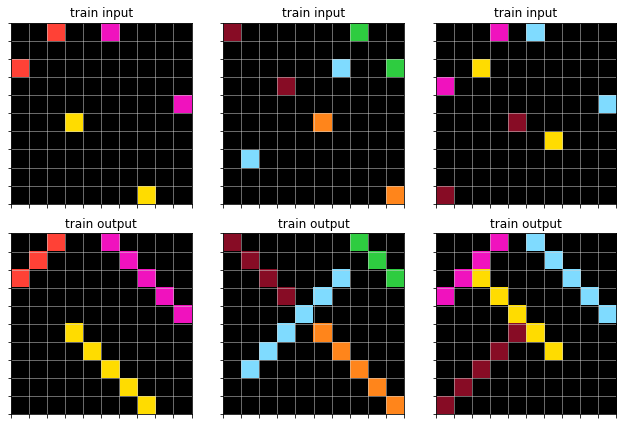

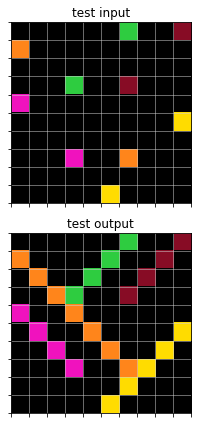

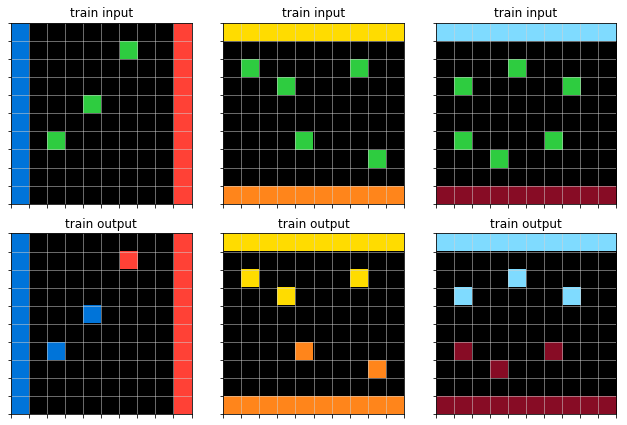

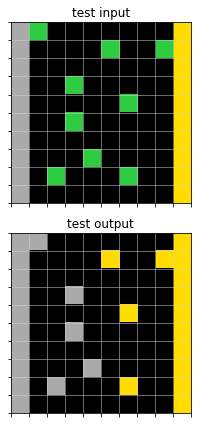

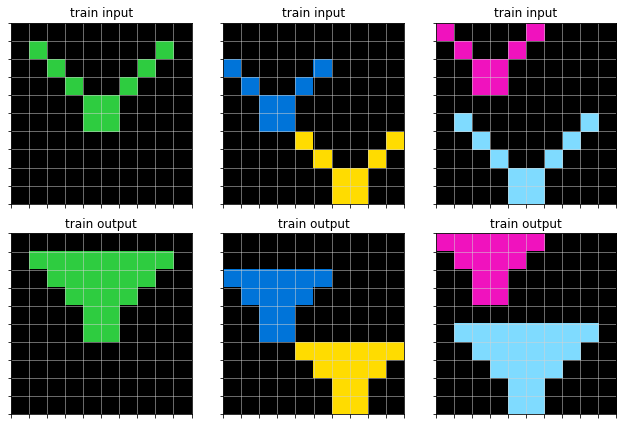

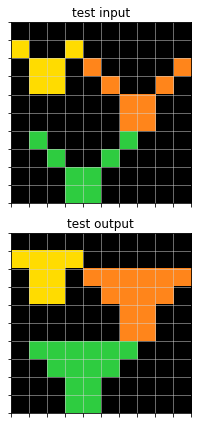

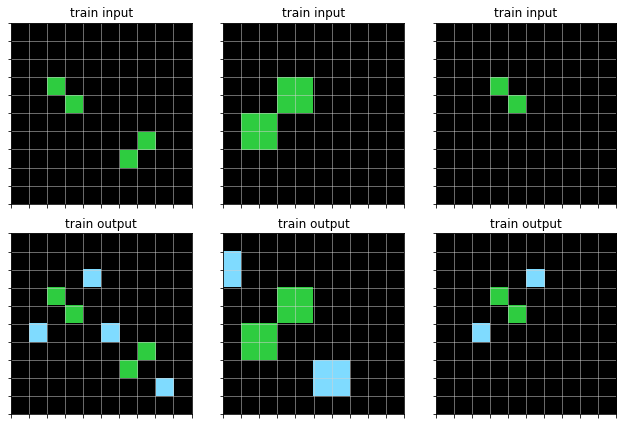

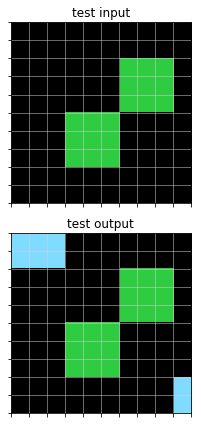

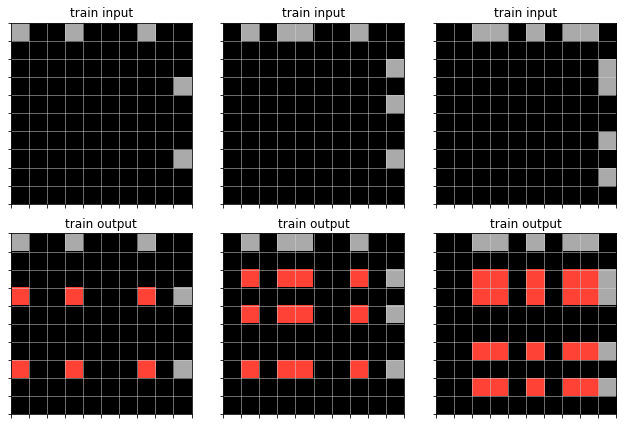

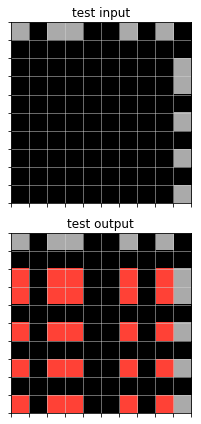

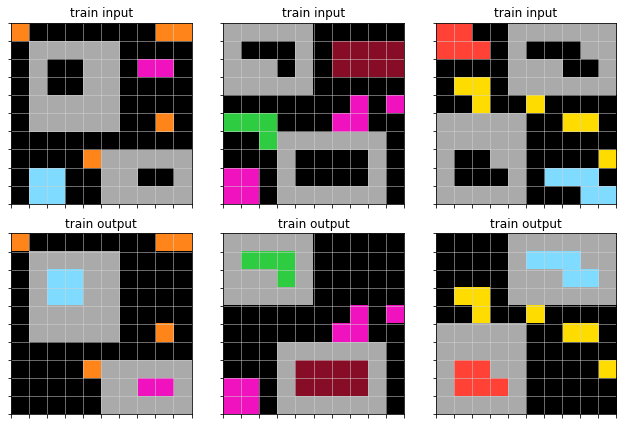

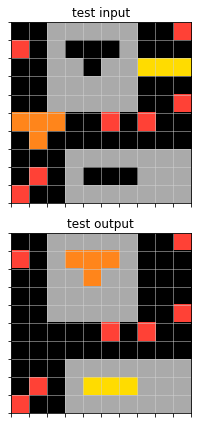

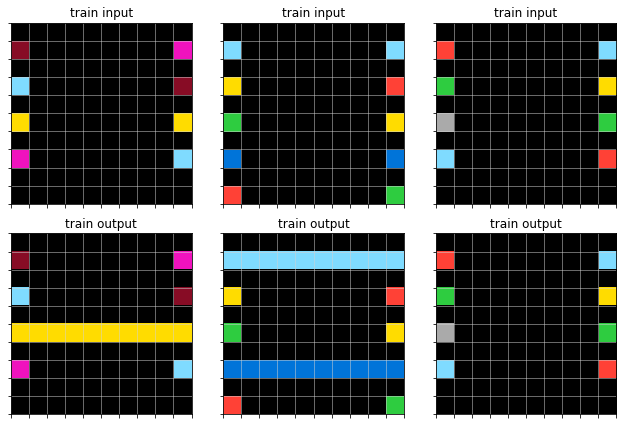

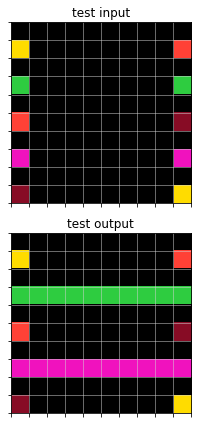

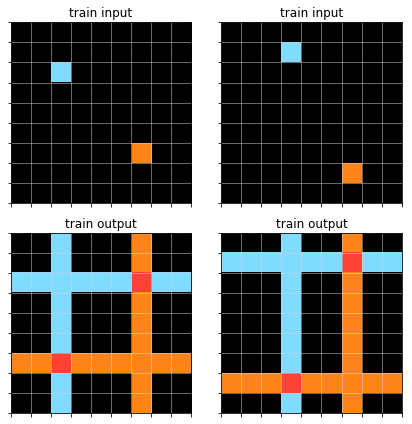

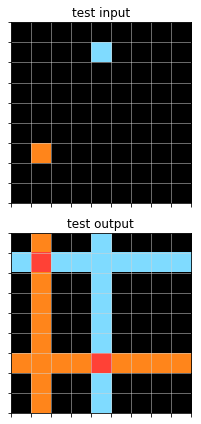

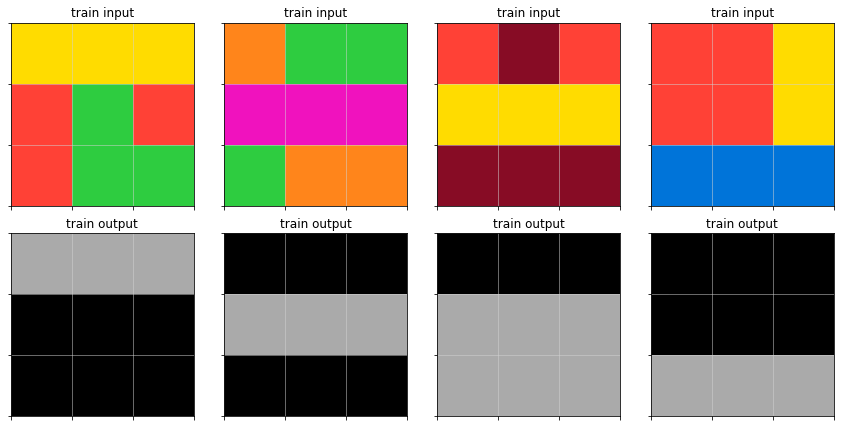

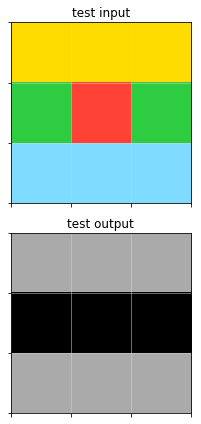

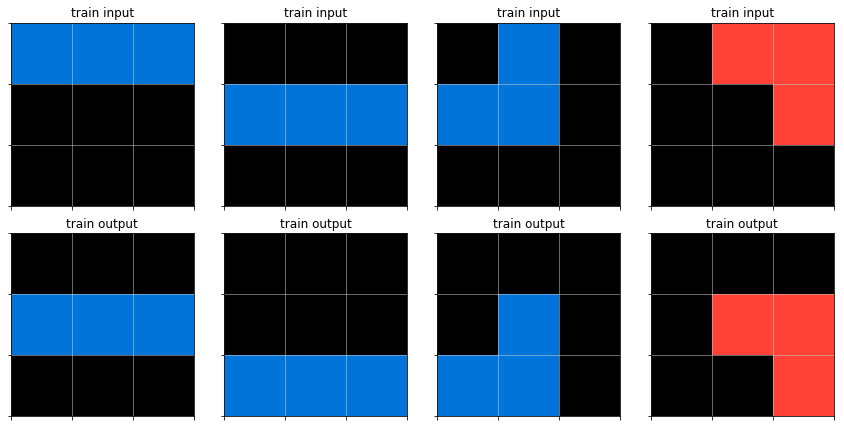

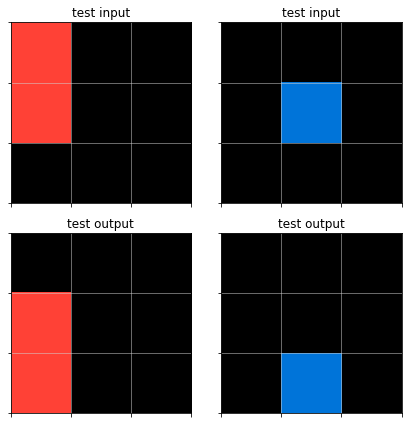

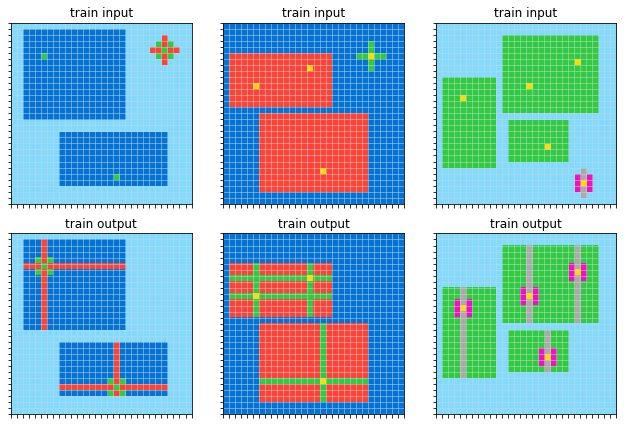

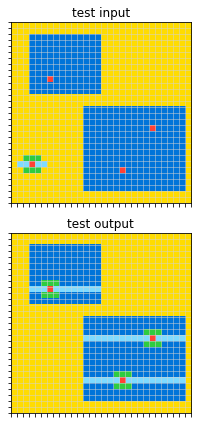

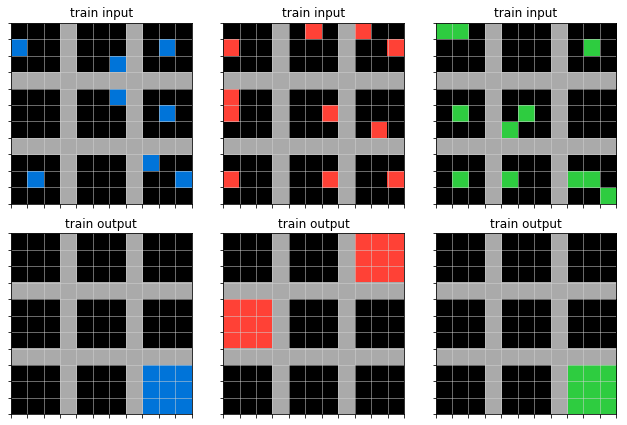

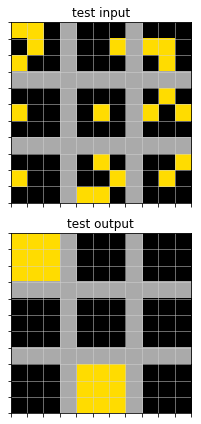

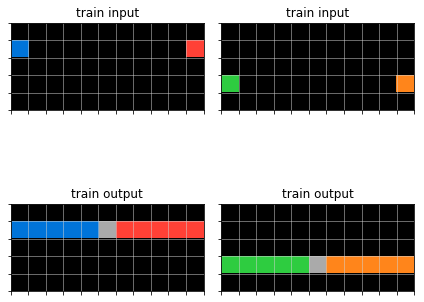

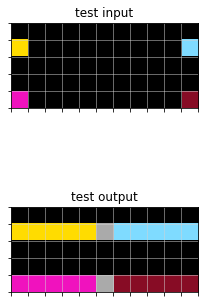

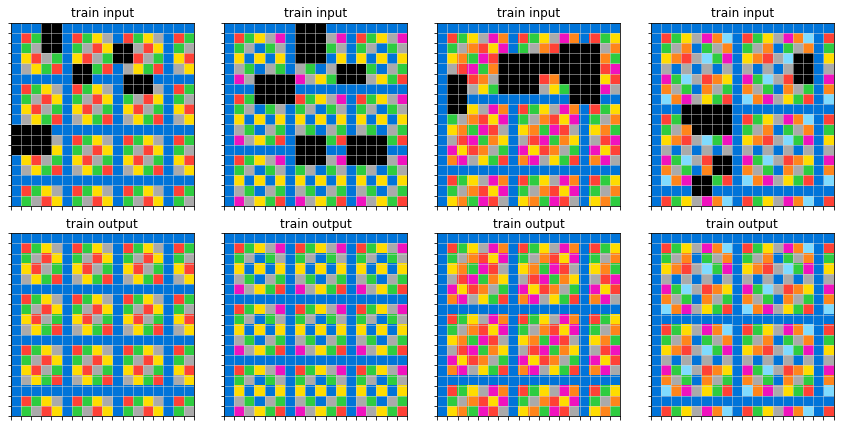

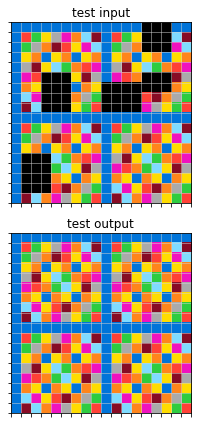

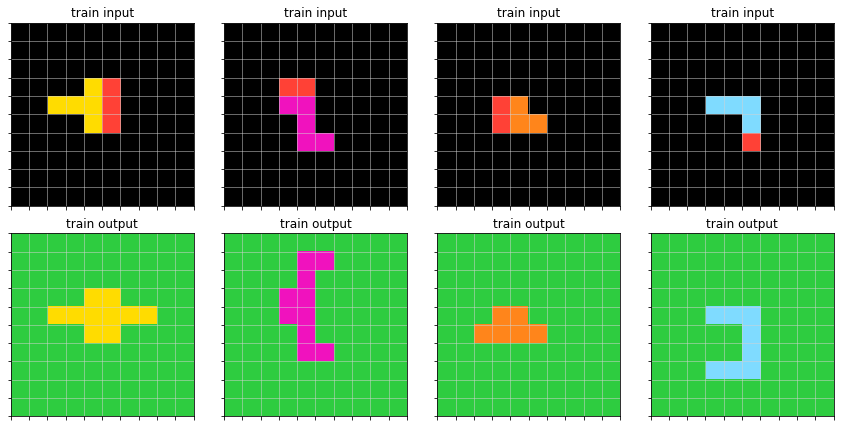

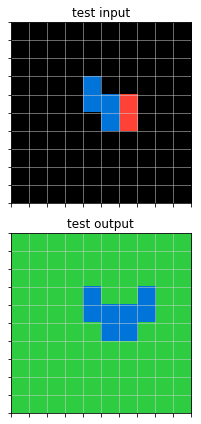

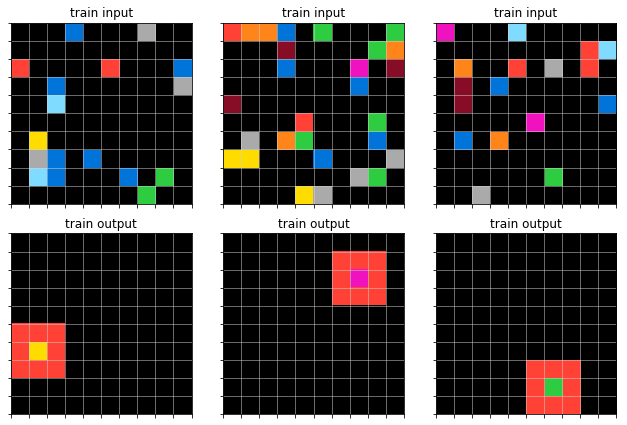

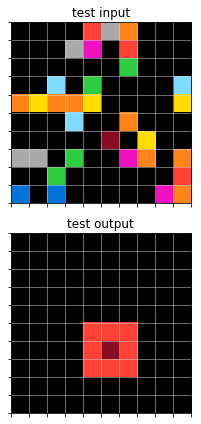

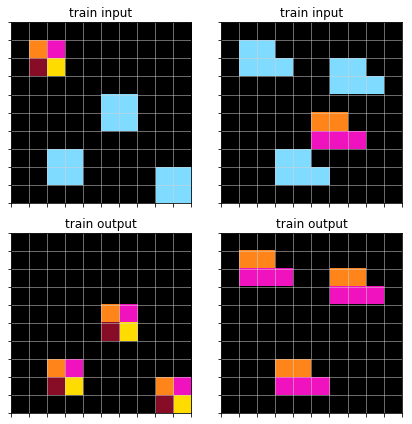

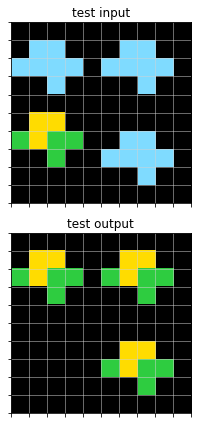

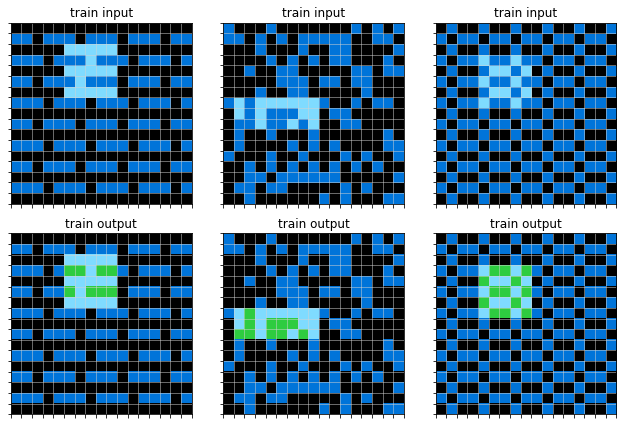

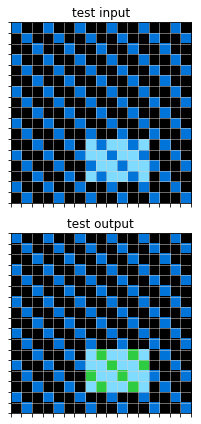

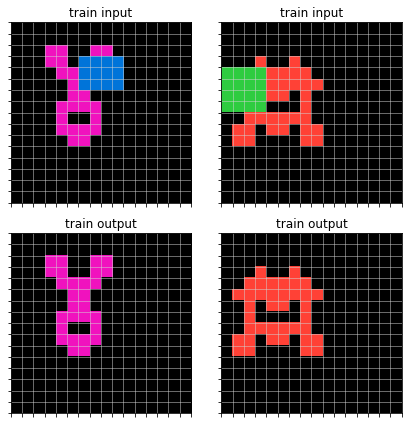

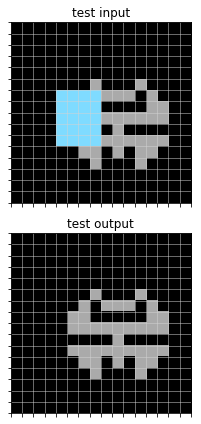

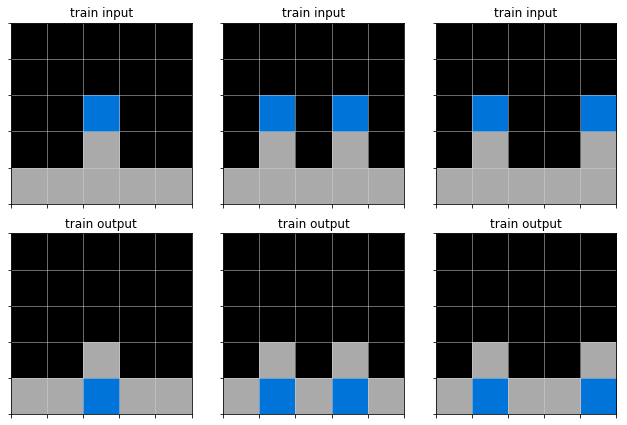

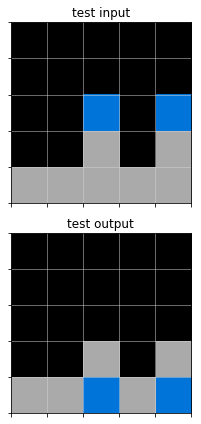

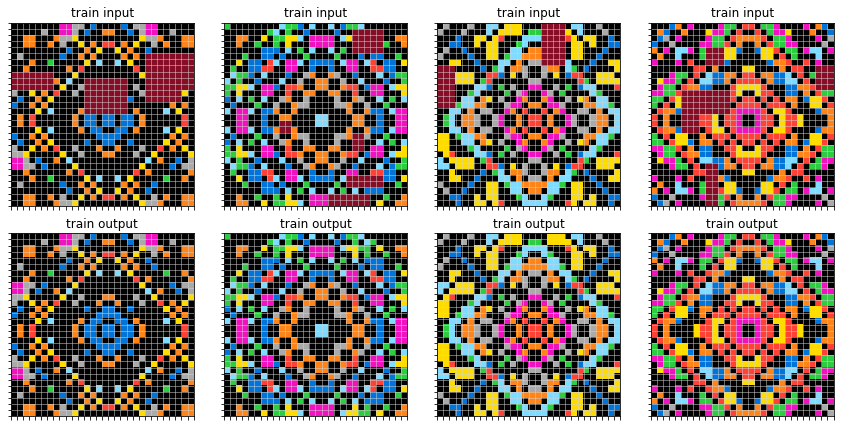

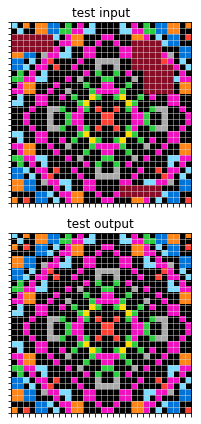

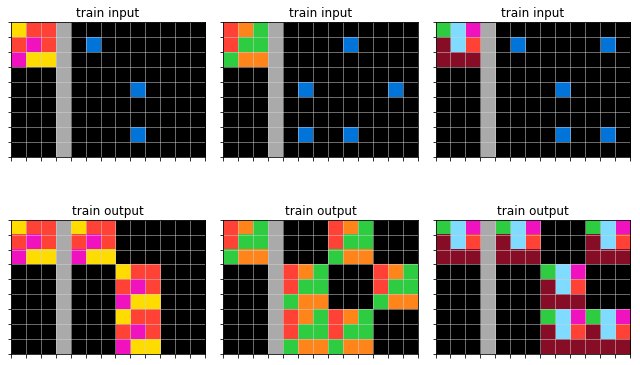

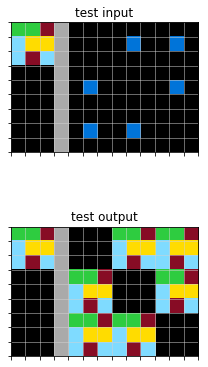

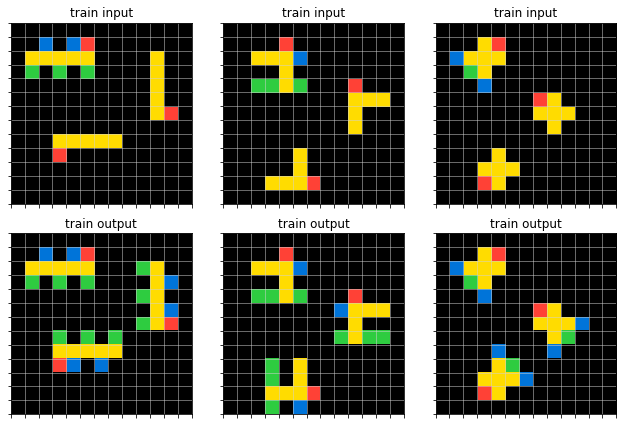

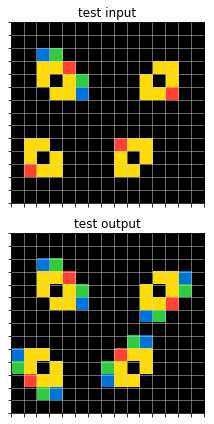

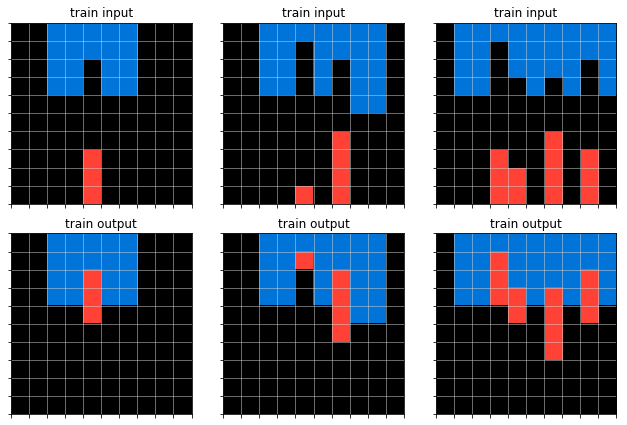

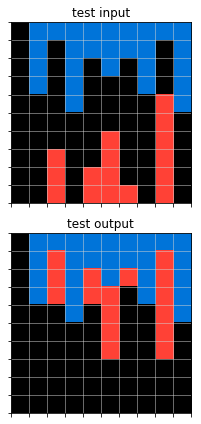

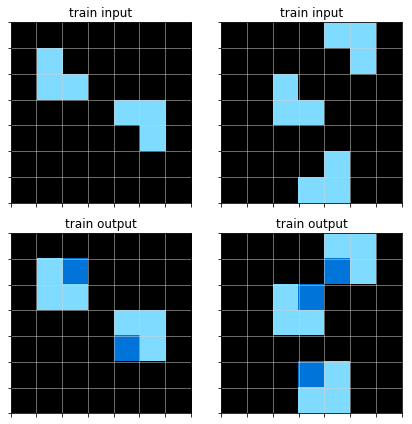

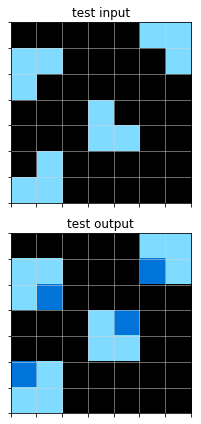

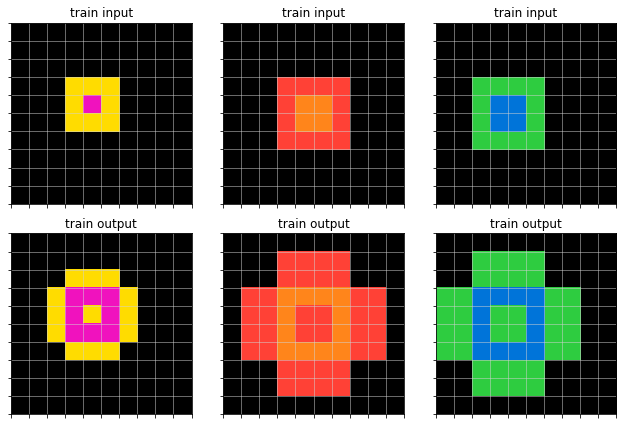

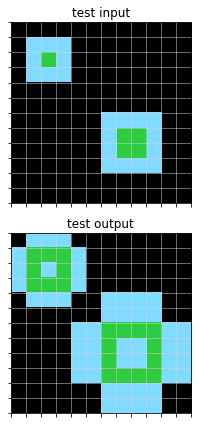

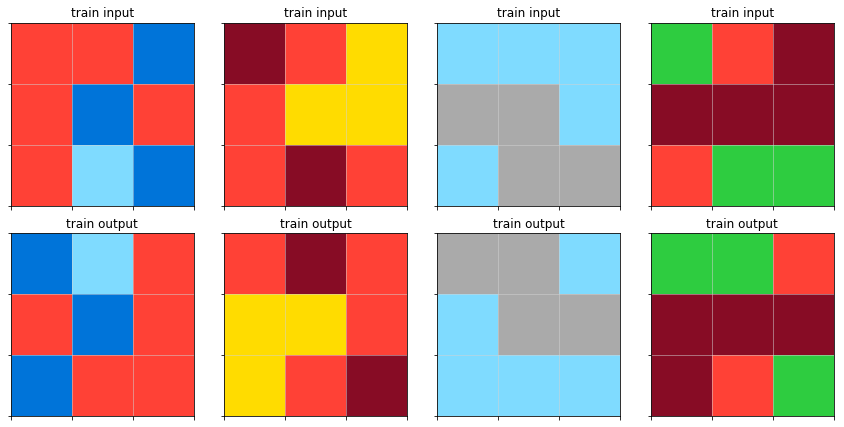

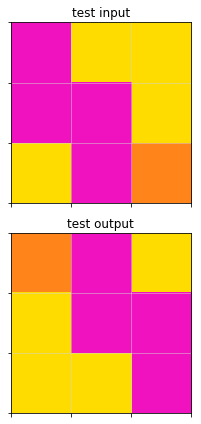

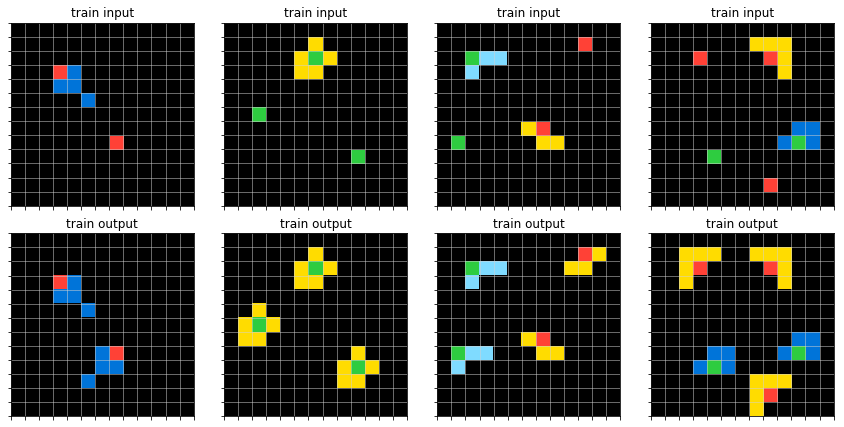

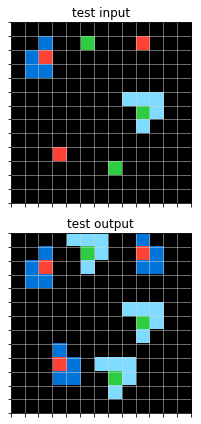

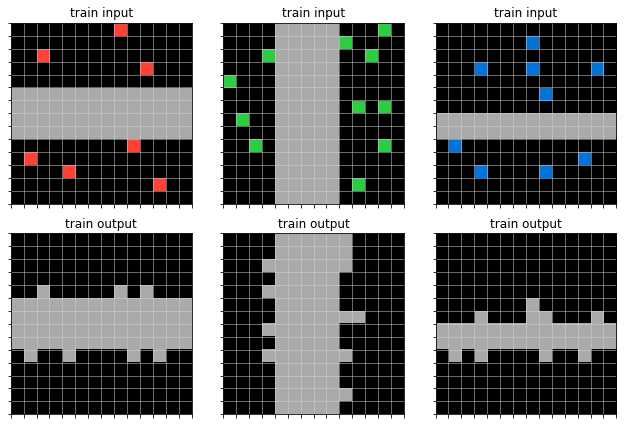

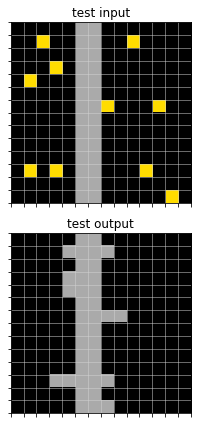

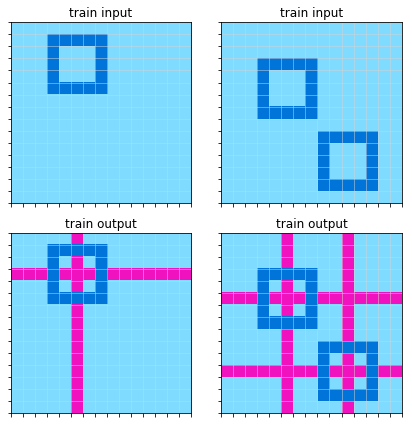

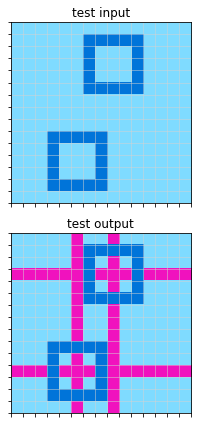

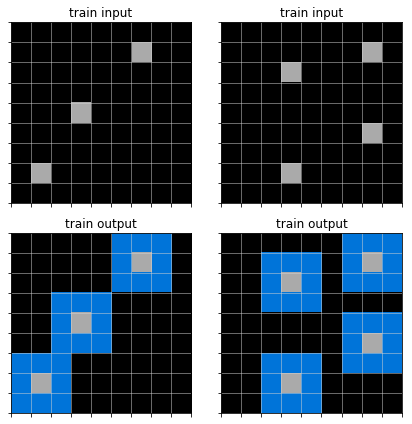

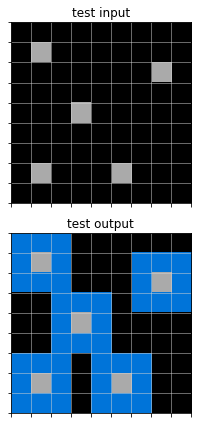

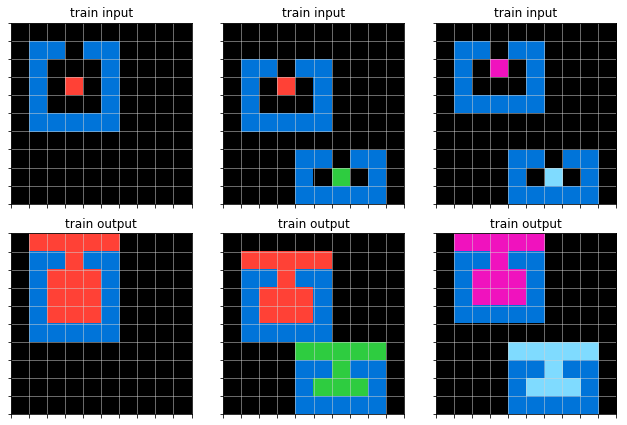

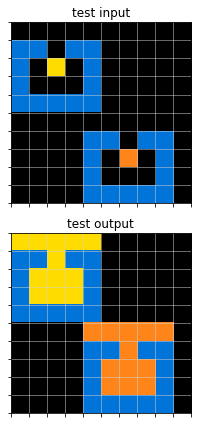

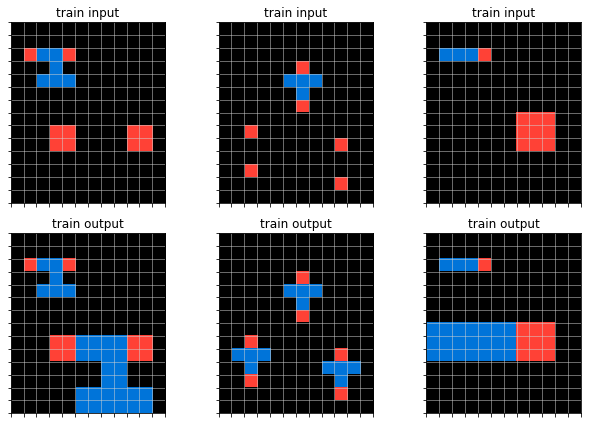

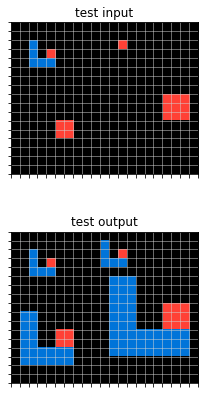

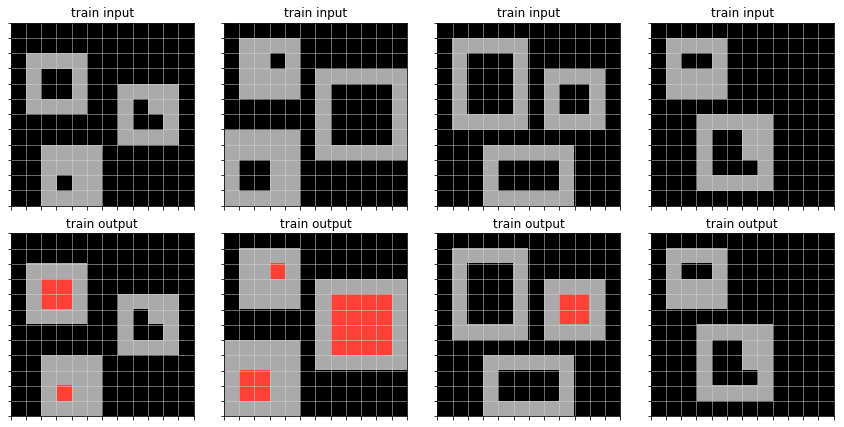

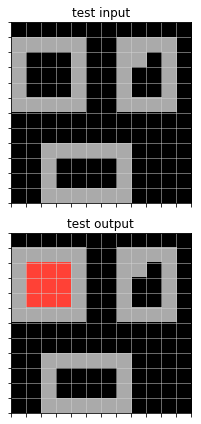

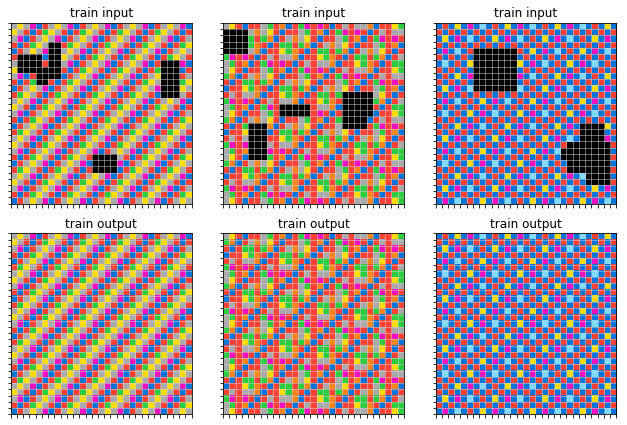

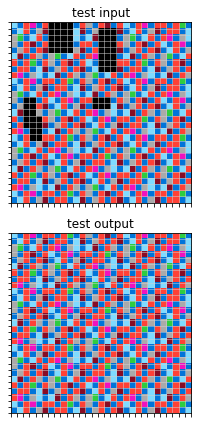

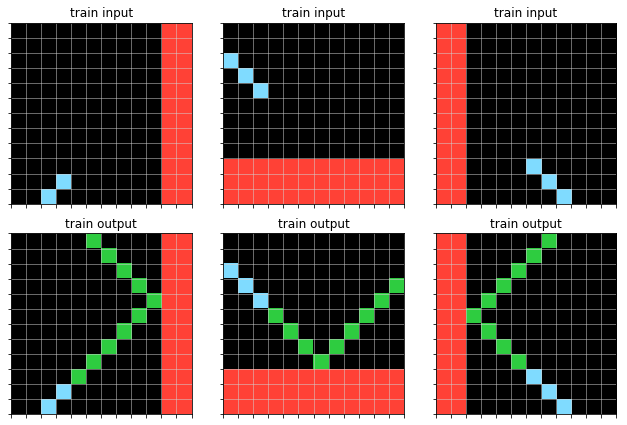

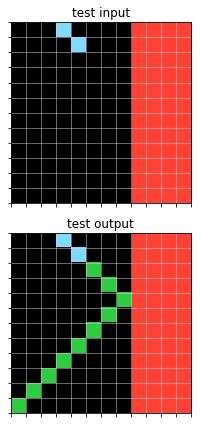

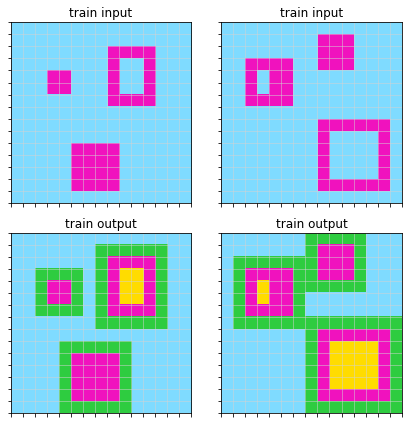

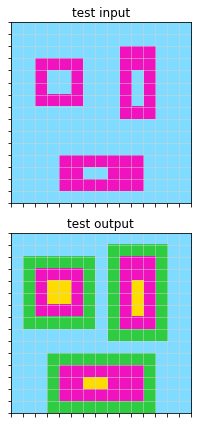

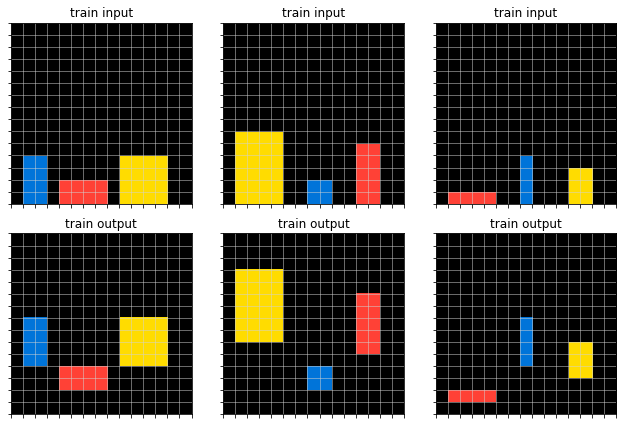

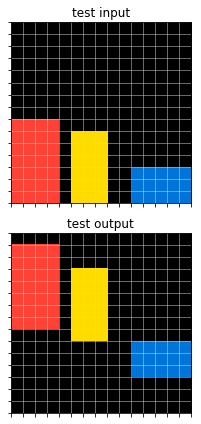

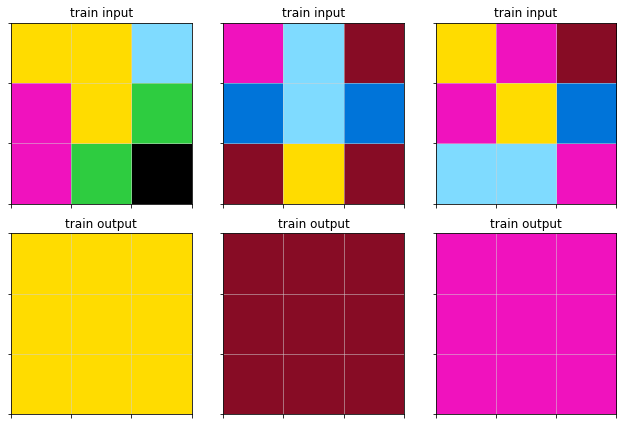

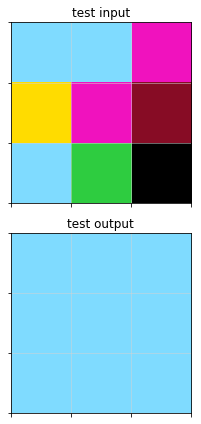

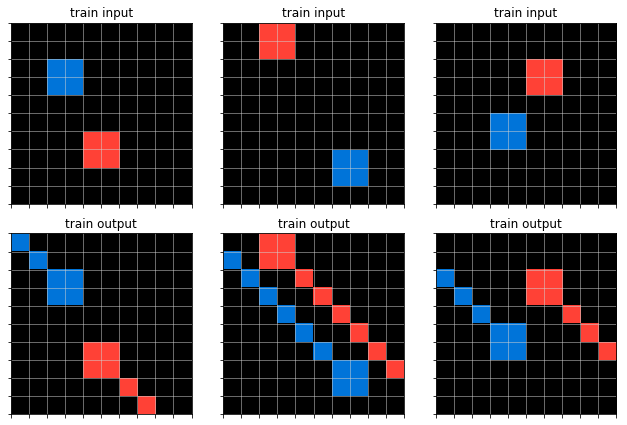

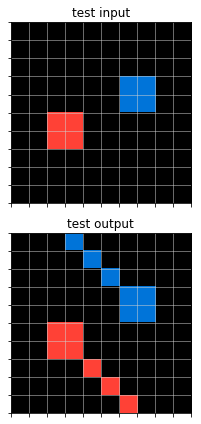

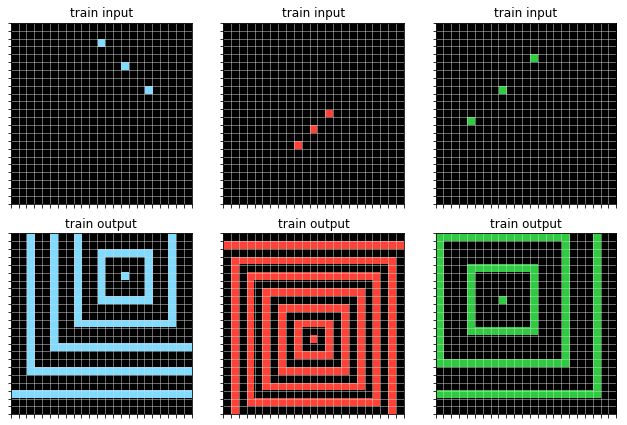

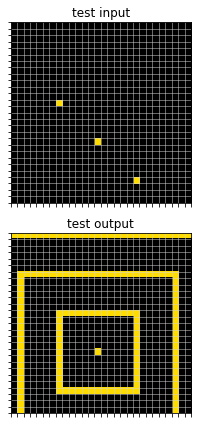

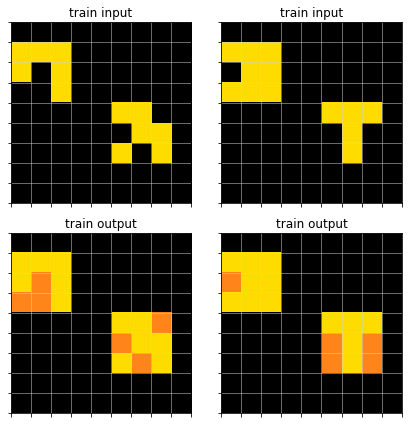

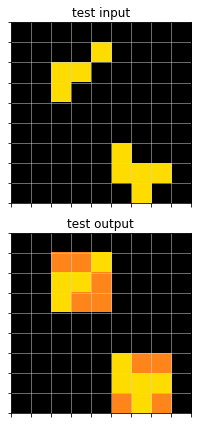

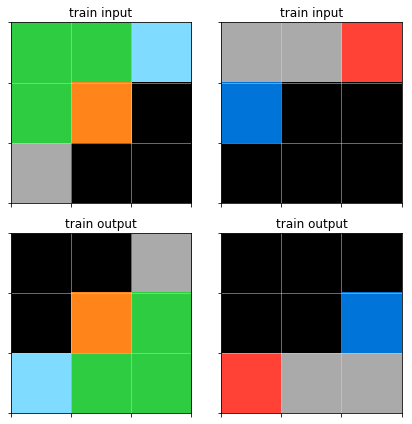

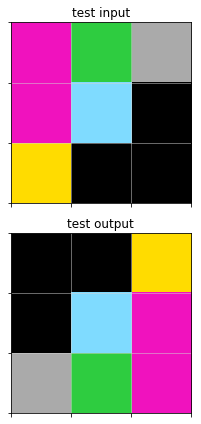

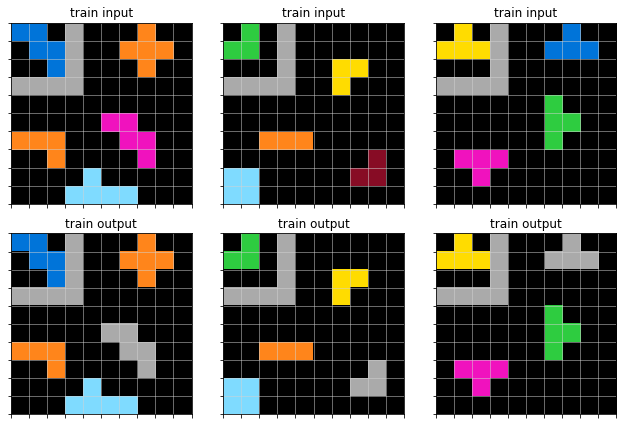

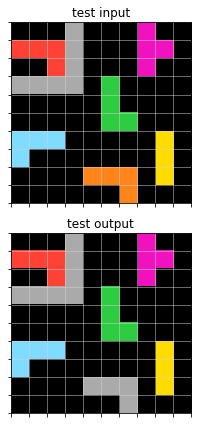

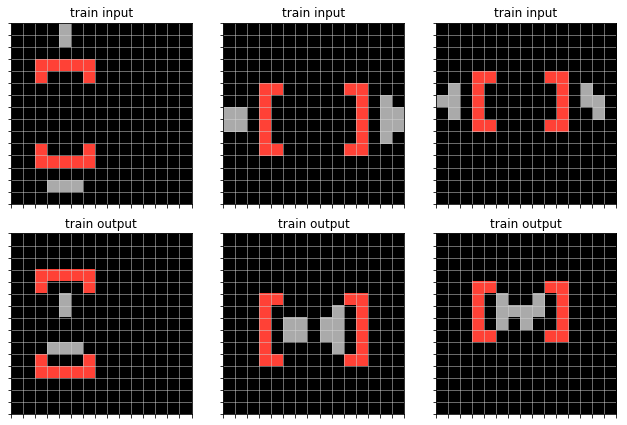

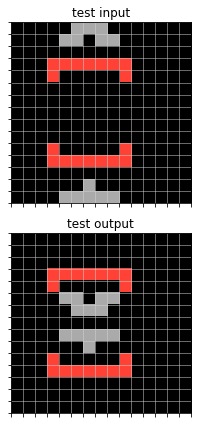

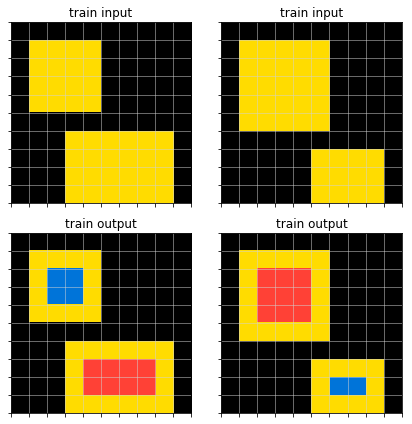

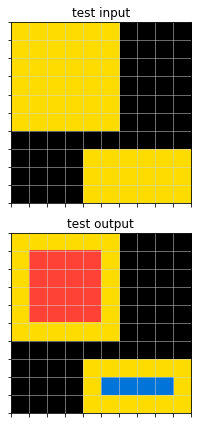

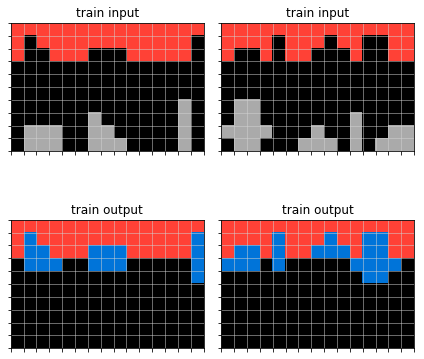

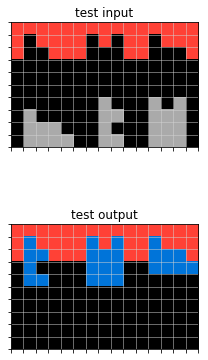

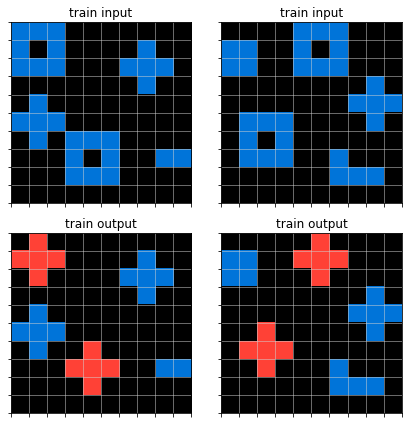

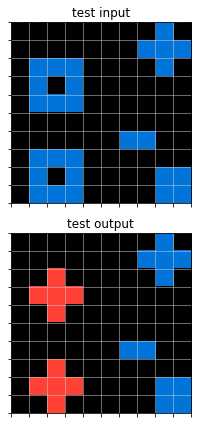

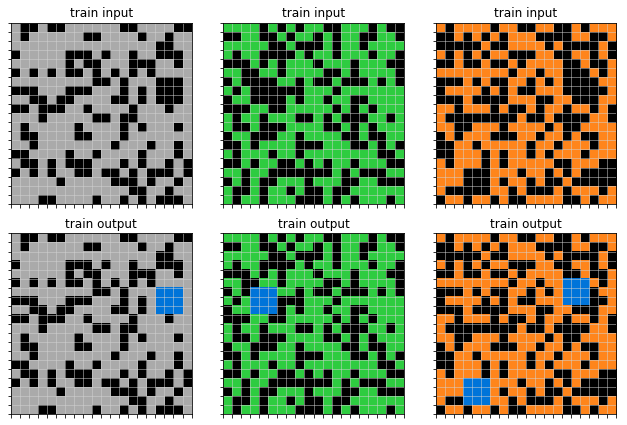

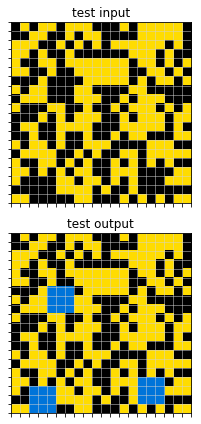

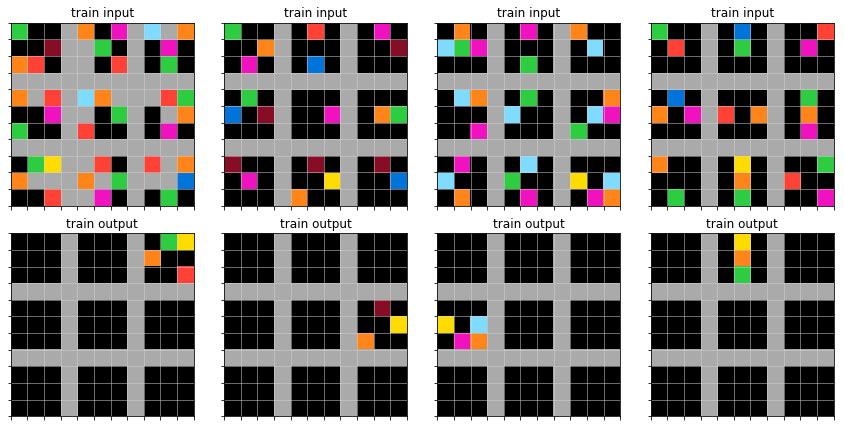

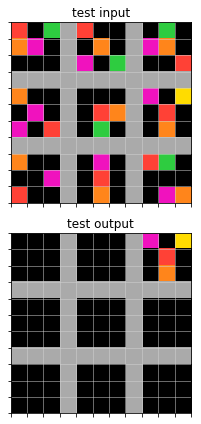

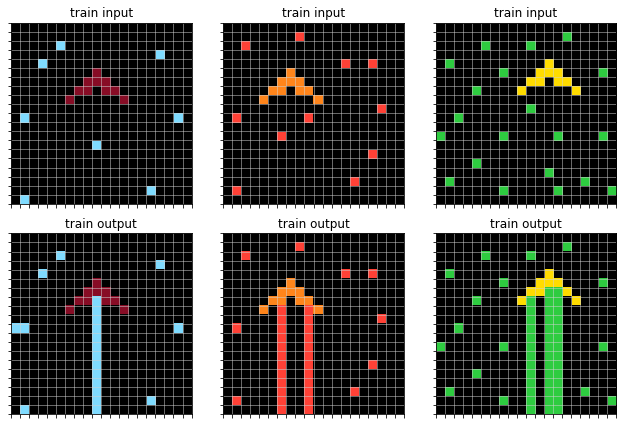

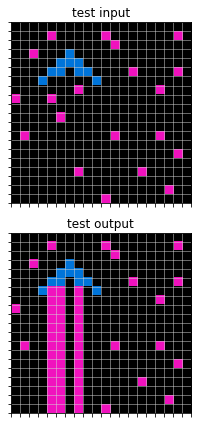

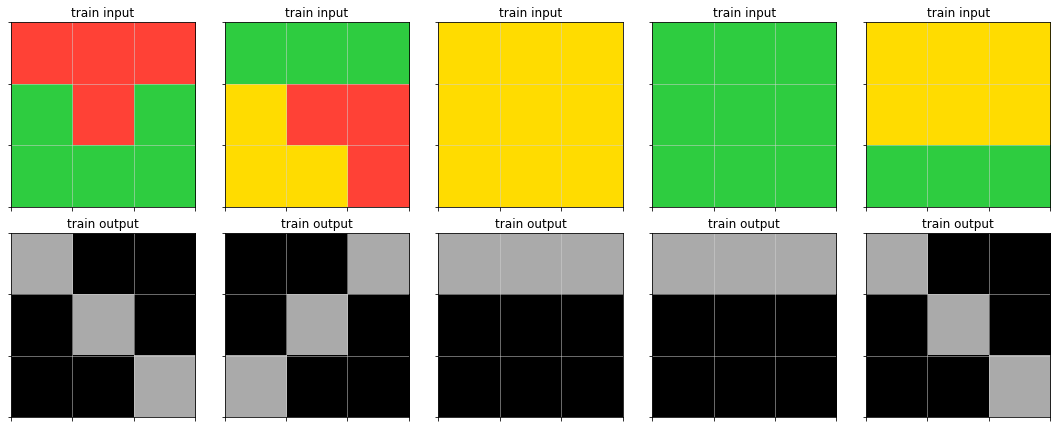

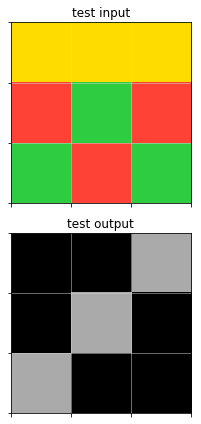

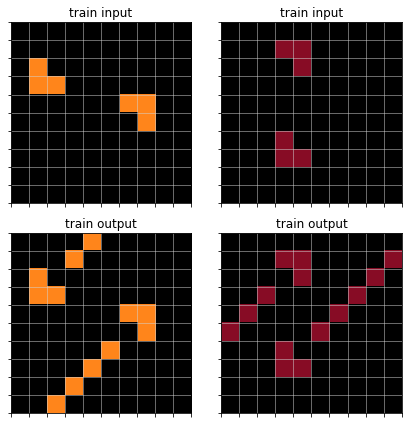

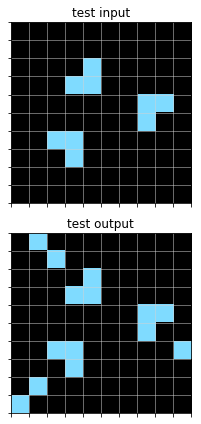

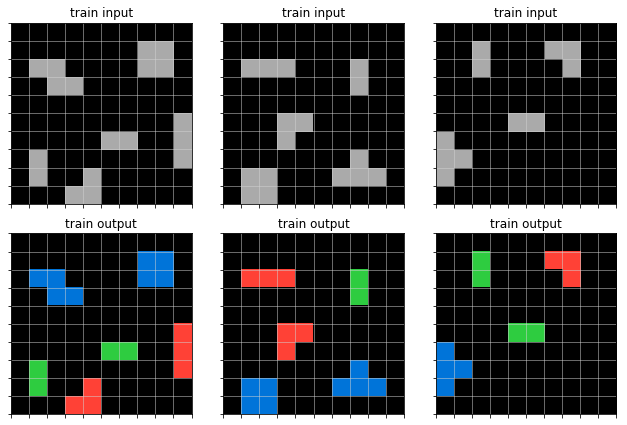

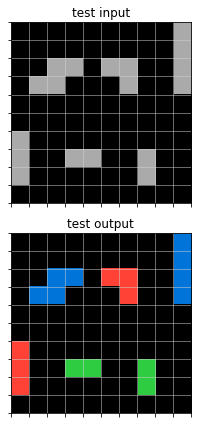

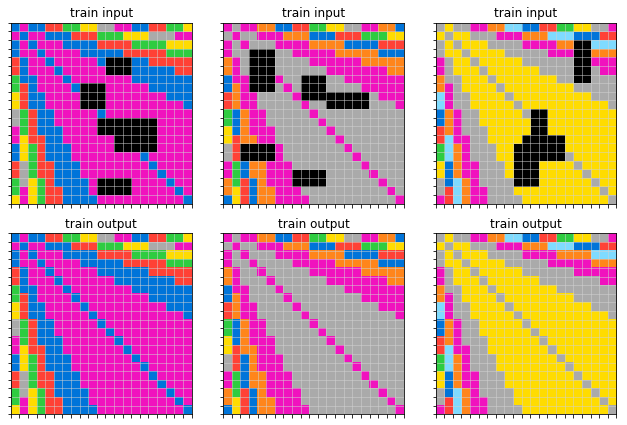

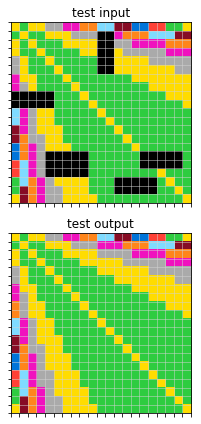

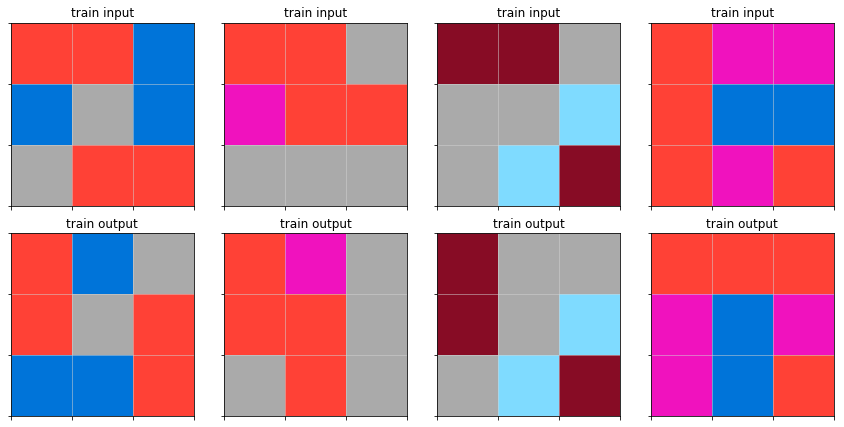

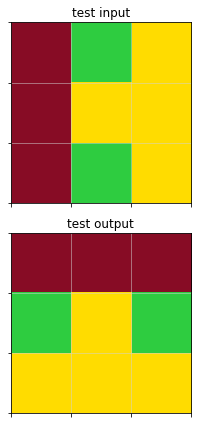

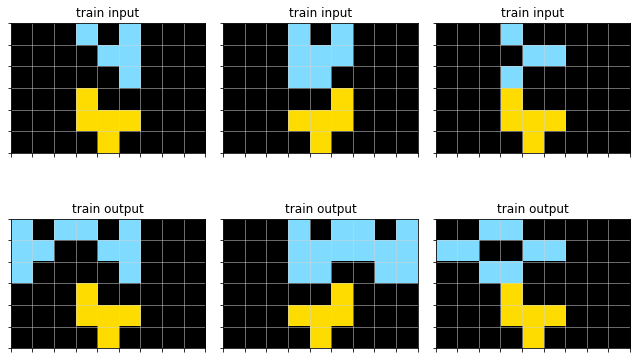

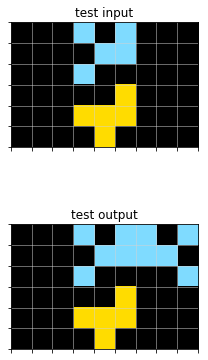

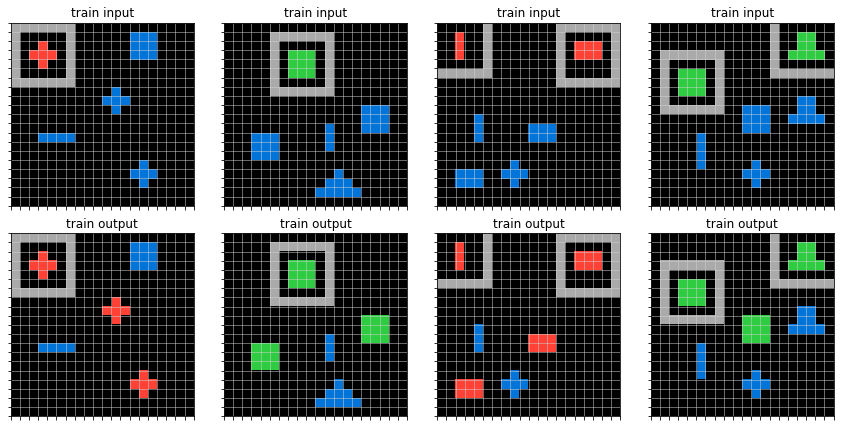

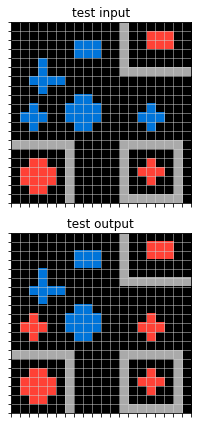

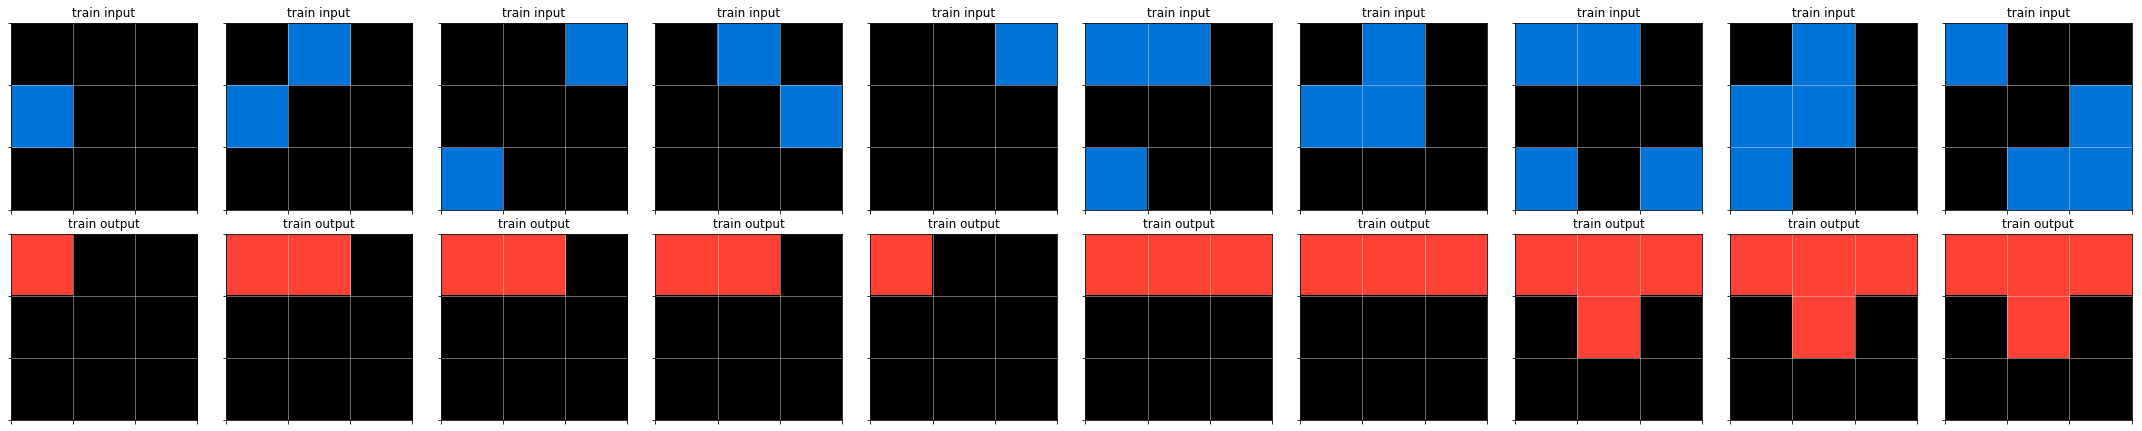

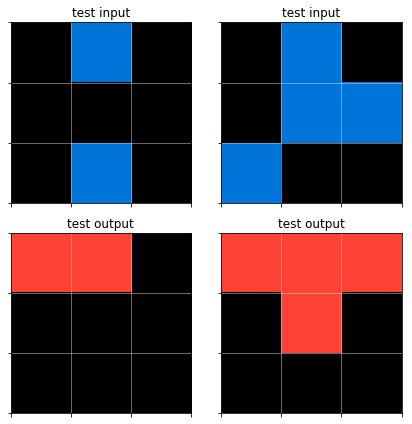

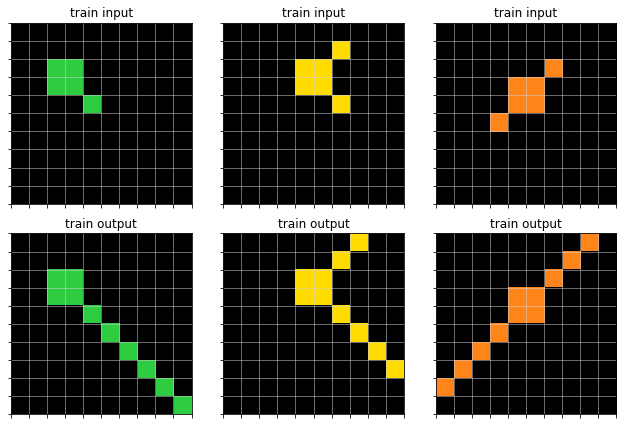

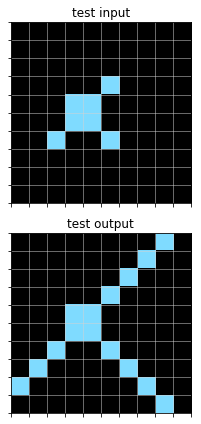

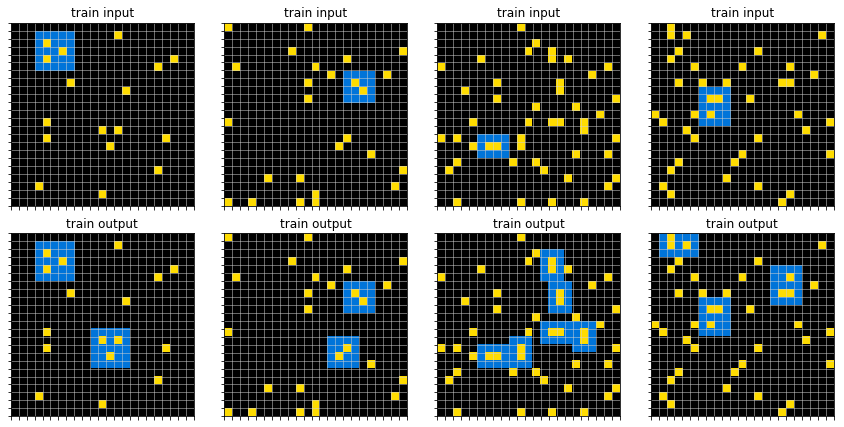

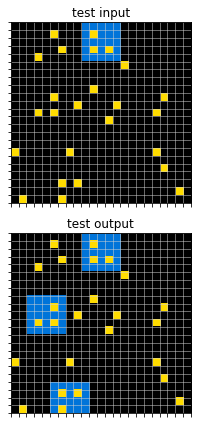

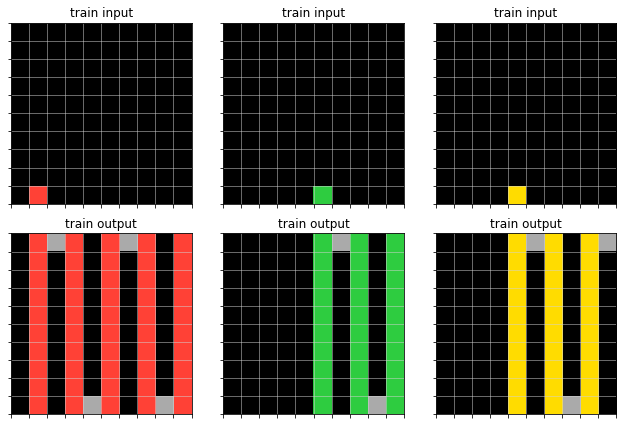

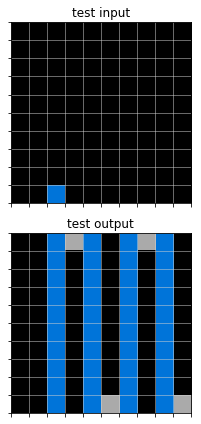

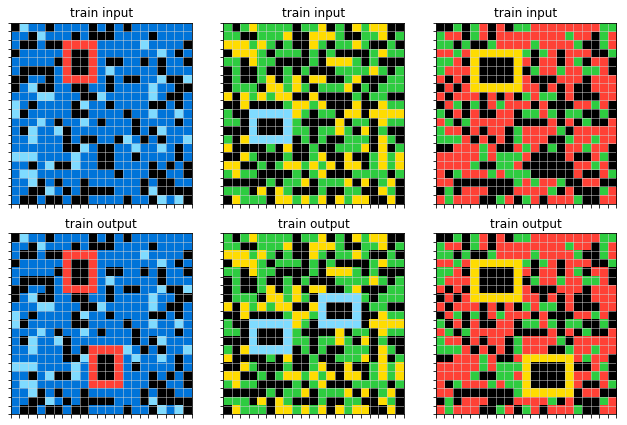

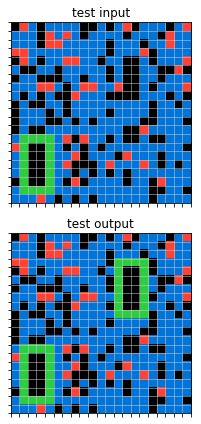

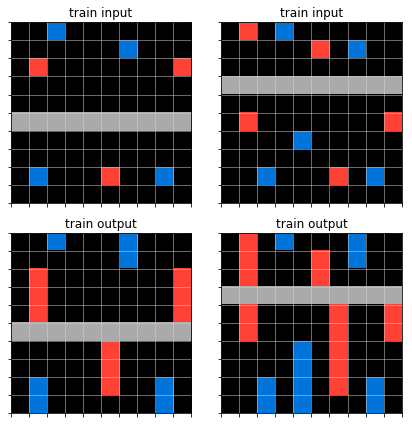

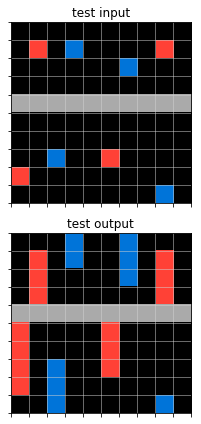

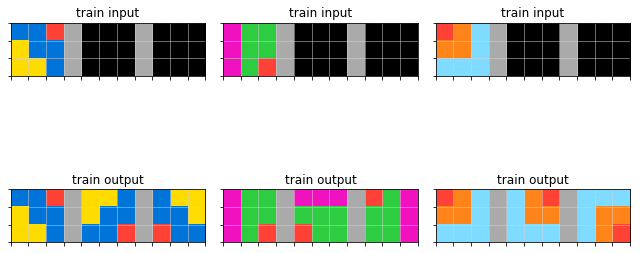

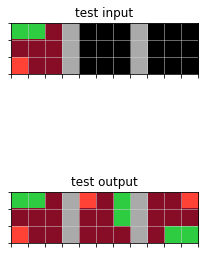

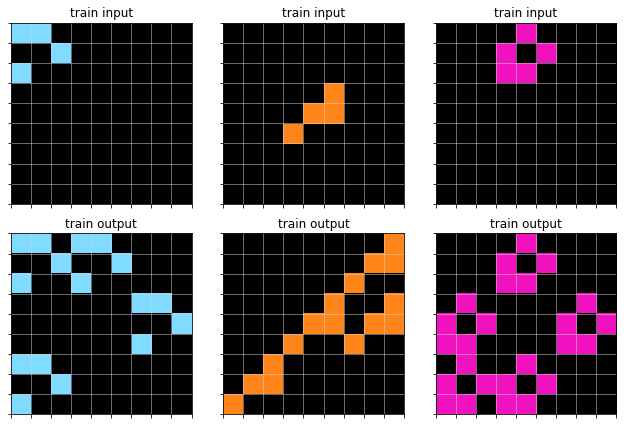

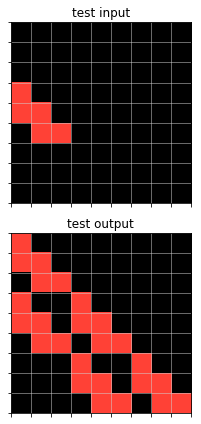

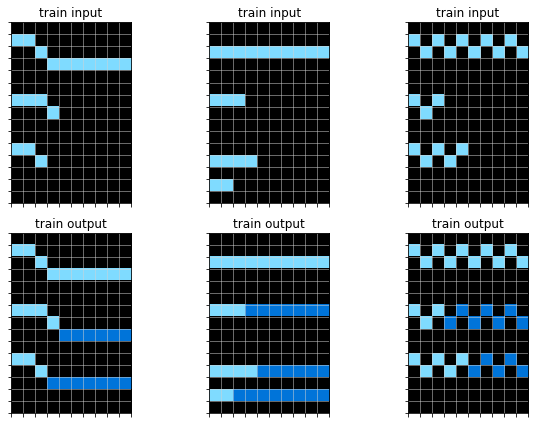

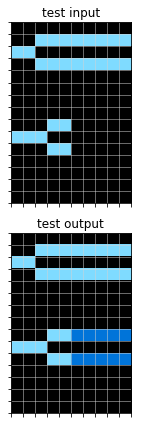

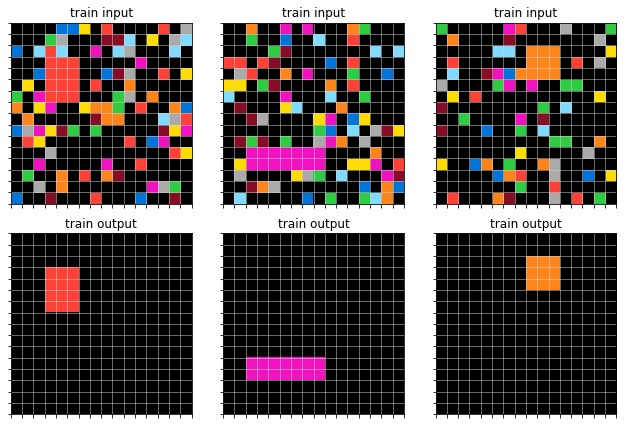

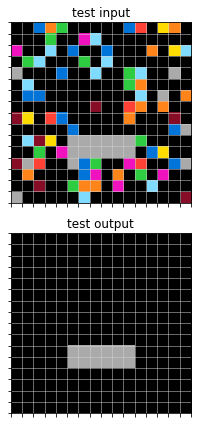

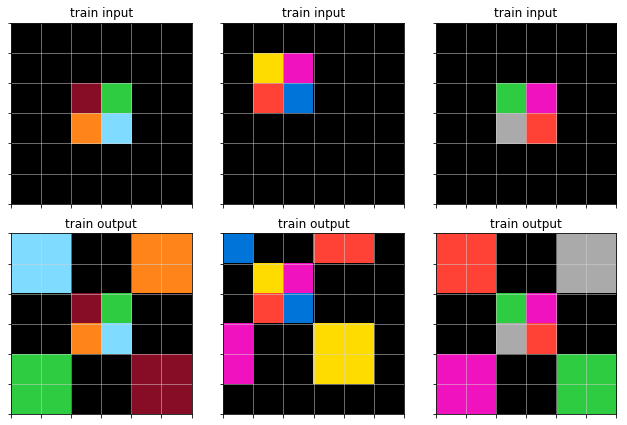

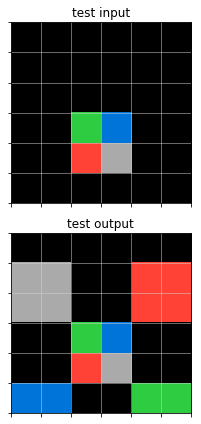

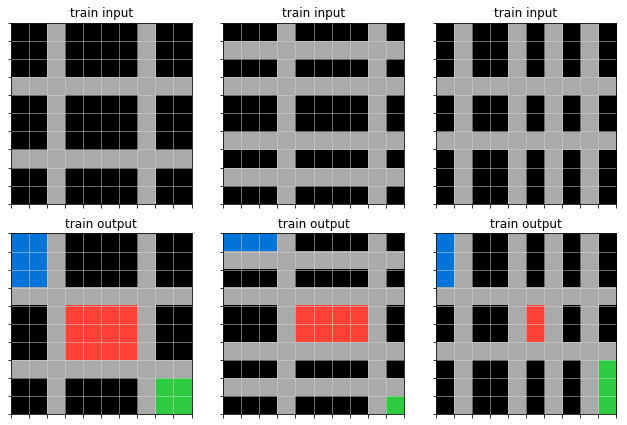

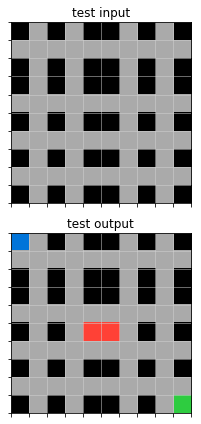

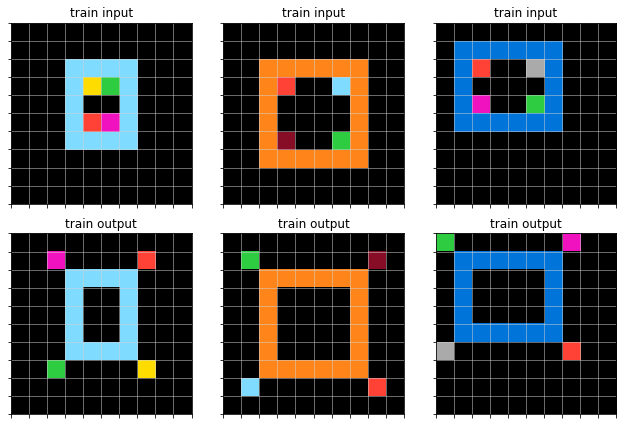

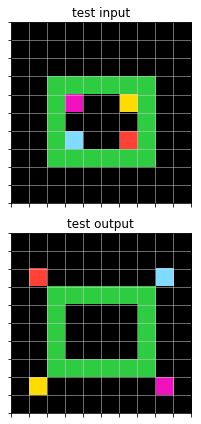

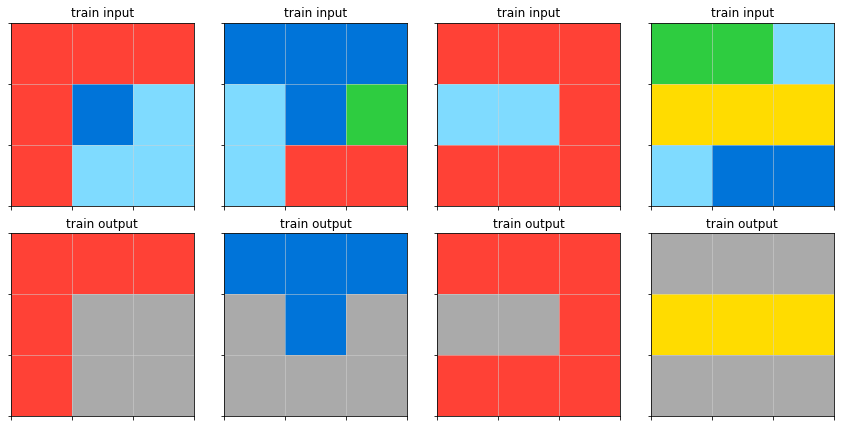

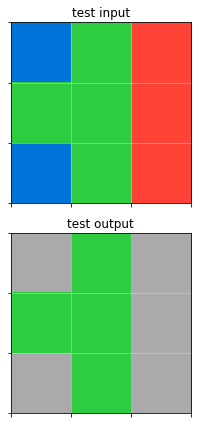

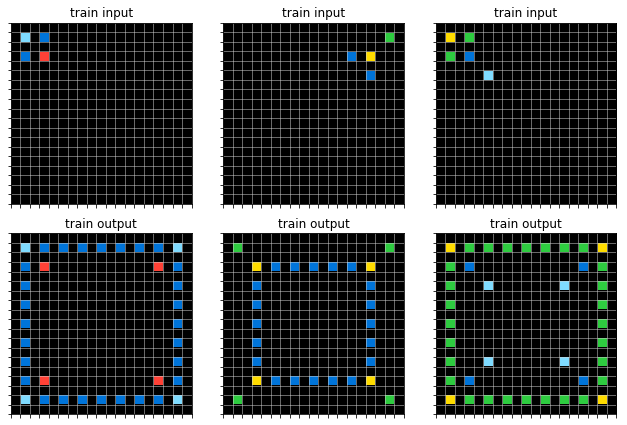

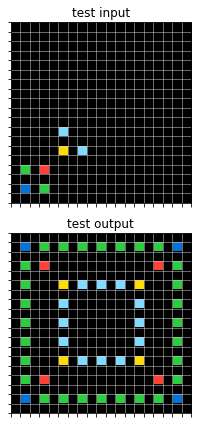

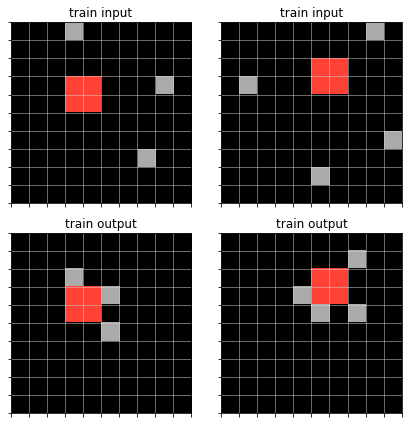

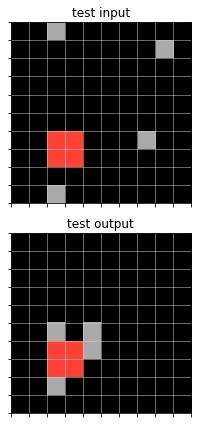

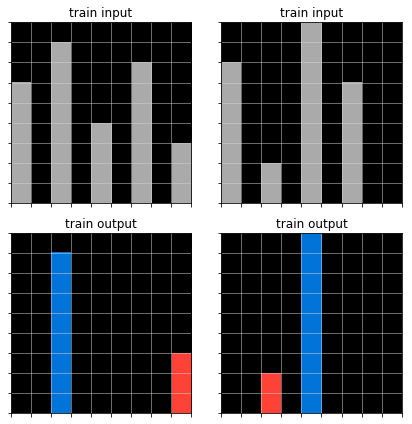

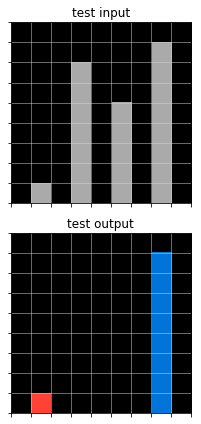

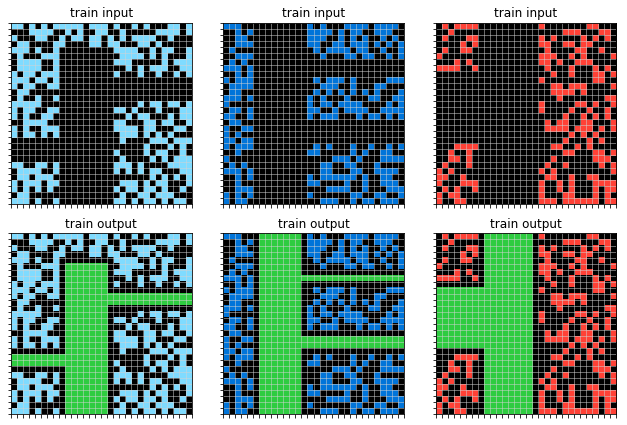

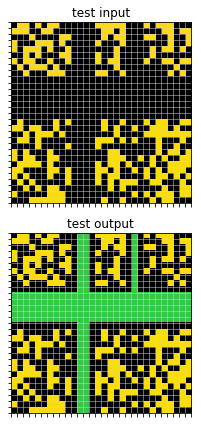

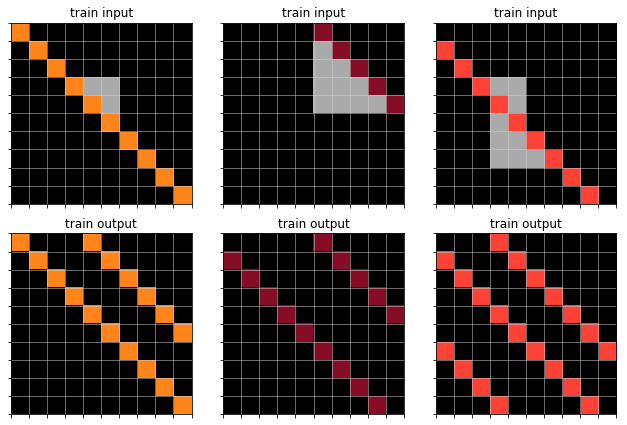

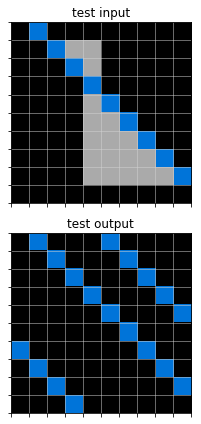

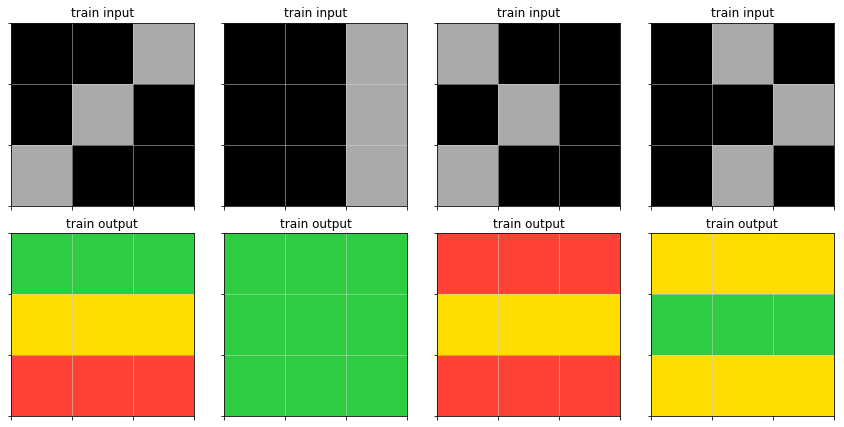

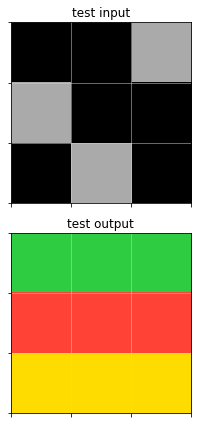

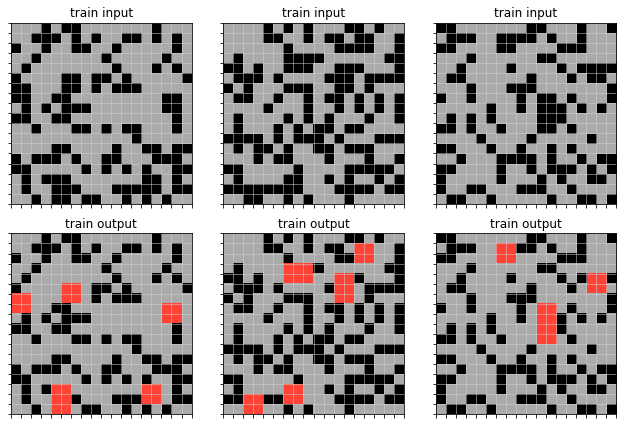

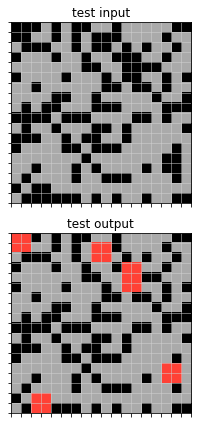

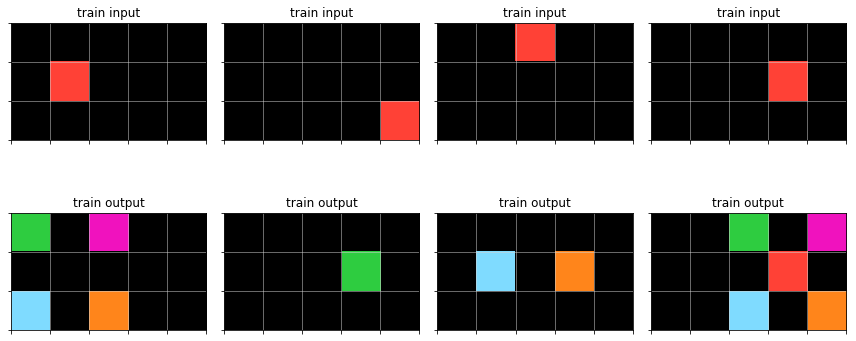

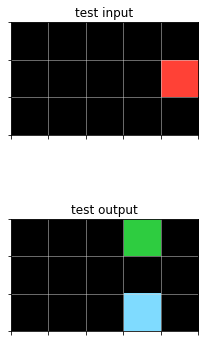

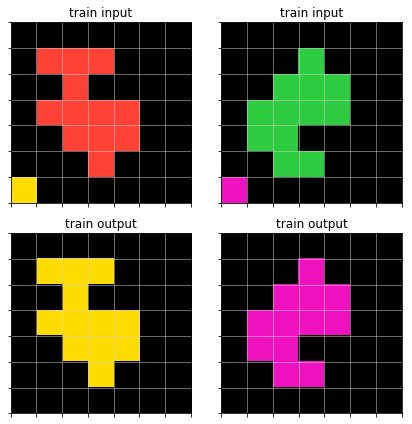

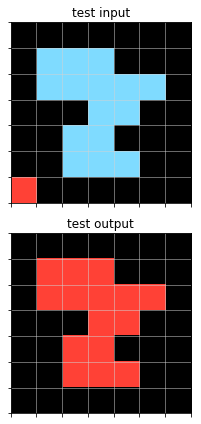

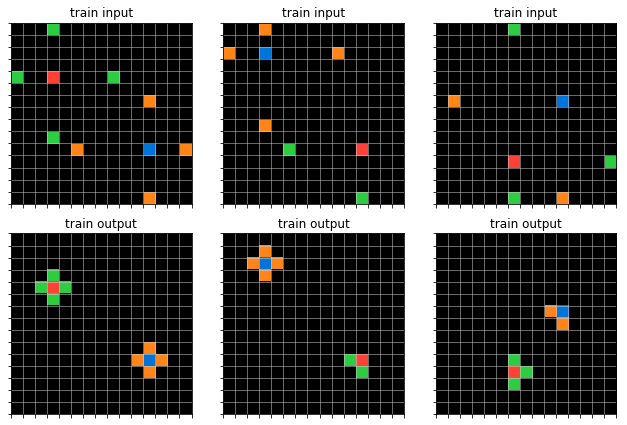

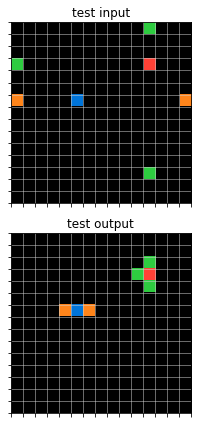

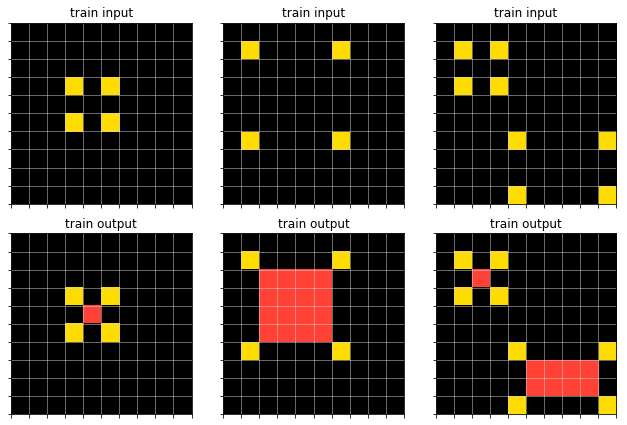

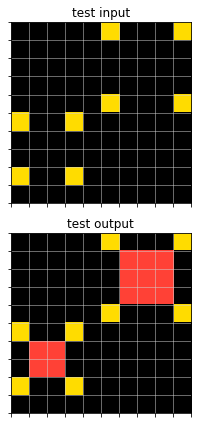

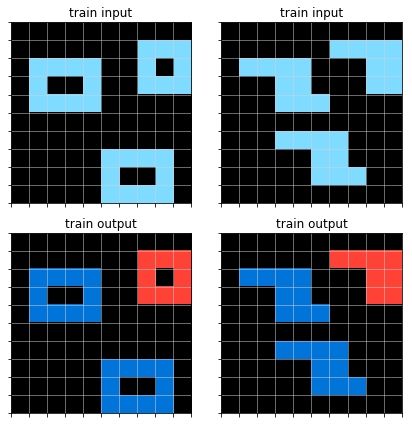

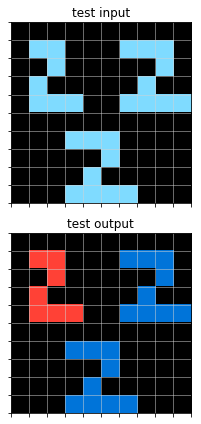

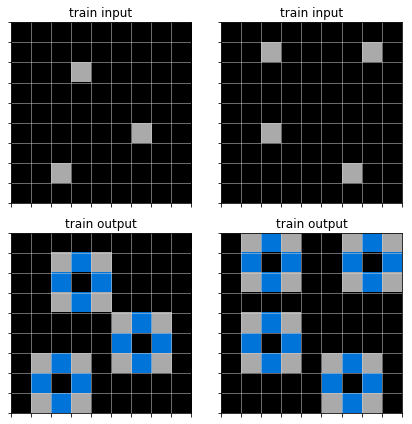

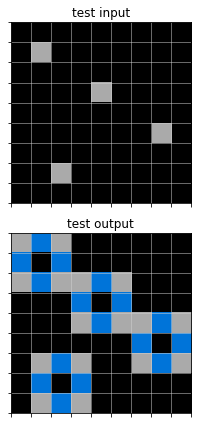

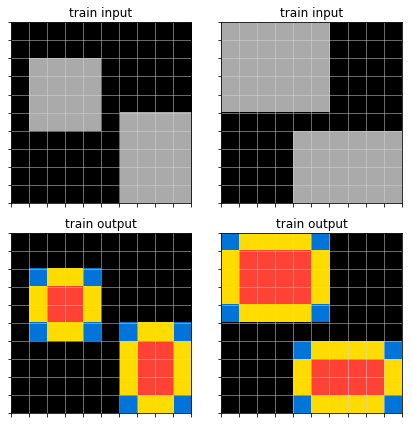

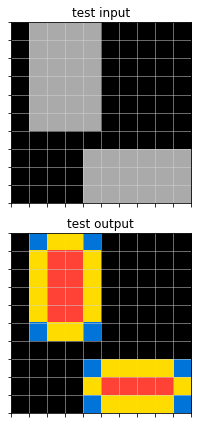

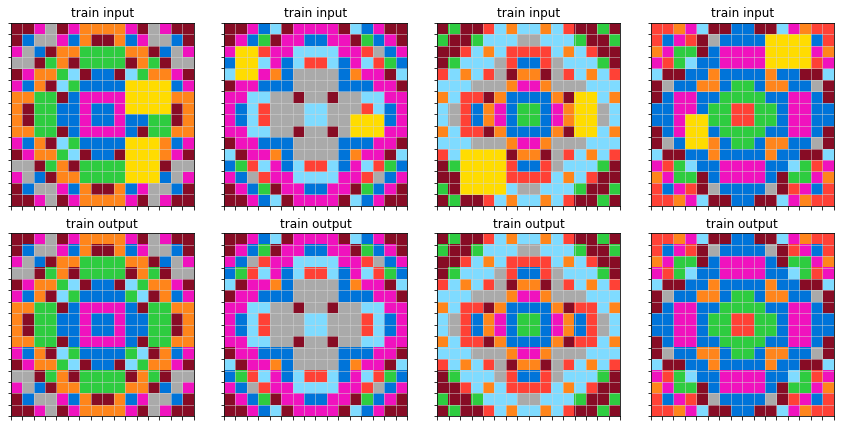

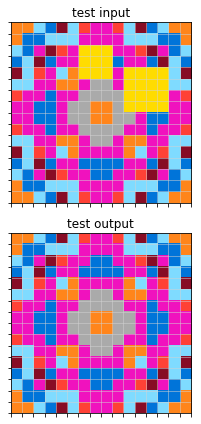

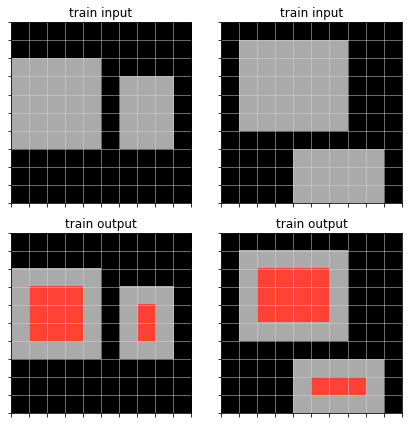

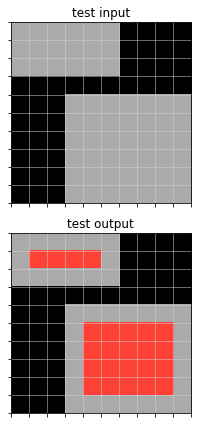

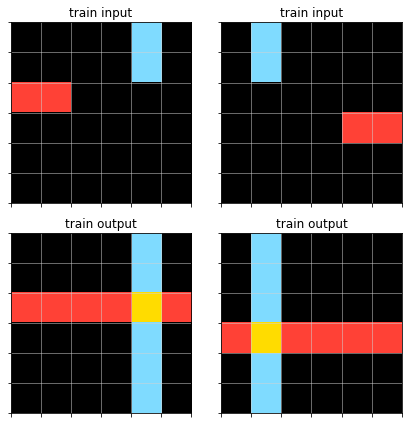

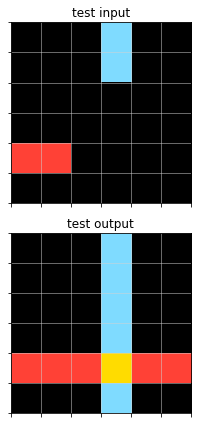

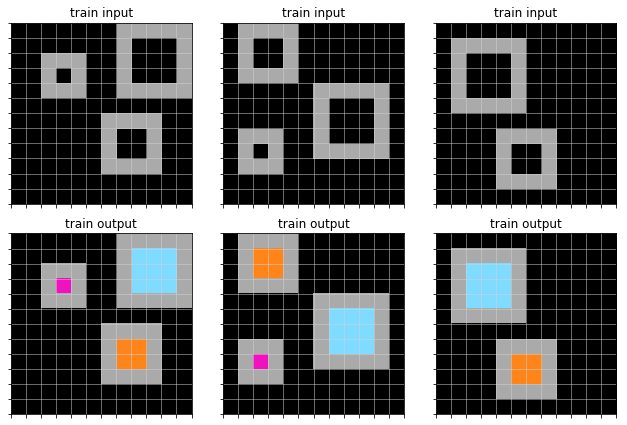

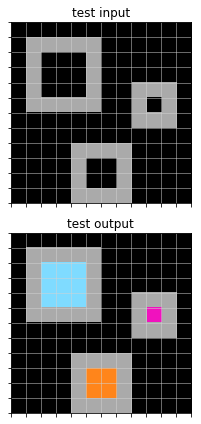

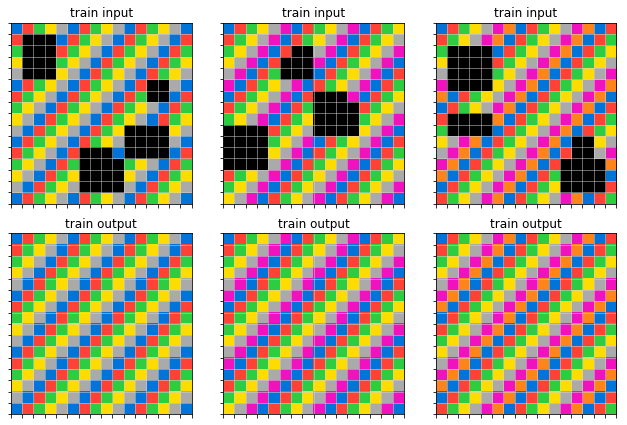

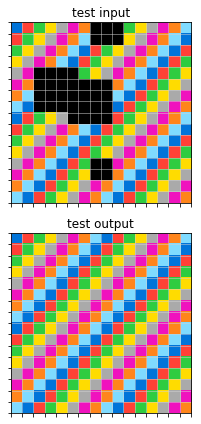

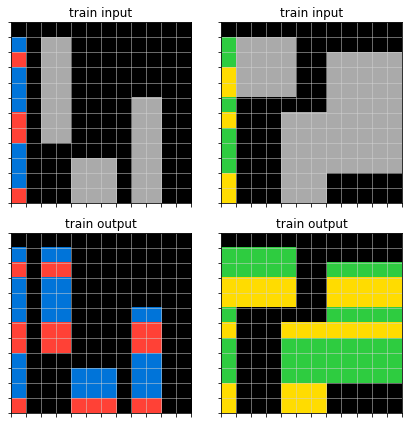

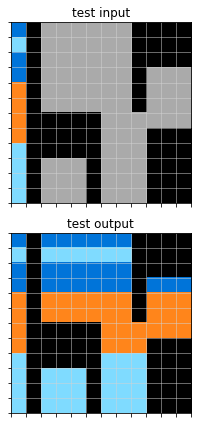

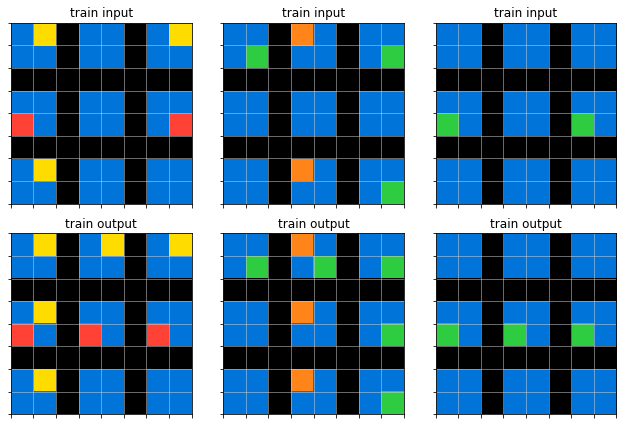

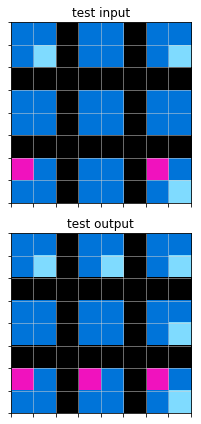

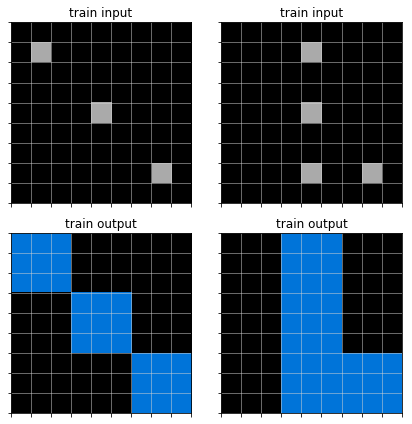

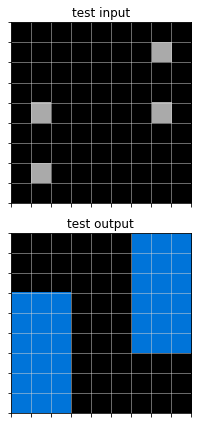

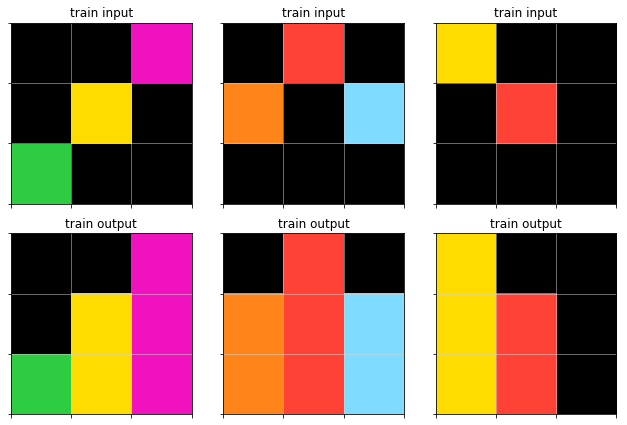

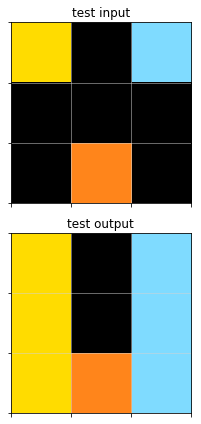

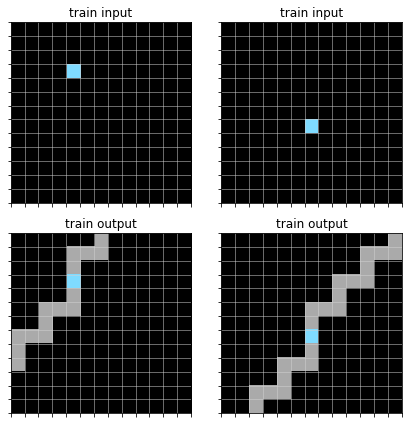

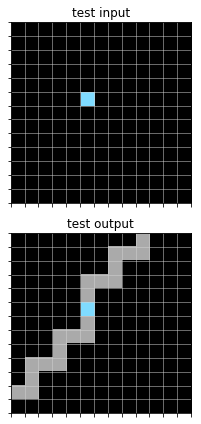

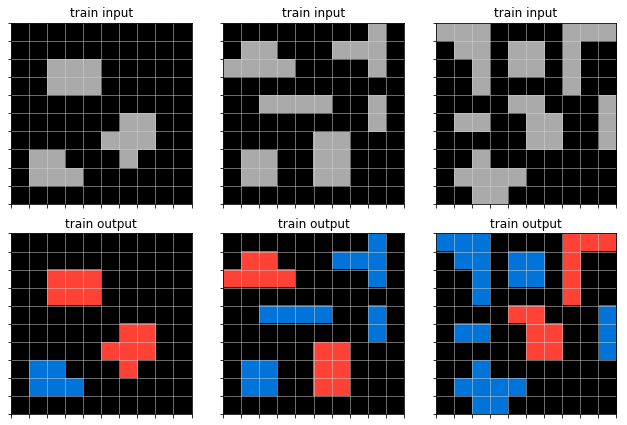

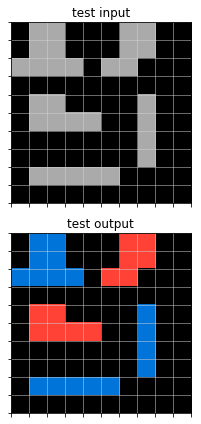

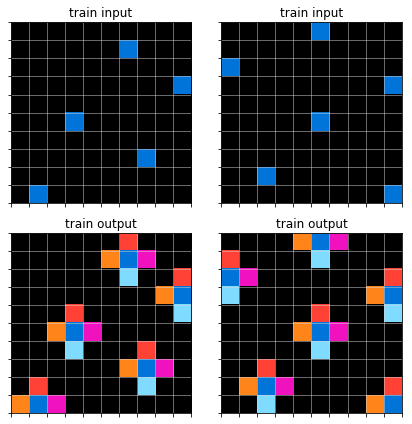

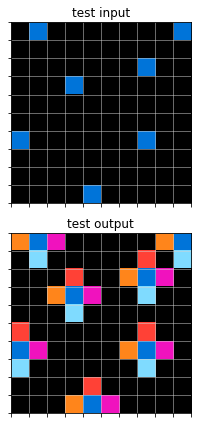

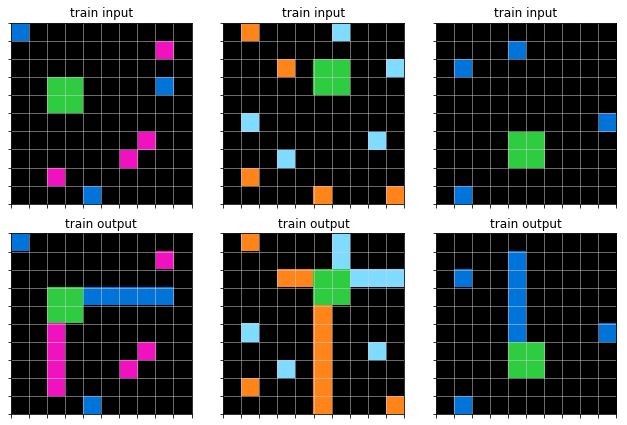

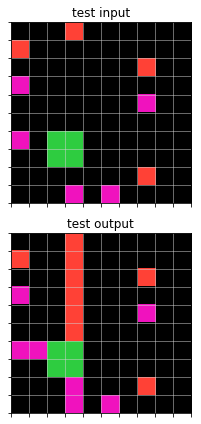

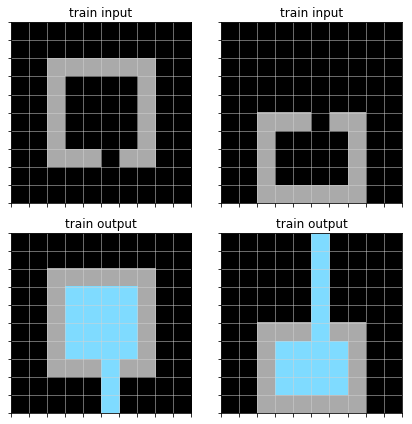

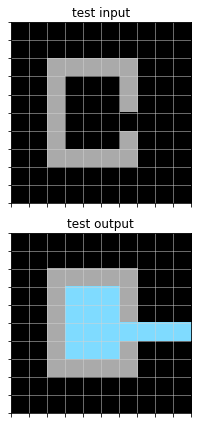

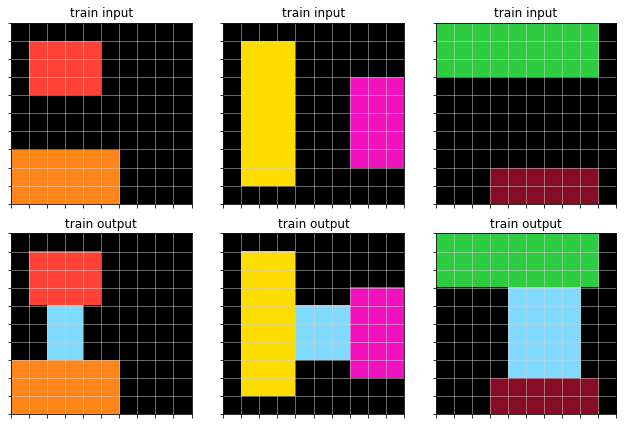

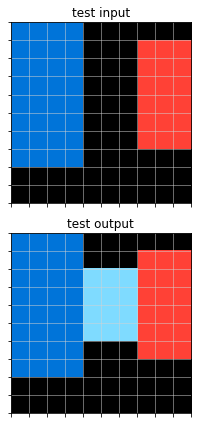

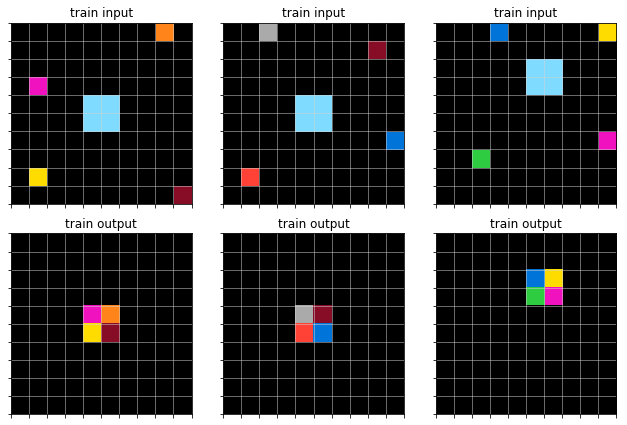

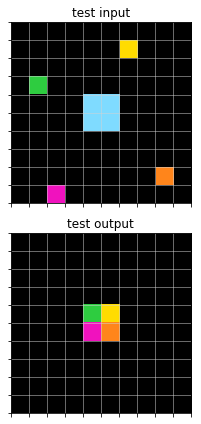

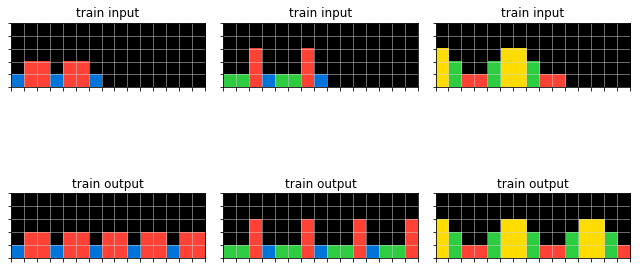

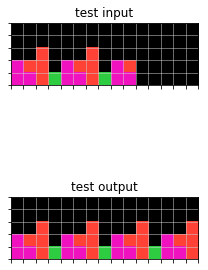

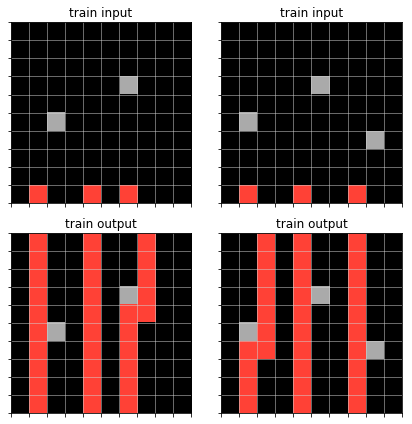

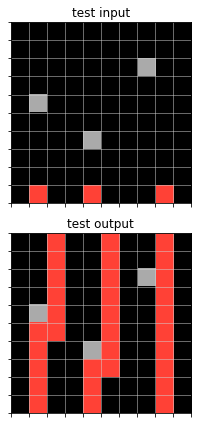

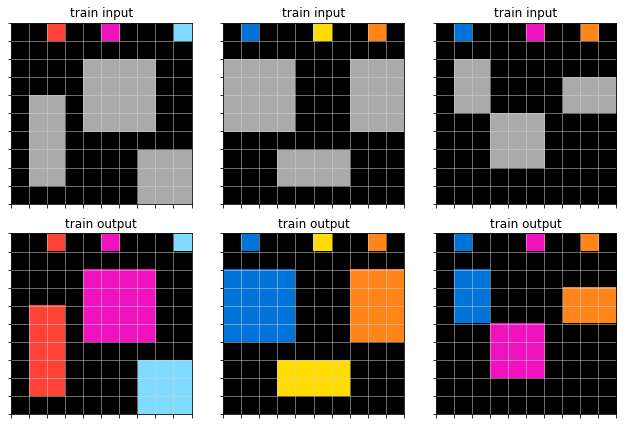

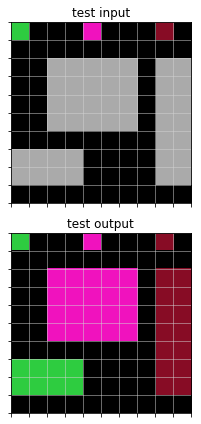

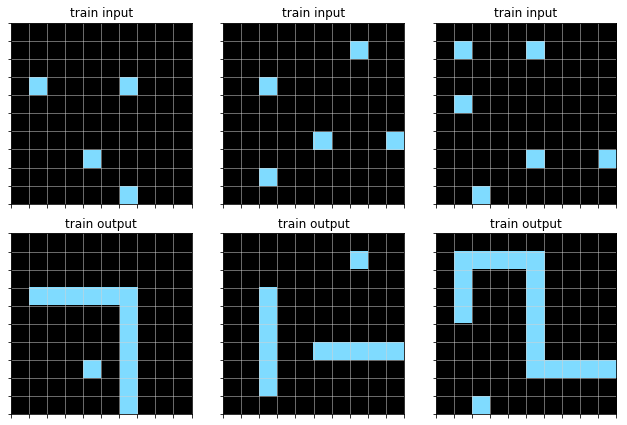

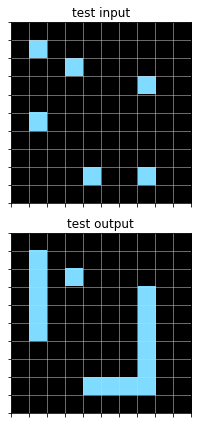

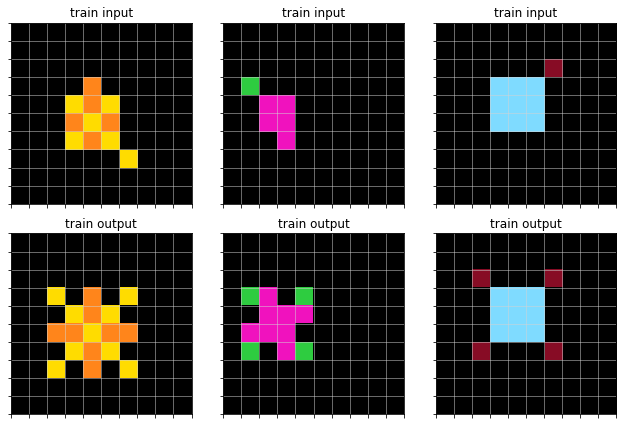

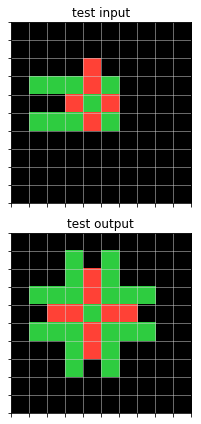

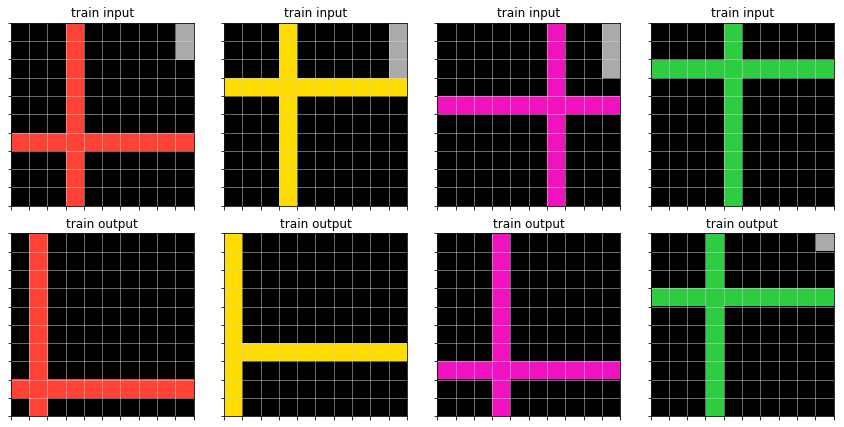

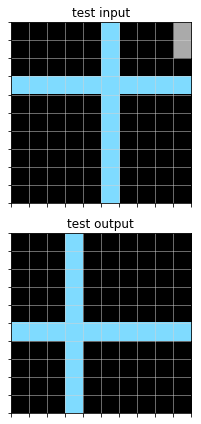

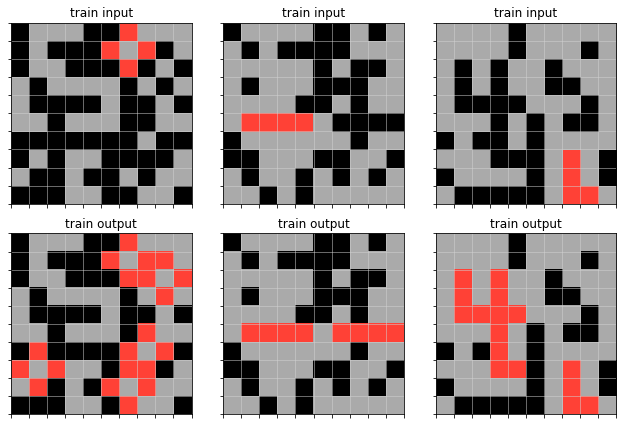

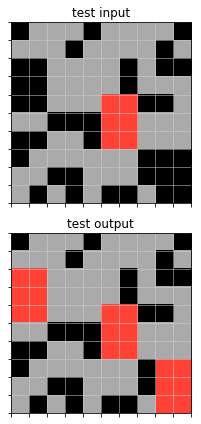

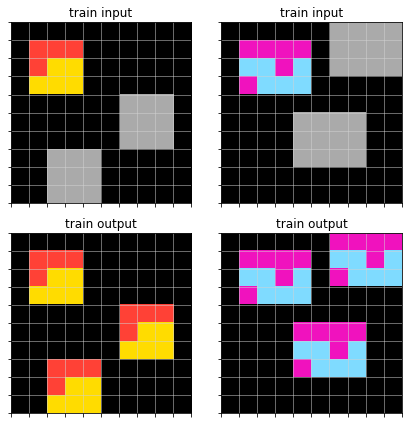

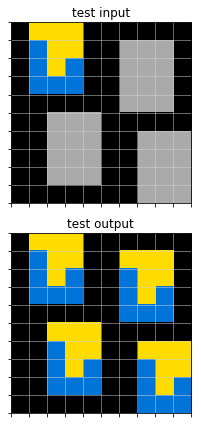

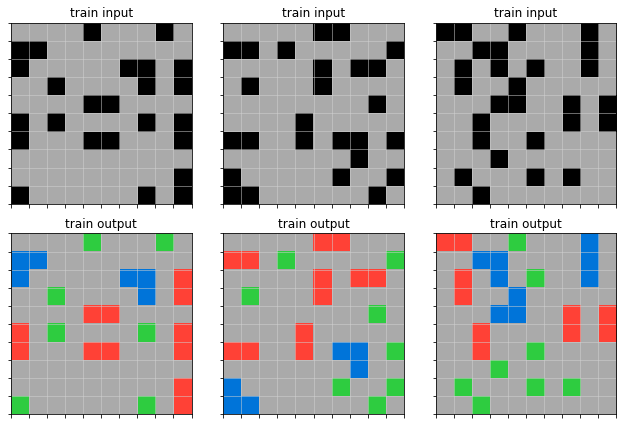

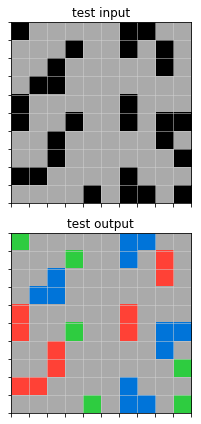

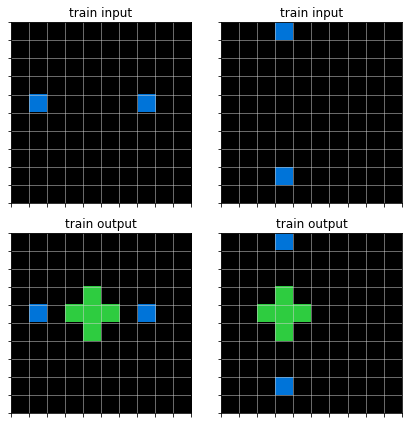

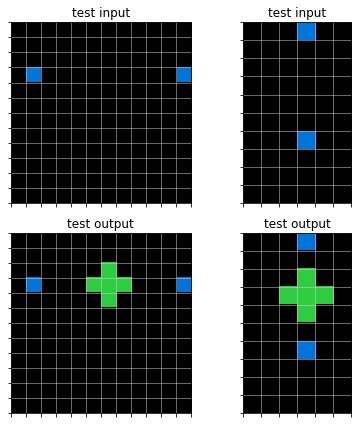

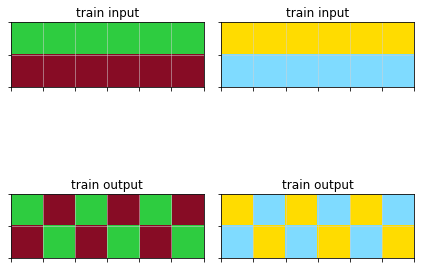

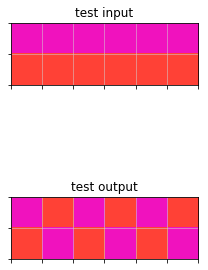

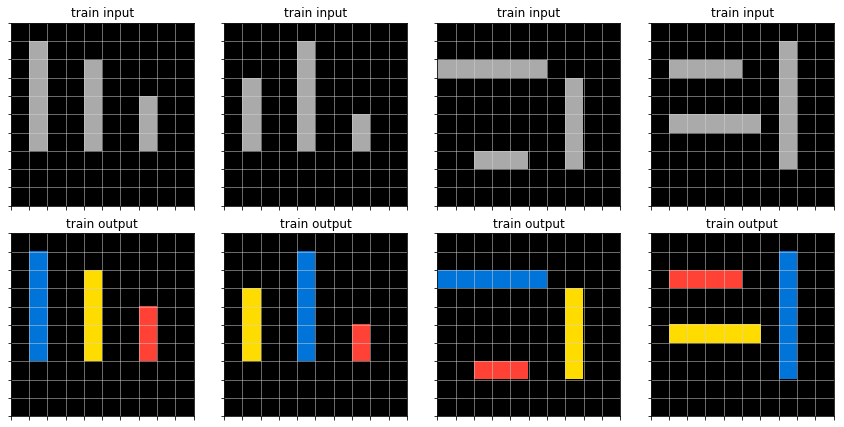

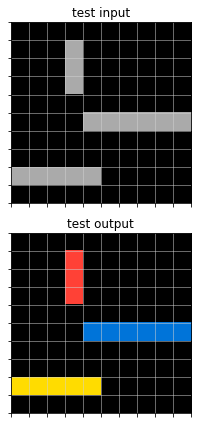

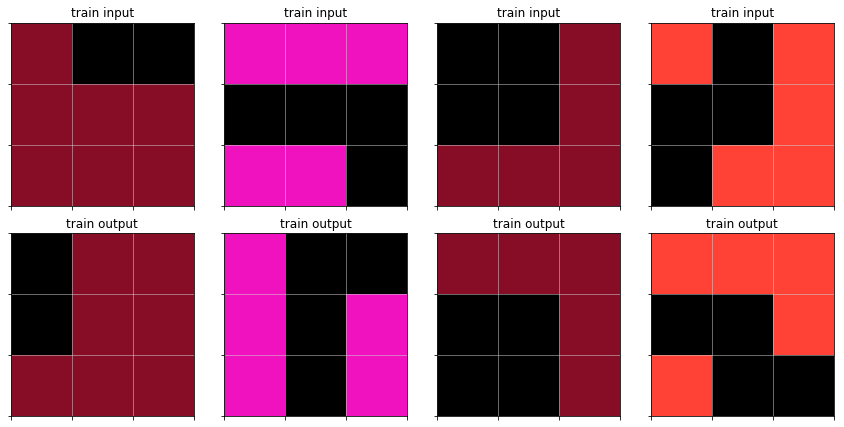

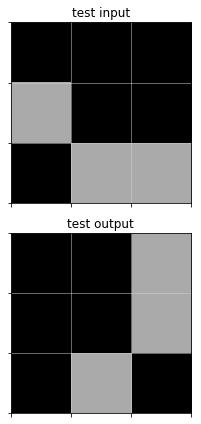

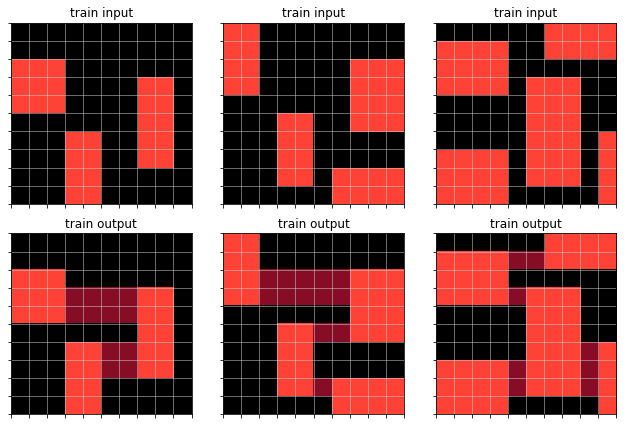

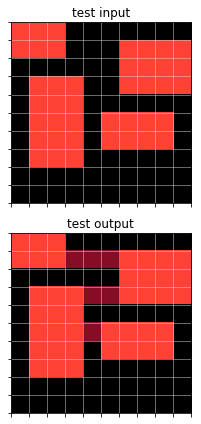

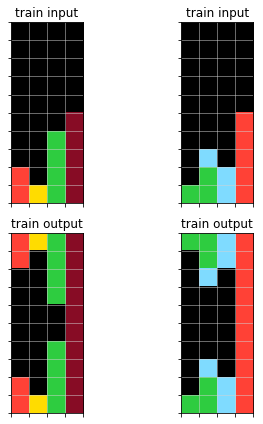

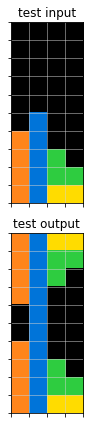

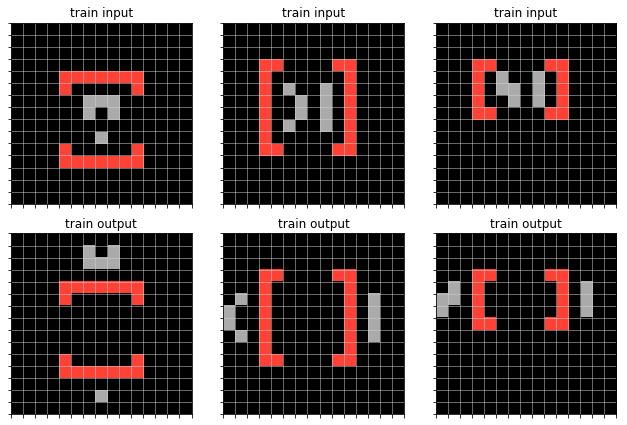

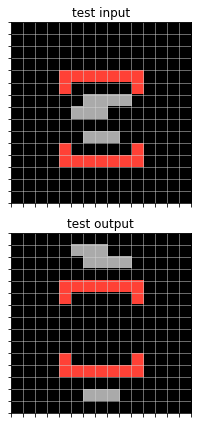

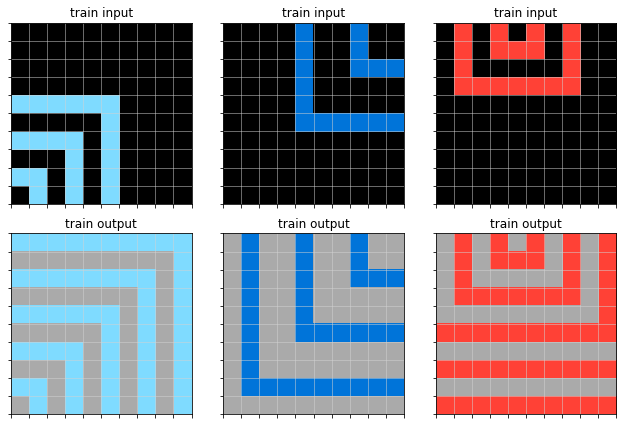

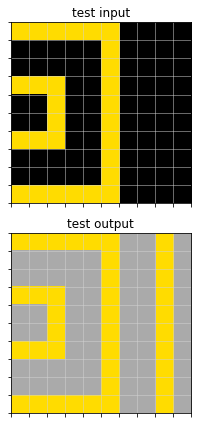

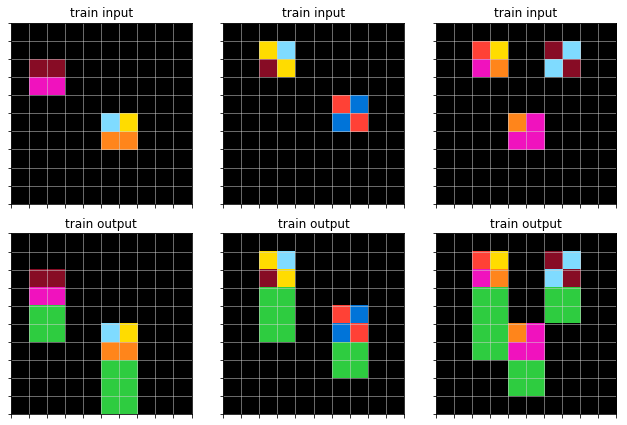

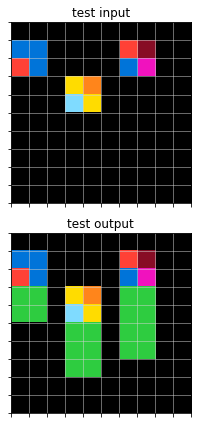

In [41]:
tmp = training_descriptive_df[training_descriptive_df['inputs_all_have_same_shape']==1]
tmp = tmp[tmp['outputs_all_have_same_shape']==1]
tmp = tmp[tmp.in_each_pair_shape_doesnt_change==1]
print(len(tmp))
dimens = []
for i in tmp["task_name"]:
    task = get_data(str(training_path / i))
    for i in range(len(task["train"])):
        dimens.append(np.array(task["train"][i]["input"]).shape[0])
    plot_task(task)

397


(array([ 64.,  23., 181.,  34.,  25.,  25.,  25.,   7.,   0.,  13.]),
 array([ 2. ,  4.8,  7.6, 10.4, 13.2, 16. , 18.8, 21.6, 24.4, 27.2, 30. ]),
 <a list of 10 Patch objects>)

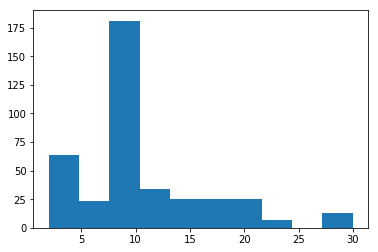

In [42]:
# inputとoutputが同じ次元 and input同士で次元が変わらないデータの次元の分布
print(len(dimens))
plt.hist(dimens)

92


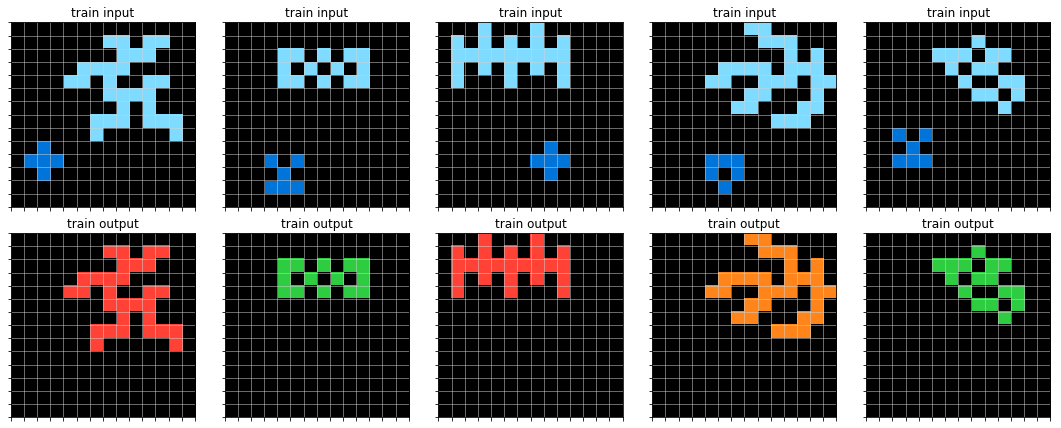

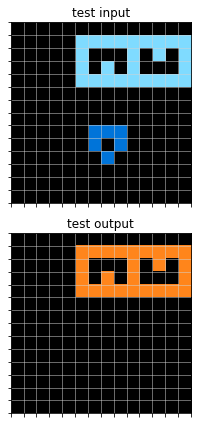

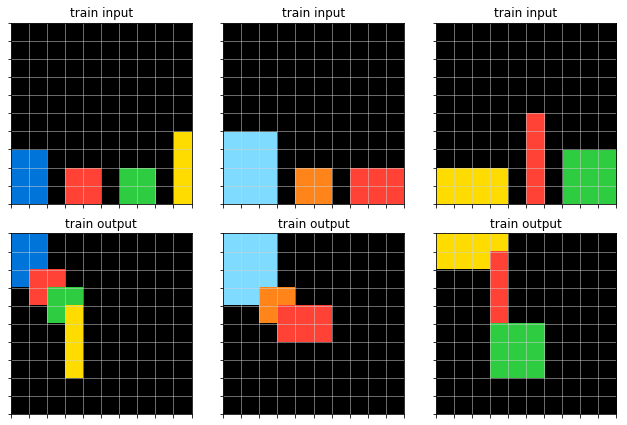

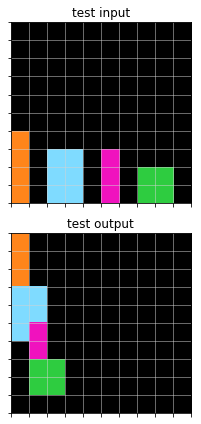

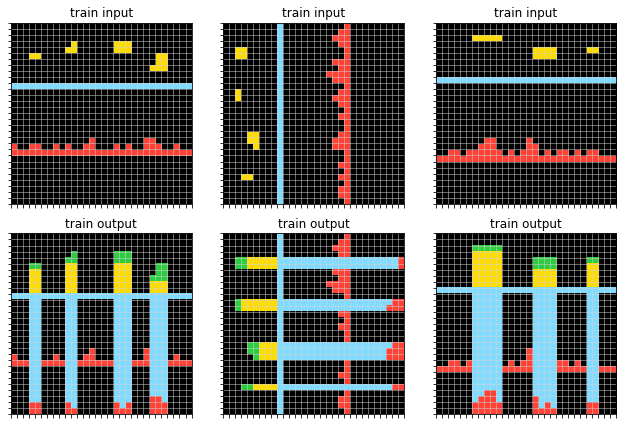

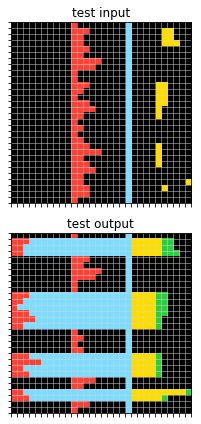

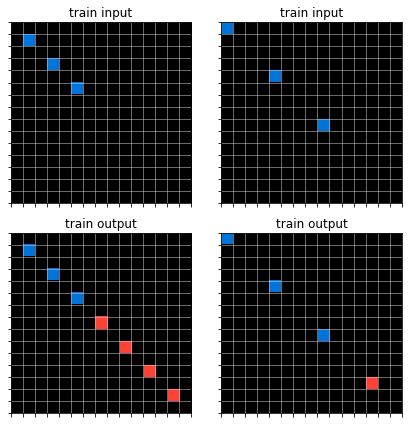

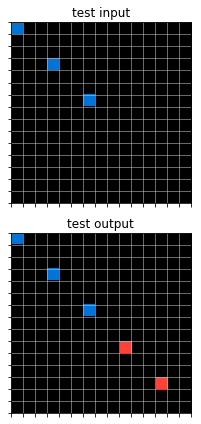

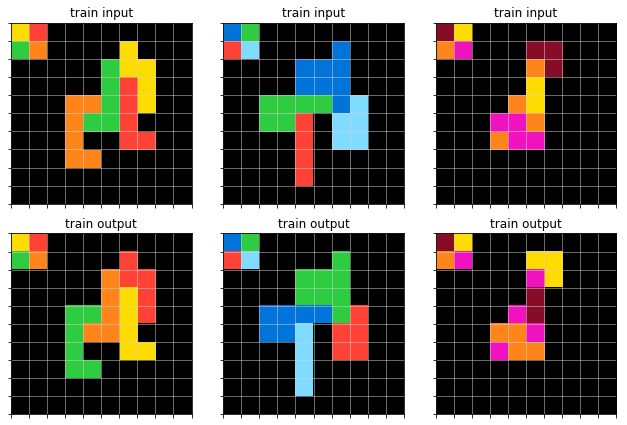

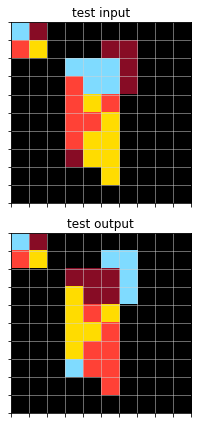

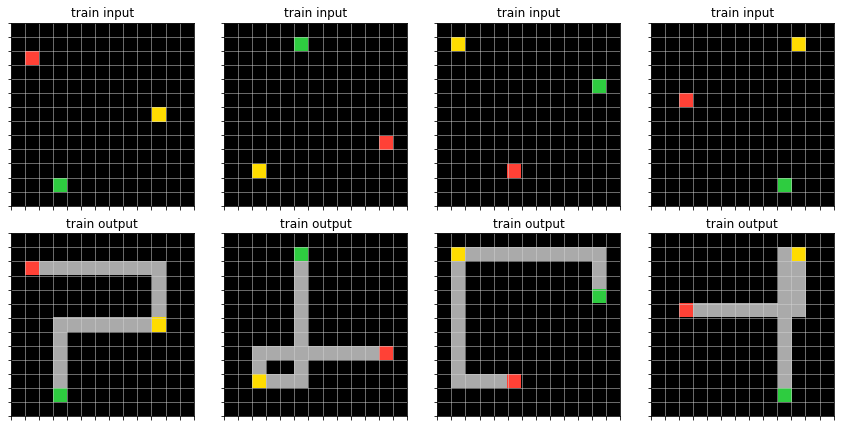

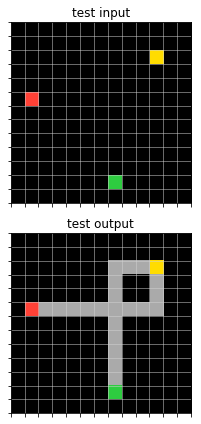

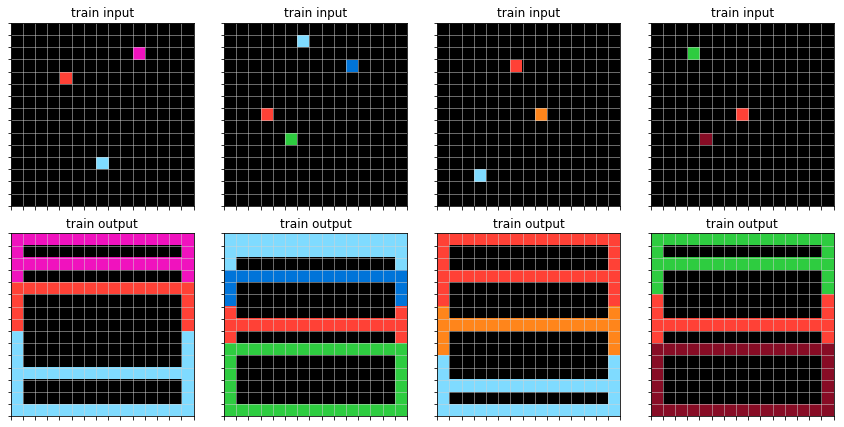

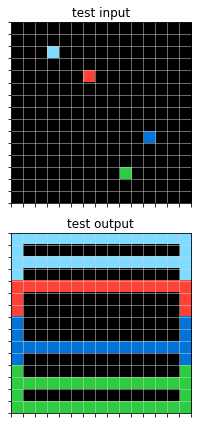

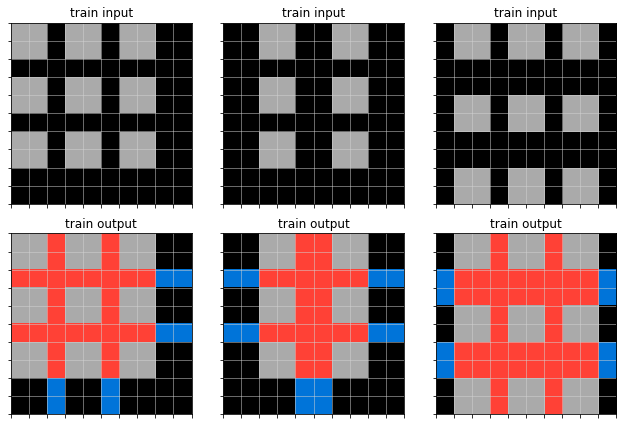

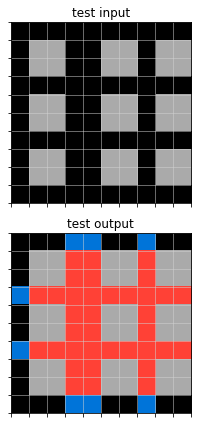

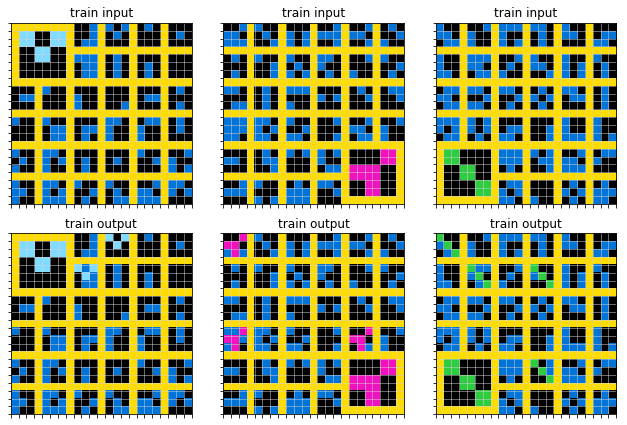

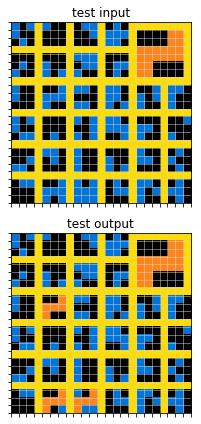

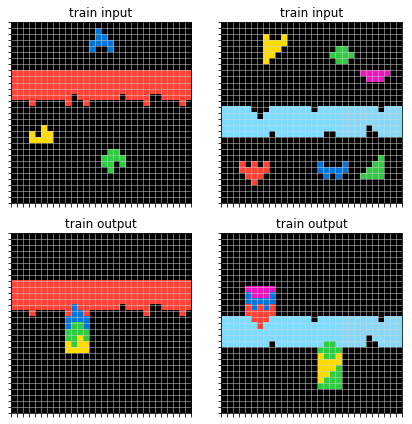

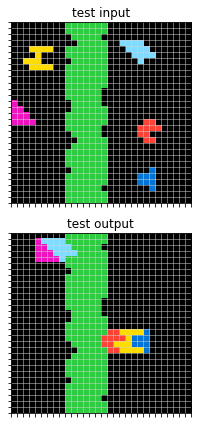

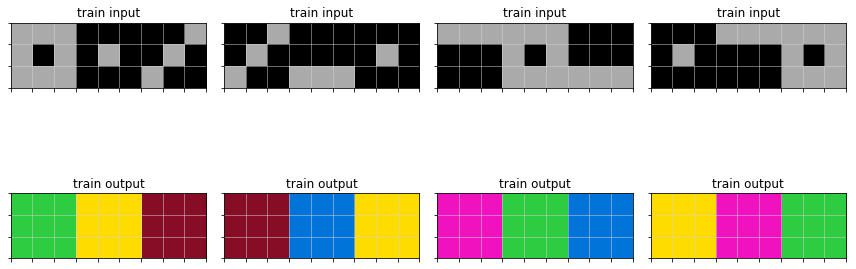

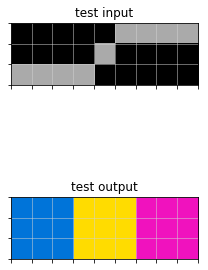

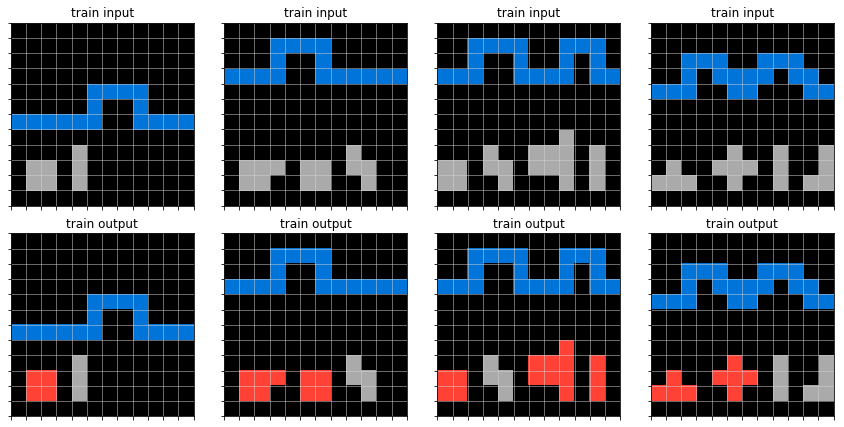

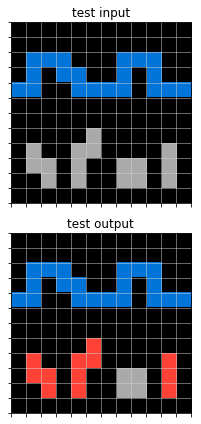

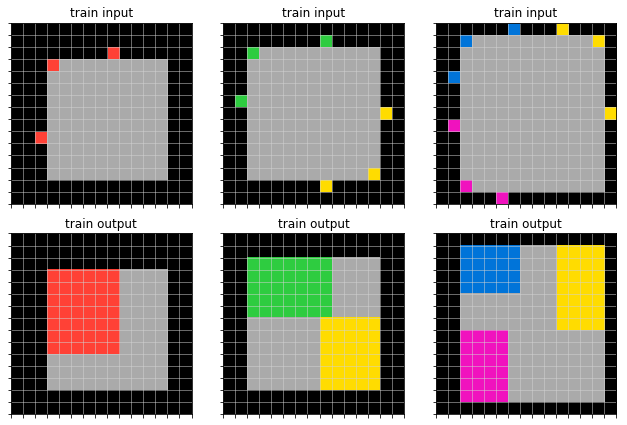

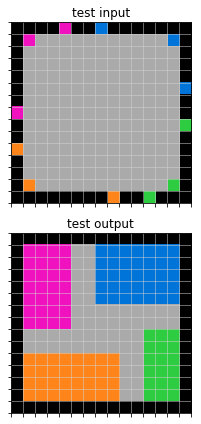

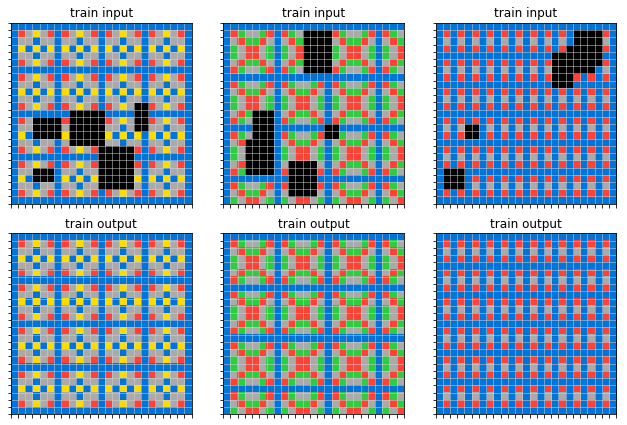

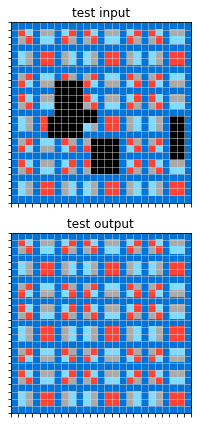

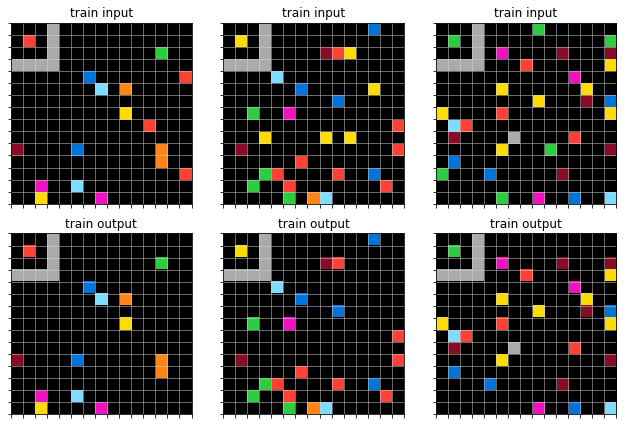

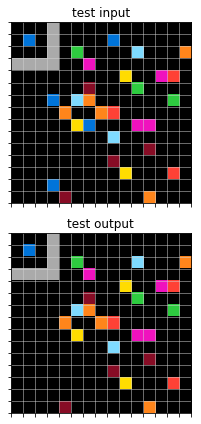

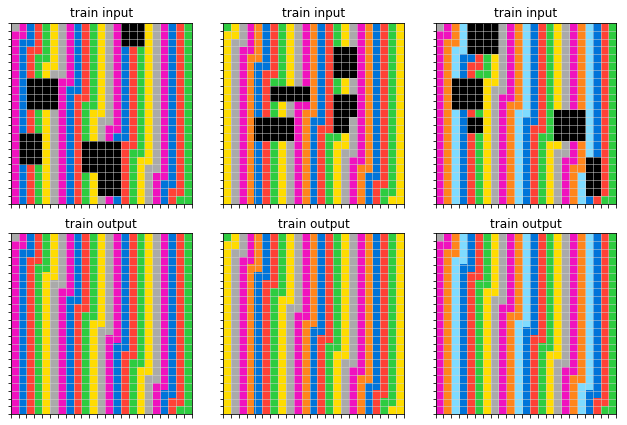

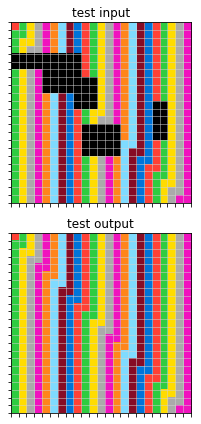

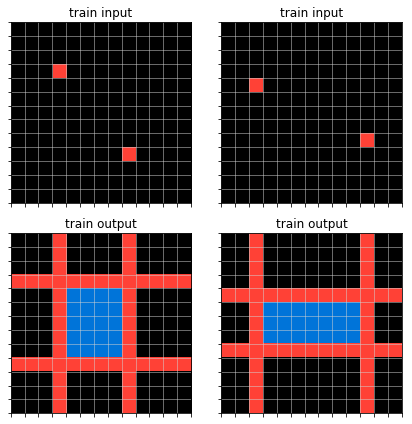

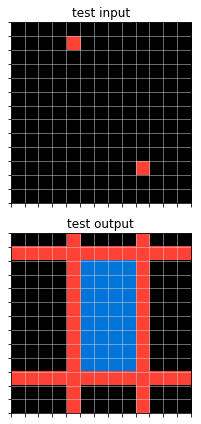

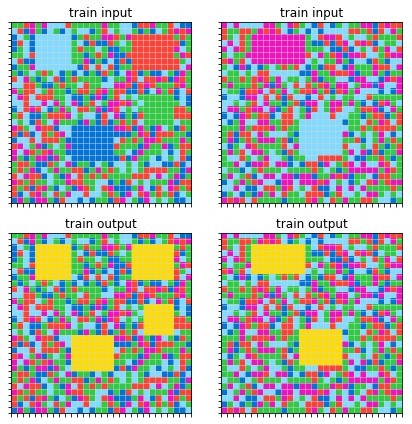

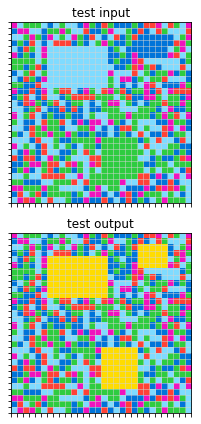

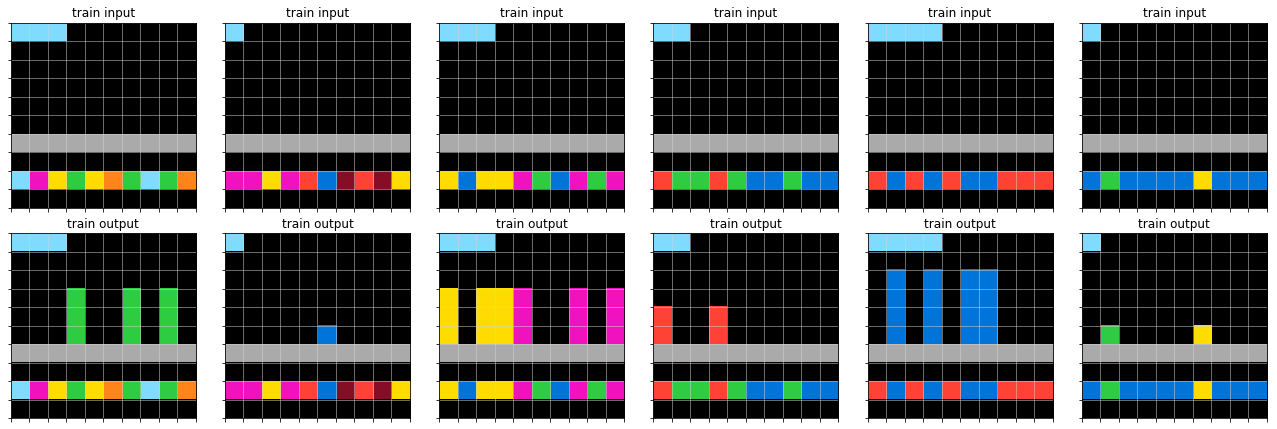

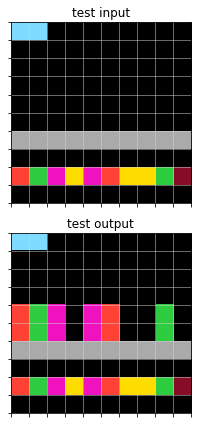

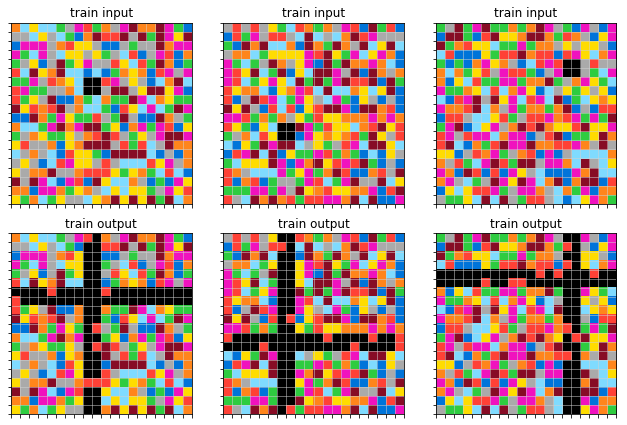

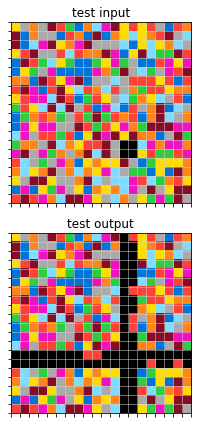

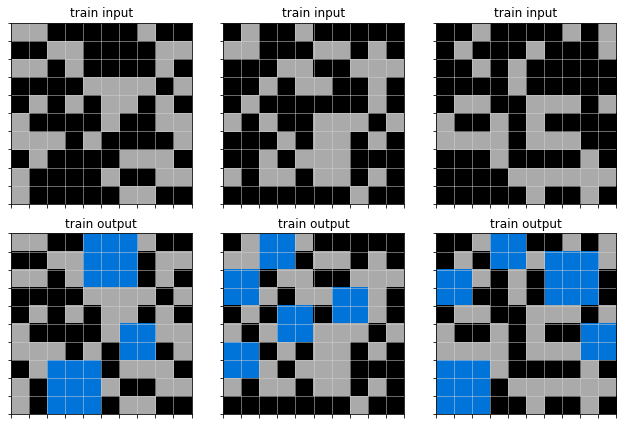

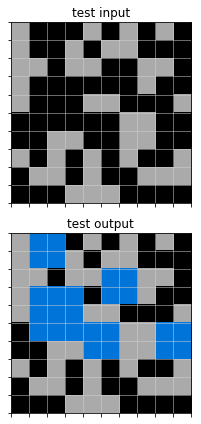

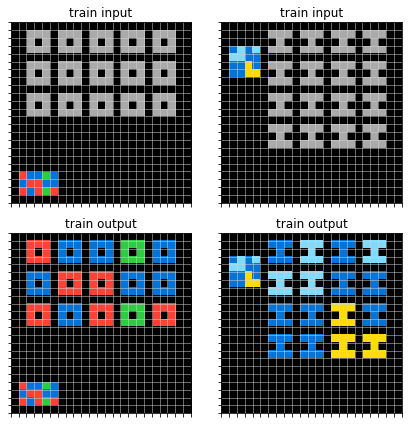

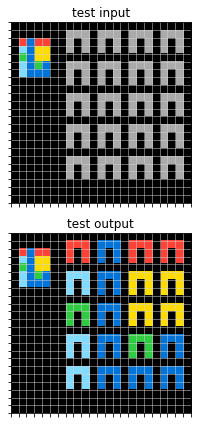

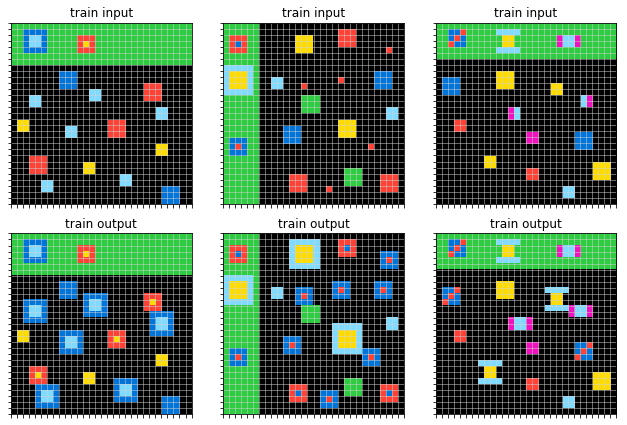

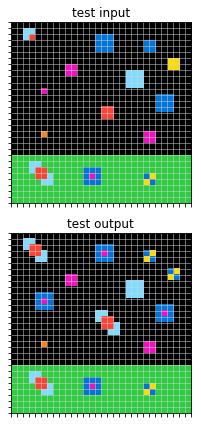

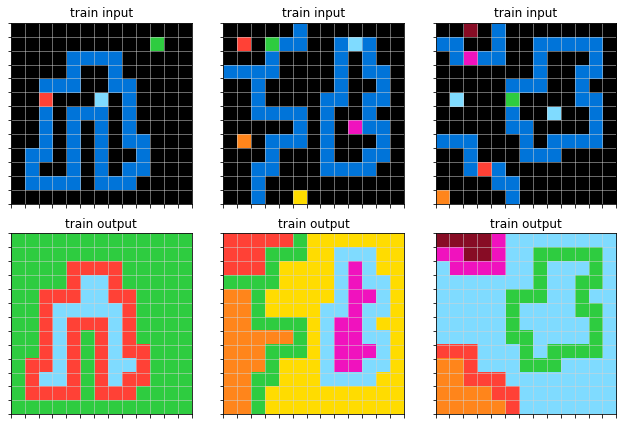

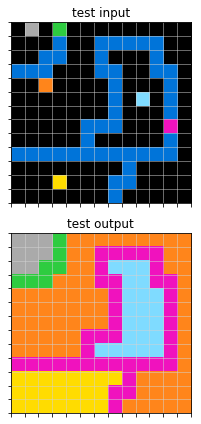

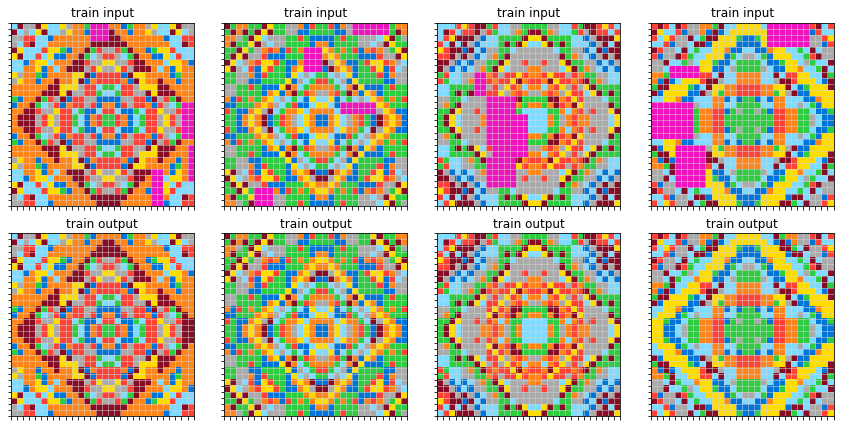

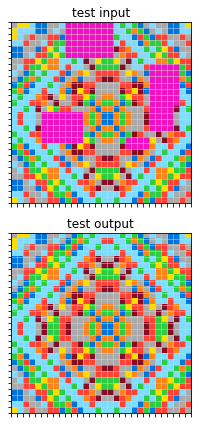

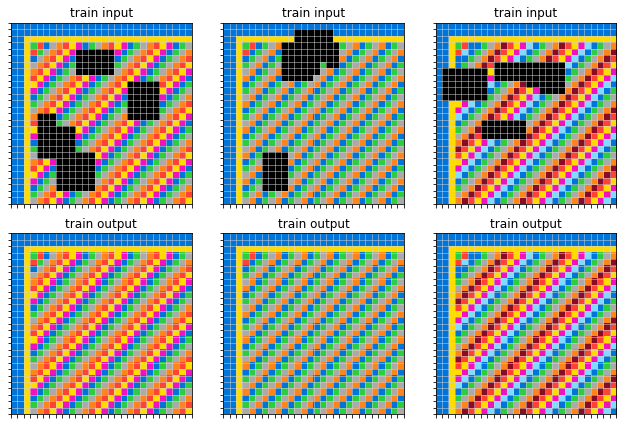

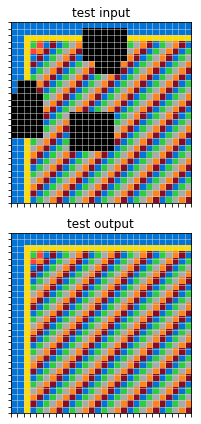

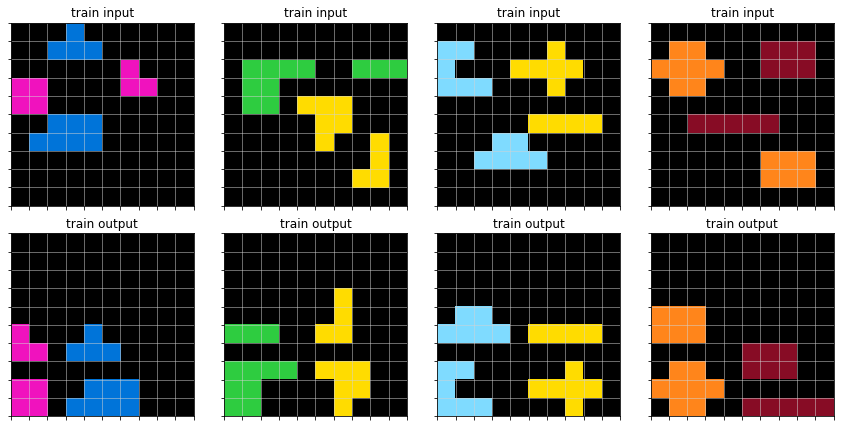

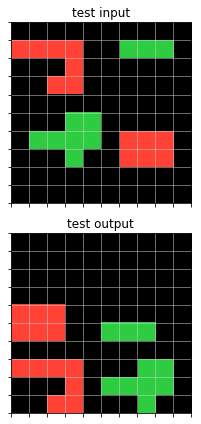

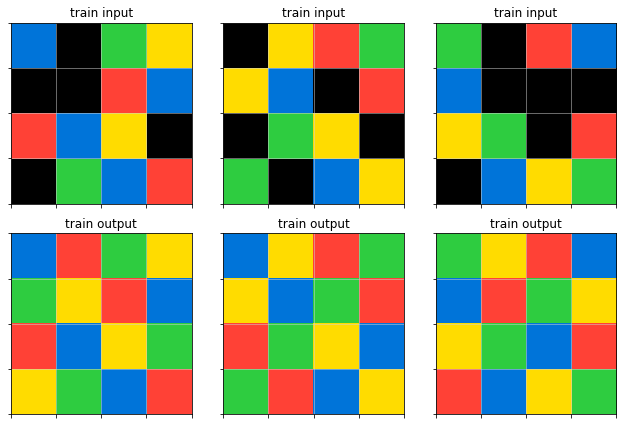

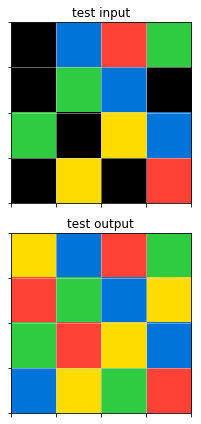

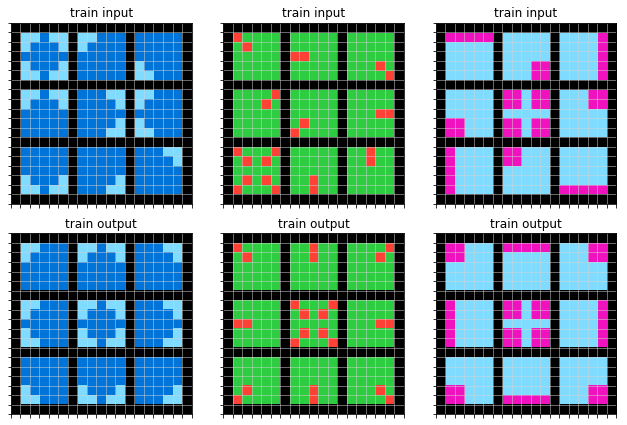

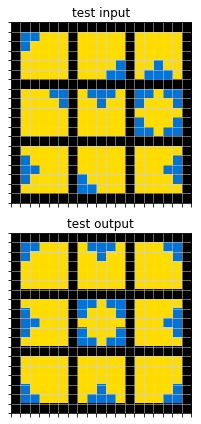

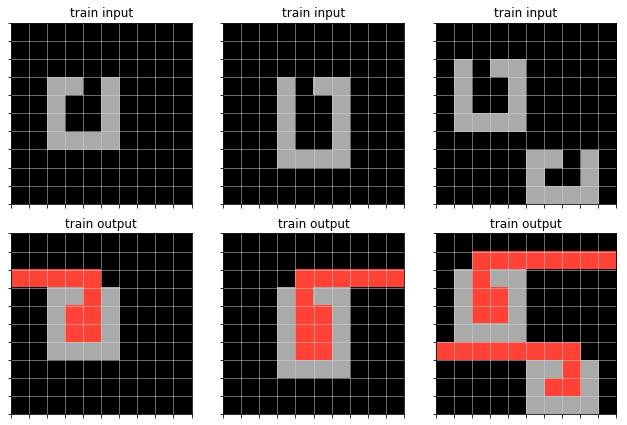

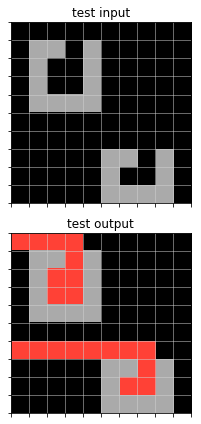

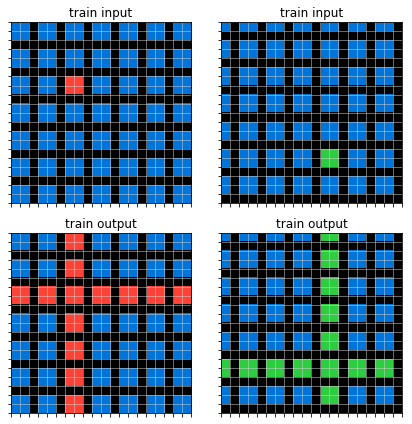

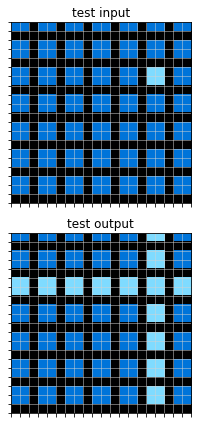

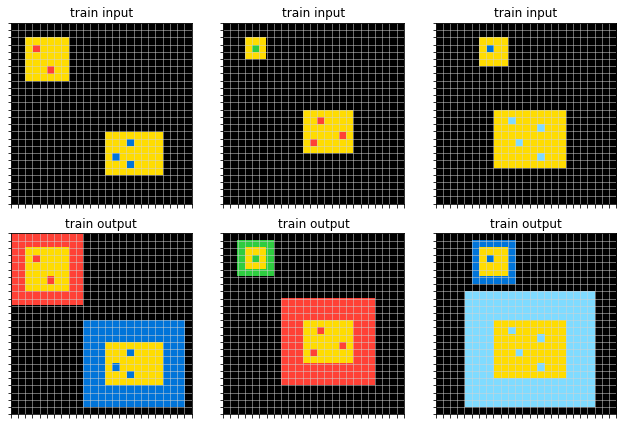

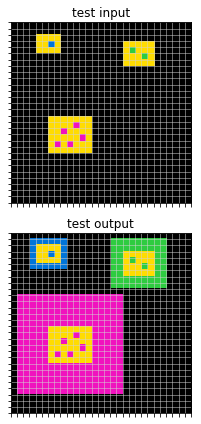

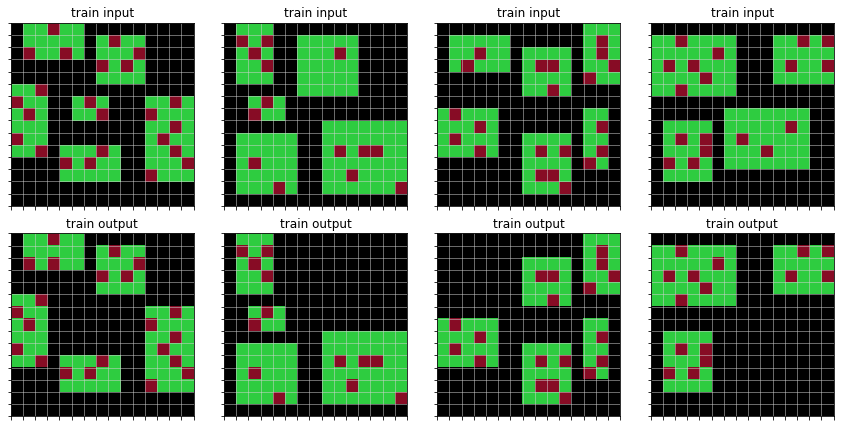

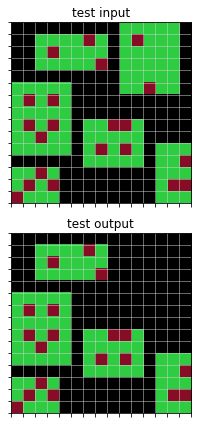

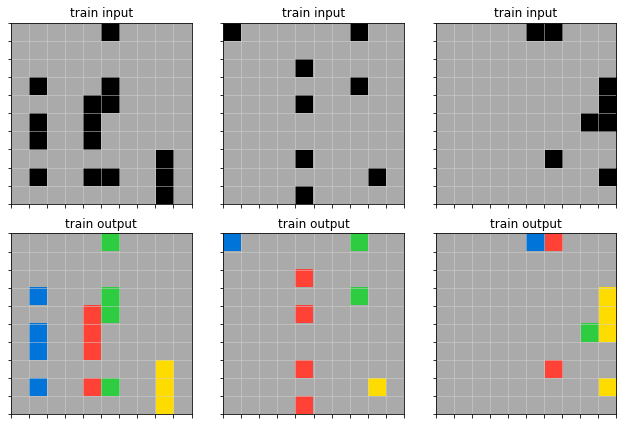

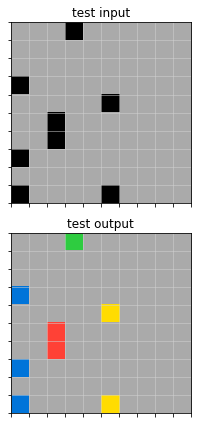

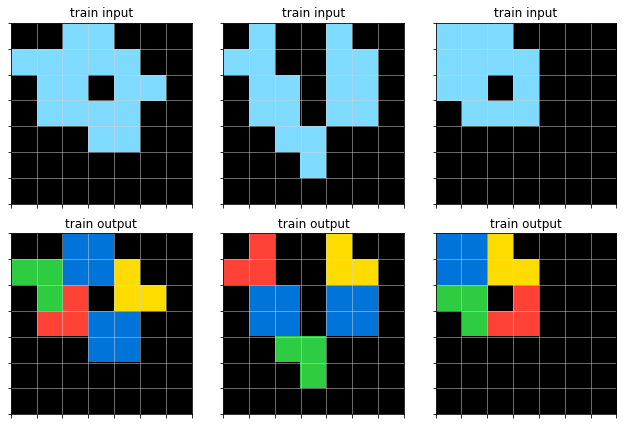

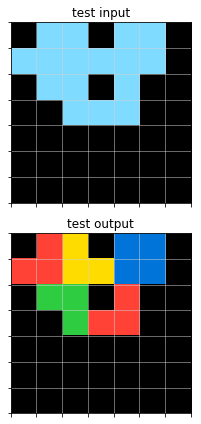

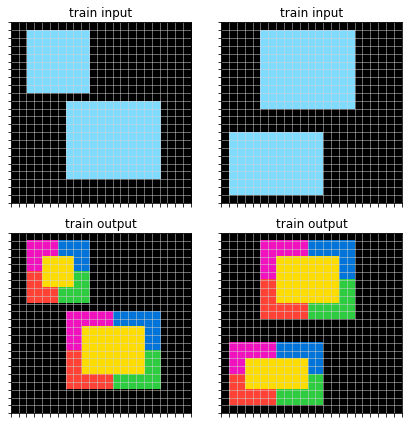

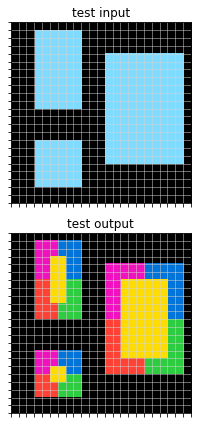

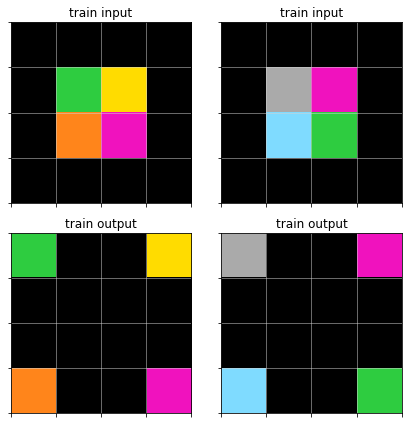

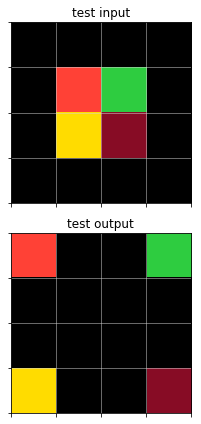

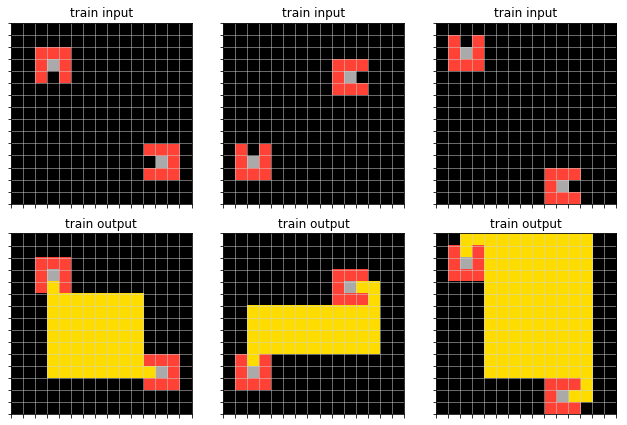

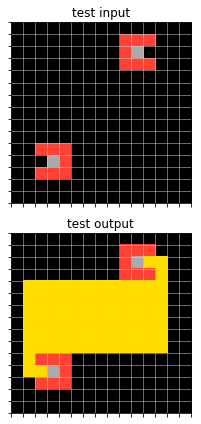

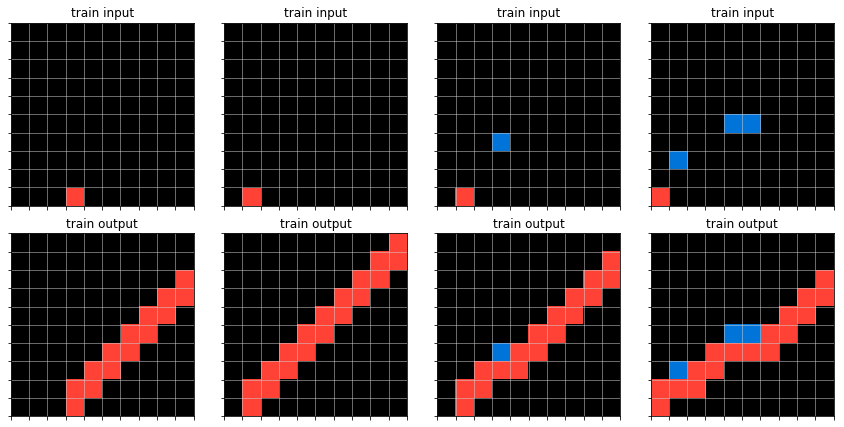

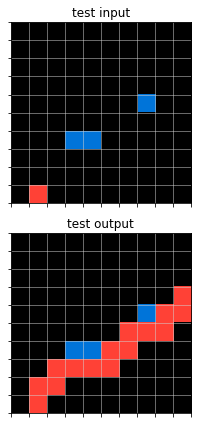

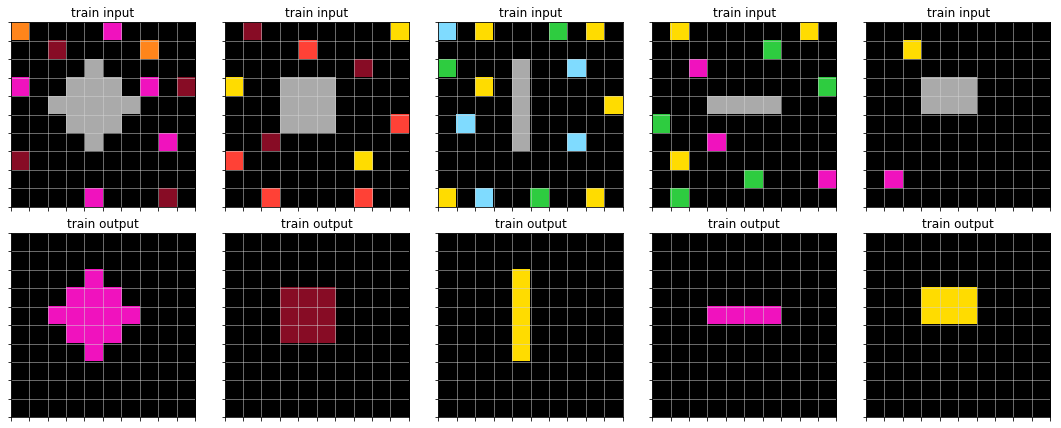

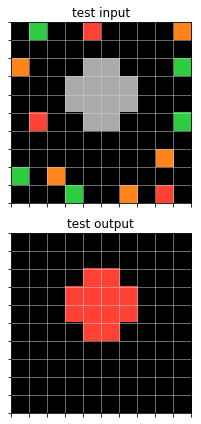

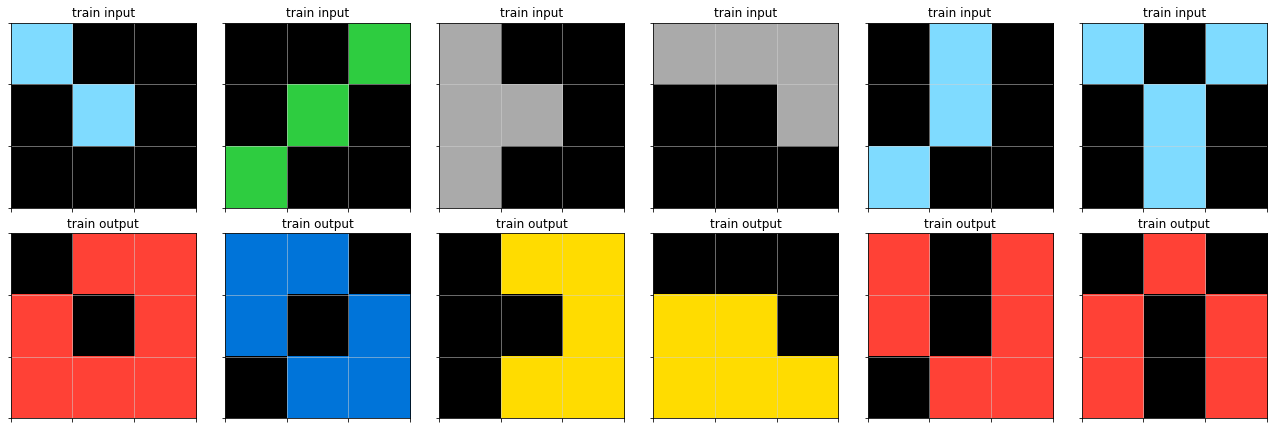

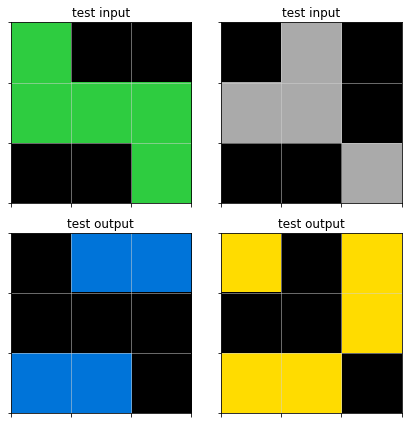

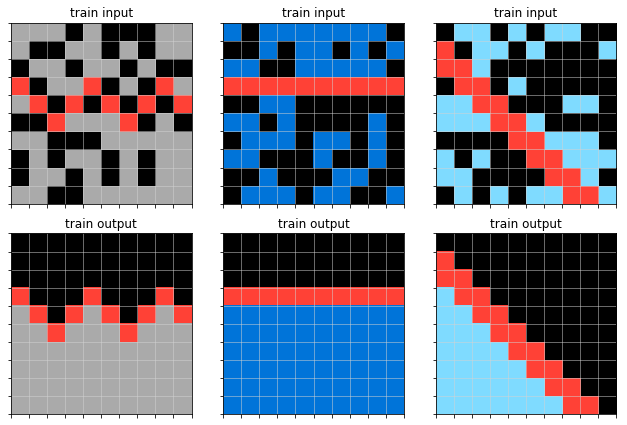

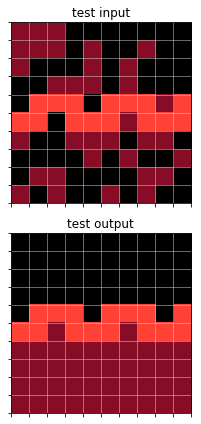

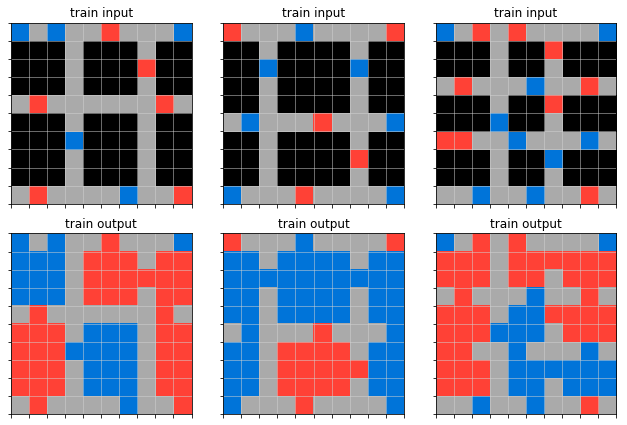

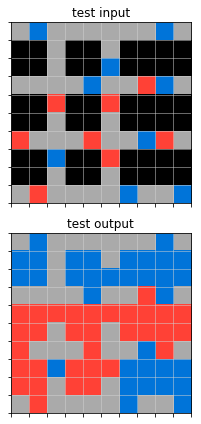

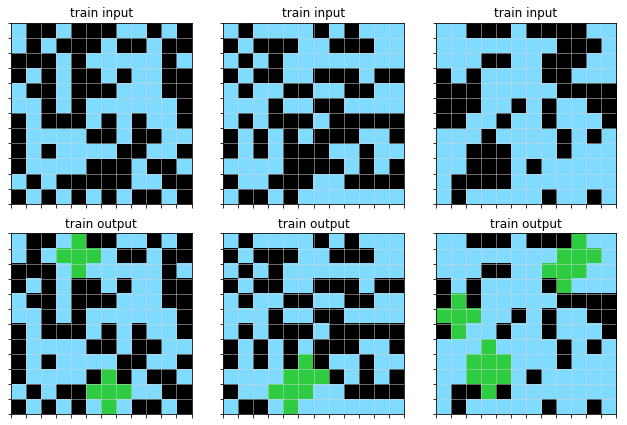

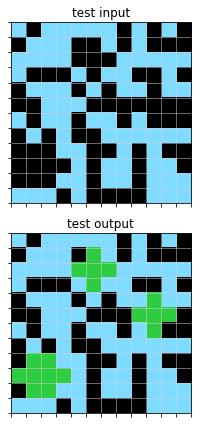

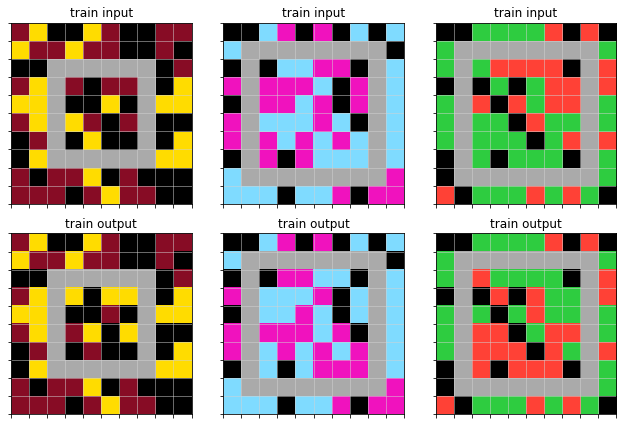

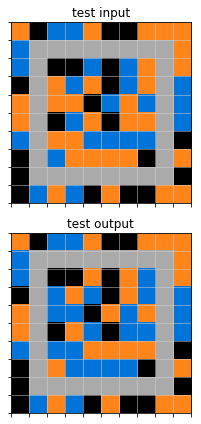

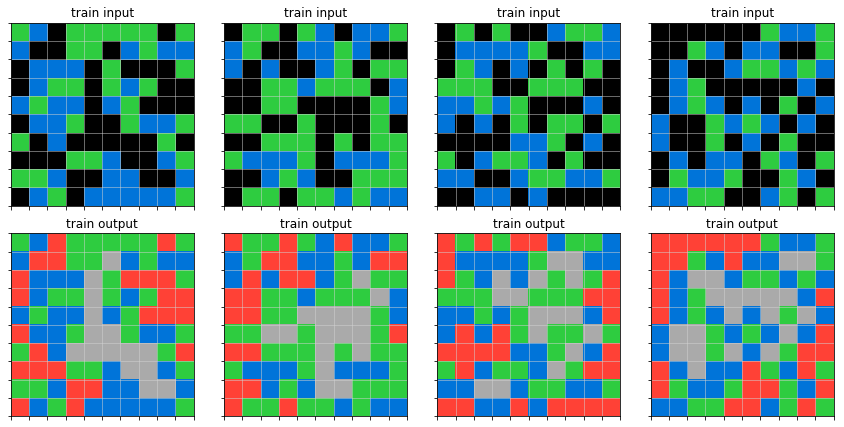

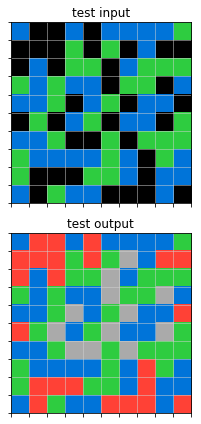

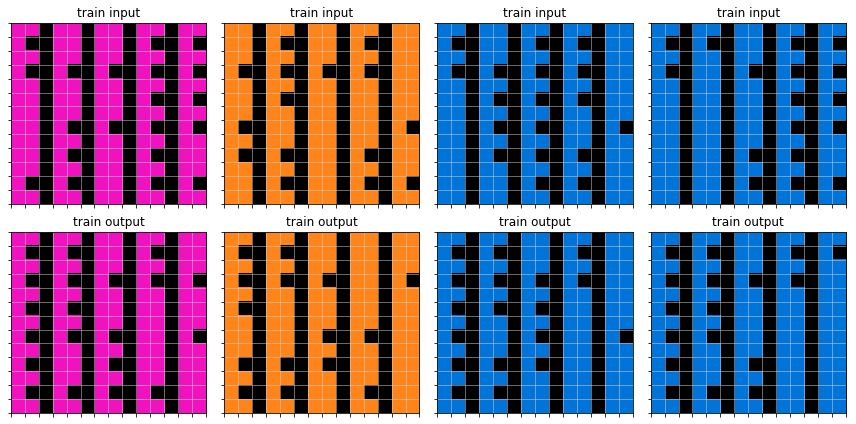

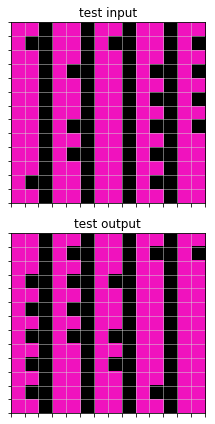

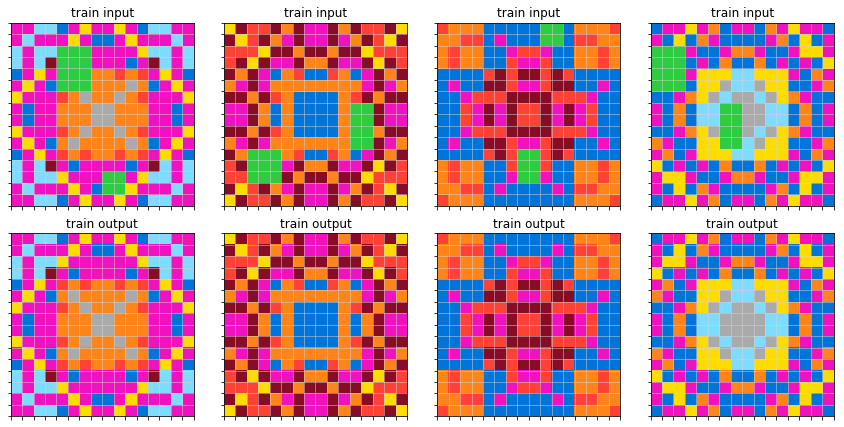

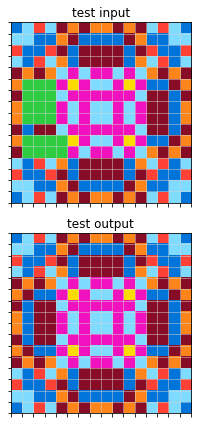

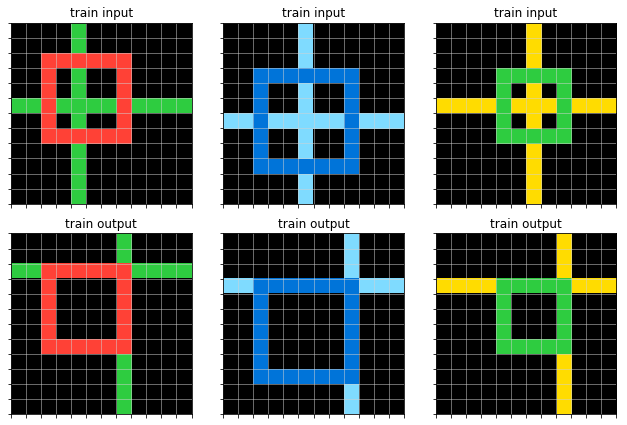

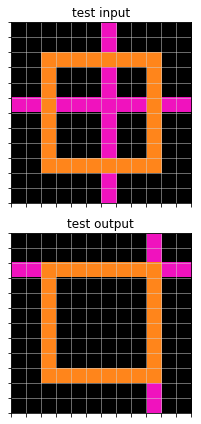

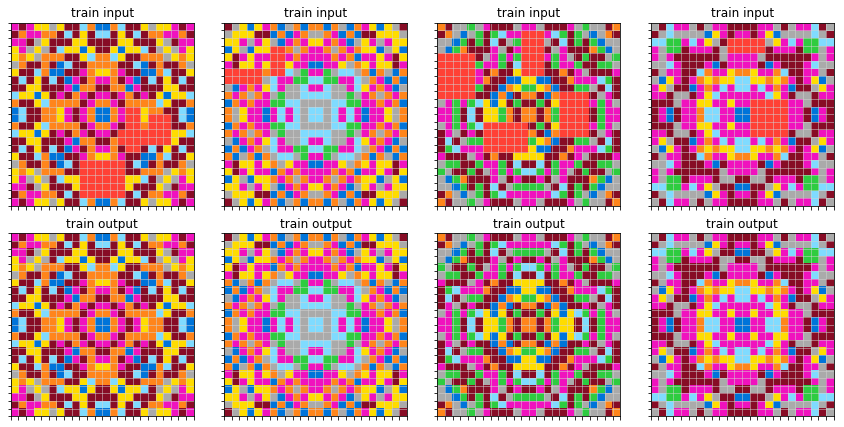

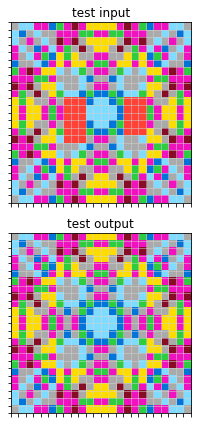

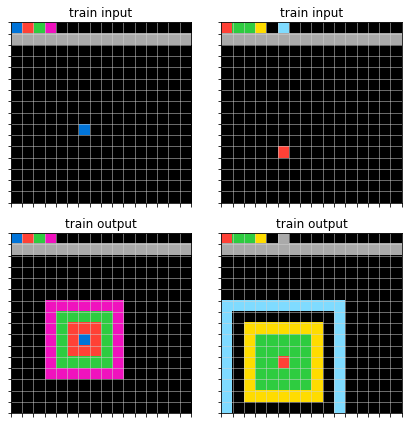

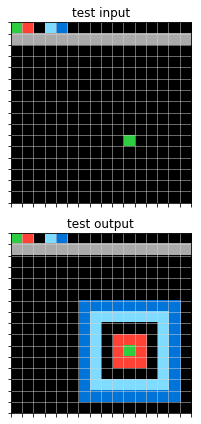

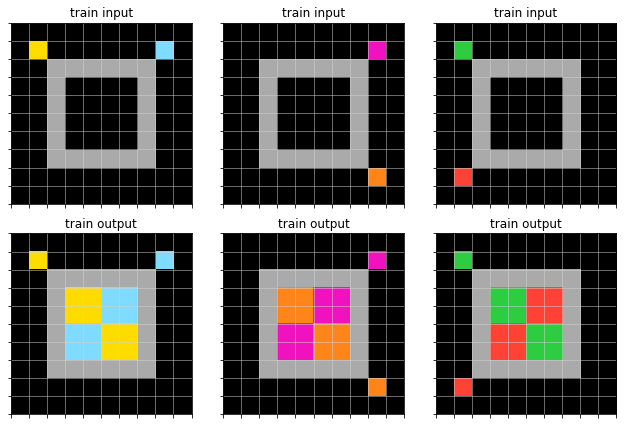

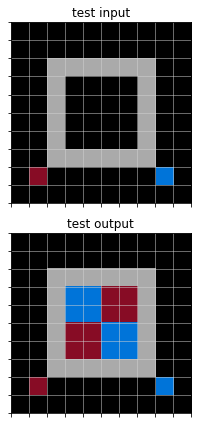

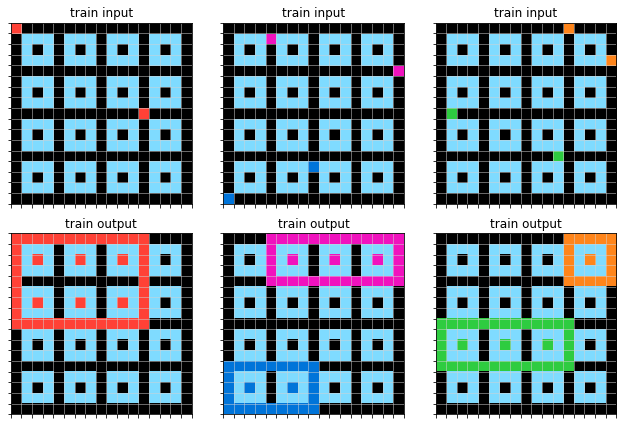

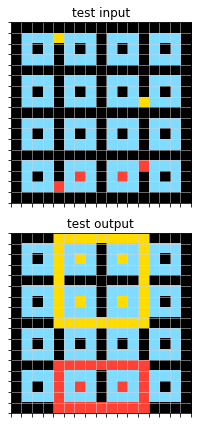

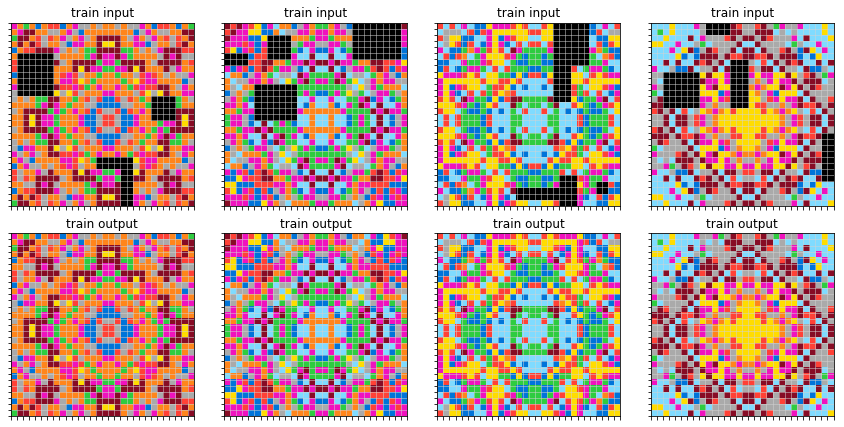

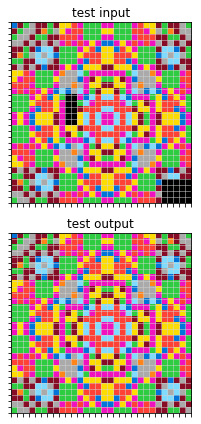

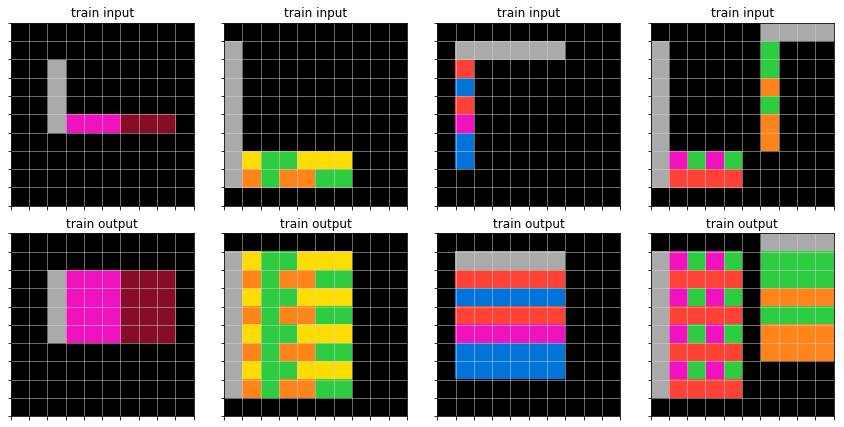

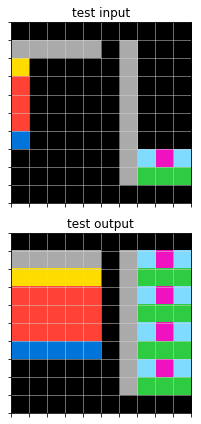

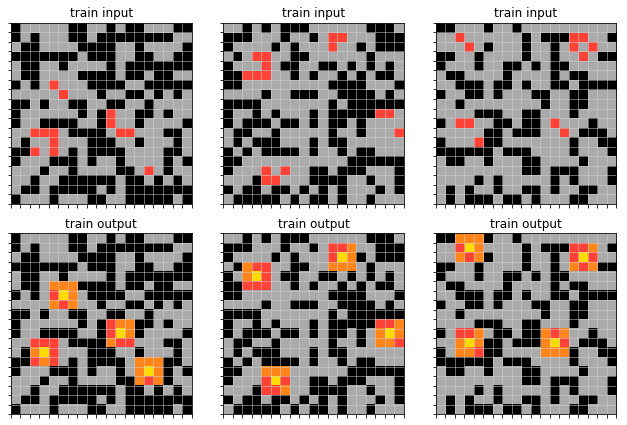

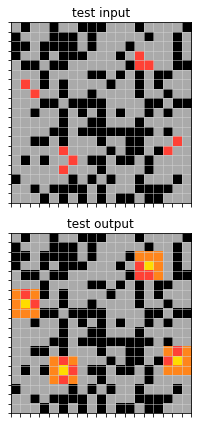

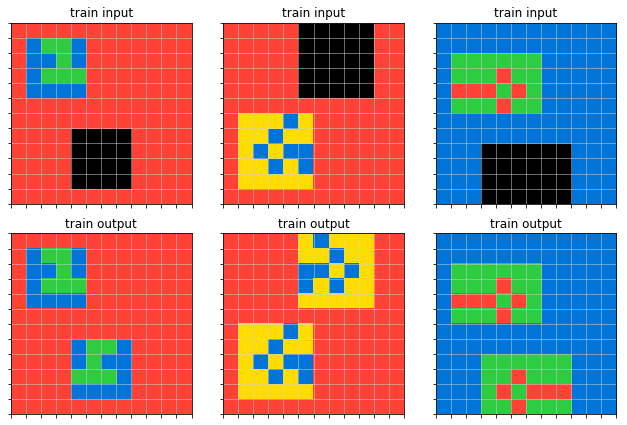

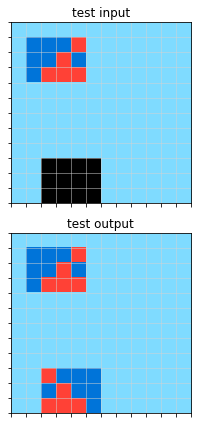

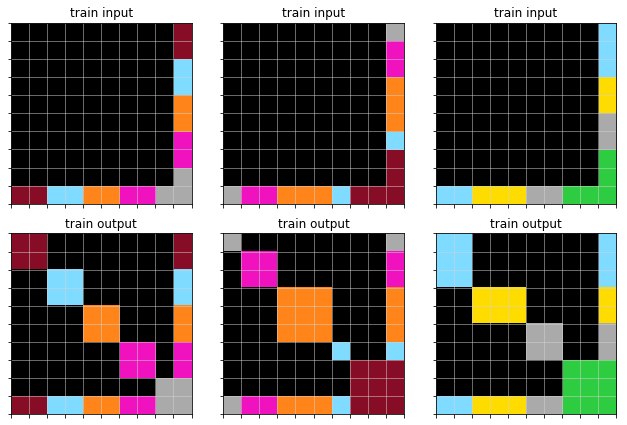

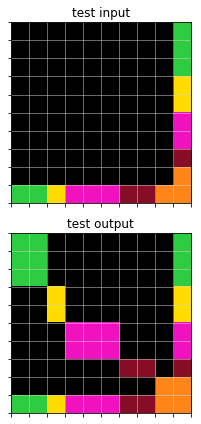

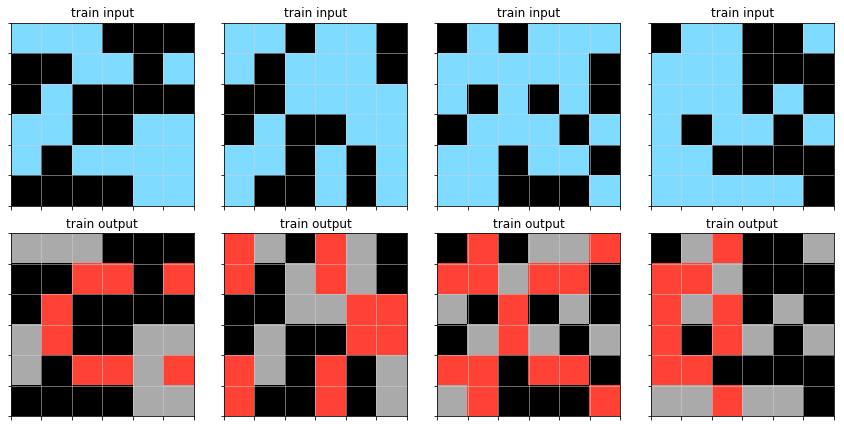

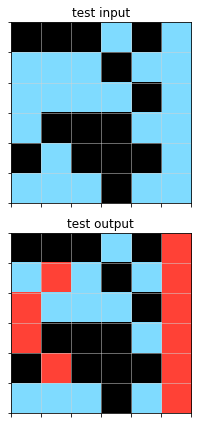

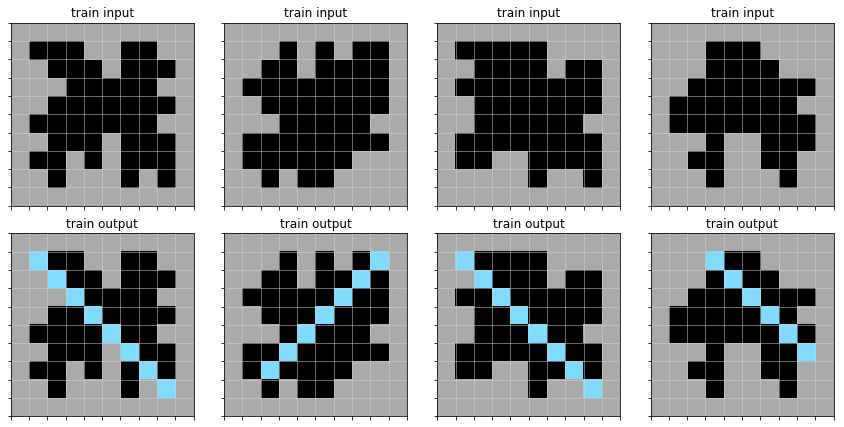

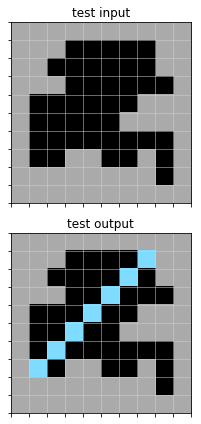

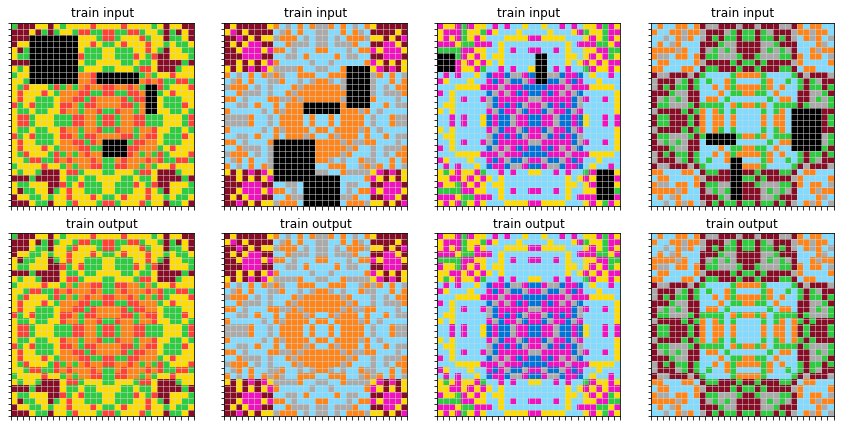

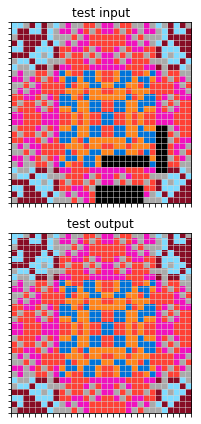

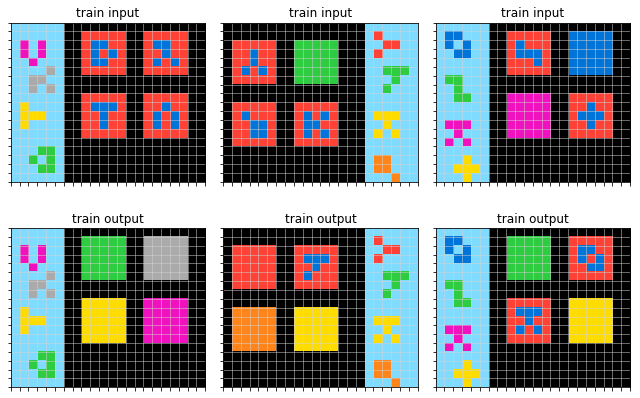

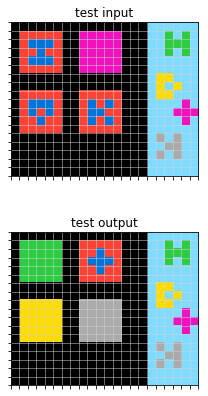

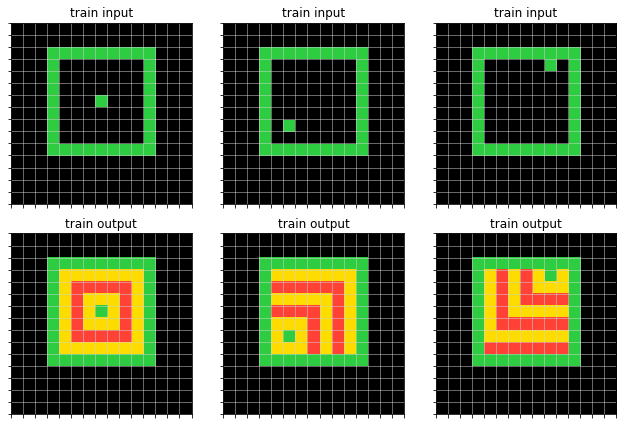

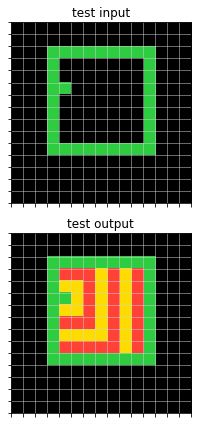

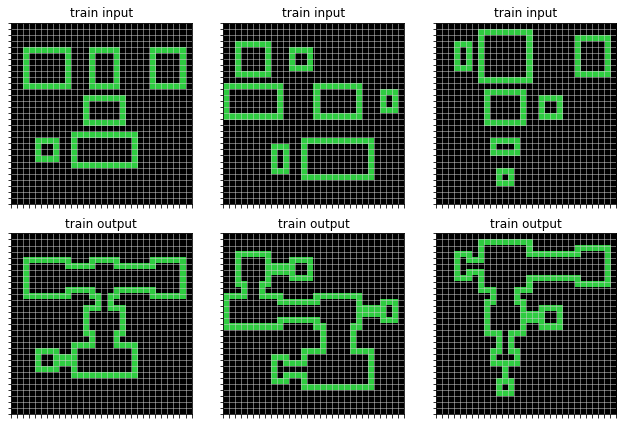

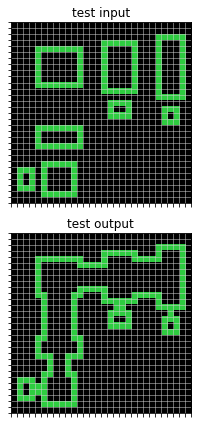

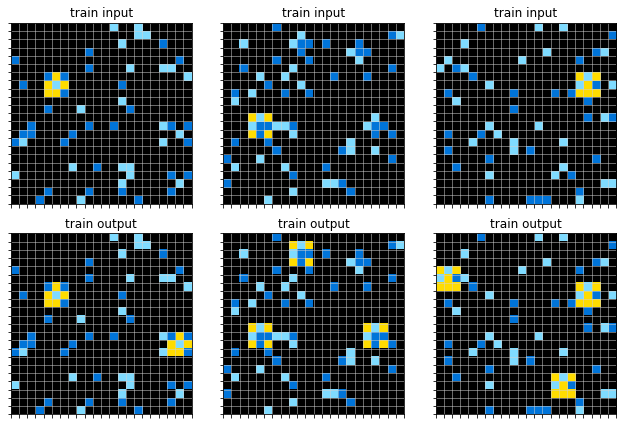

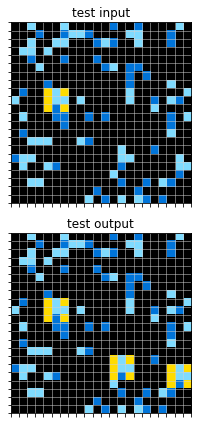

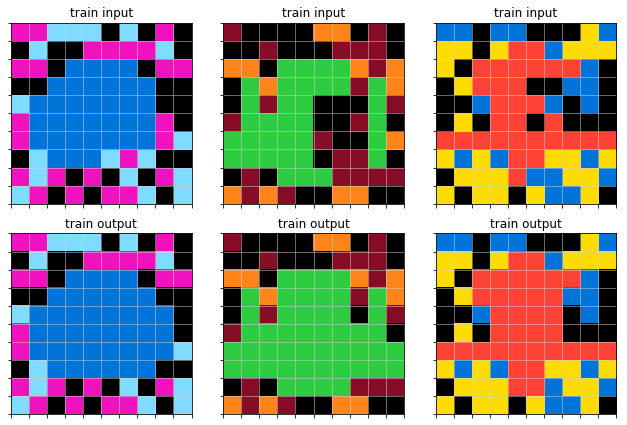

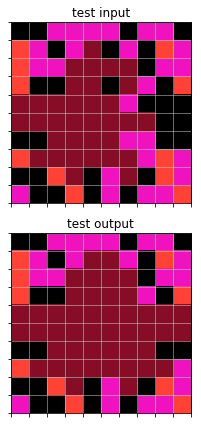

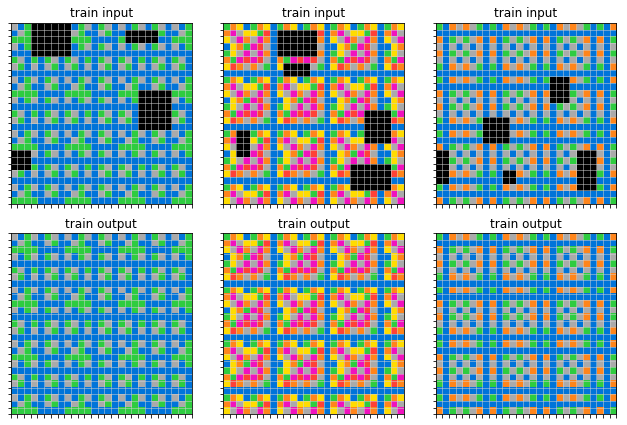

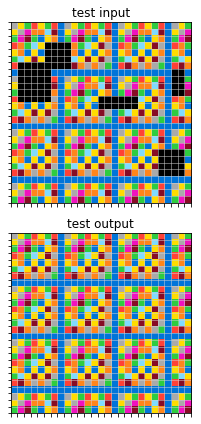

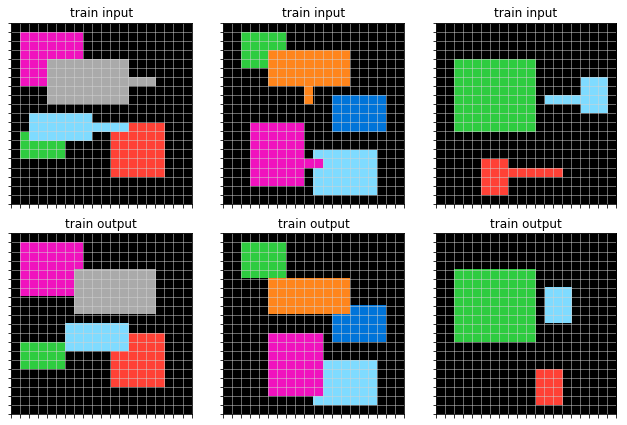

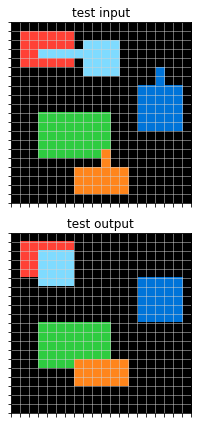

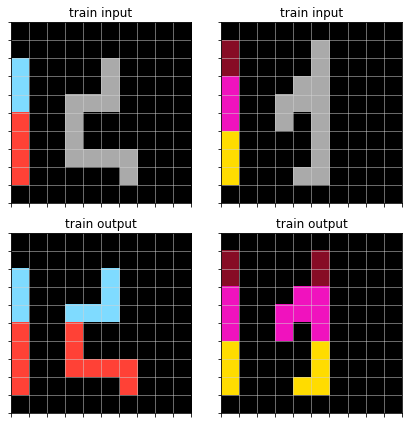

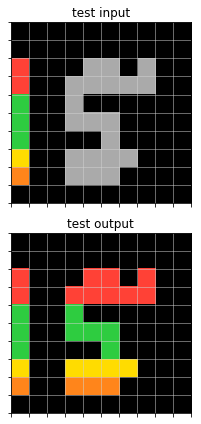

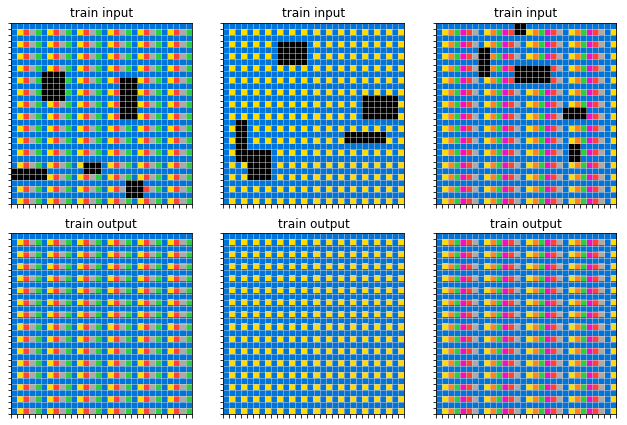

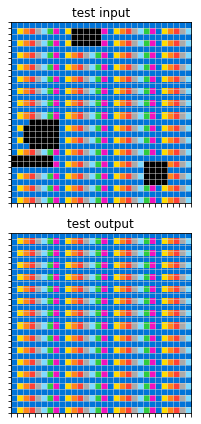

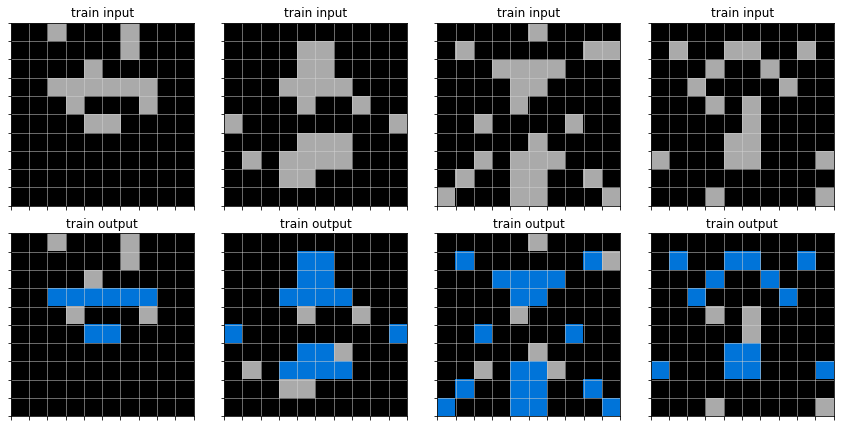

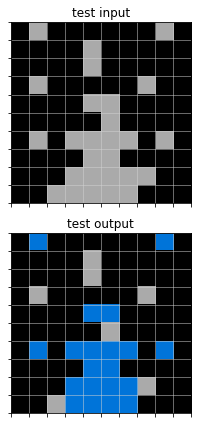

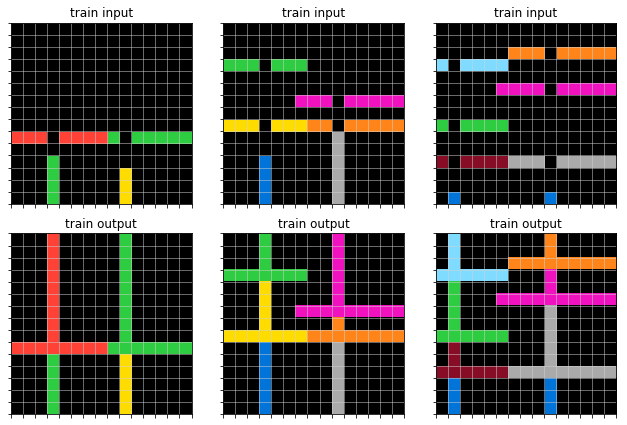

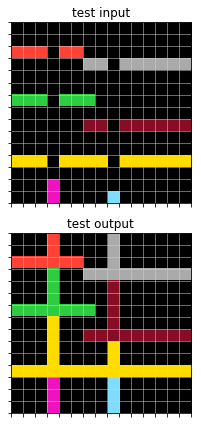

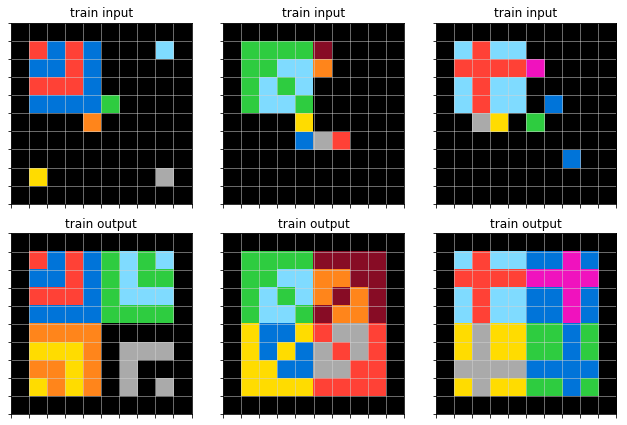

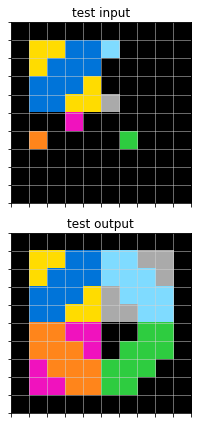

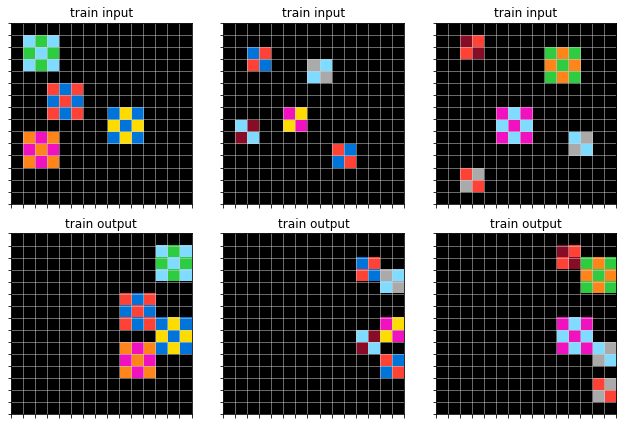

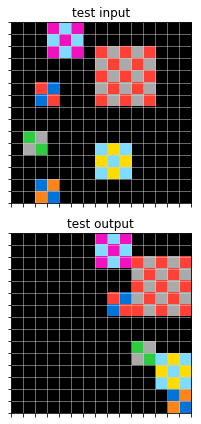

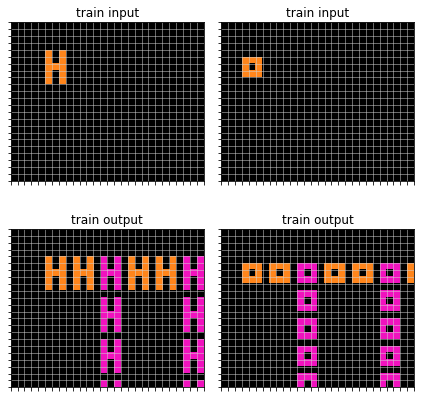

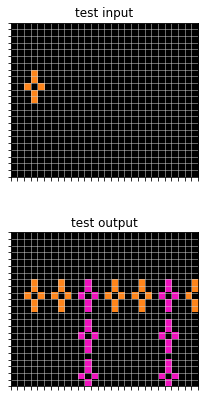

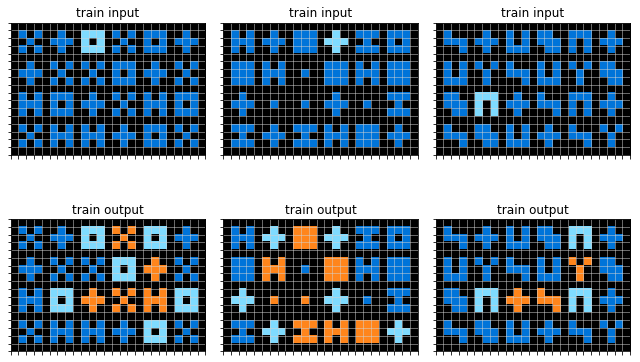

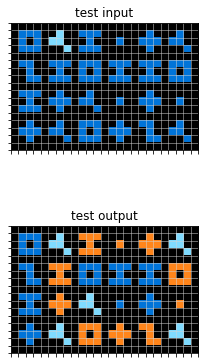

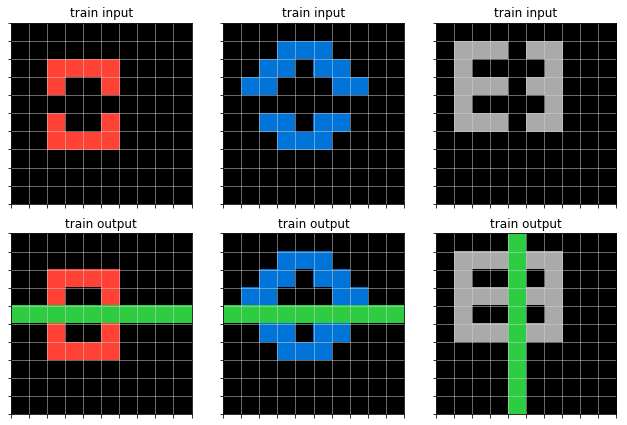

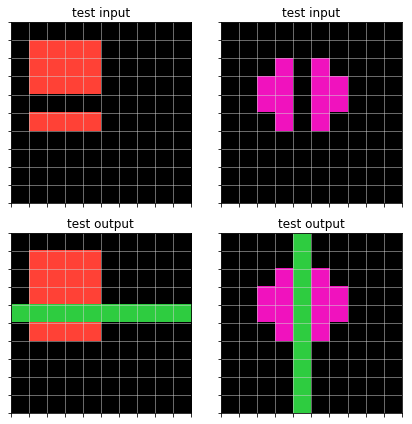

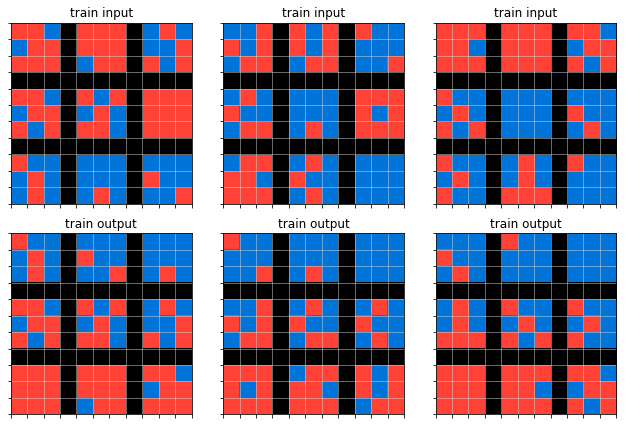

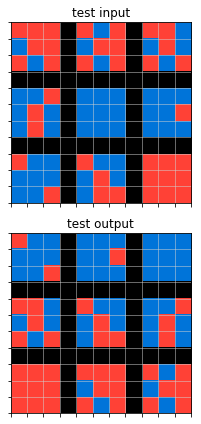

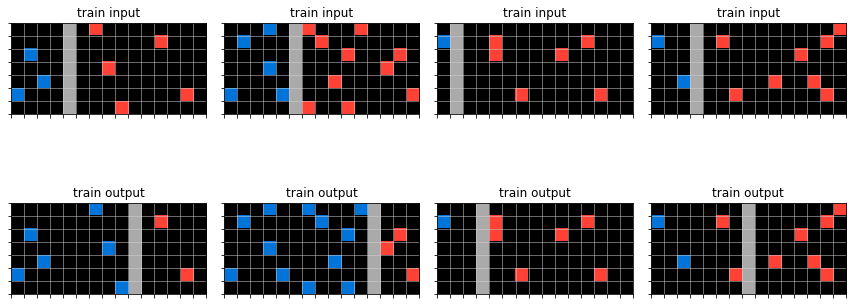

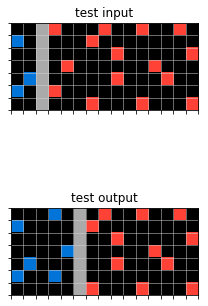

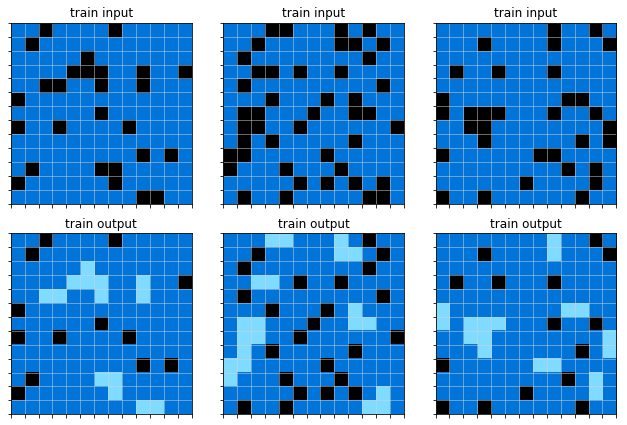

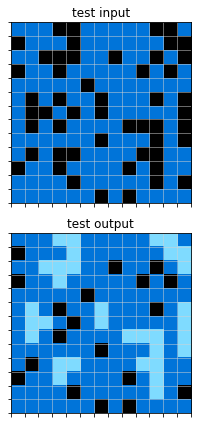

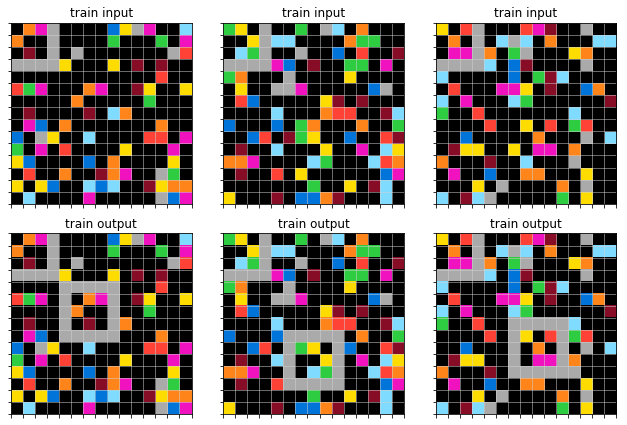

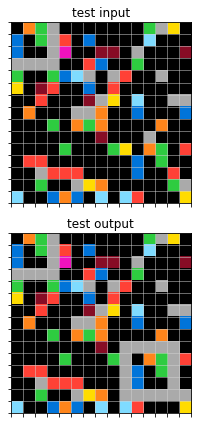

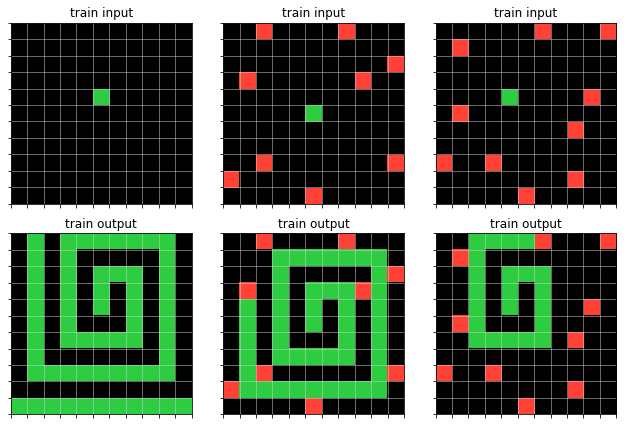

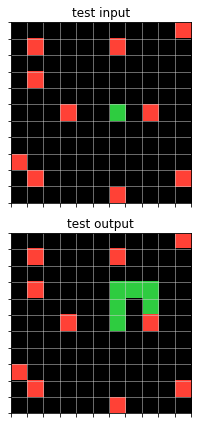

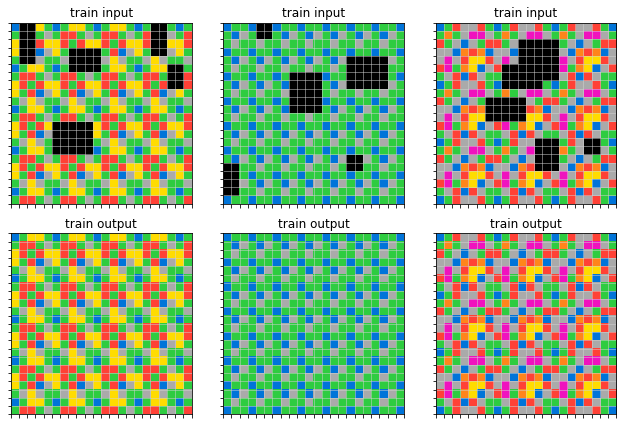

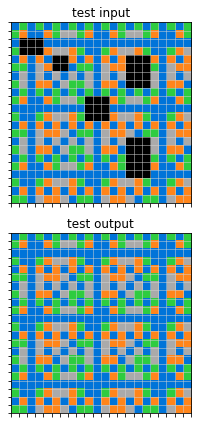

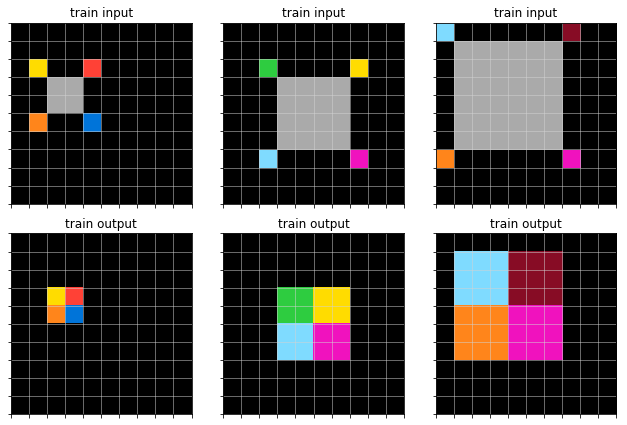

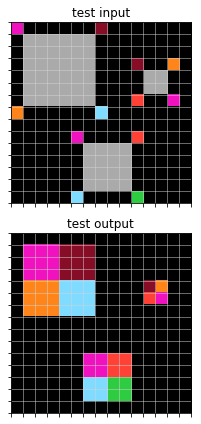

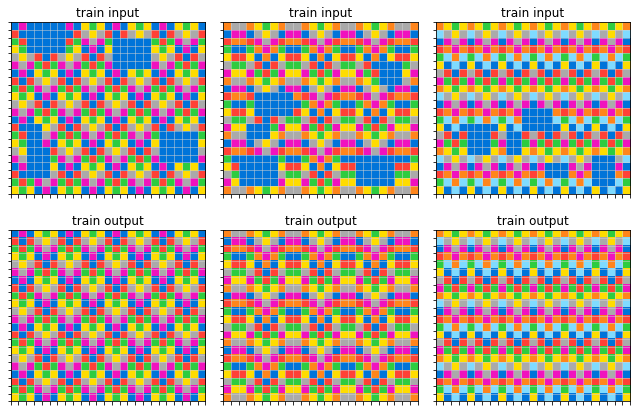

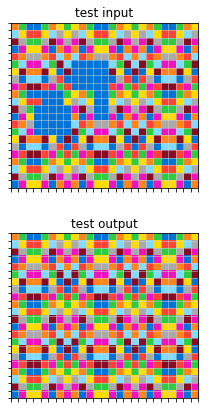

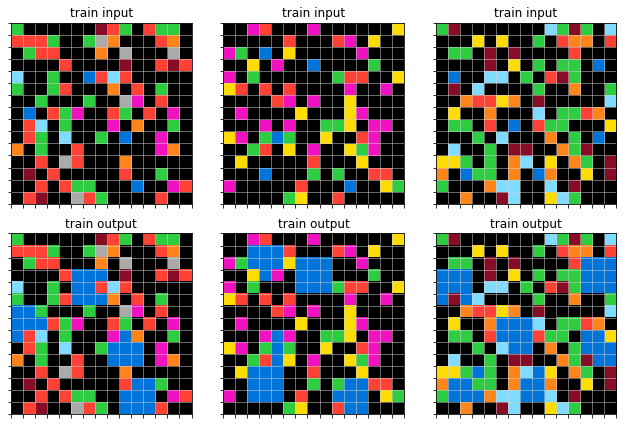

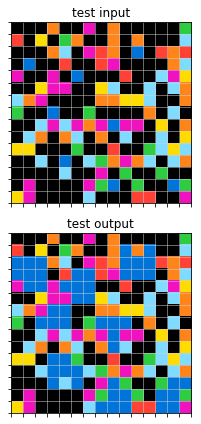

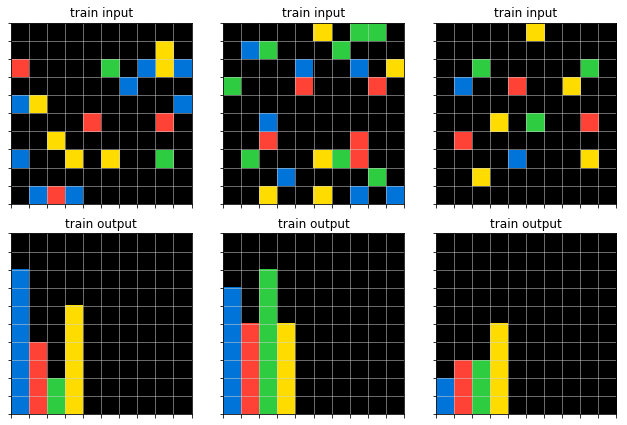

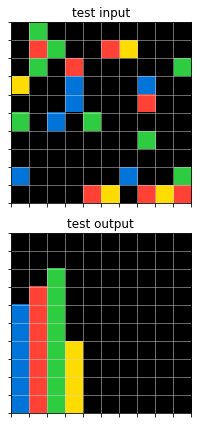

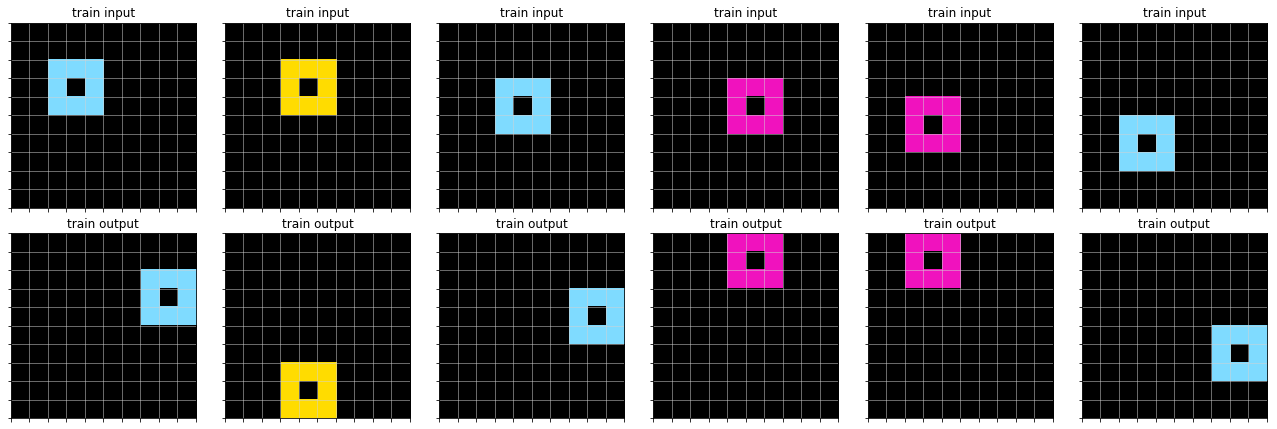

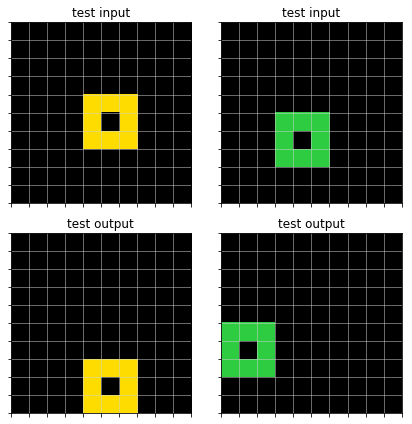

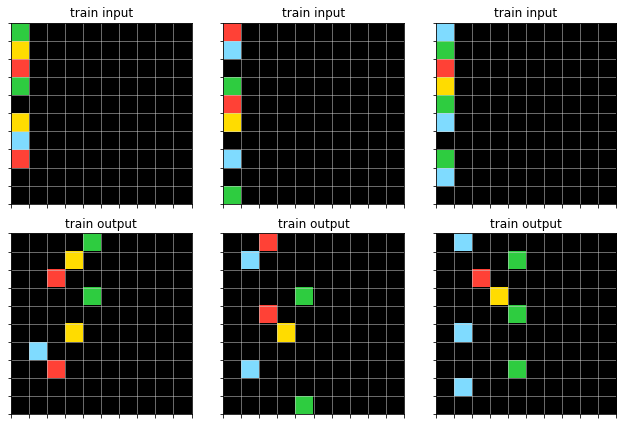

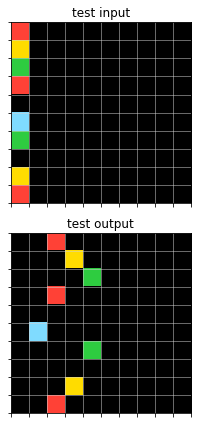

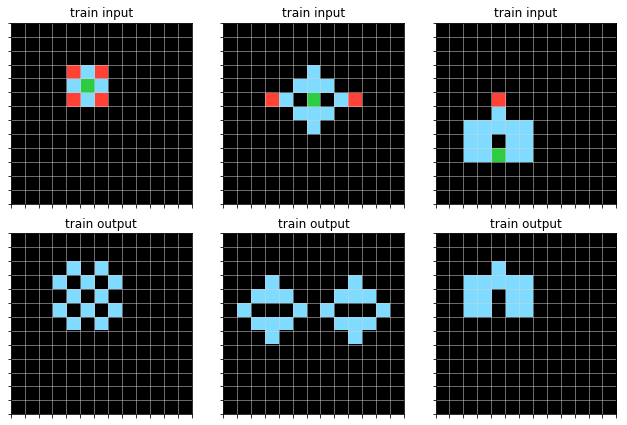

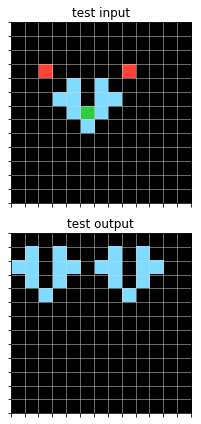

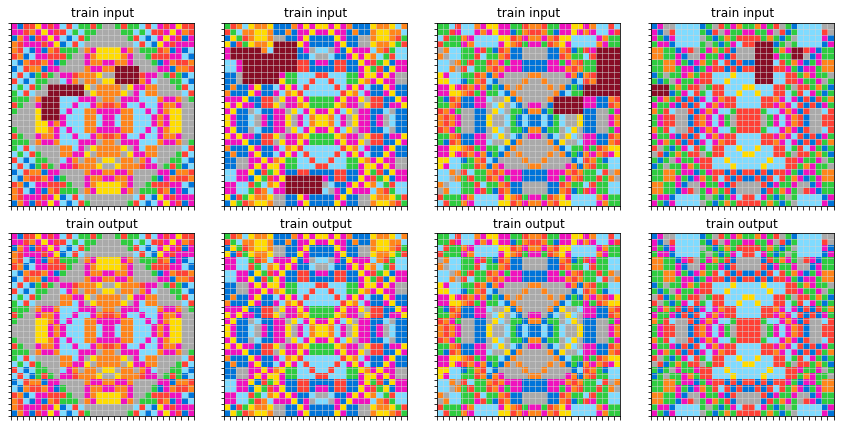

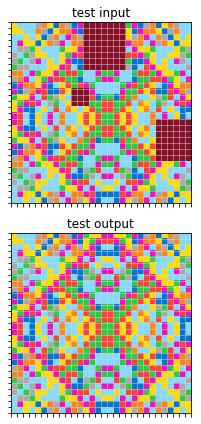

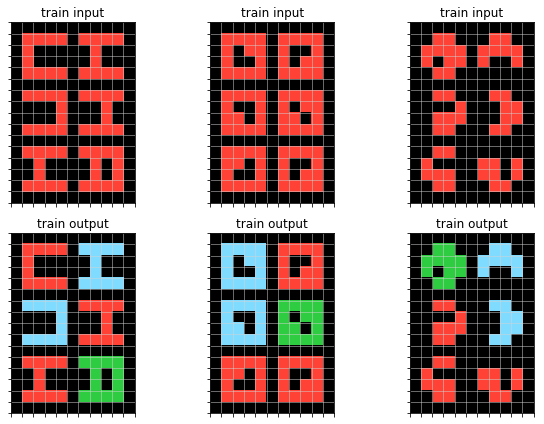

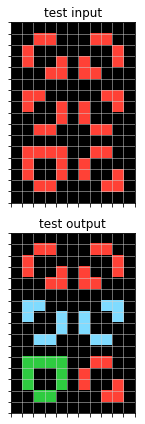

In [43]:
tmp = evaluation_descriptive_df[evaluation_descriptive_df['inputs_all_have_same_shape']==1]
tmp = tmp[tmp['outputs_all_have_same_shape']==1]
tmp = tmp[tmp.in_each_pair_shape_doesnt_change==1]
print(len(tmp))
eval_dimens = []
for i in tmp["task_name"]:
    task = get_data(str(evaluation_path / i))
    for i in range(len(task["train"])):
        eval_dimens.append(np.array(task["train"][i]["input"]).shape[0])
    plot_task(task)

397


(array([ 64.,  23., 181.,  34.,  25.,  25.,  25.,   7.,   0.,  13.]),
 array([ 2. ,  4.8,  7.6, 10.4, 13.2, 16. , 18.8, 21.6, 24.4, 27.2, 30. ]),
 <a list of 10 Patch objects>)

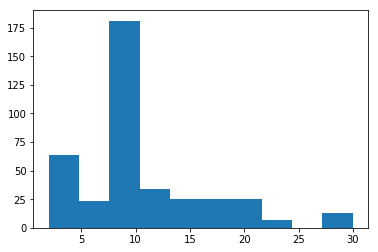

In [44]:
# inputとoutputが同じ次元 and input同士で次元が変わらないデータの次元の分布
print(len(dimens))
plt.hist(dimens)

# exmaple try

In [45]:
task_file = str(training_path / "1e32b0e9.json")
with open(task_file, 'r') as f:
    task = json.load(f)
print(np.array(task['train'][0]['input']))
horizontal_line(np.array(task['train'][0]['input']))

[[0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 2 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 2 2 2 0 8 0 0 0 0 0 8 0 2 2 2 0]
 [0 0 2 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 2 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 2 0 2 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 2 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 2 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 2 2 2 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 2 0 0 8 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 8 0 0 0 0 0]]


True